In [5]:
!pip install python-pptx
!pip install gdown
!pip install seaborn
!pip install openpyxl

import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
from datetime import datetime, date, timedelta
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor
import io
warnings.filterwarnings('ignore')

In [6]:
# Download Dataset
url = "https://docs.google.com/spreadsheets/d/1aX6X2IUFbLmLq5q8ghQLBLlbbWEiS9KO/edit?usp=drive_link&ouid=109864100569859608350&rtpof=true&sd=true"
output = "Database Gravity.xlsx"
gdown.download(url,output, quiet=False, fuzzy=True)

#Memanggil Dataset
df = pd.read_excel('Database Gravity.xlsx', sheet_name=['270824','280824','290824','300824','310824'])
sheet1_df = df['270824']
sheet2_df = df['280824']
sheet3_df = df['290824']
sheet4_df = df['300824']
sheet5_df = df['310824']

#Menggabungkan Data
GravityRAW_df = pd.concat([sheet1_df,sheet2_df,sheet3_df,sheet4_df,sheet5_df])
GravityRAW_df.head()

Downloading...
From: https://drive.google.com/uc?id=1aX6X2IUFbLmLq5q8ghQLBLlbbWEiS9KO
To: C:\Users\user\Database Gravity.xlsx
100%|██████████| 136k/136k [00:00<00:00, 863kB/s]


LINE  STATION  ALT      GRAV    SD.  TILTX  TILTY  TEMP   TIDE  DUR  REJ  \
0     1        1    0  5897.127  0.025   -0.9   -0.2 -3.27  0.055   60    0   
1     1        1    0  5897.125  0.040   -0.8   -0.4 -3.28  0.055   60    0   
2     1        1    0  5897.126  0.028   -1.1   -0.6 -3.30  0.054   60    0   
3     1        1    0  5897.127  0.027   -1.0   -0.7 -3.32  0.054   60    0   
4     1        1    0  5897.127  0.028   -1.6    0.0 -3.35  0.054   60    0   

   TIME GMT     GMT+7                DEC.TIME  TERRAIN       DATE     ID  
0  01:41:11  08:41:11 2024-07-26 01:41:00.960        0 2024-08-27  SIL00  
1  01:42:21  08:42:21 2024-07-26 01:42:10.944        0 2024-08-27  SIL00  
2  01:43:26  08:43:26 2024-07-26 01:43:15.744        0 2024-08-27  SIL00  
3  01:44:32  08:44:32 2024-07-26 01:44:22.272        0 2024-08-27  SIL00  
4  01:46:11  08:46:11 2024-07-26 01:46:00.768        0 2024-08-27  SIL00

In [7]:
GravityRAW_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 0 to 127
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   LINE      720 non-null    int64         
 1   STATION   720 non-null    int64         
 2   ALT       720 non-null    int64         
 3   GRAV      720 non-null    float64       
 4   SD.       720 non-null    float64       
 5   TILTX     720 non-null    float64       
 6   TILTY     720 non-null    float64       
 7   TEMP      720 non-null    float64       
 8   TIDE      720 non-null    float64       
 9   DUR       720 non-null    int64         
 10  REJ       720 non-null    int64         
 11  TIME GMT  720 non-null    object        
 12  GMT+7     720 non-null    object        
 13  DEC.TIME  720 non-null    datetime64[ns]
 14  TERRAIN   720 non-null    int64         
 15  DATE      720 non-null    datetime64[ns]
 16  ID        720 non-null    object        
dtypes: datetime64[ns](2),

In [8]:
GravityRAW_df.describe()

LINE     STATION    ALT         GRAV         SD.       TILTX  \
count  720.0  720.000000  720.0   720.000000  720.000000  720.000000   
mean     1.0    5.144444    0.0  5878.281217    0.040224   -0.266250   
min      1.0    1.000000    0.0  5824.930000    0.008000   -5.200000   
25%      1.0    3.000000    0.0  5862.946500    0.022000   -1.200000   
50%      1.0    5.000000    0.0  5877.455000    0.031000   -0.250000   
75%      1.0    7.000000    0.0  5896.685000    0.045000    0.600000   
max      1.0   11.000000    0.0  5897.128000    0.295000    3.500000   
std      0.0    2.934846    0.0    19.059367    0.030198    1.309009   

            TILTY        TEMP        TIDE    DUR         REJ  \
count  720.000000  720.000000  720.000000  720.0  720.000000   
mean    -0.952361   -3.452806    0.024567   60.0    0.886111   
min     -5.800000   -3.910000   -0.072000   60.0    0.000000   
25%     -2.000000   -3.500000   -0.020250   60.0    0.000000   
50%     -1.000000   -3.450000    0.016000   60.0    0.000000   
75%      0.000000   -3.400000    0.070250   60.0    0.000000   
max      2.500000   -3.090000    0.135000   60.0   16.000000   
std      1.362602    0.097122    0.055136    0.0    2.238449   

                         DEC.TIME  TERRAIN                 DATE  
count                         720    720.0                  720  
mean   2024-07-28 04:07:20.217600      0.0  2024-08-28 21:52:00  
min    2024-07-26 01:41:00.960000      0.0  2024-08-27 00:00:00  
25%    2024-07-27 03:03:47.232000      0.0  2024-08-28 00:00:00  
50%    2024-07-28 04:17:24.864000      0.0  2024-08-29 00:00:00  
75%    2024-07-29 08:12:51.696000      0.0  2024-08-30 00:00:00  
max    2024-07-30 09:54:19.008000      0.0  2024-08-31 00:00:00  
std                           NaN      0.0                  NaN

In [9]:
GravityRAW_df.isnull().sum()

LINE        0
STATION     0
ALT         0
GRAV        0
SD.         0
TILTX       0
TILTY       0
TEMP        0
TIDE        0
DUR         0
REJ         0
TIME GMT    0
GMT+7       0
DEC.TIME    0
TERRAIN     0
DATE        0
ID          0
dtype: int64

In [10]:
GravityRAW_df.duplicated().sum()

0

In [11]:
GravityRAW_df['GMT+7']=pd.to_datetime(GravityRAW_df['GMT+7'], format='%H:%M:%S', errors='coerce')
GravityRAW_df.info()
GravityRAW_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 0 to 127
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   LINE      720 non-null    int64         
 1   STATION   720 non-null    int64         
 2   ALT       720 non-null    int64         
 3   GRAV      720 non-null    float64       
 4   SD.       720 non-null    float64       
 5   TILTX     720 non-null    float64       
 6   TILTY     720 non-null    float64       
 7   TEMP      720 non-null    float64       
 8   TIDE      720 non-null    float64       
 9   DUR       720 non-null    int64         
 10  REJ       720 non-null    int64         
 11  TIME GMT  720 non-null    object        
 12  GMT+7     720 non-null    datetime64[ns]
 13  DEC.TIME  720 non-null    datetime64[ns]
 14  TERRAIN   720 non-null    int64         
 15  DATE      720 non-null    datetime64[ns]
 16  ID        720 non-null    object        
dtypes: datetime64[ns](3),

LINE  STATION  ALT      GRAV    SD.  TILTX  TILTY  TEMP   TIDE  DUR  REJ  \
0     1        1    0  5897.127  0.025   -0.9   -0.2 -3.27  0.055   60    0   
1     1        1    0  5897.125  0.040   -0.8   -0.4 -3.28  0.055   60    0   
2     1        1    0  5897.126  0.028   -1.1   -0.6 -3.30  0.054   60    0   
3     1        1    0  5897.127  0.027   -1.0   -0.7 -3.32  0.054   60    0   
4     1        1    0  5897.127  0.028   -1.6    0.0 -3.35  0.054   60    0   

   TIME GMT               GMT+7                DEC.TIME  TERRAIN       DATE  \
0  01:41:11 1900-01-01 08:41:11 2024-07-26 01:41:00.960        0 2024-08-27   
1  01:42:21 1900-01-01 08:42:21 2024-07-26 01:42:10.944        0 2024-08-27   
2  01:43:26 1900-01-01 08:43:26 2024-07-26 01:43:15.744        0 2024-08-27   
3  01:44:32 1900-01-01 08:44:32 2024-07-26 01:44:22.272        0 2024-08-27   
4  01:46:11 1900-01-01 08:46:11 2024-07-26 01:46:00.768        0 2024-08-27   

      ID  
0  SIL00  
1  SIL00  
2  SIL00  
3  SIL00  
4  SIL00

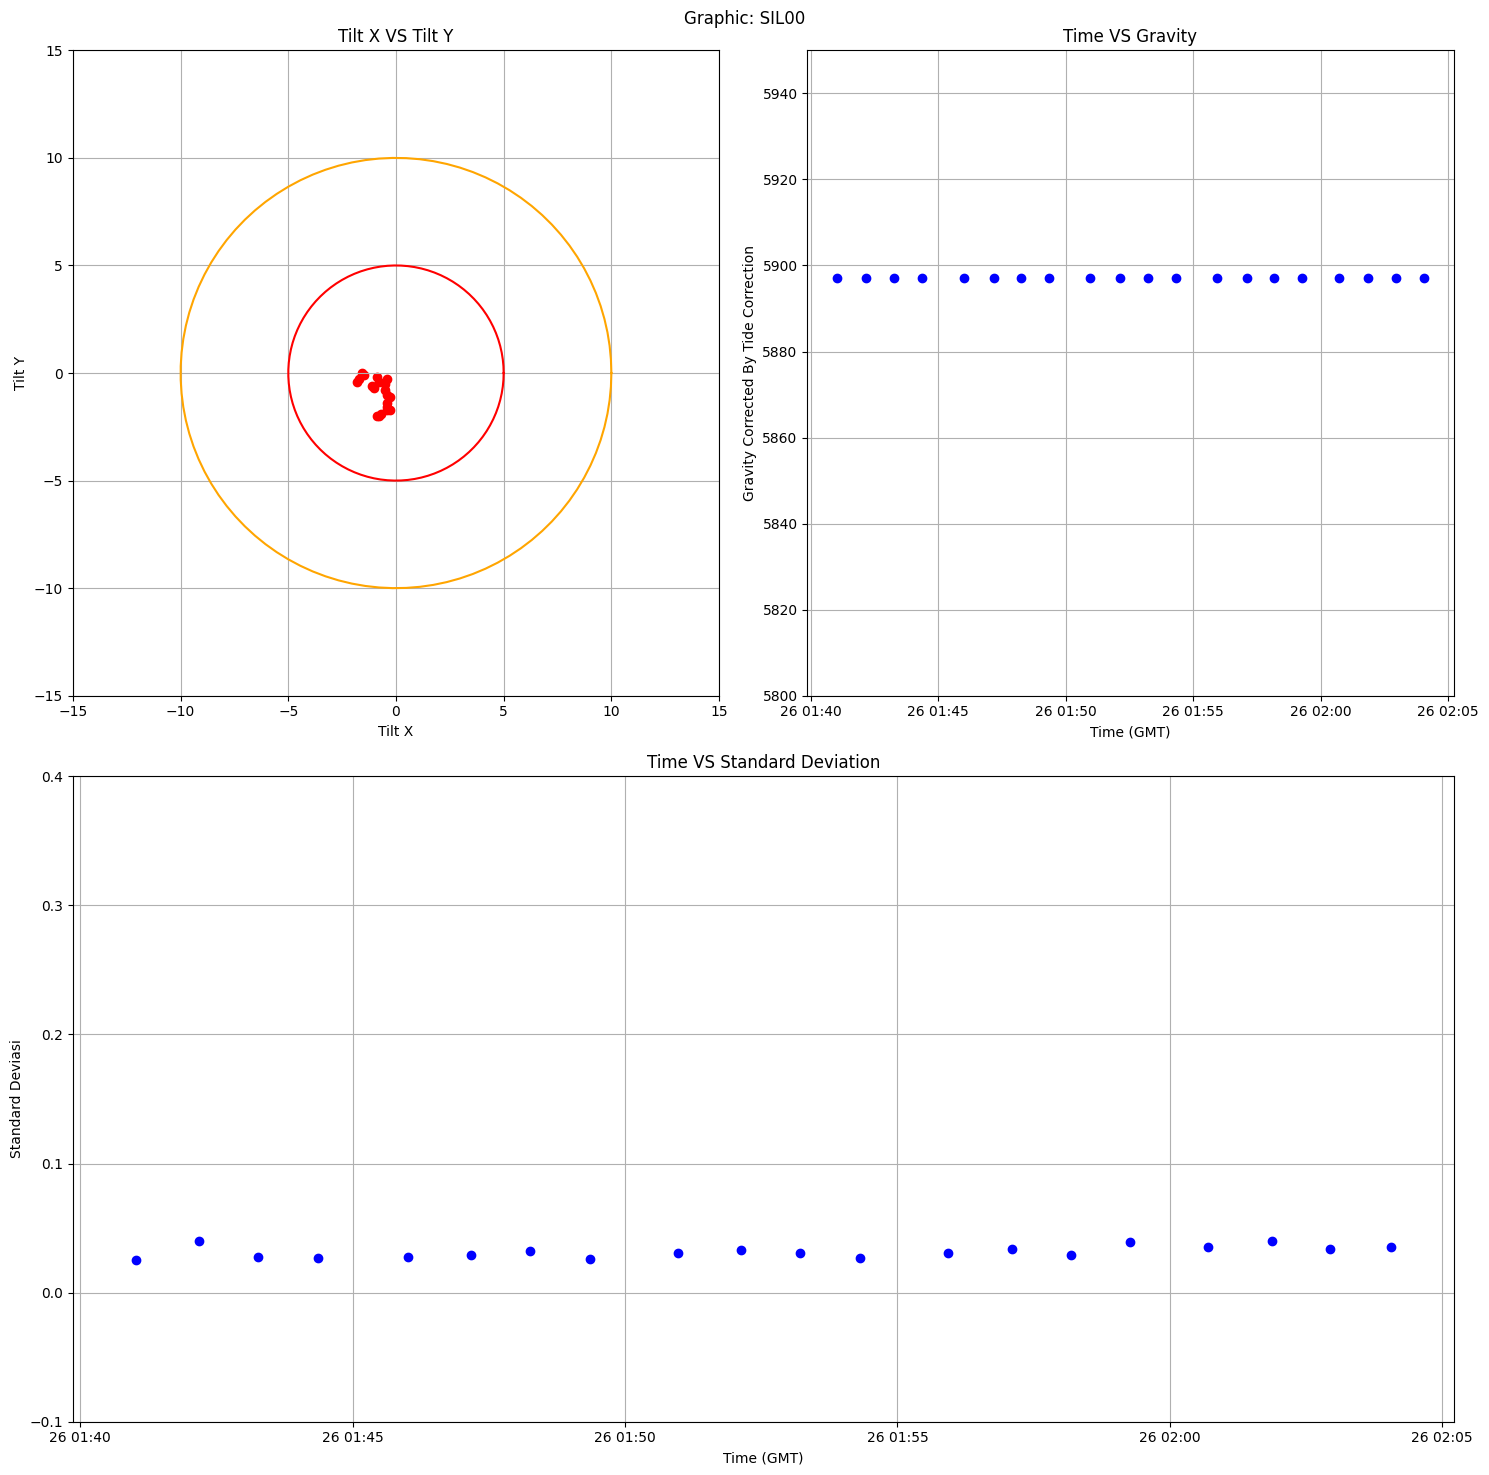

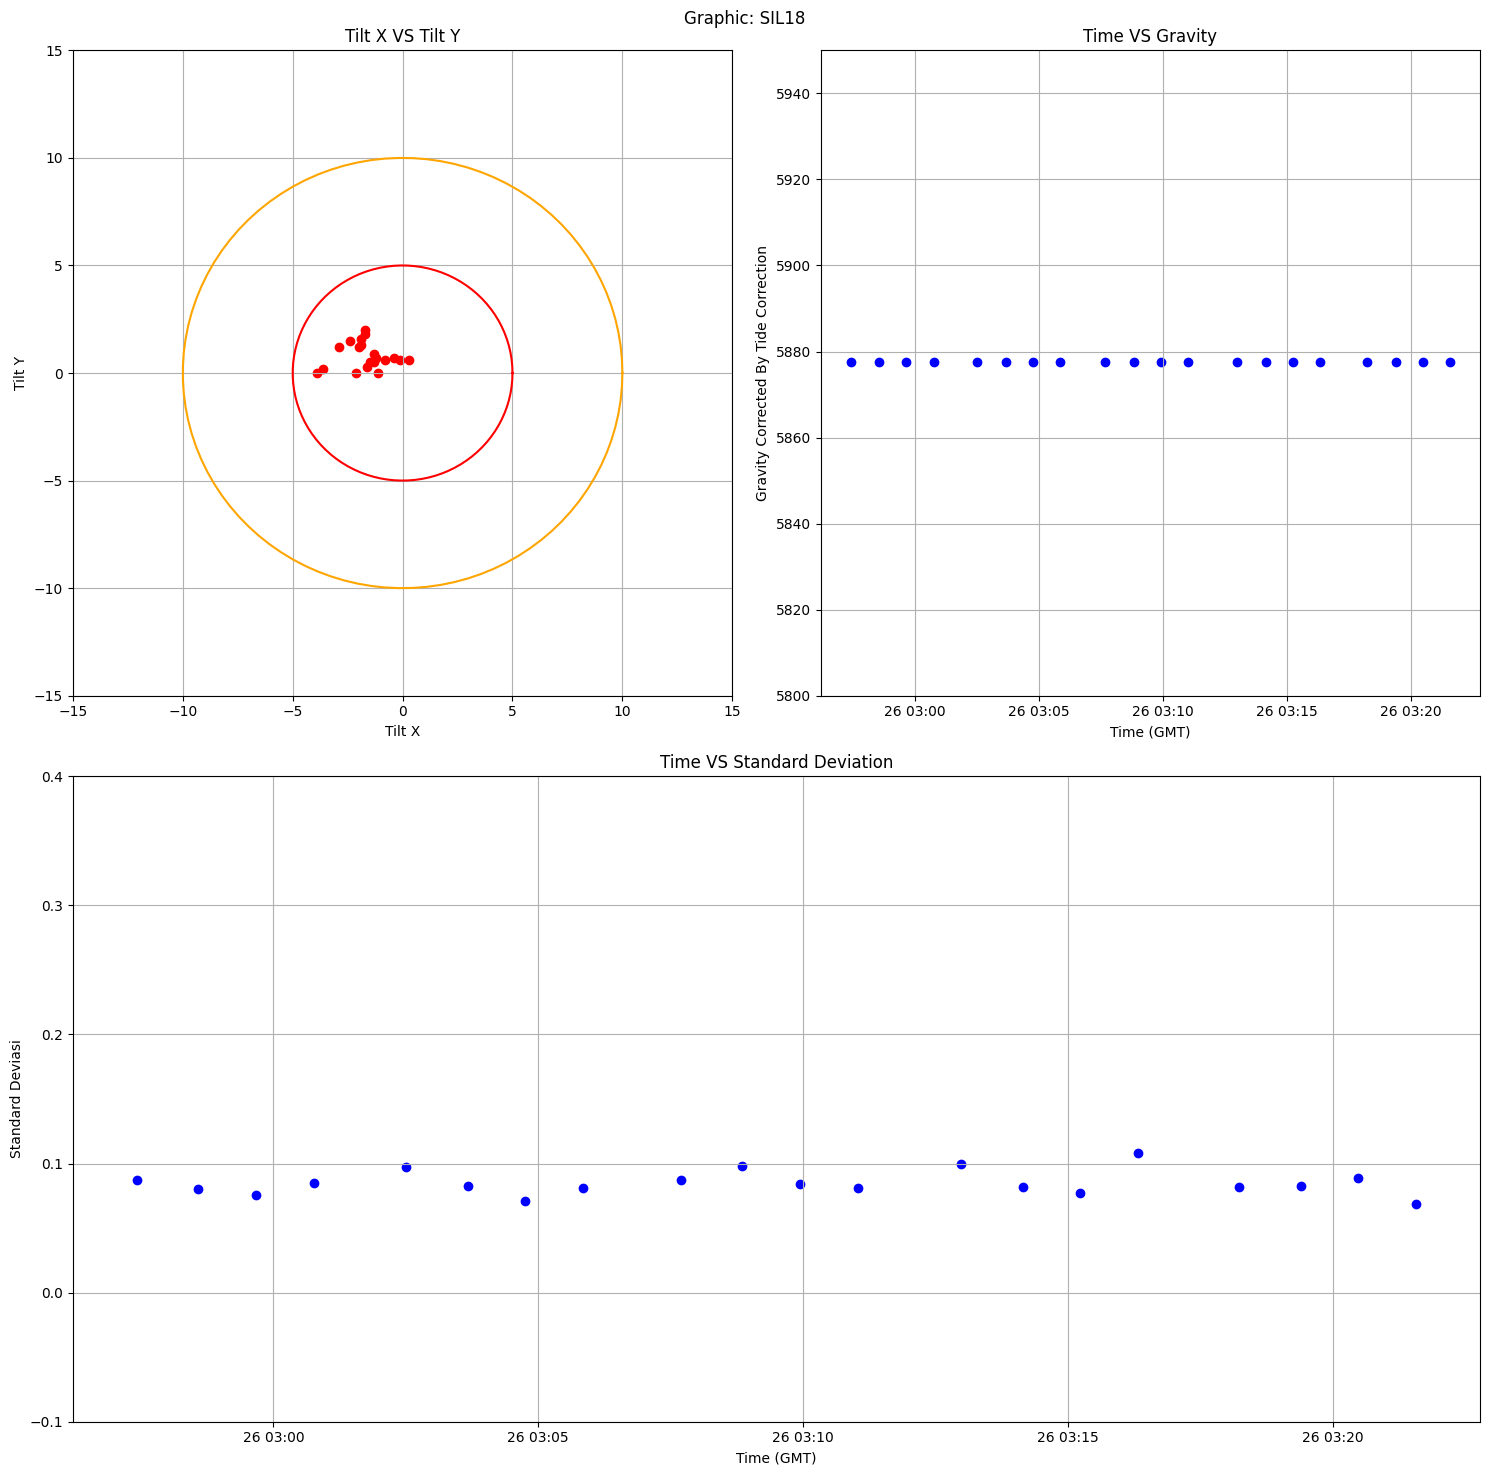

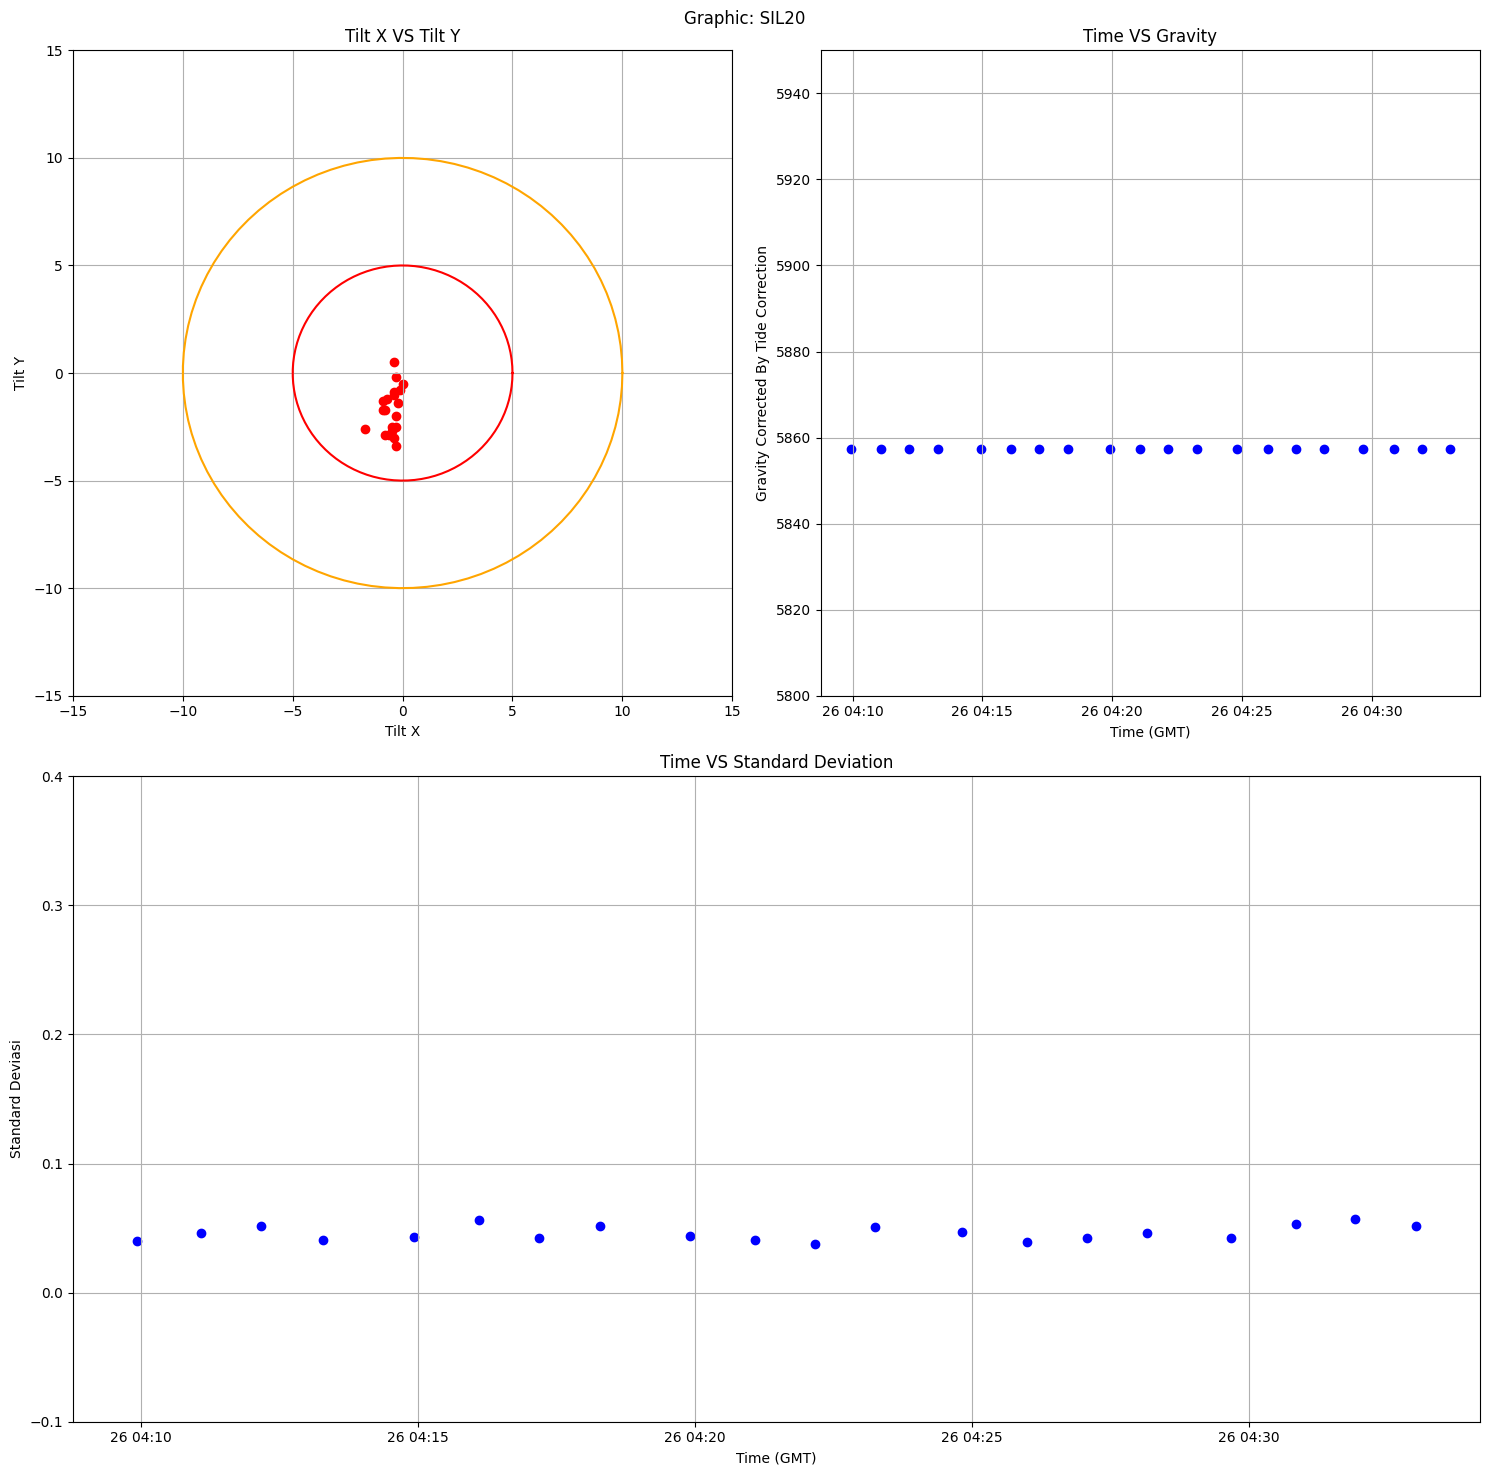

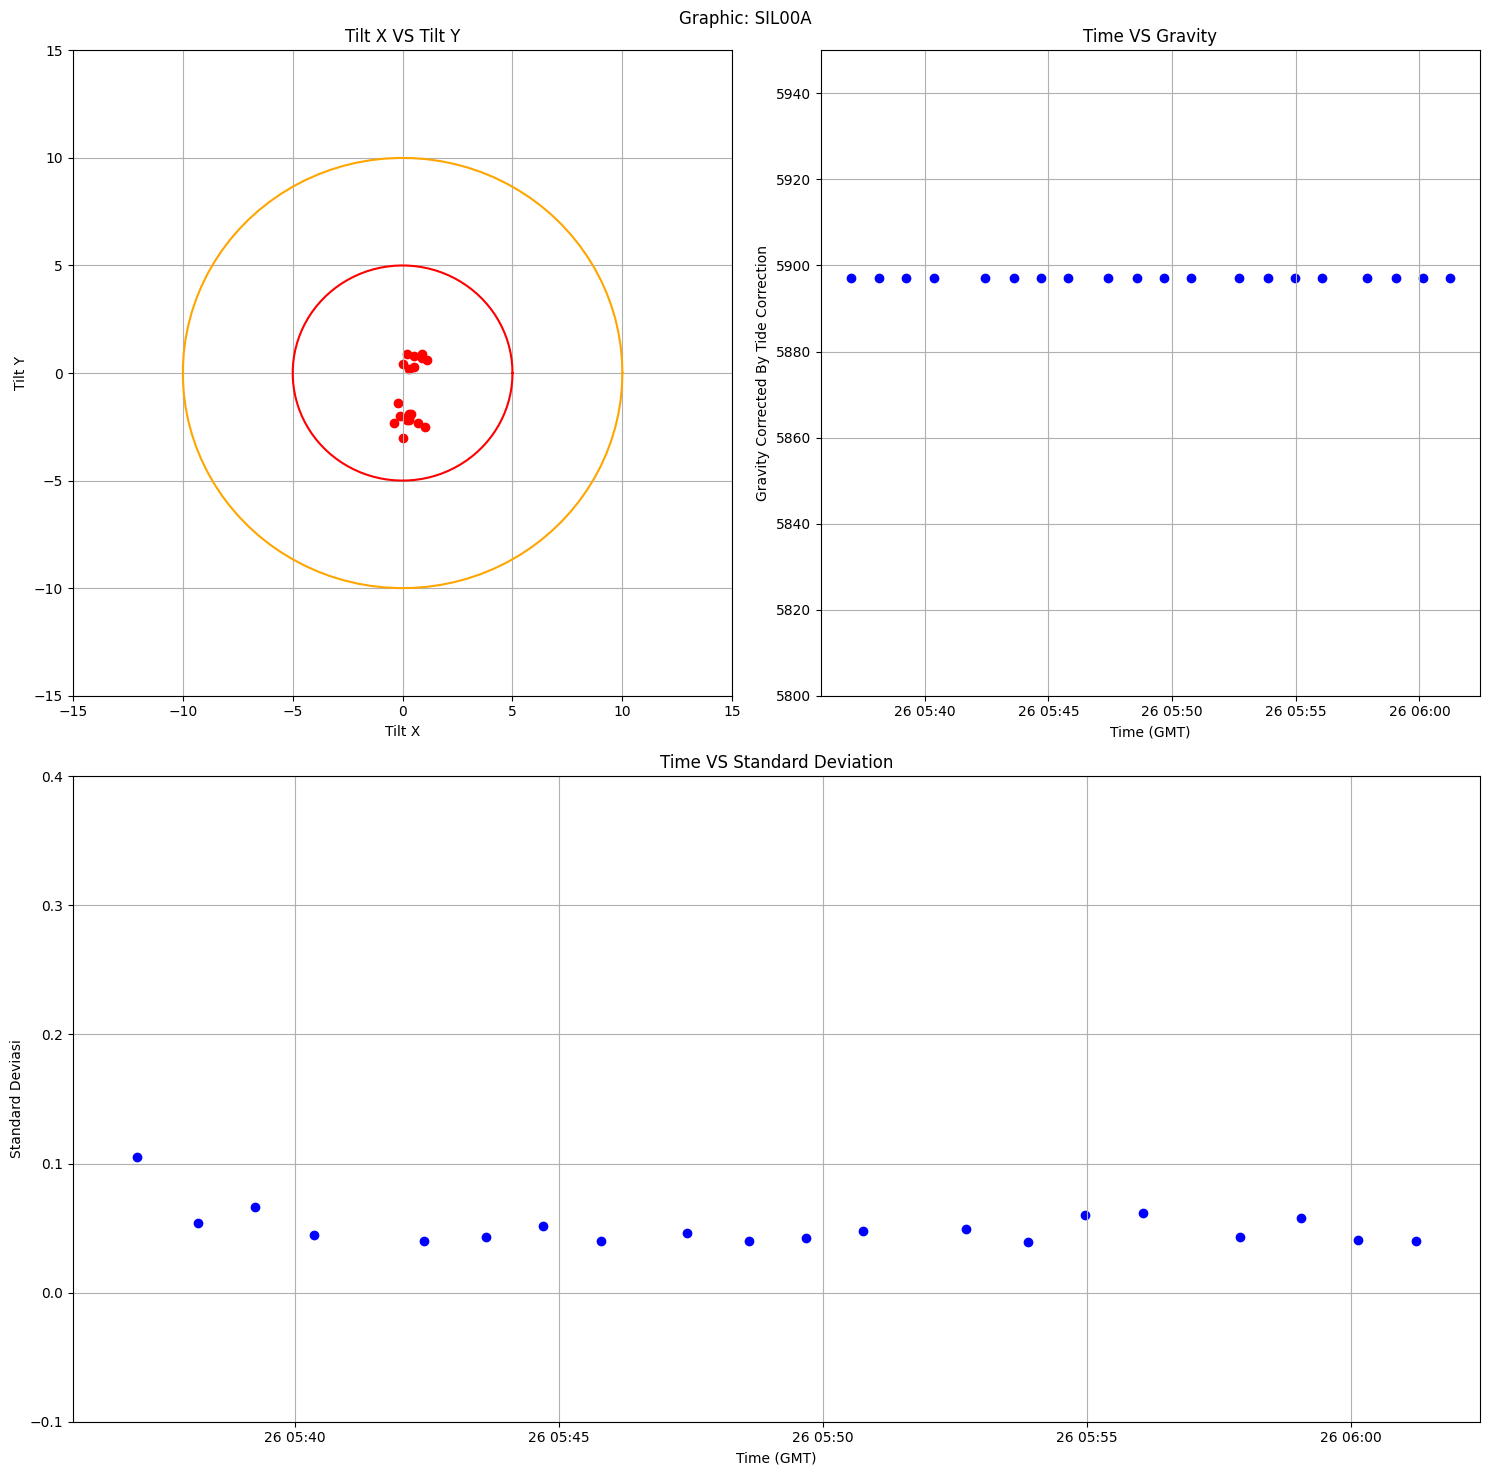

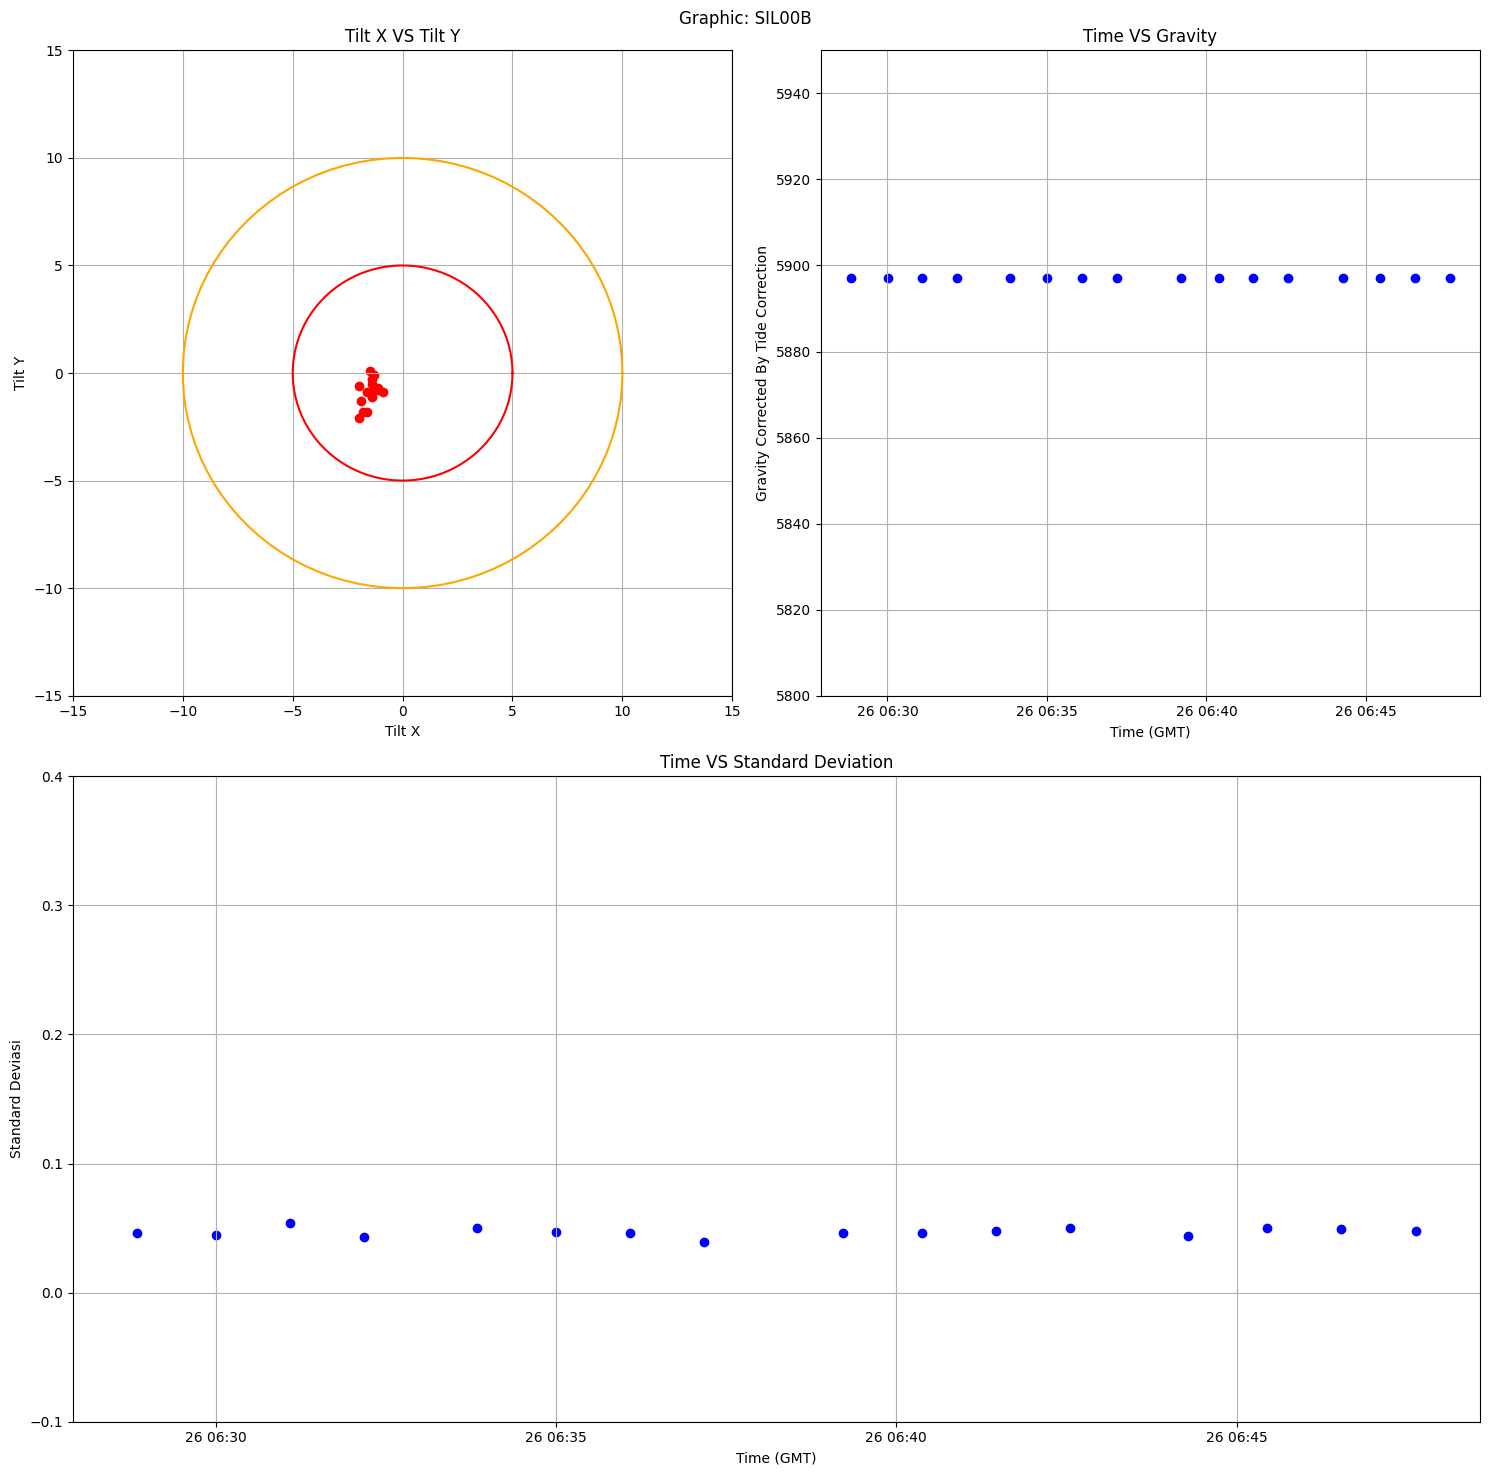

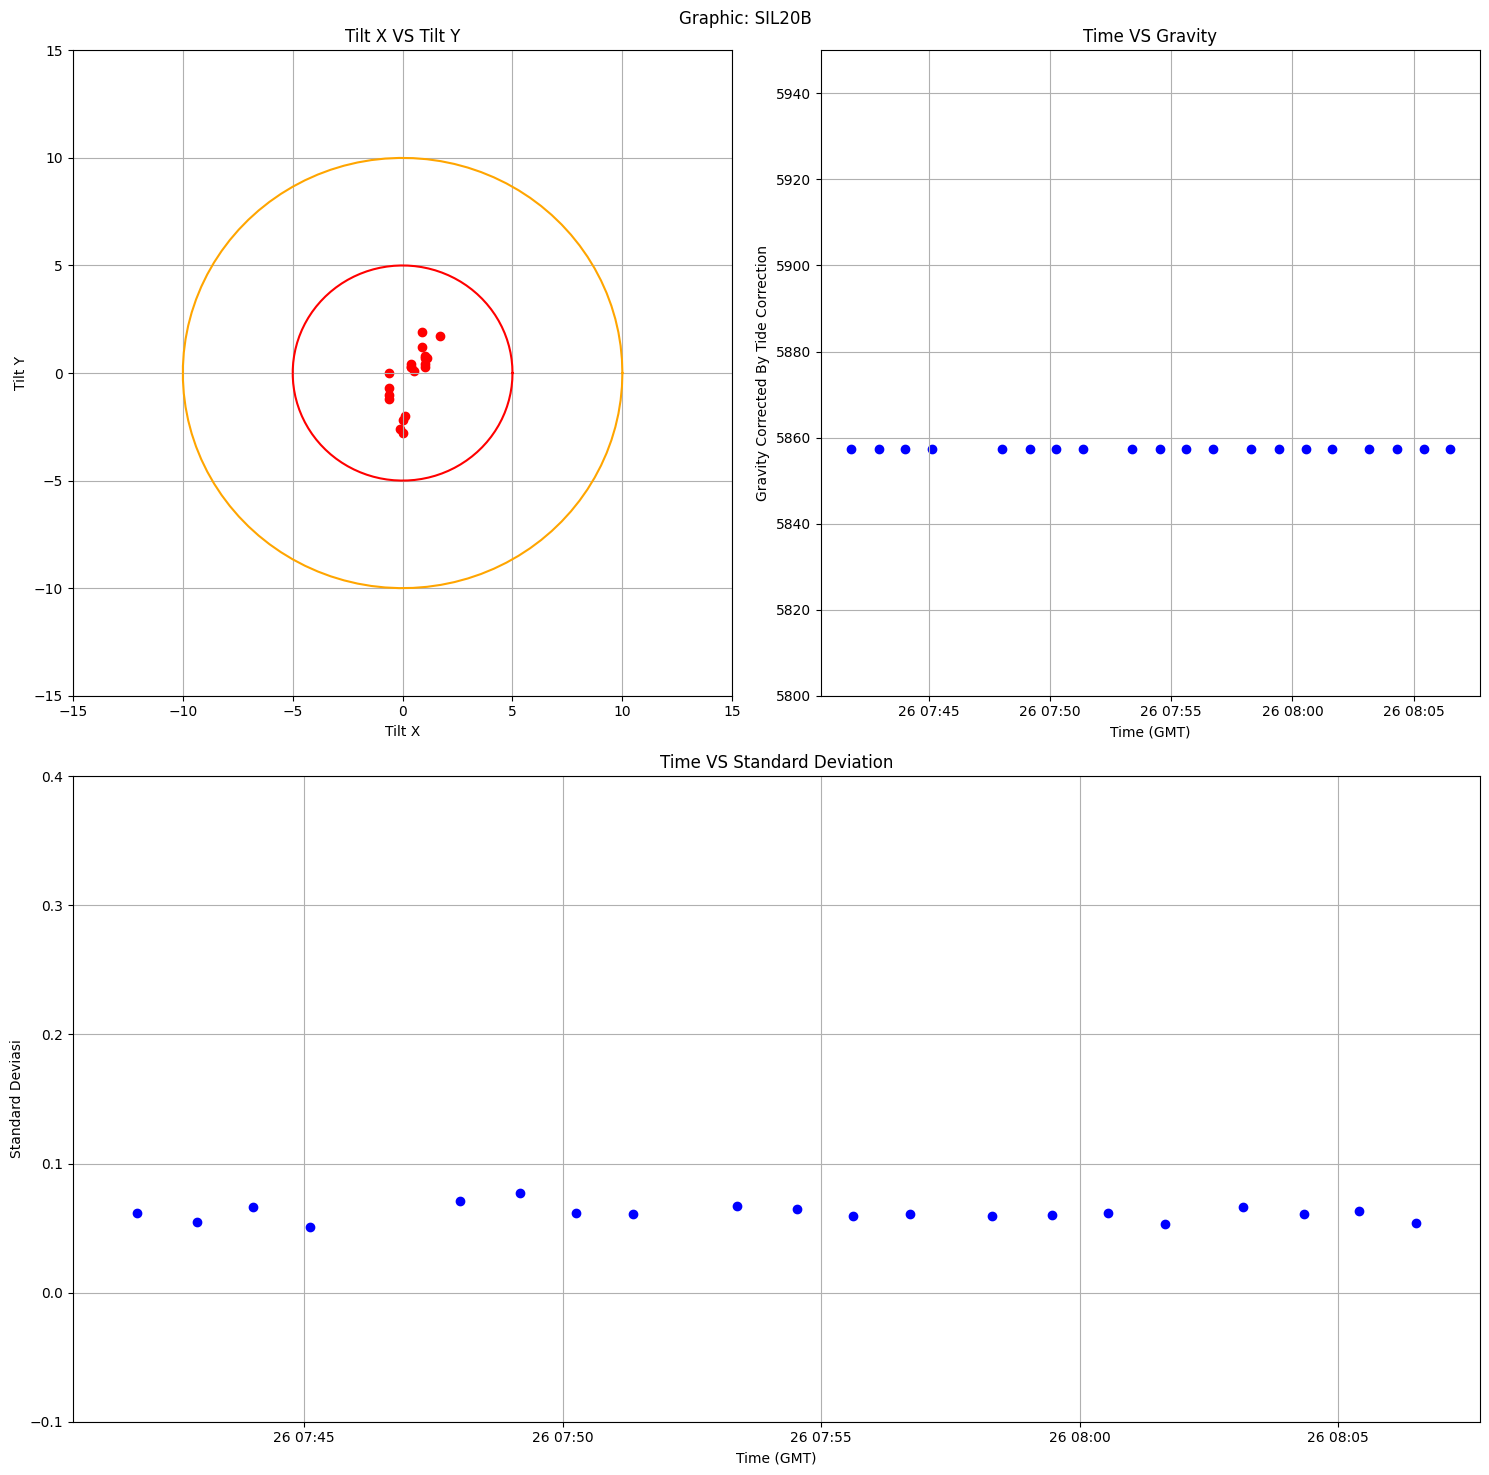

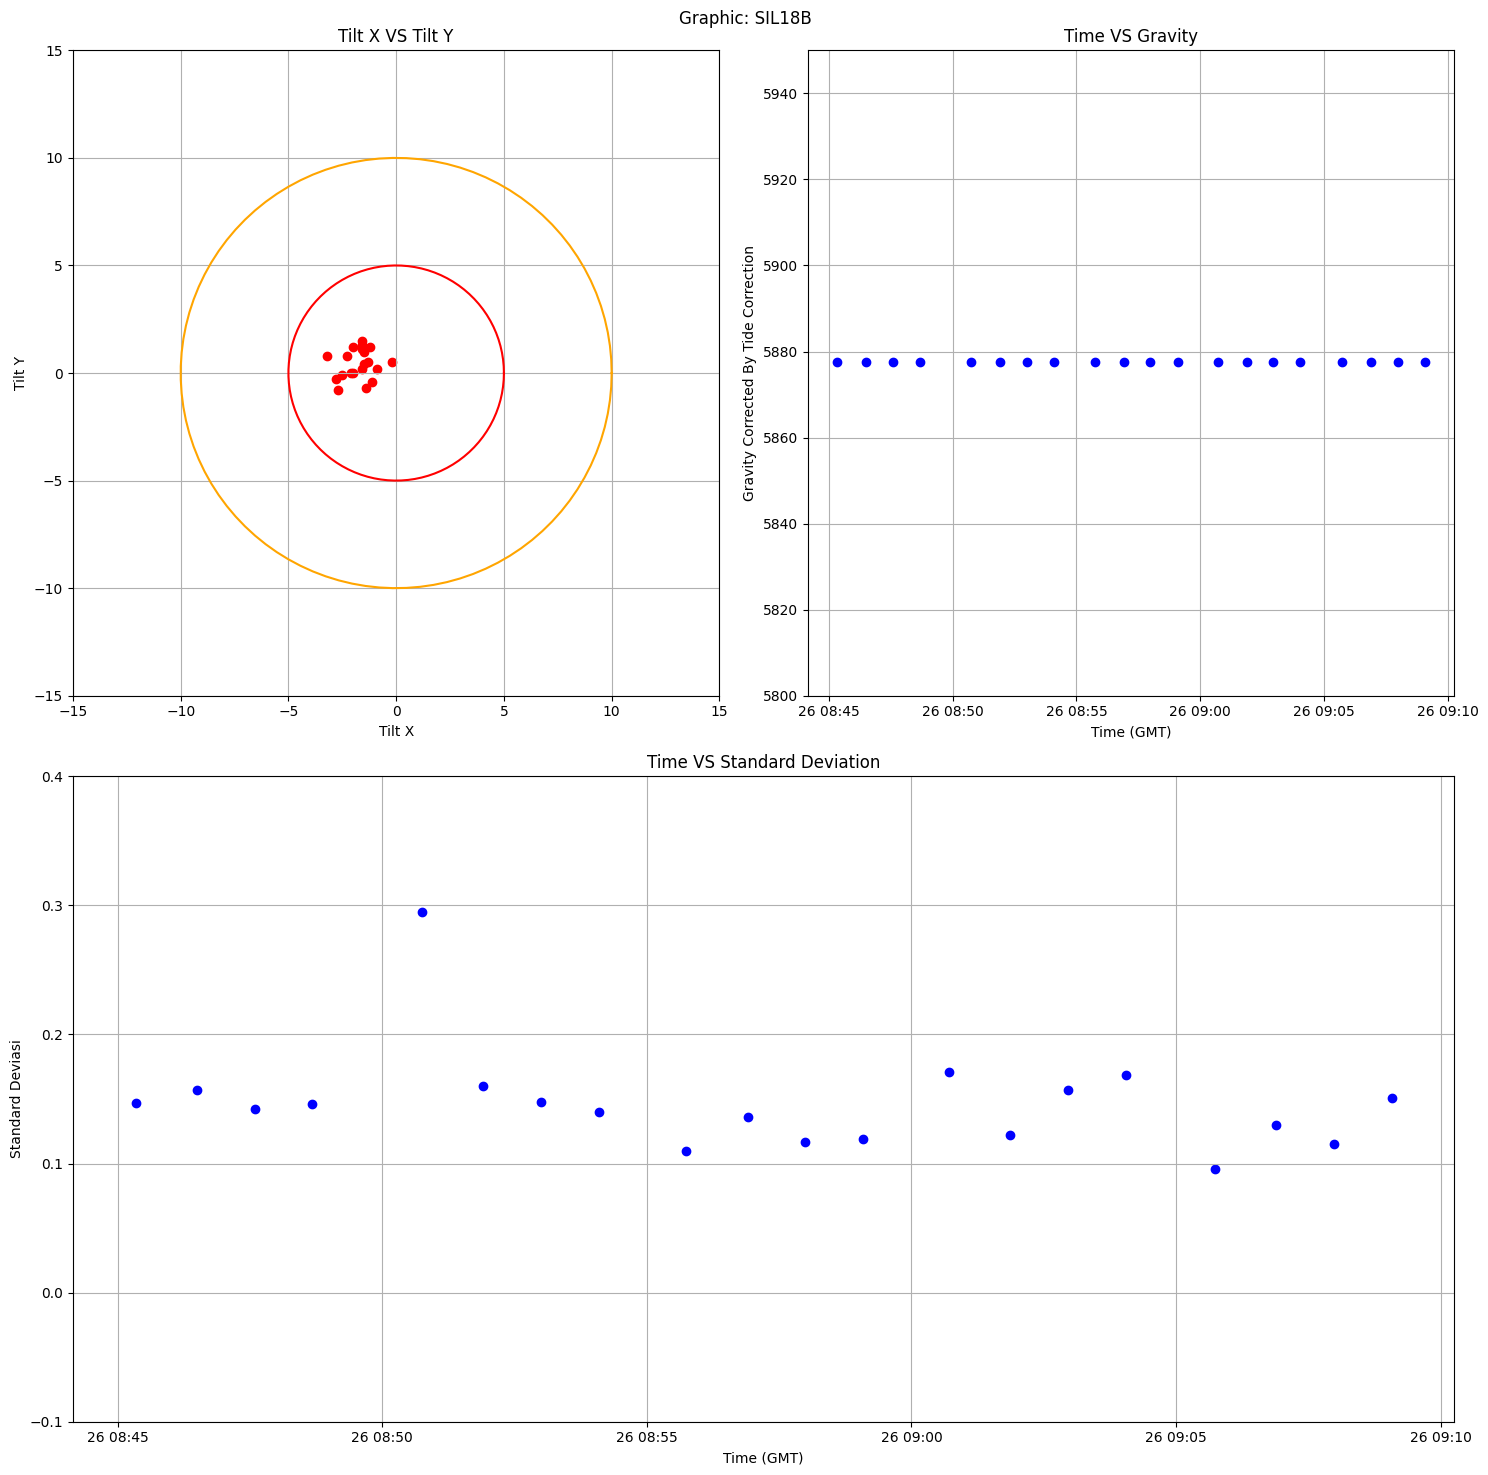

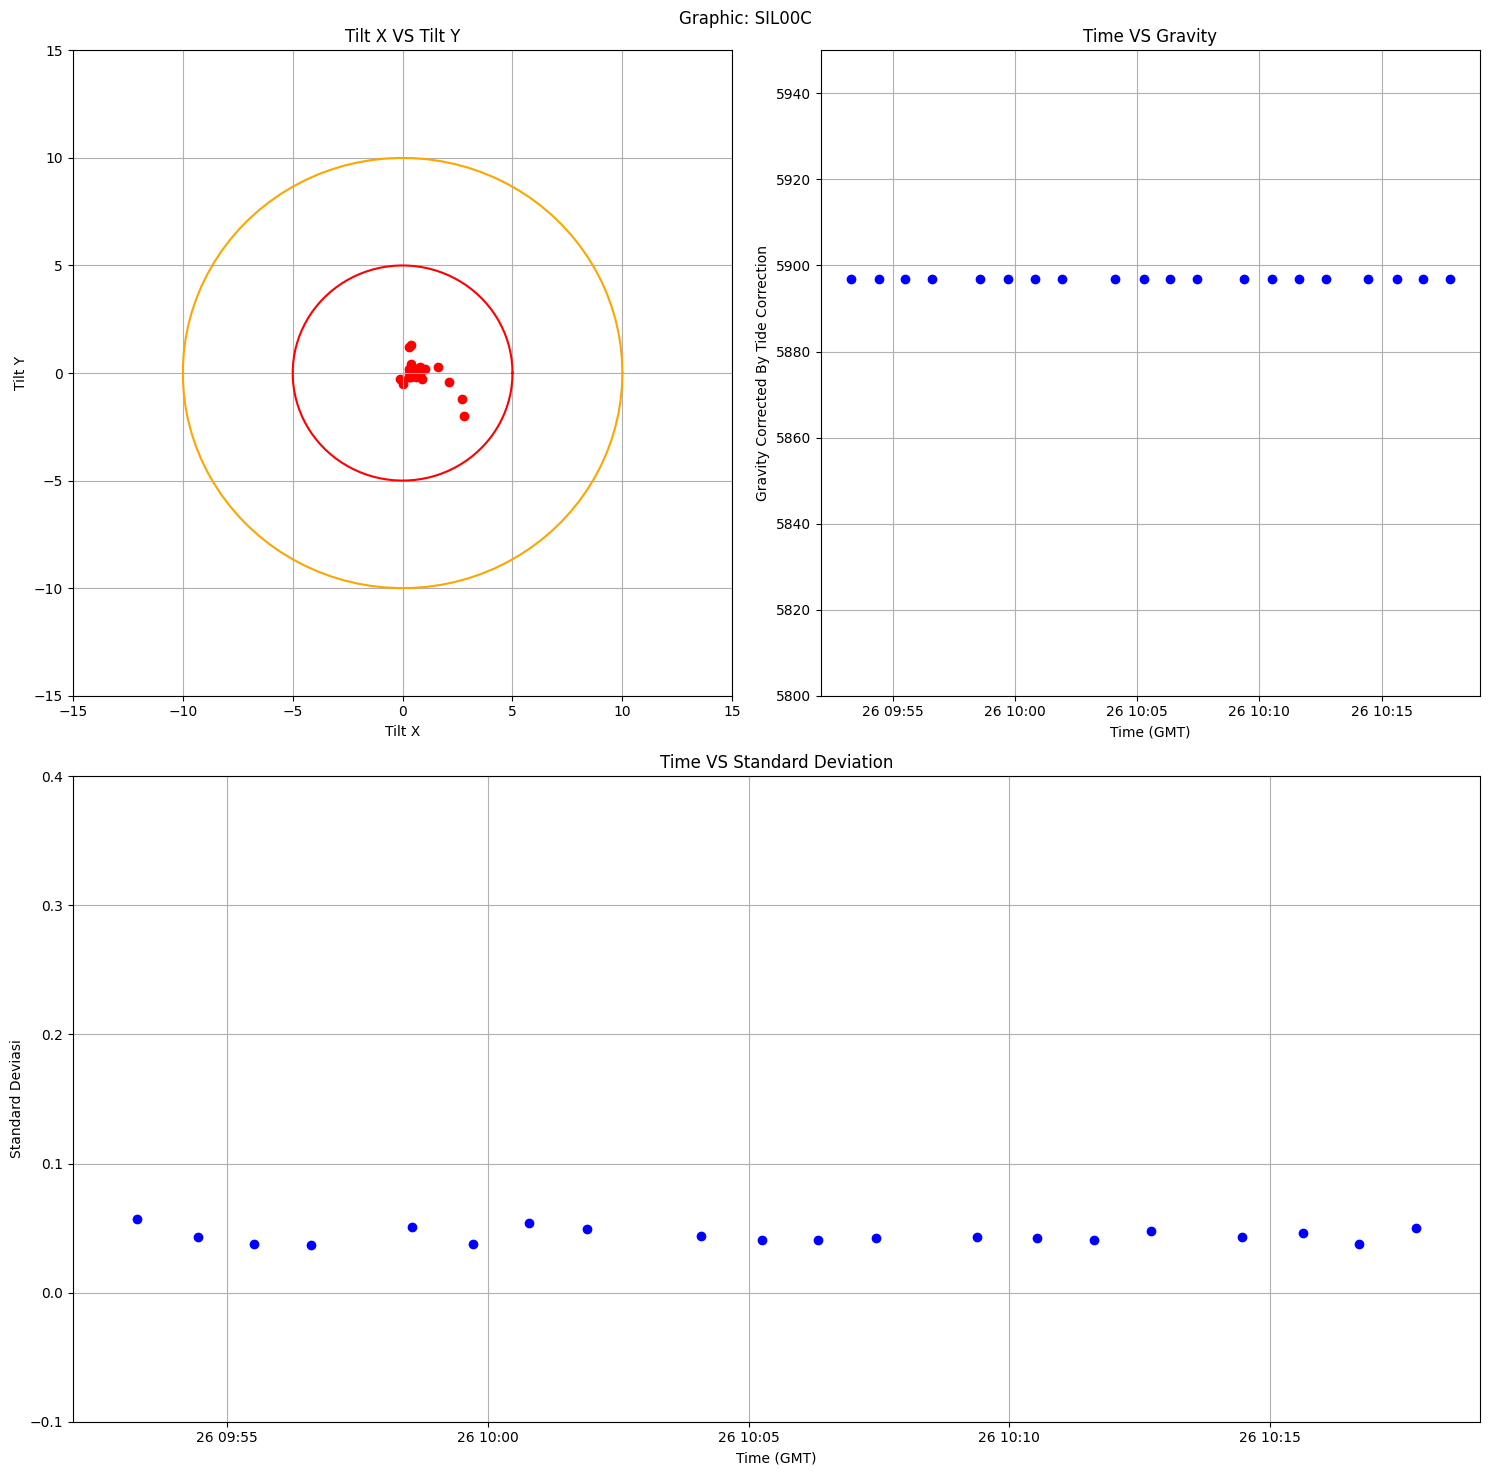

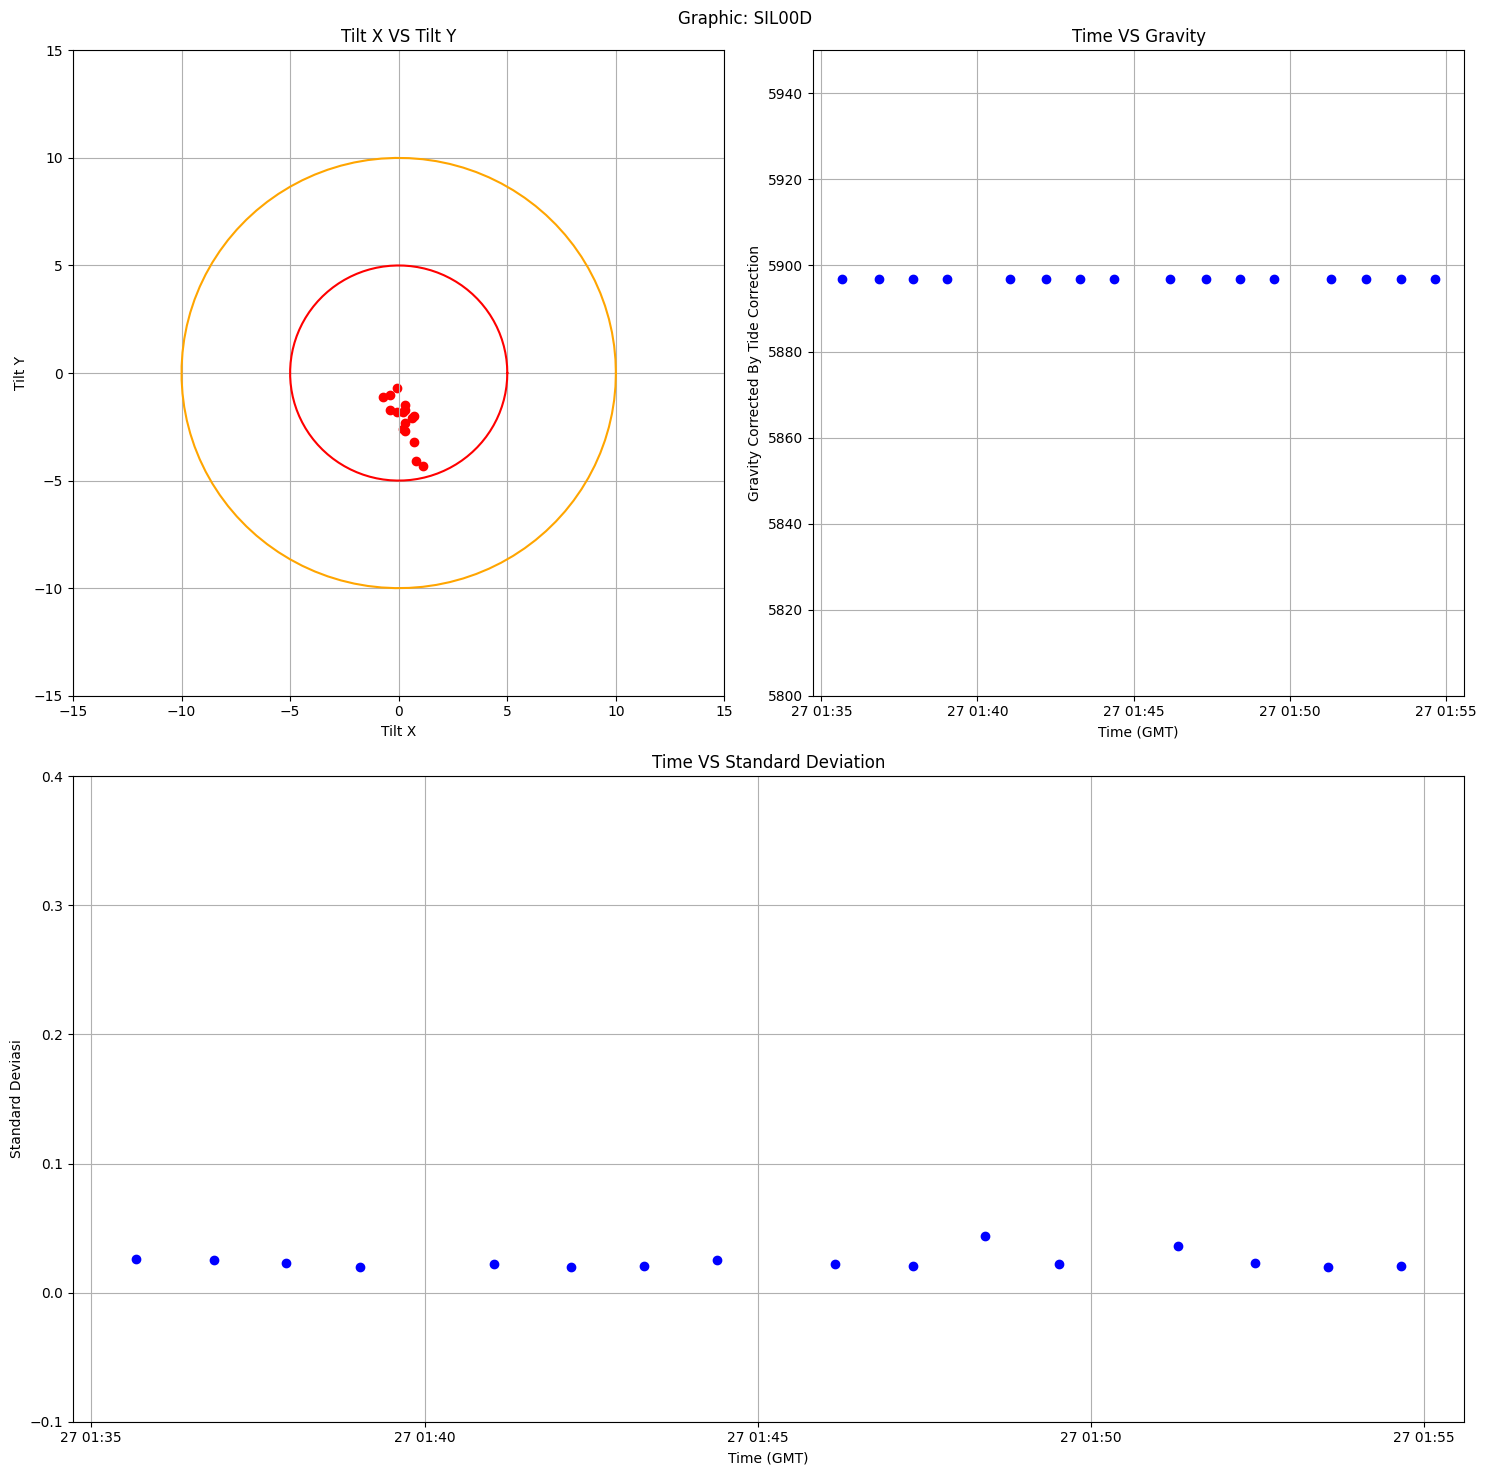

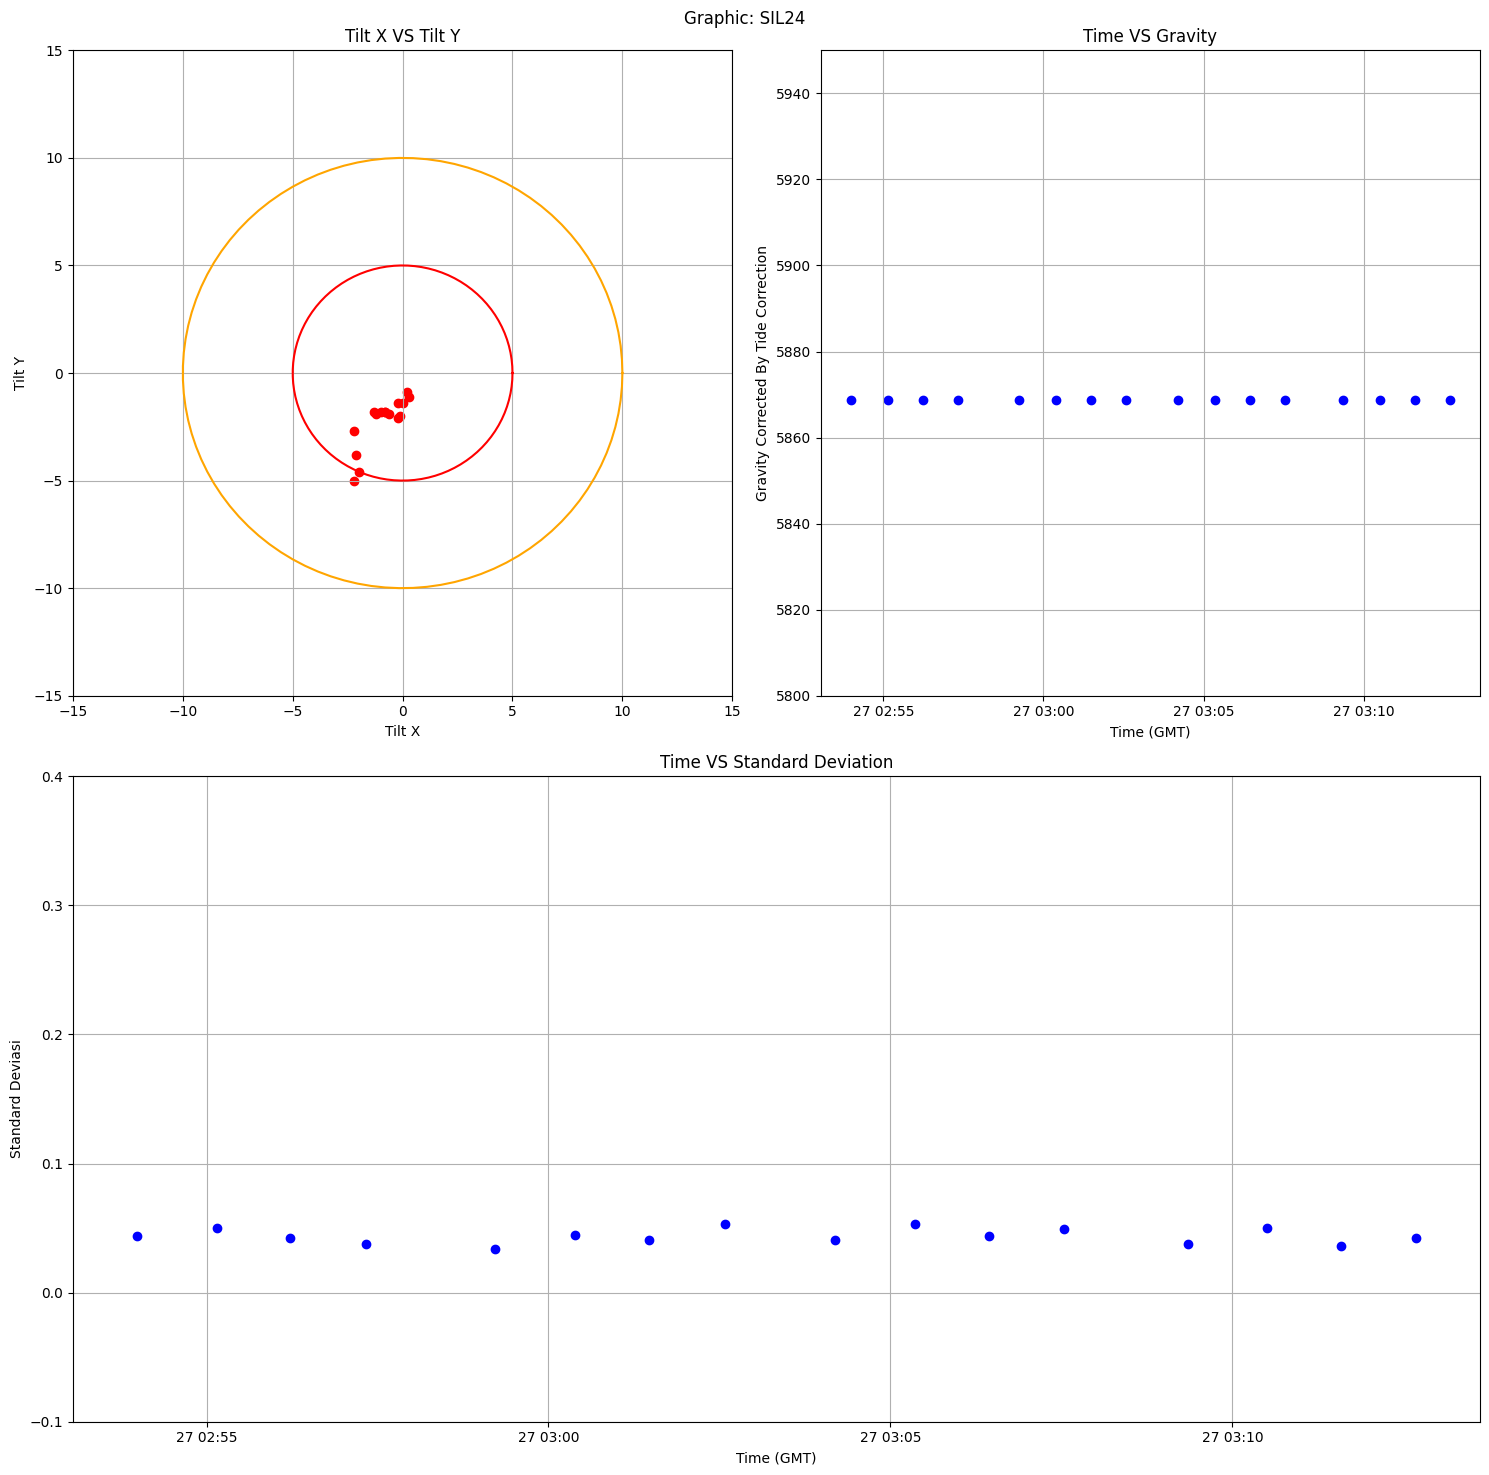

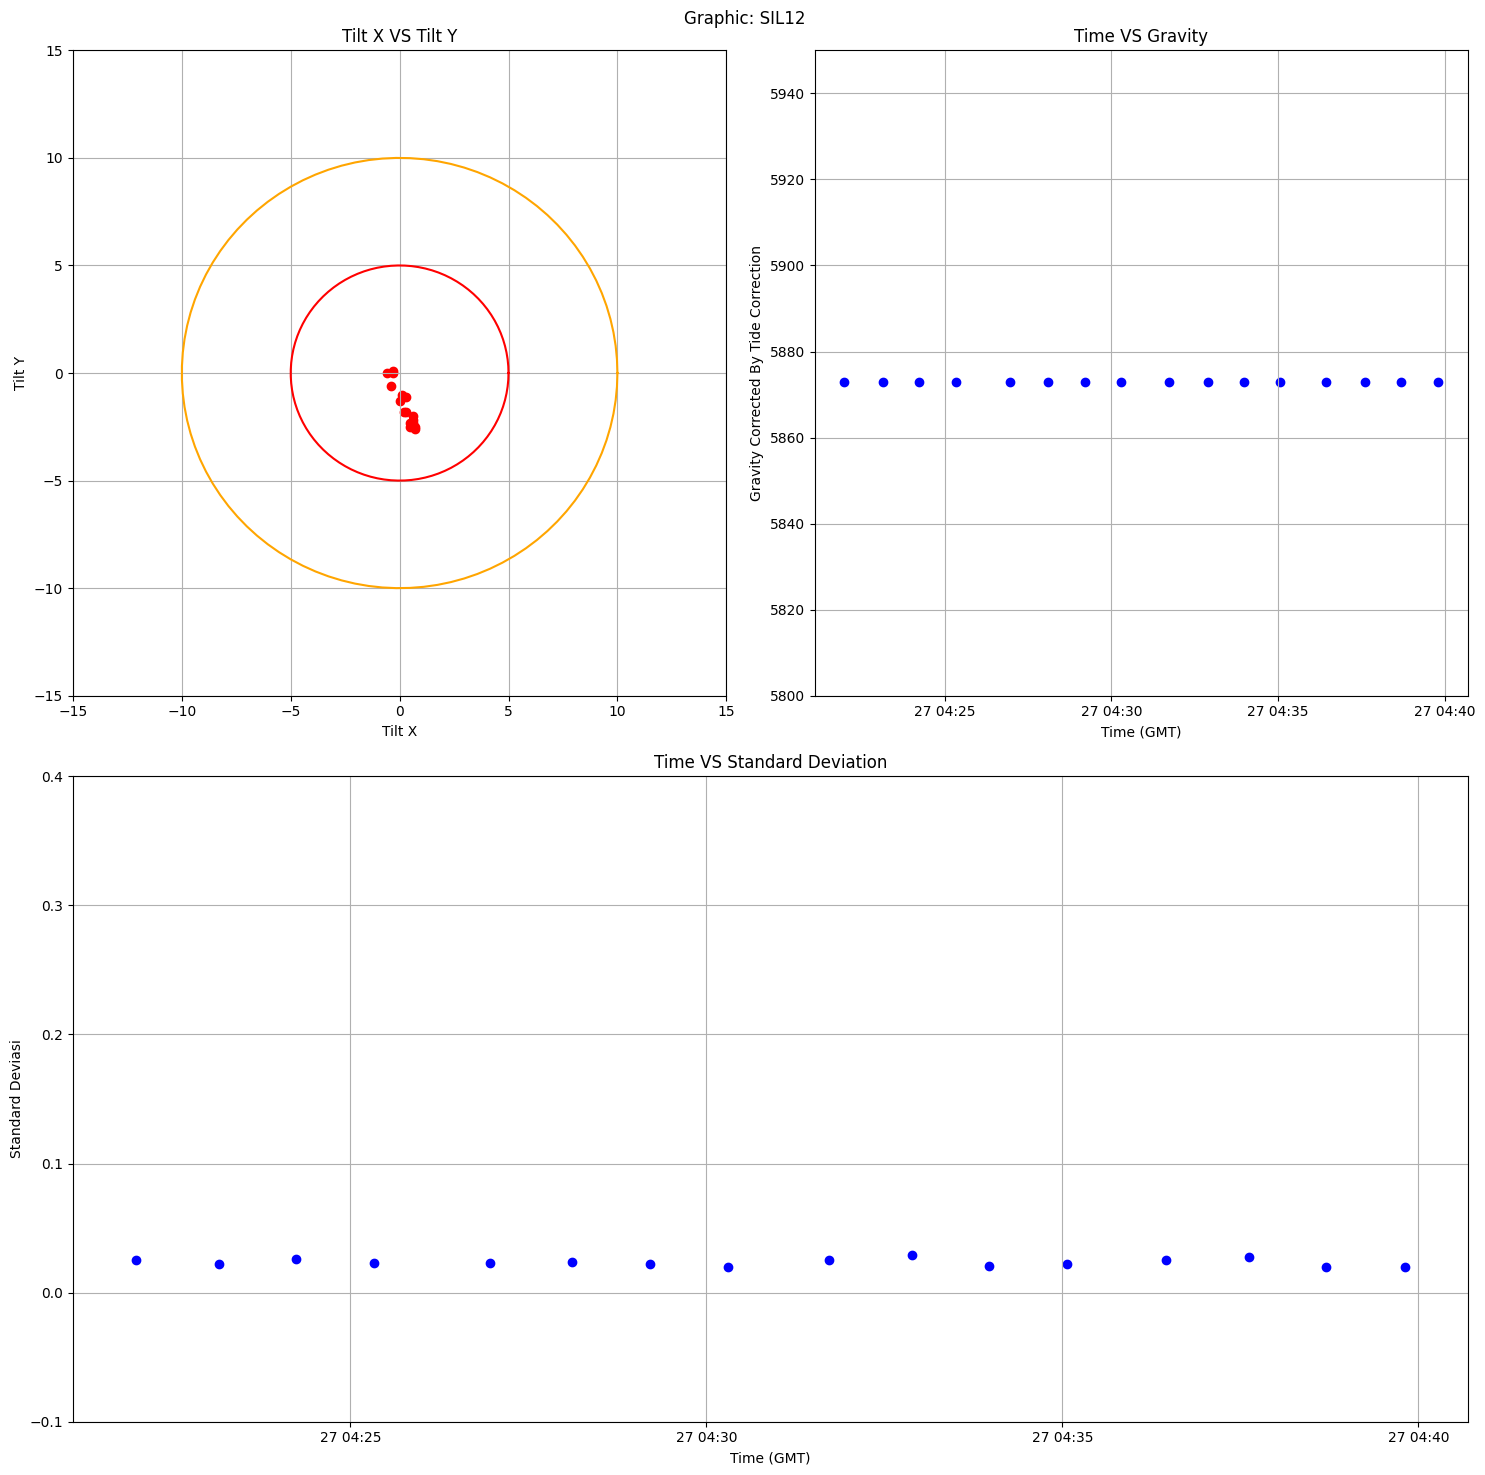

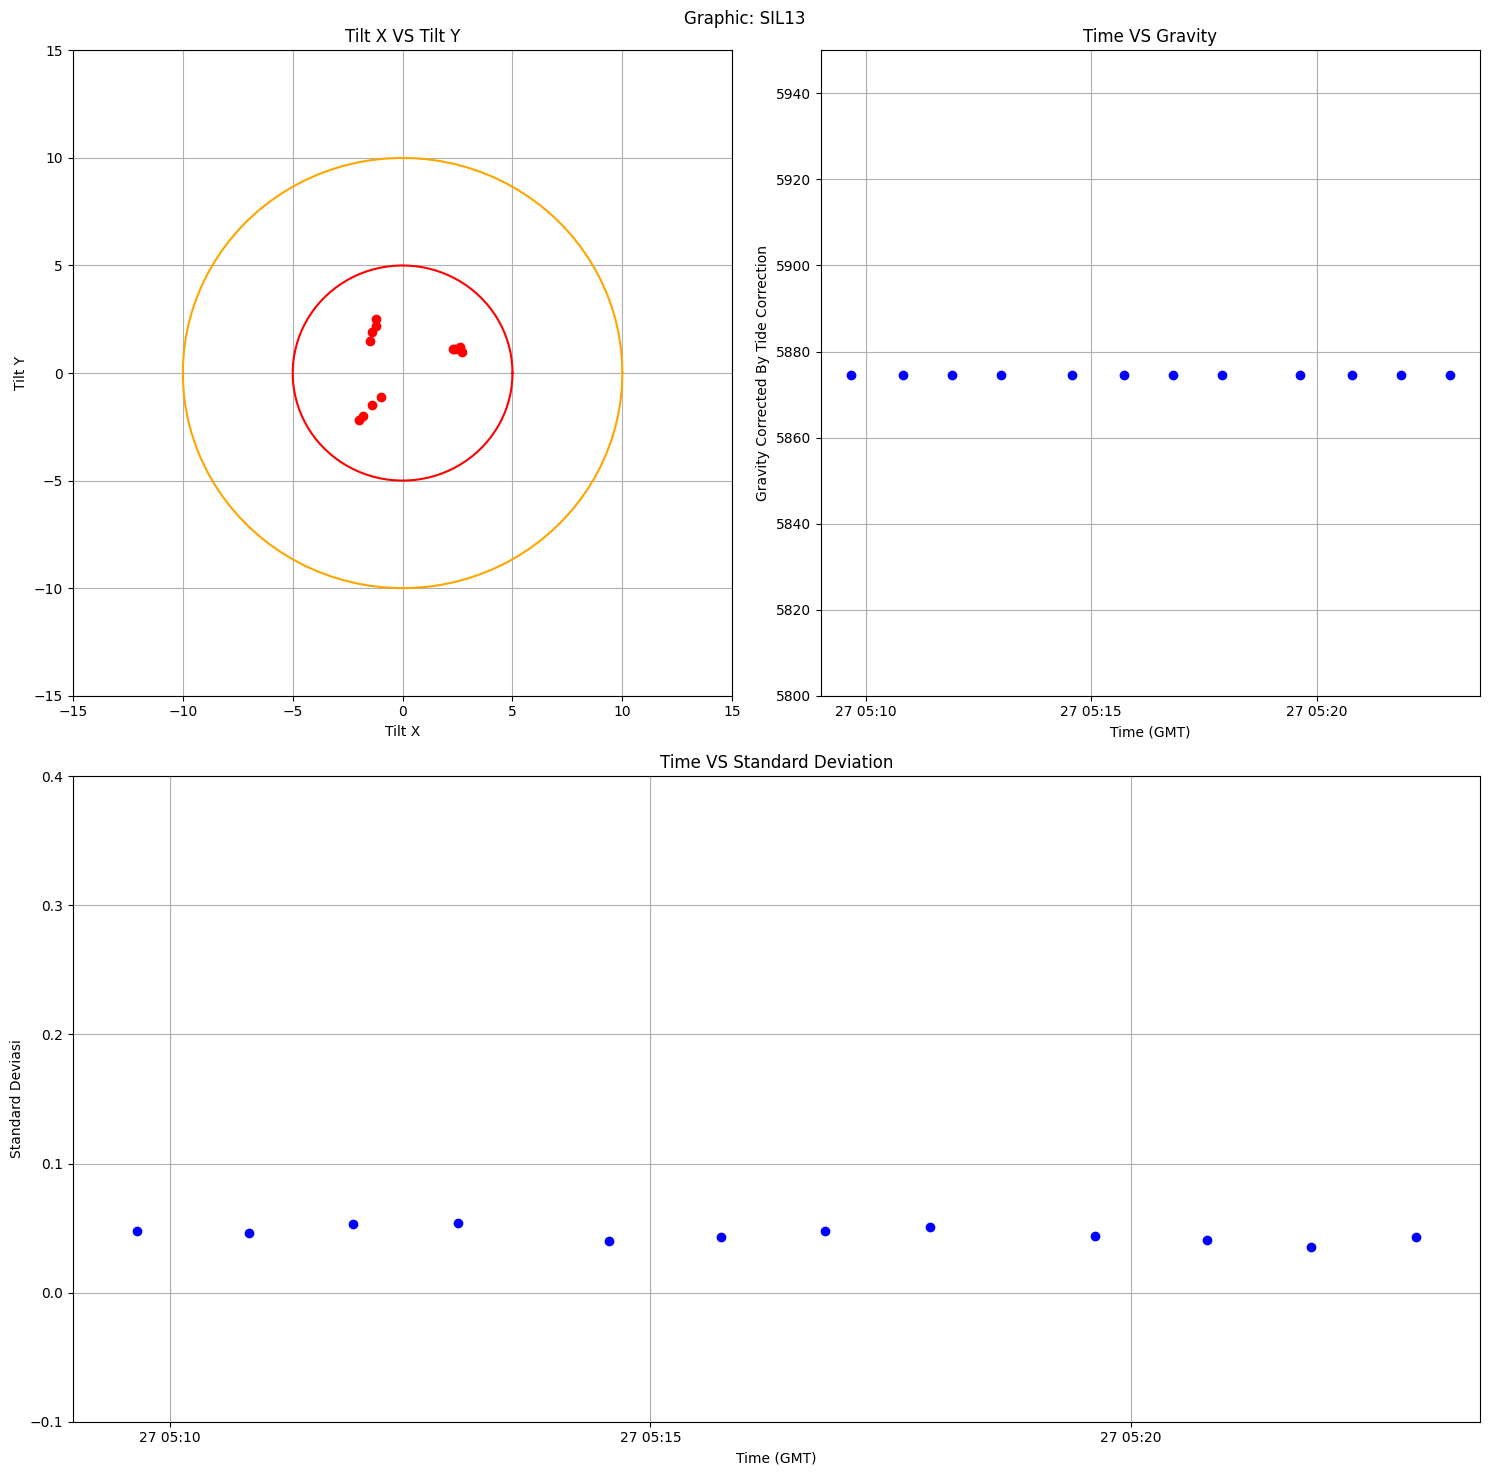

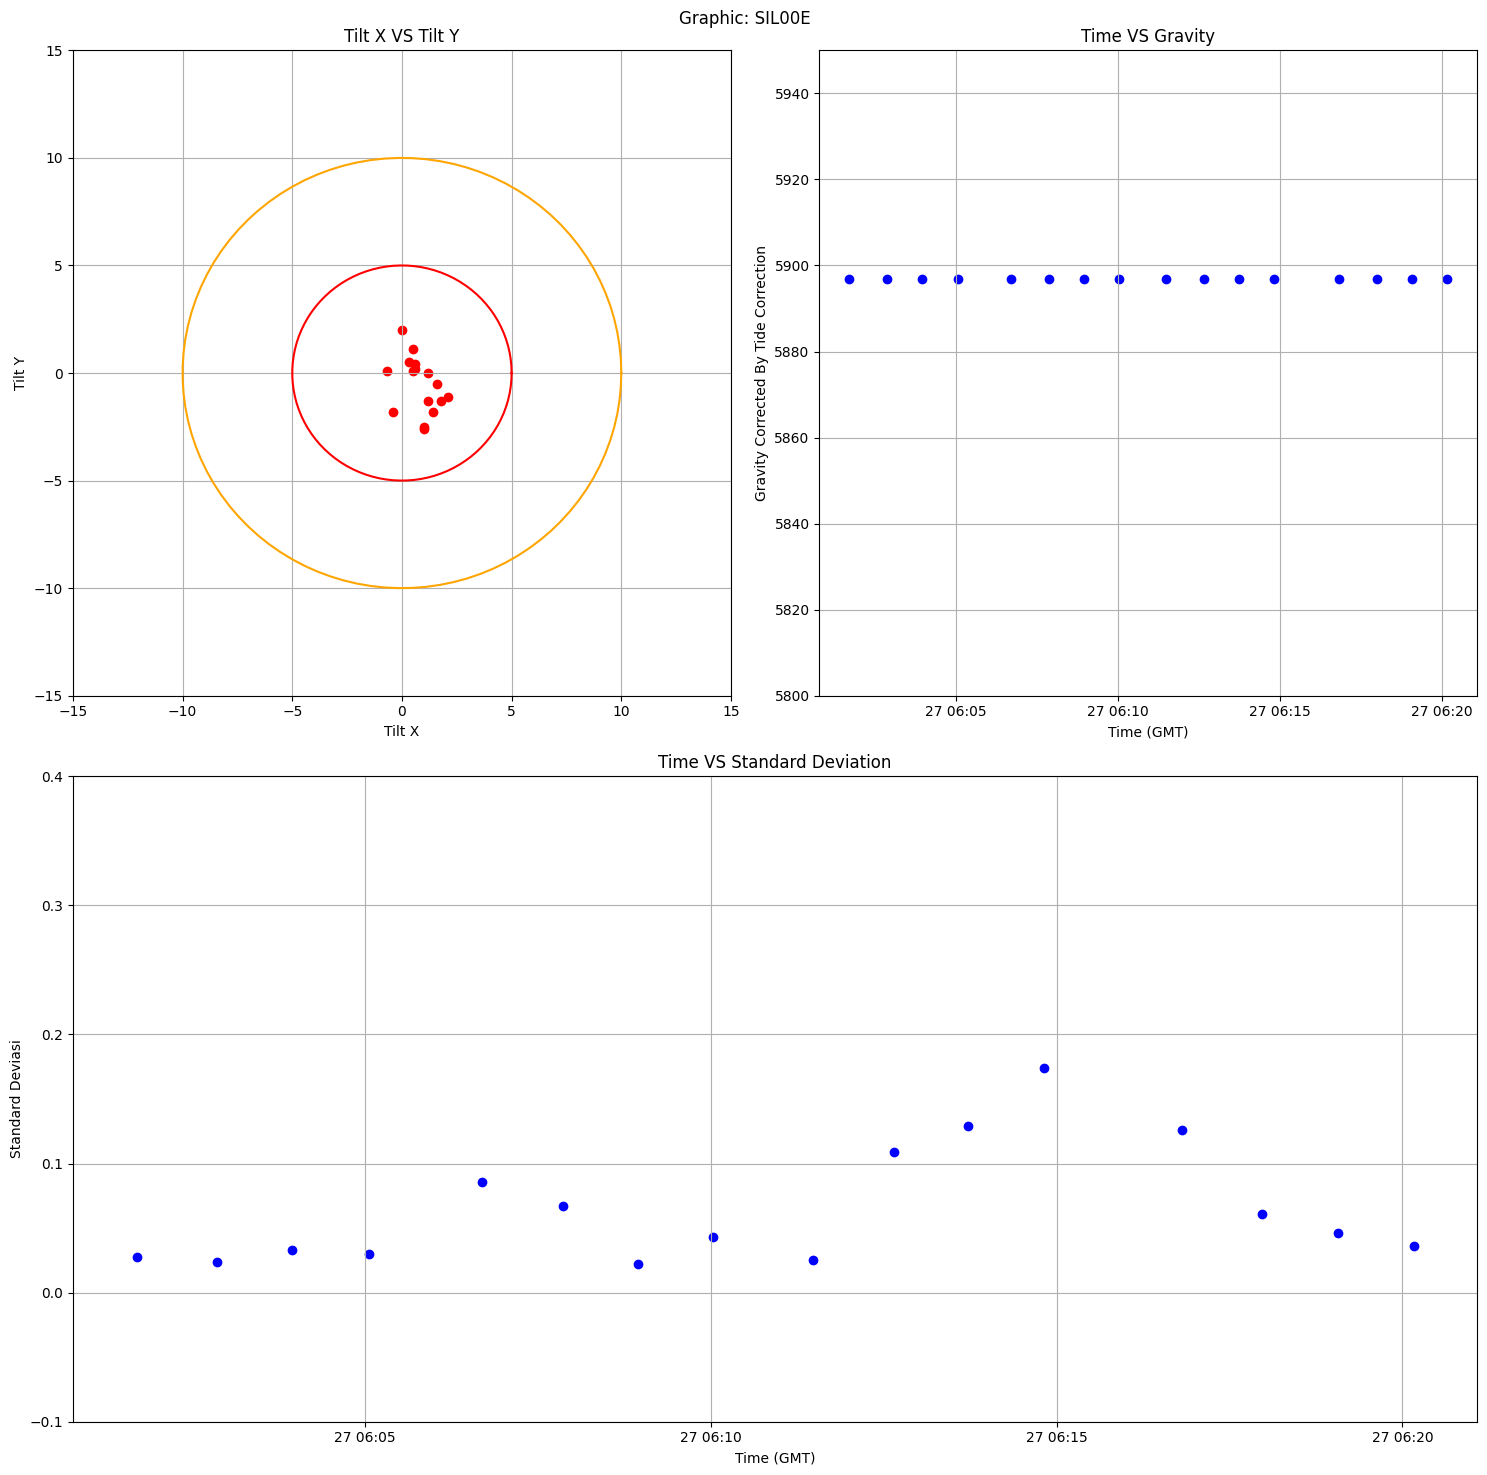

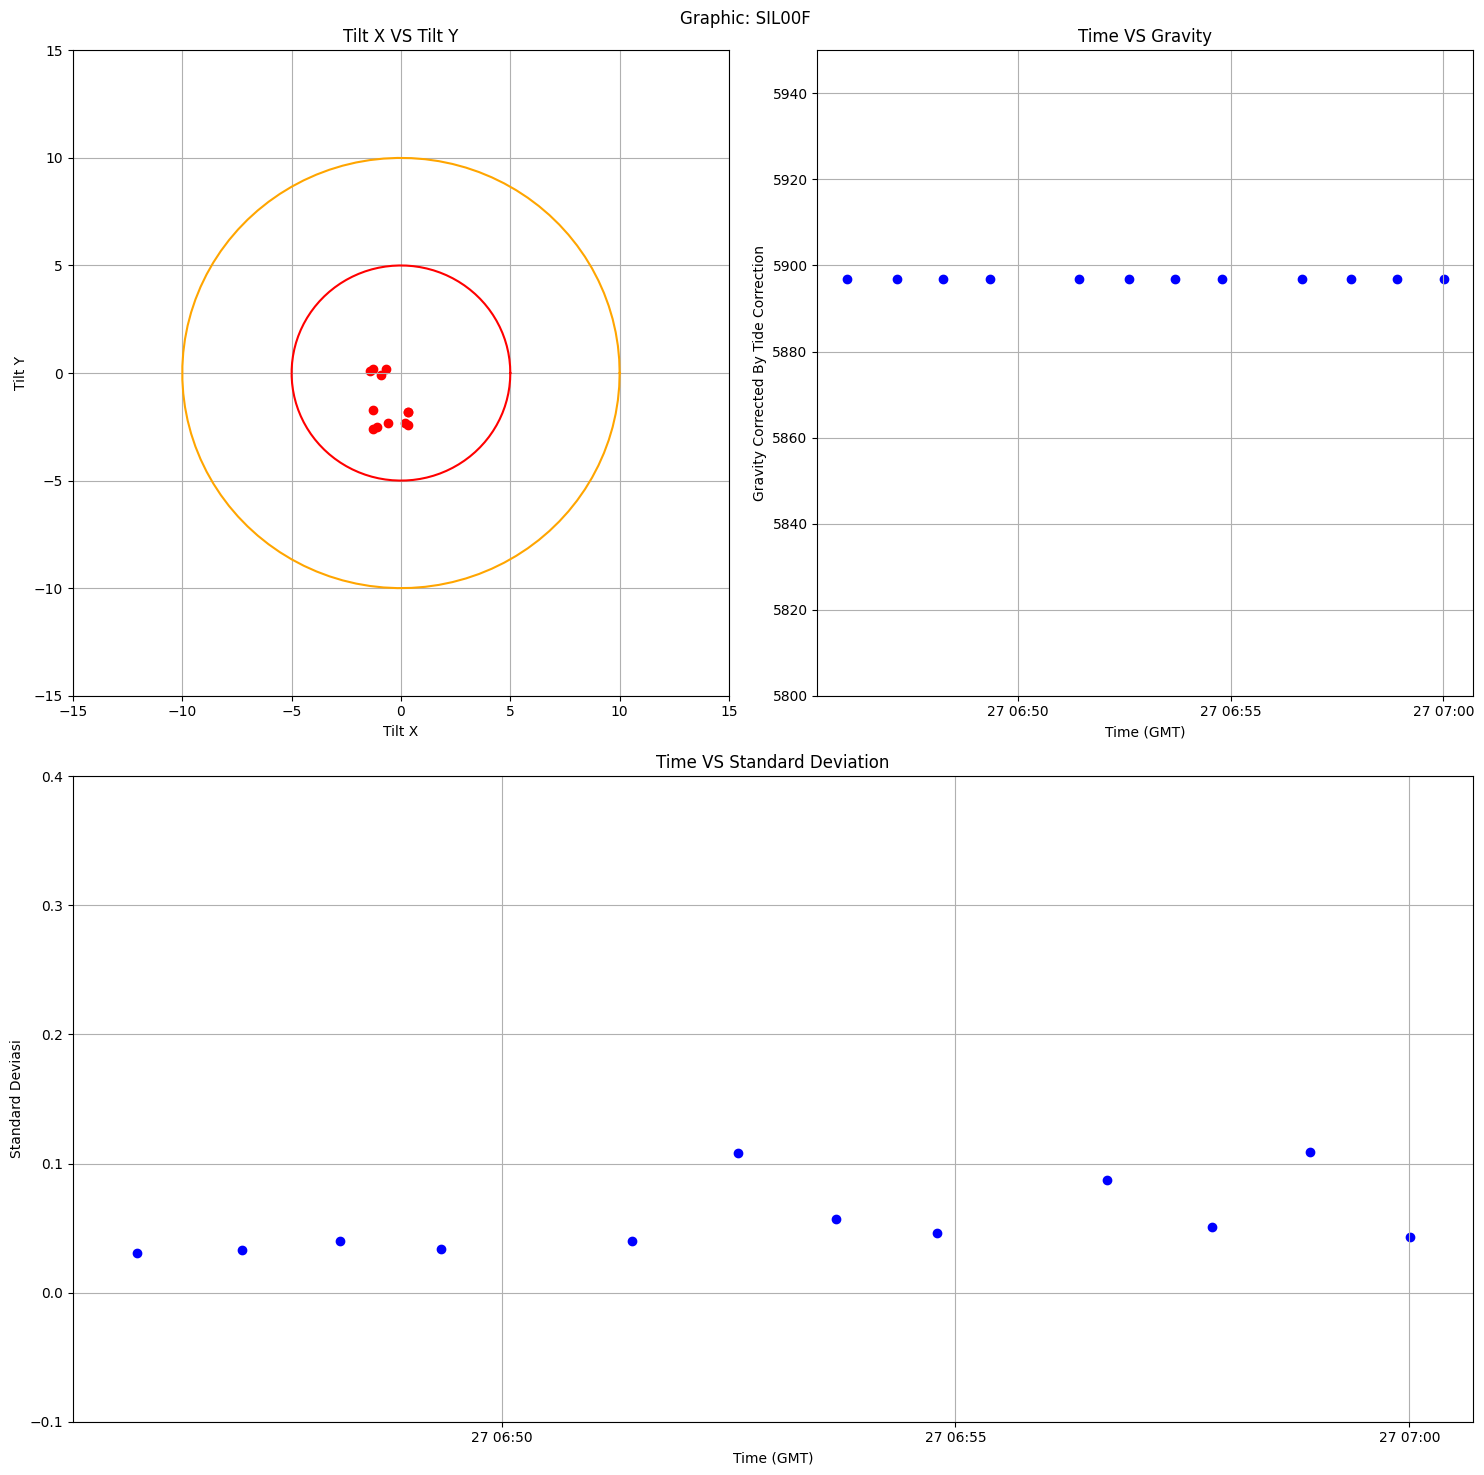

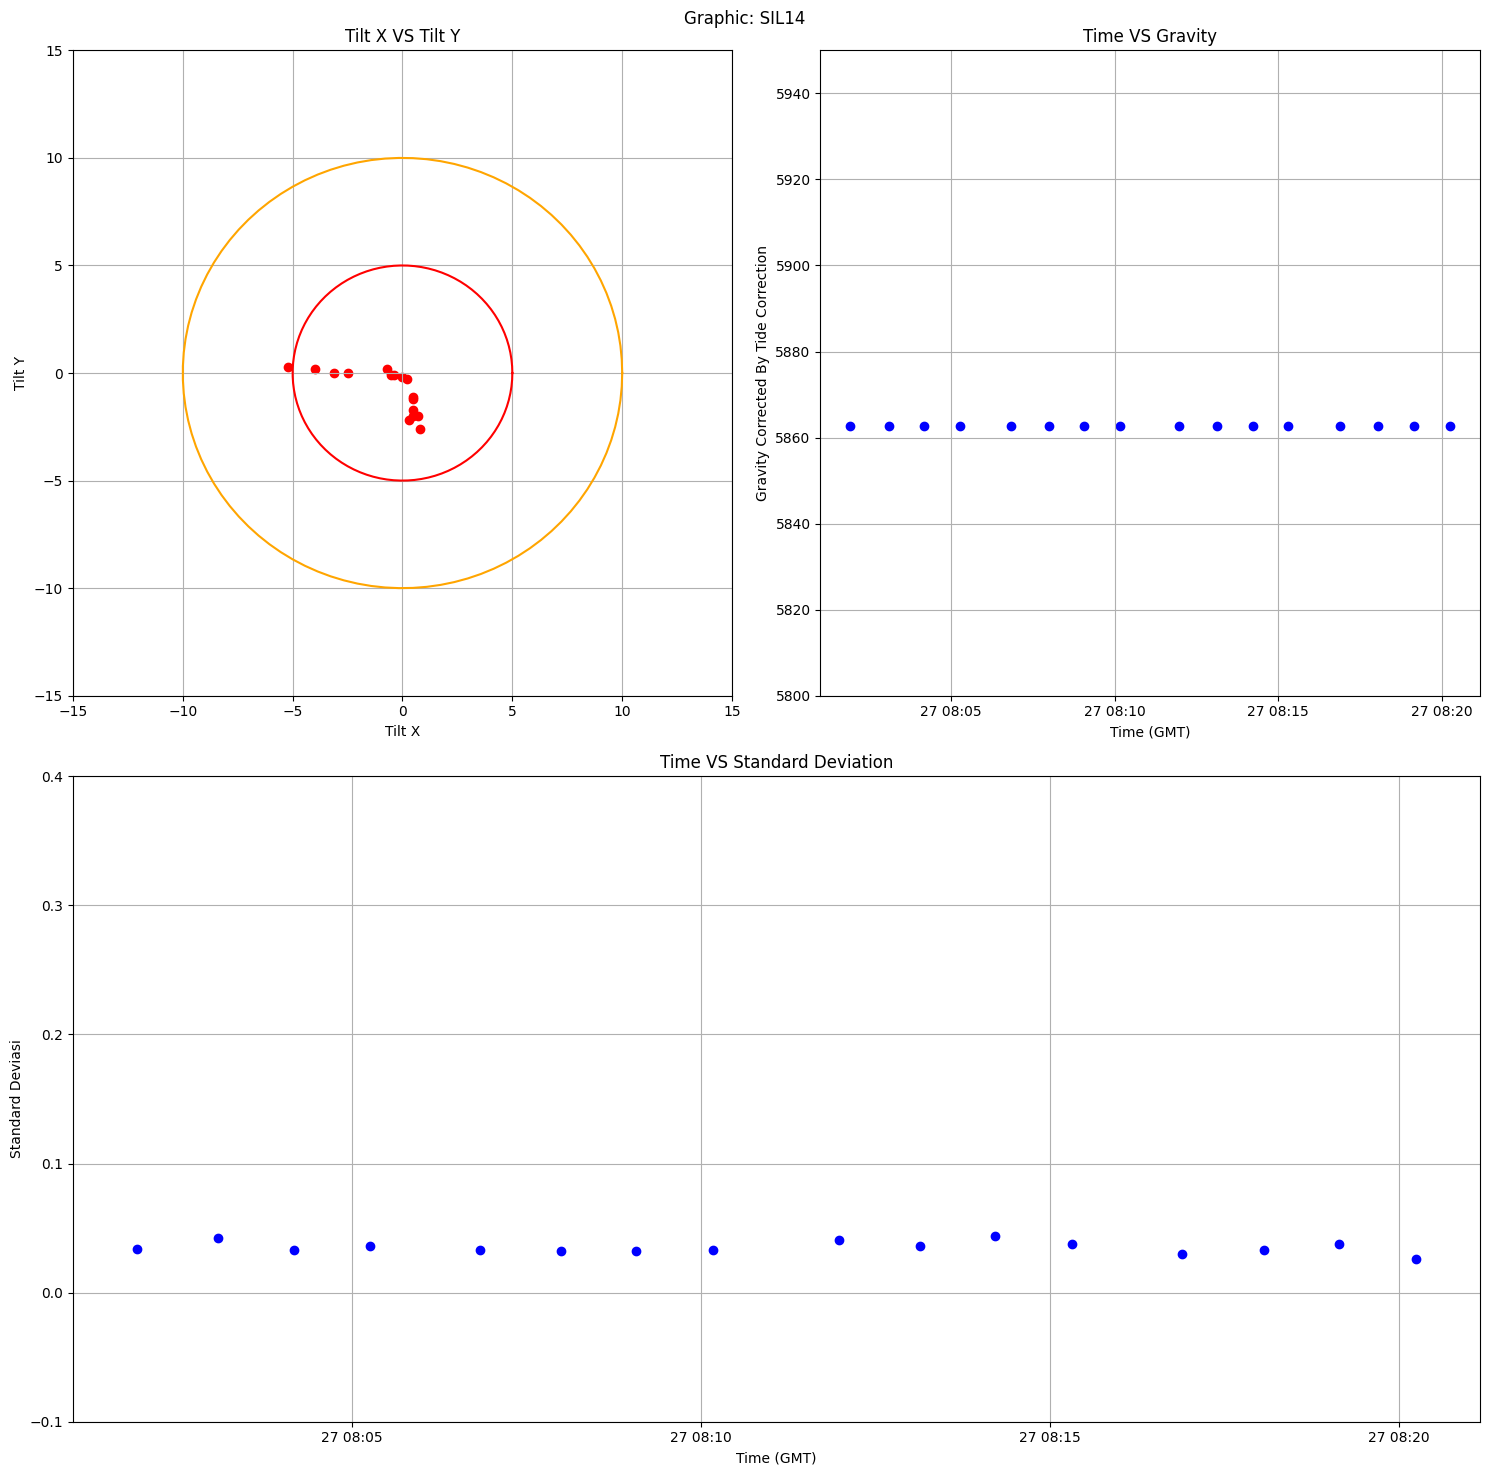

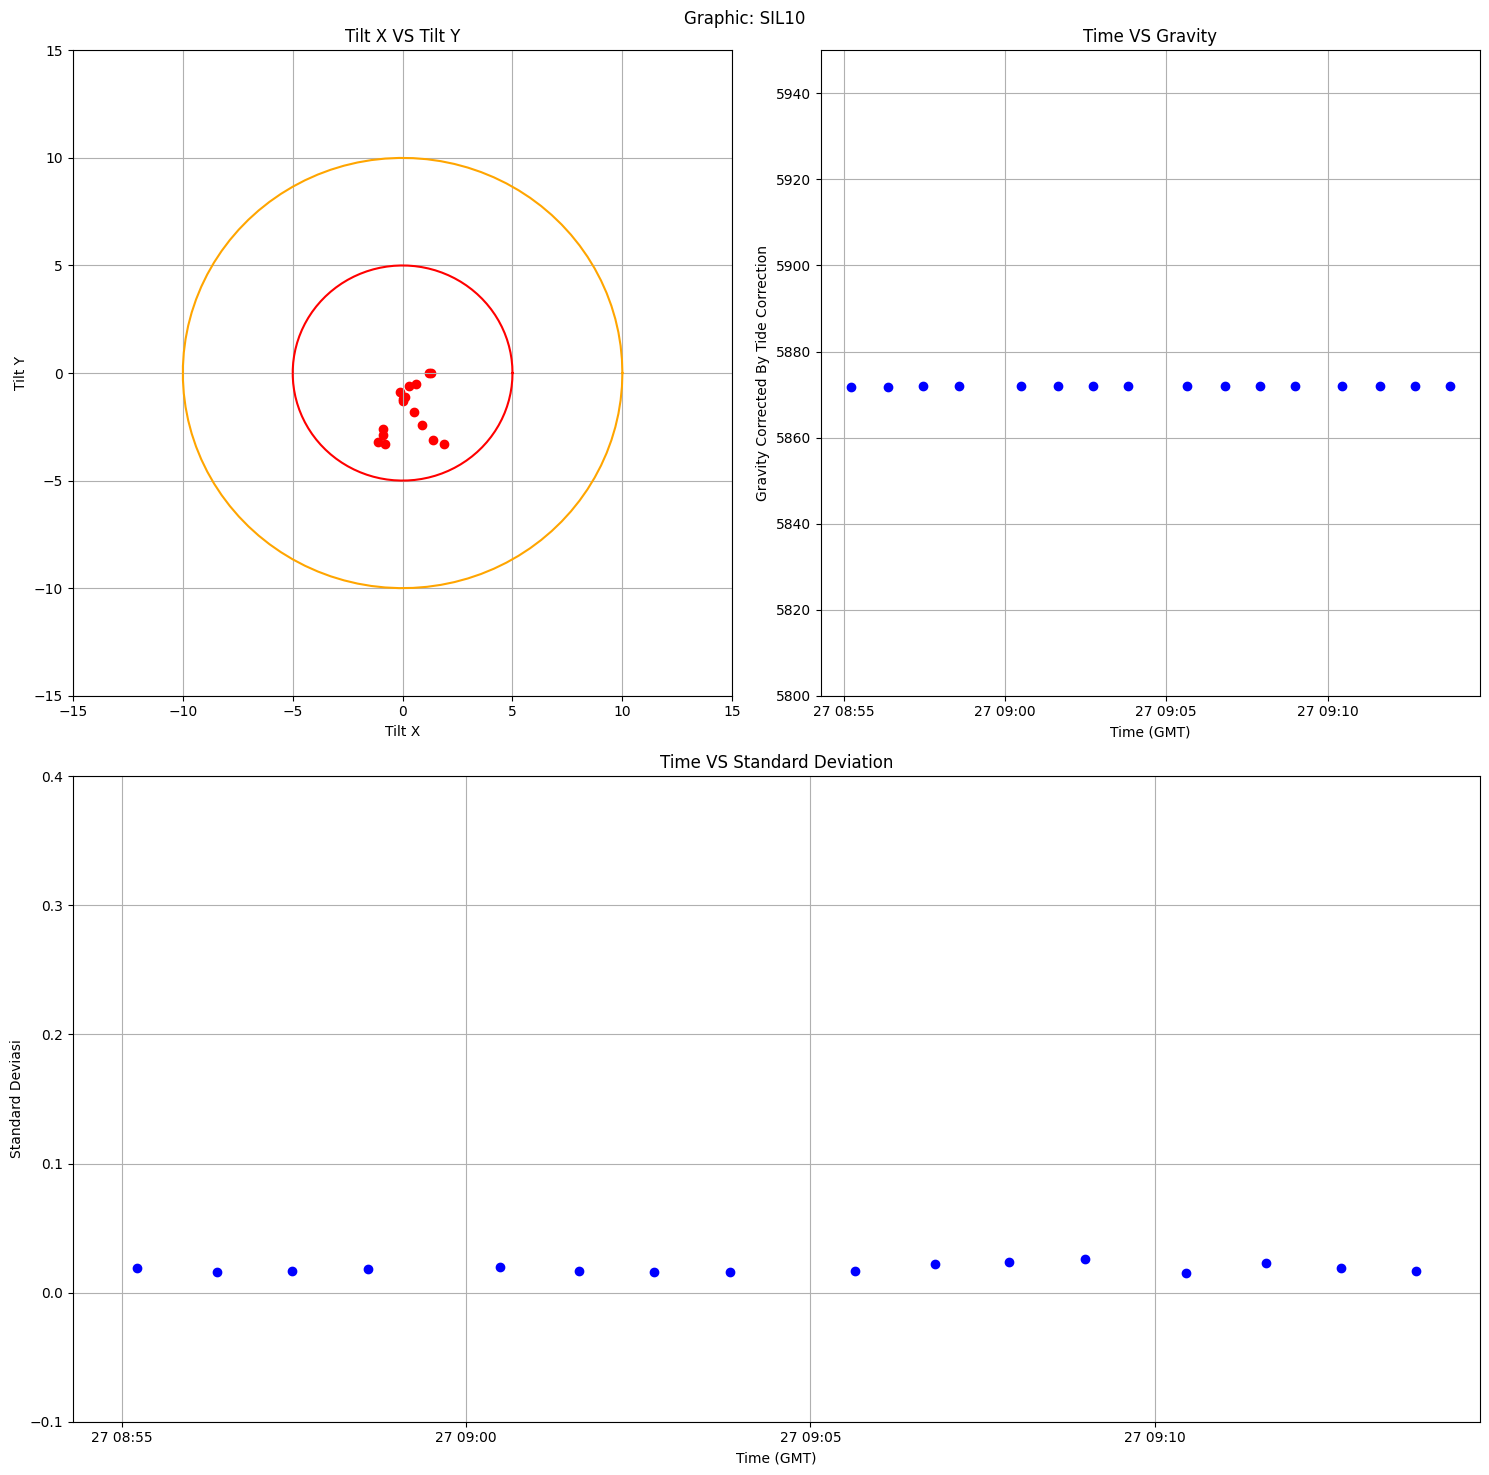

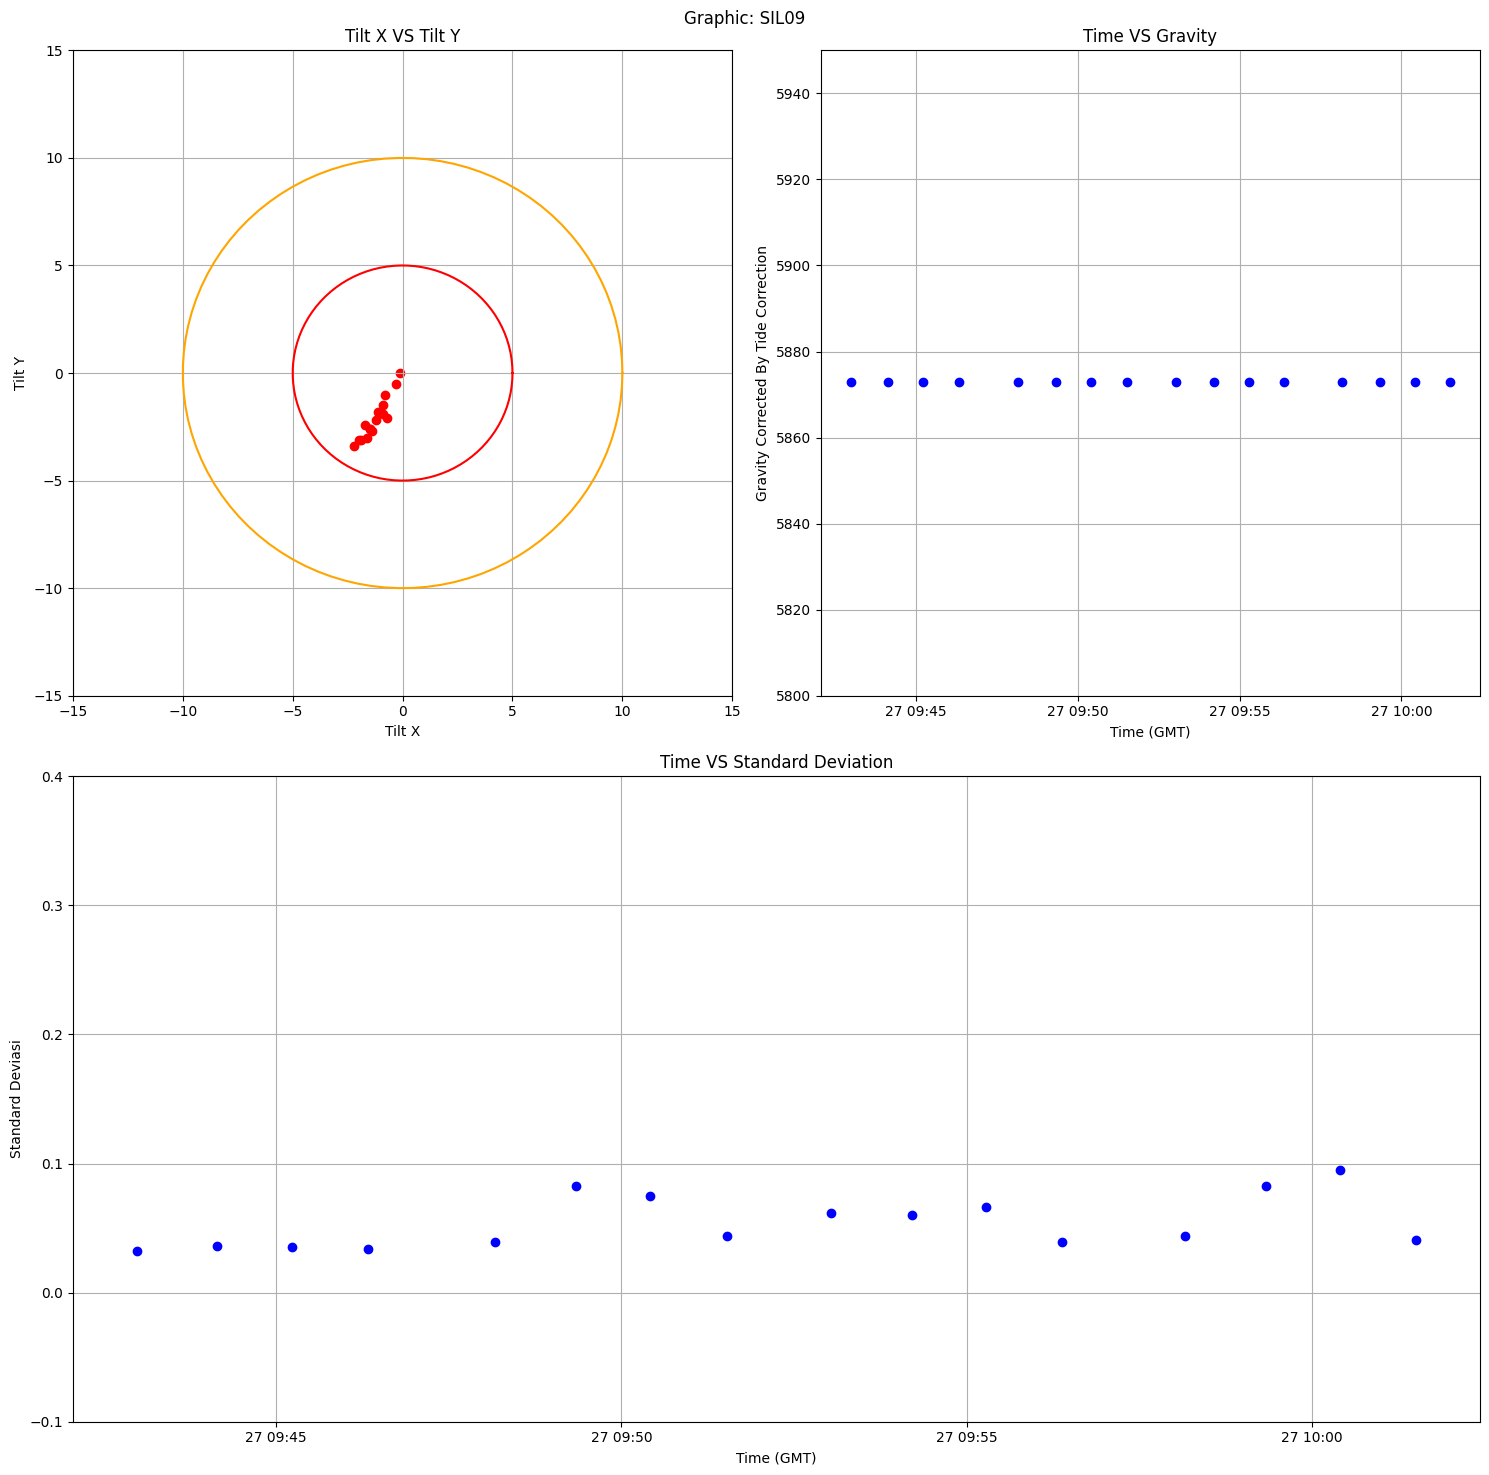

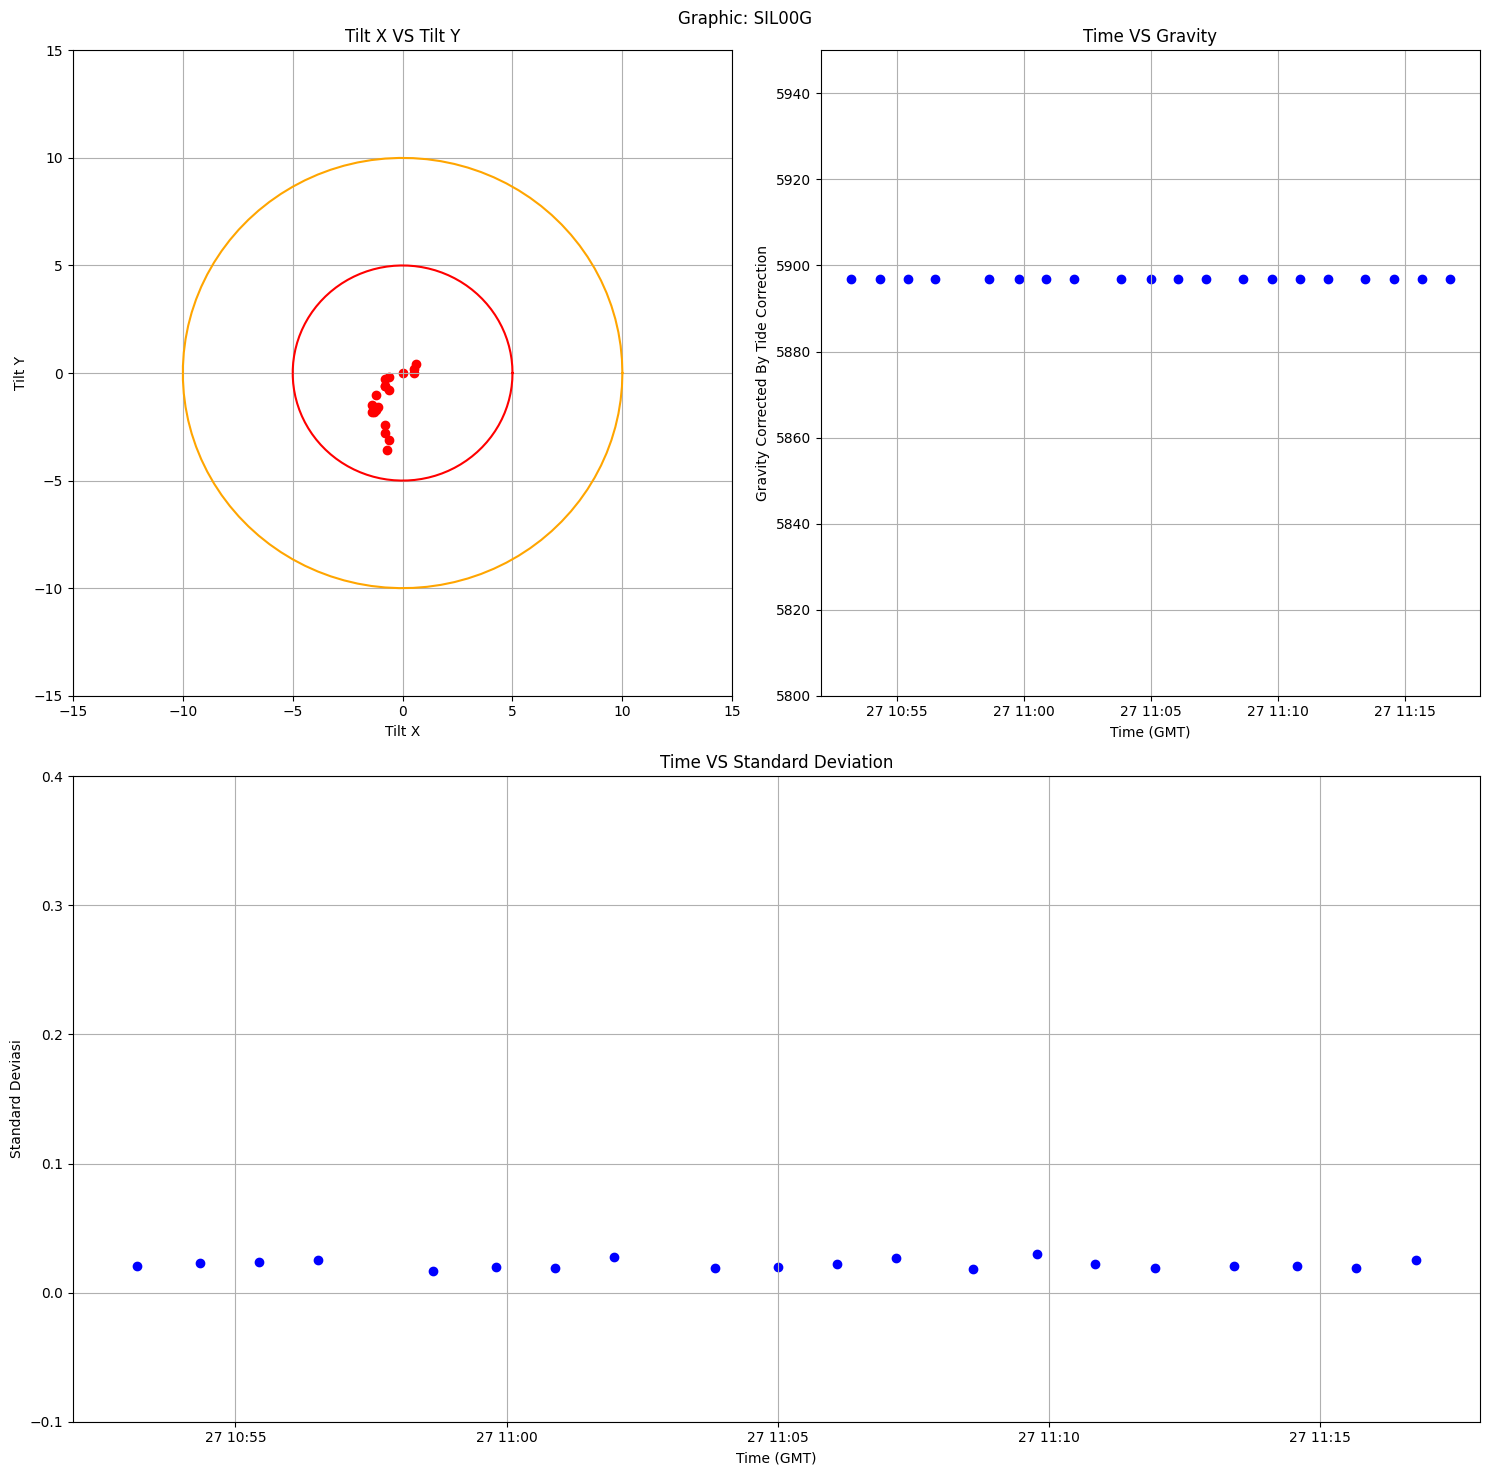

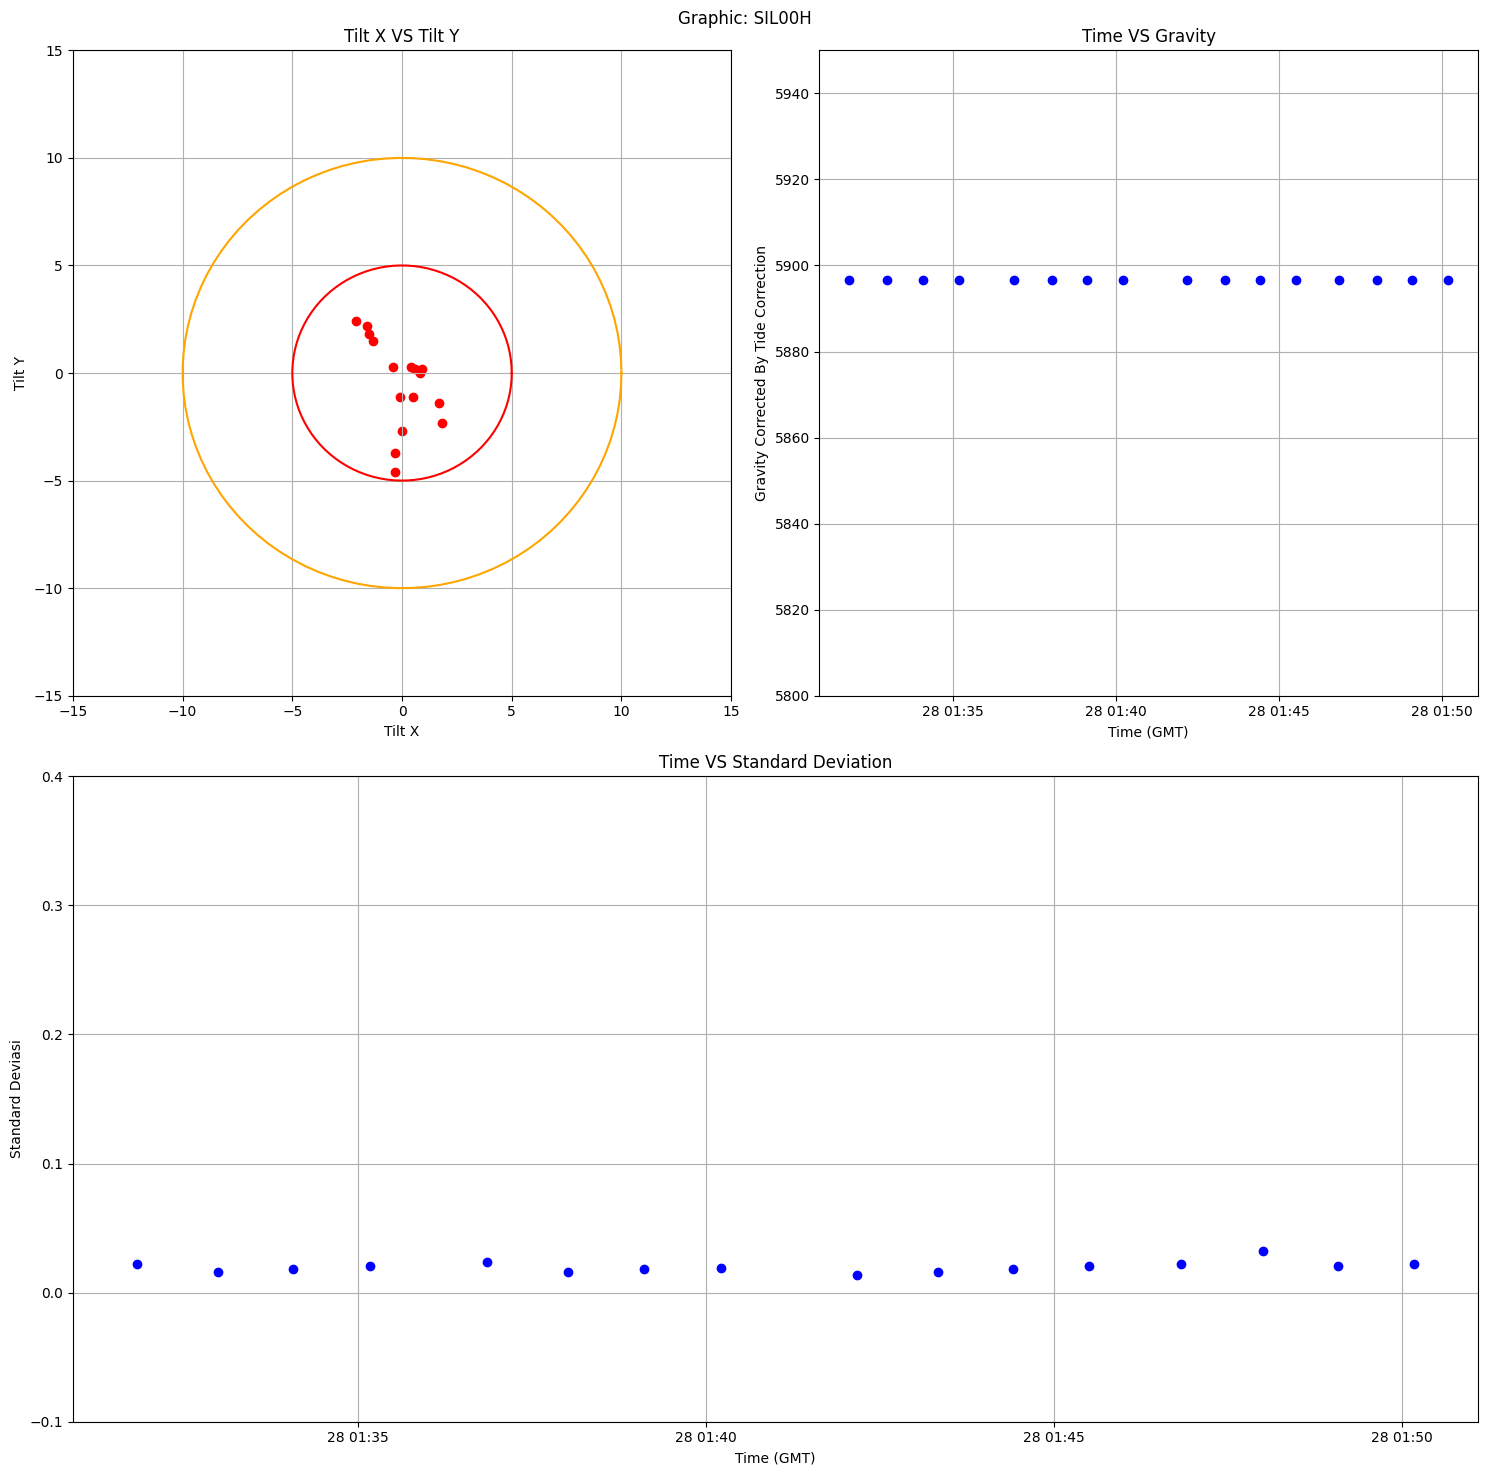

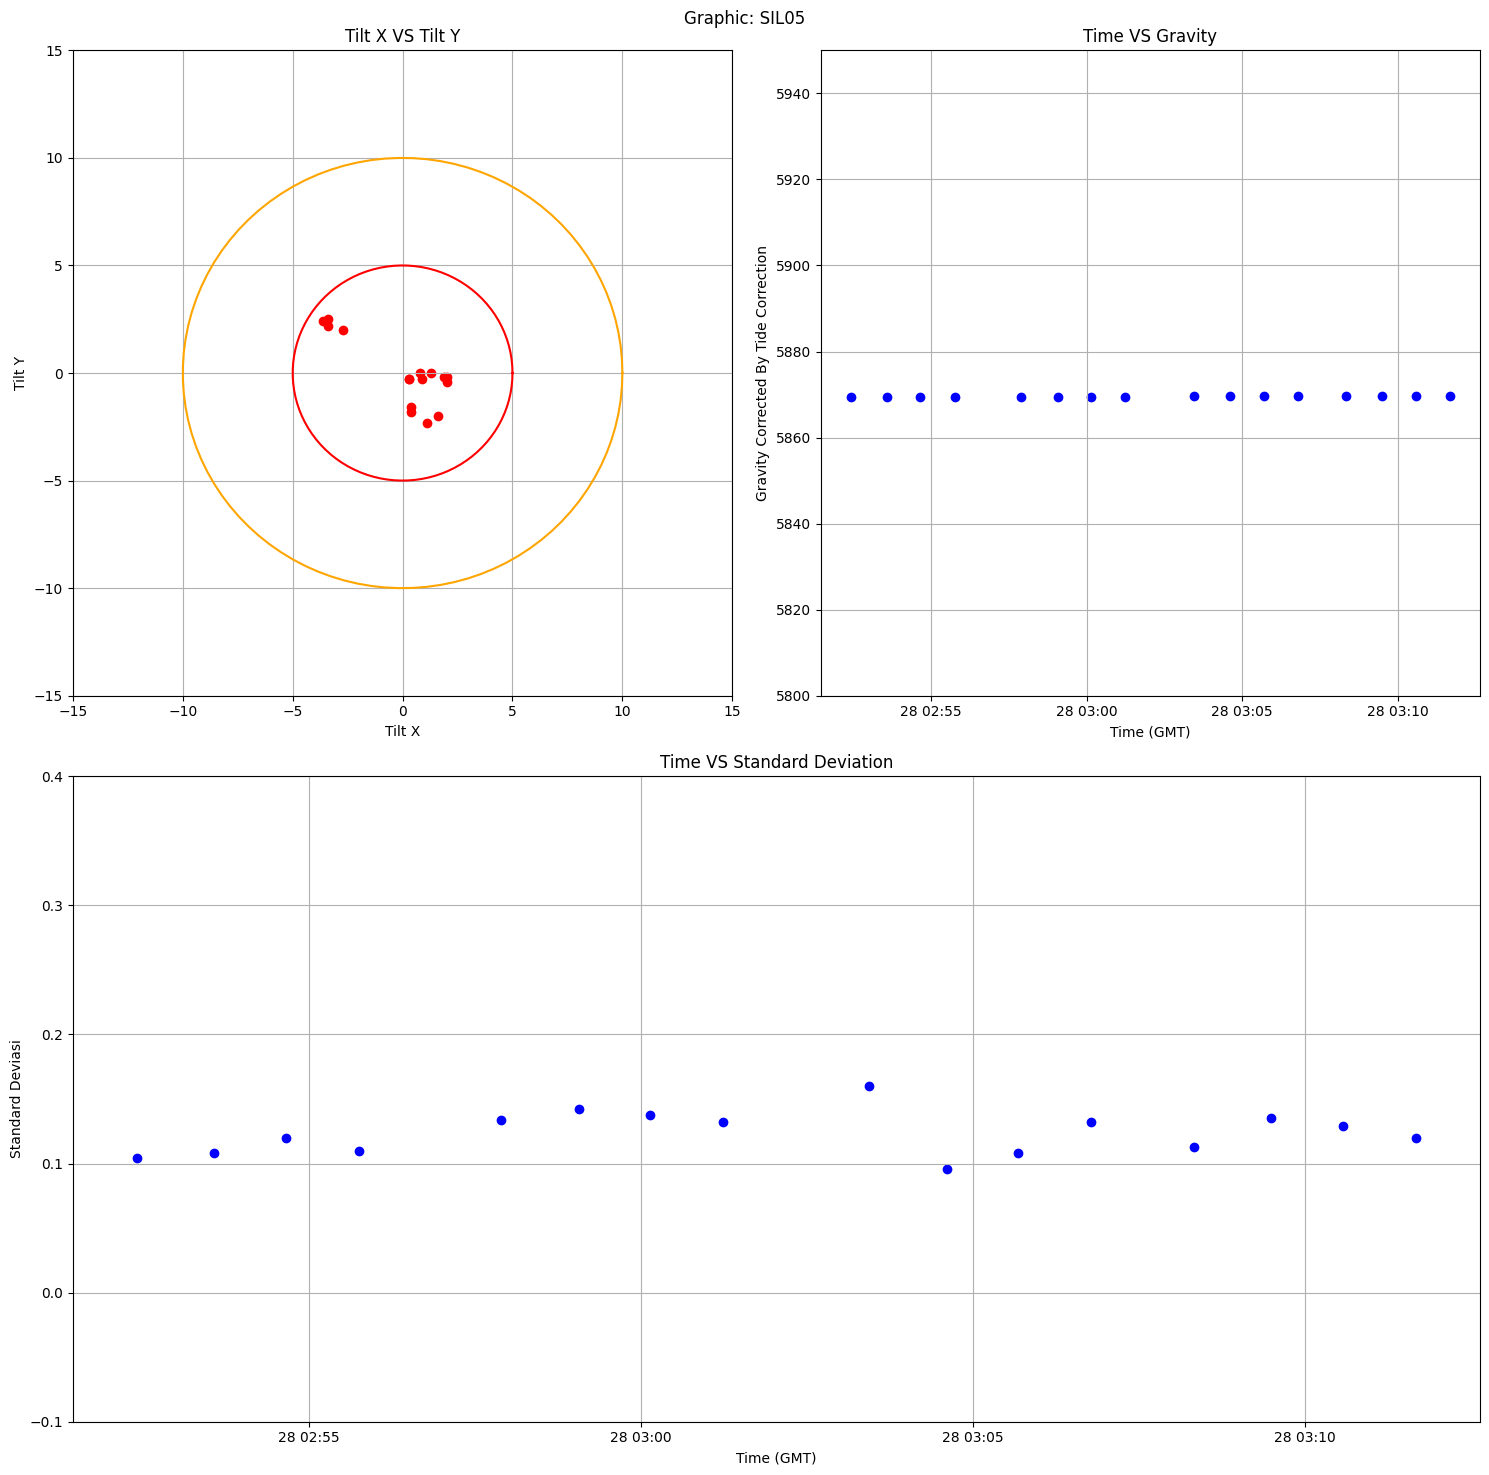

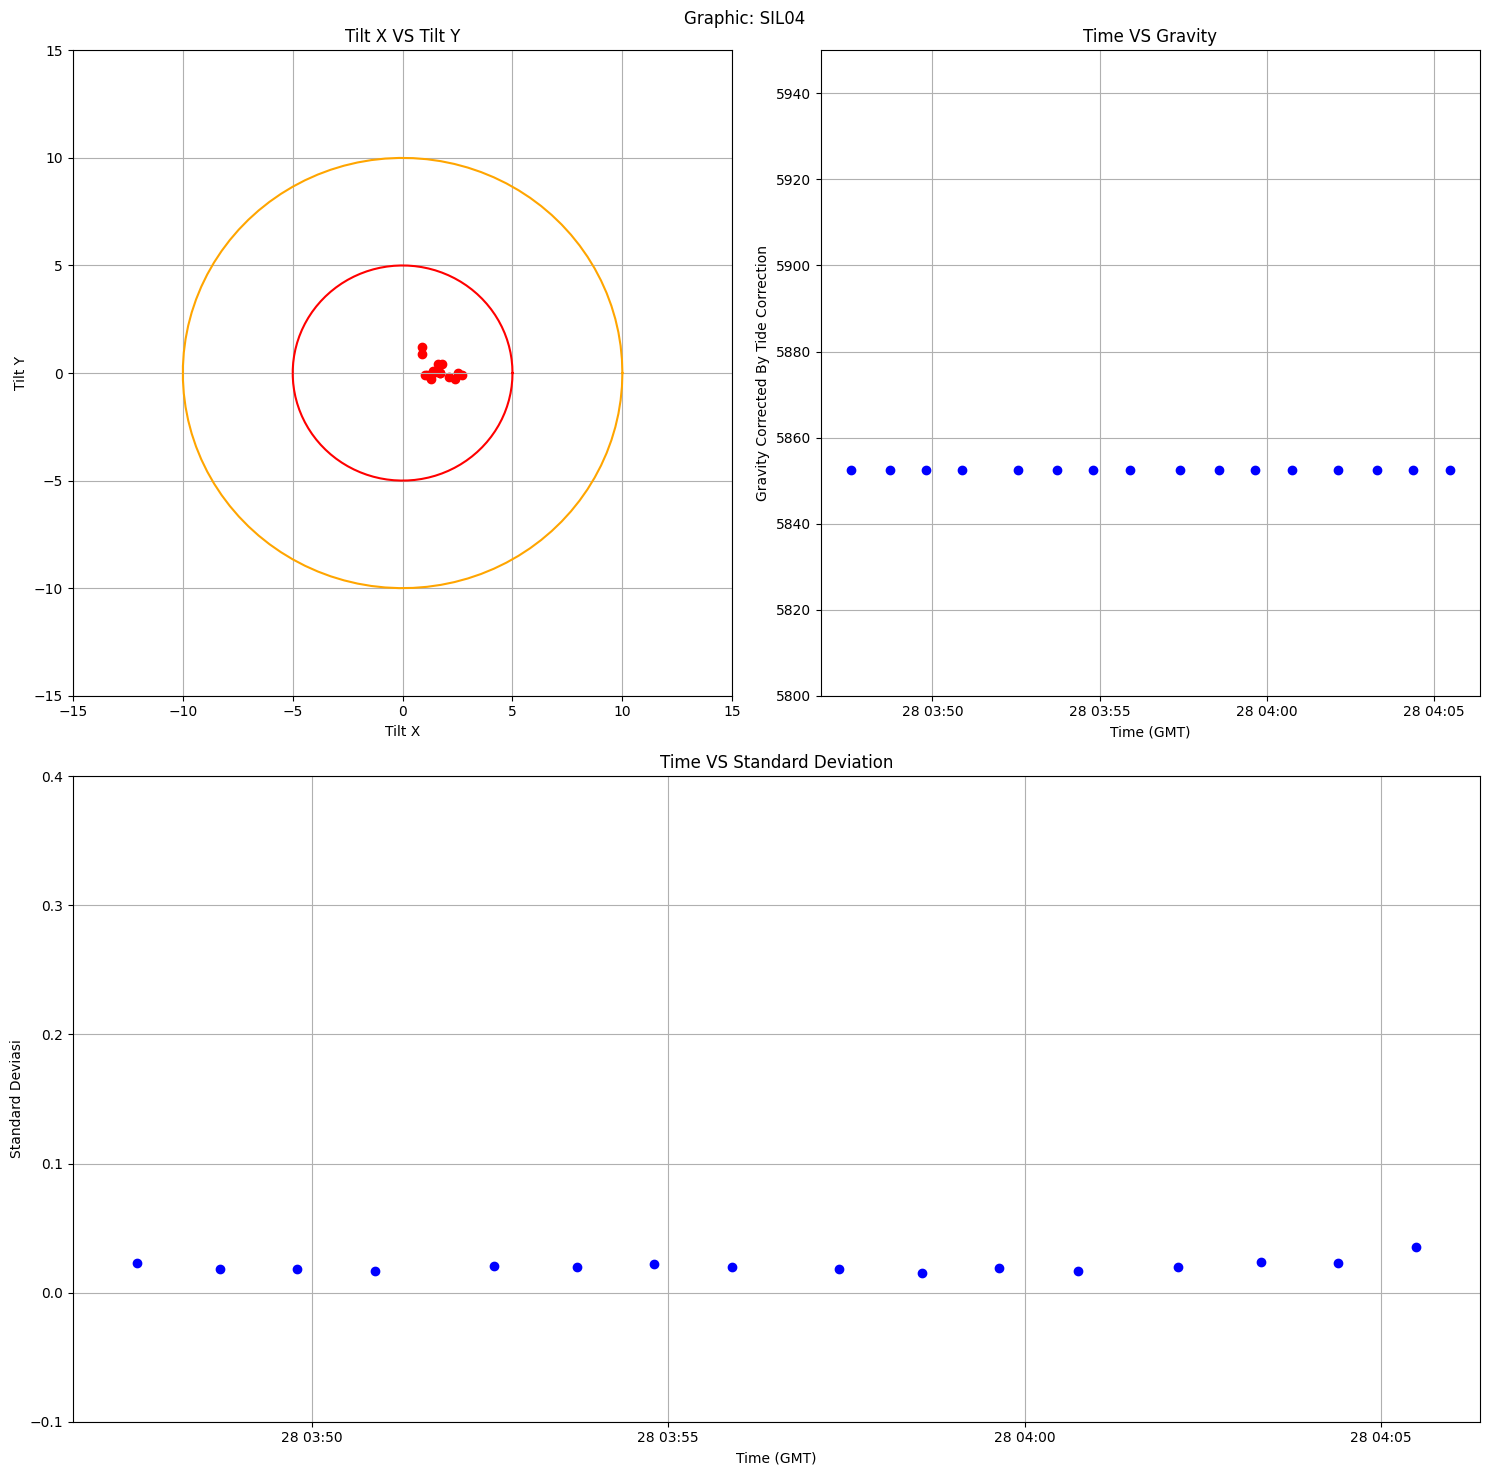

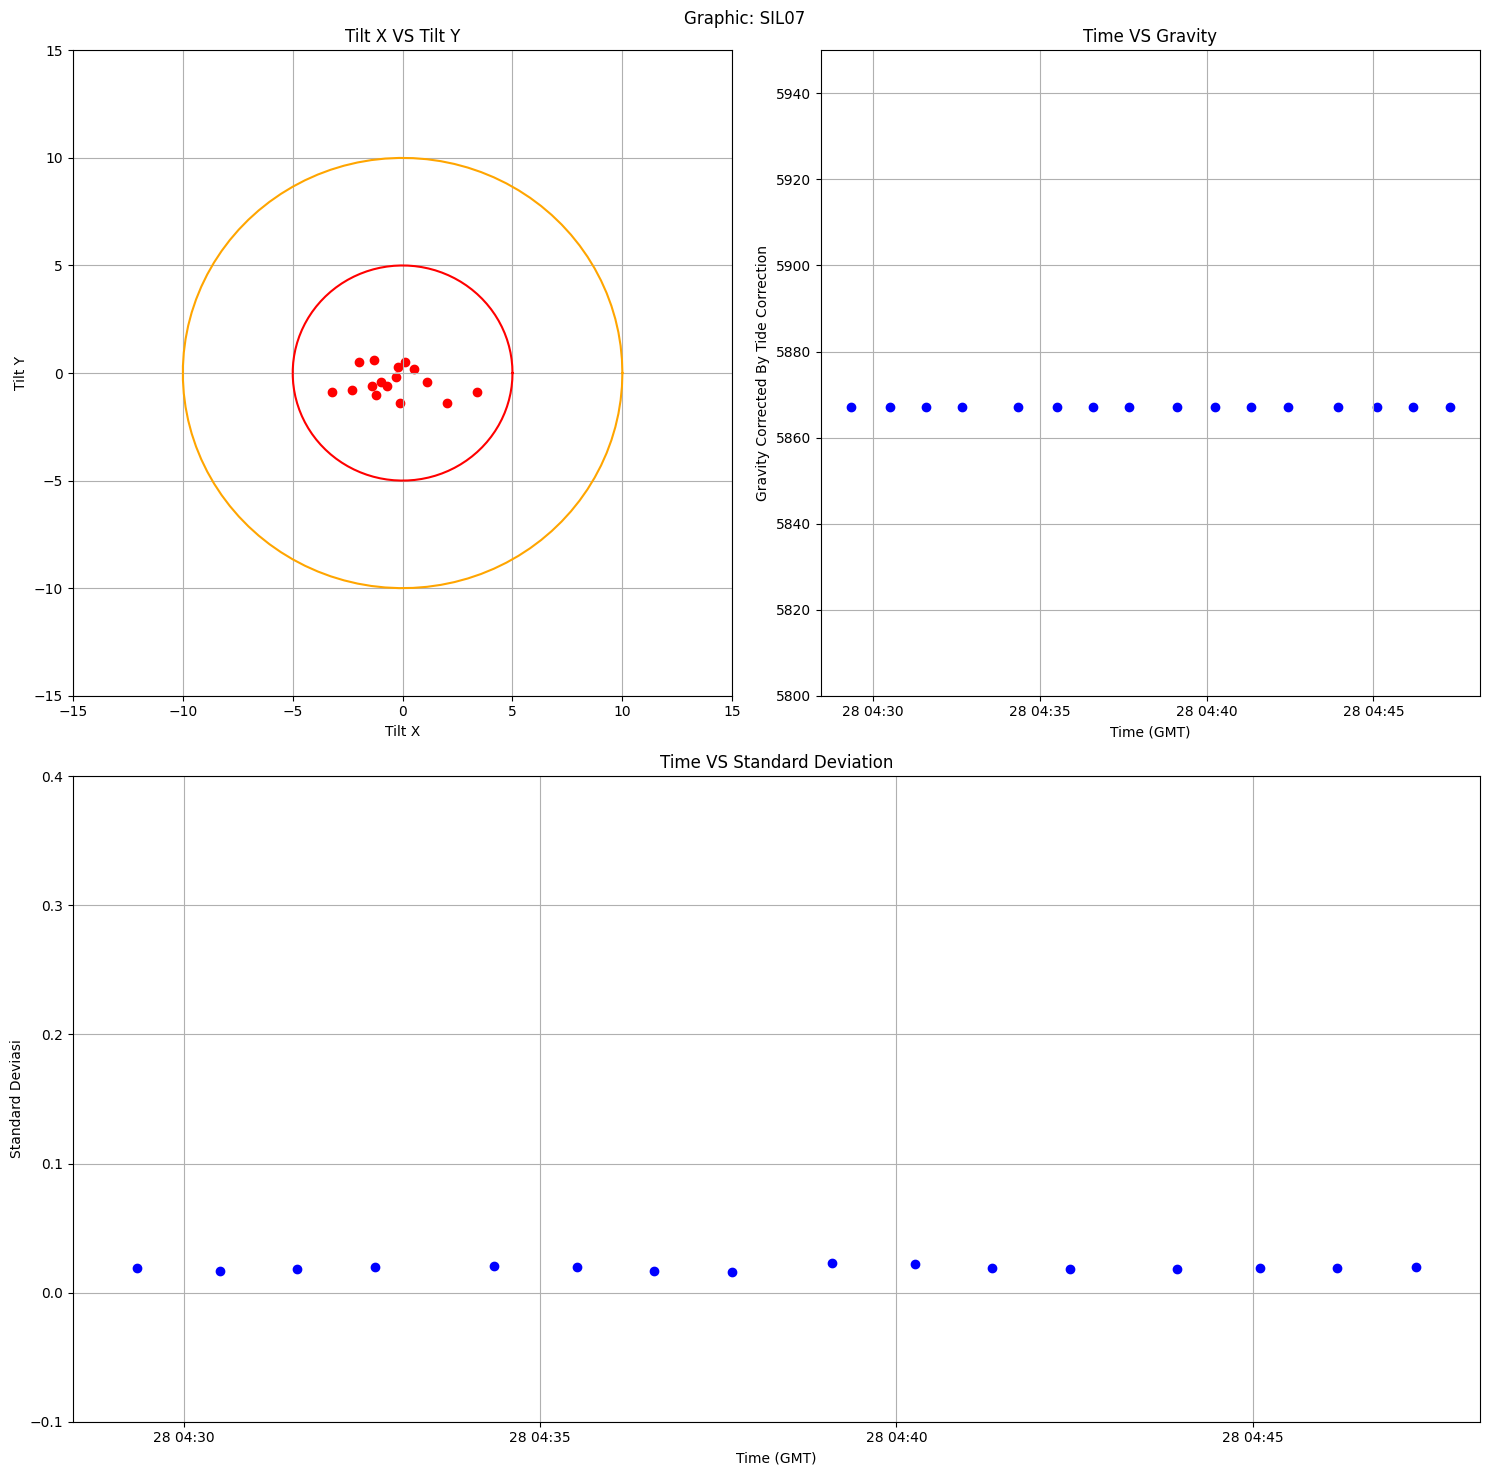

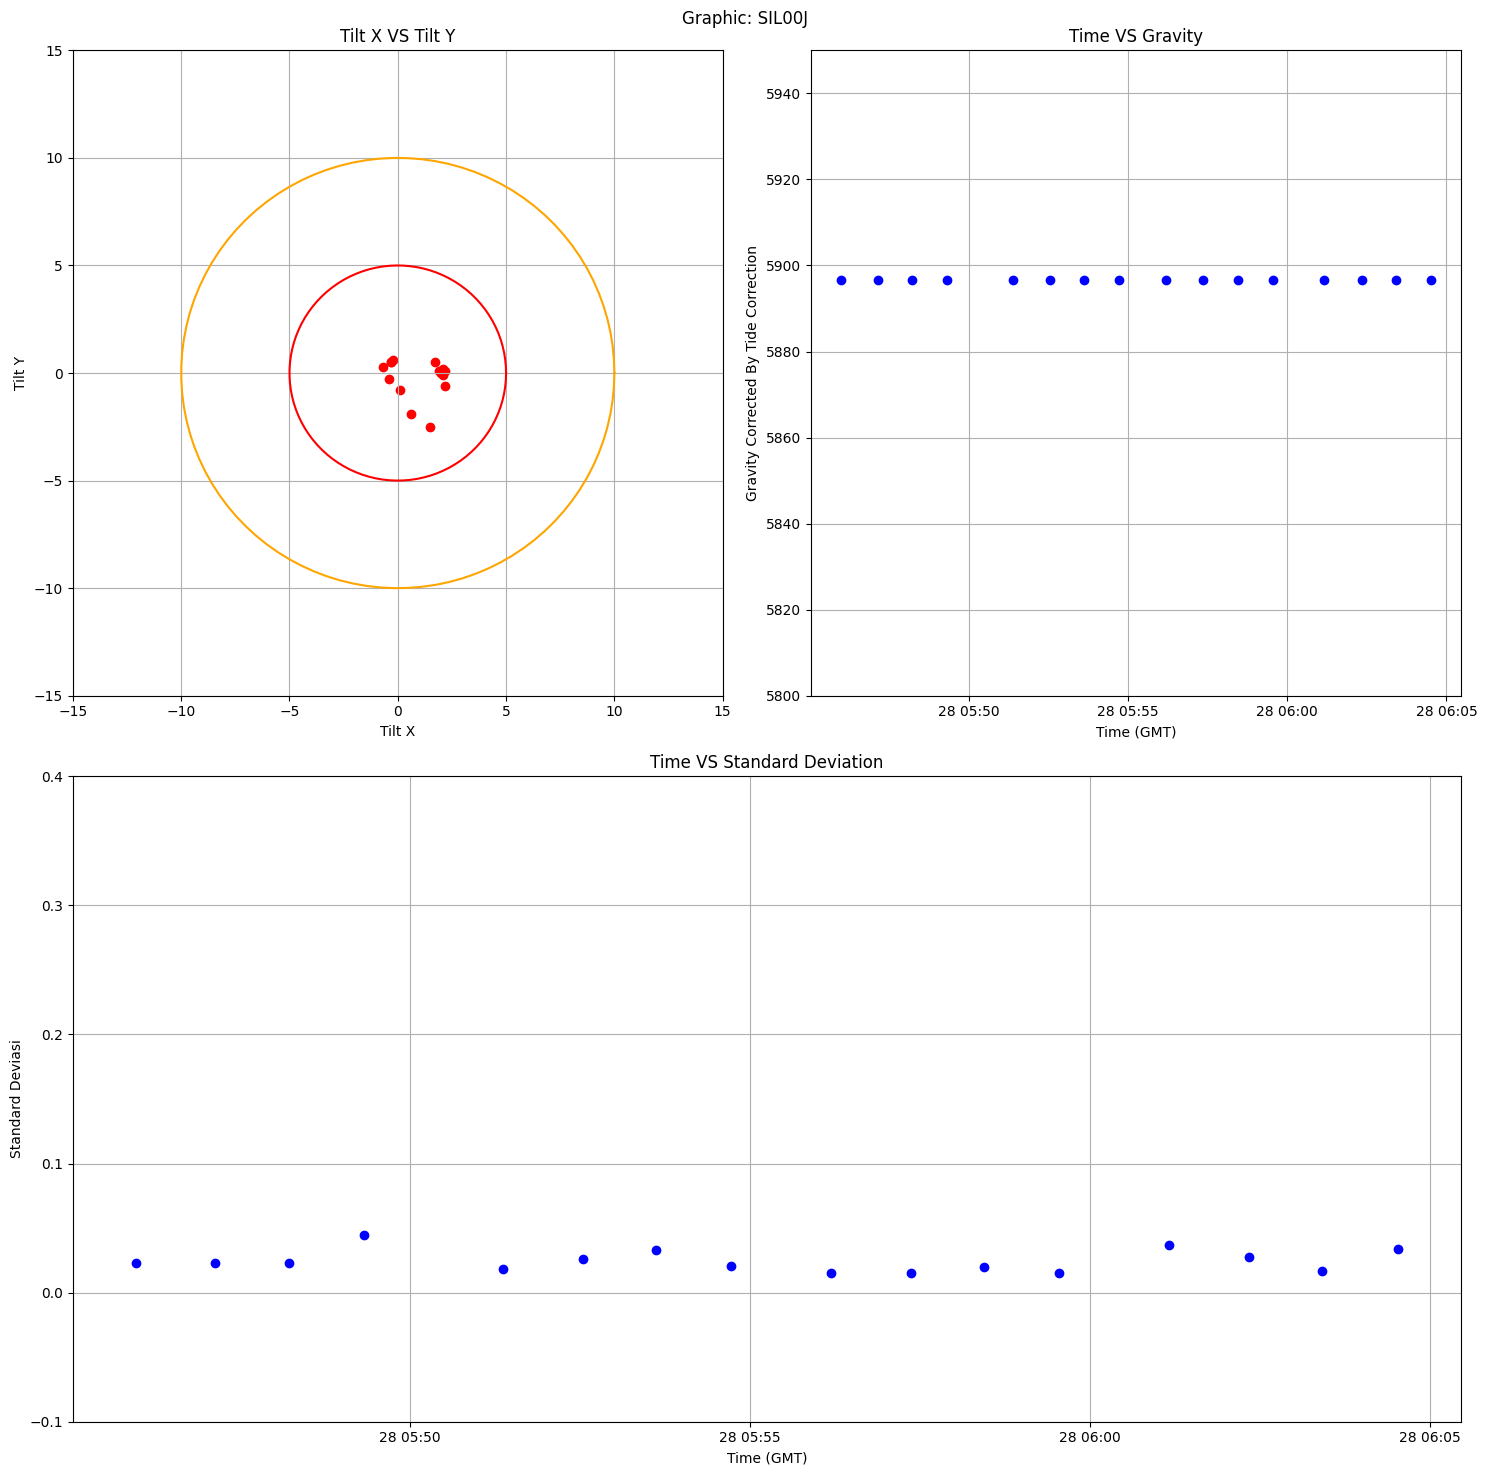

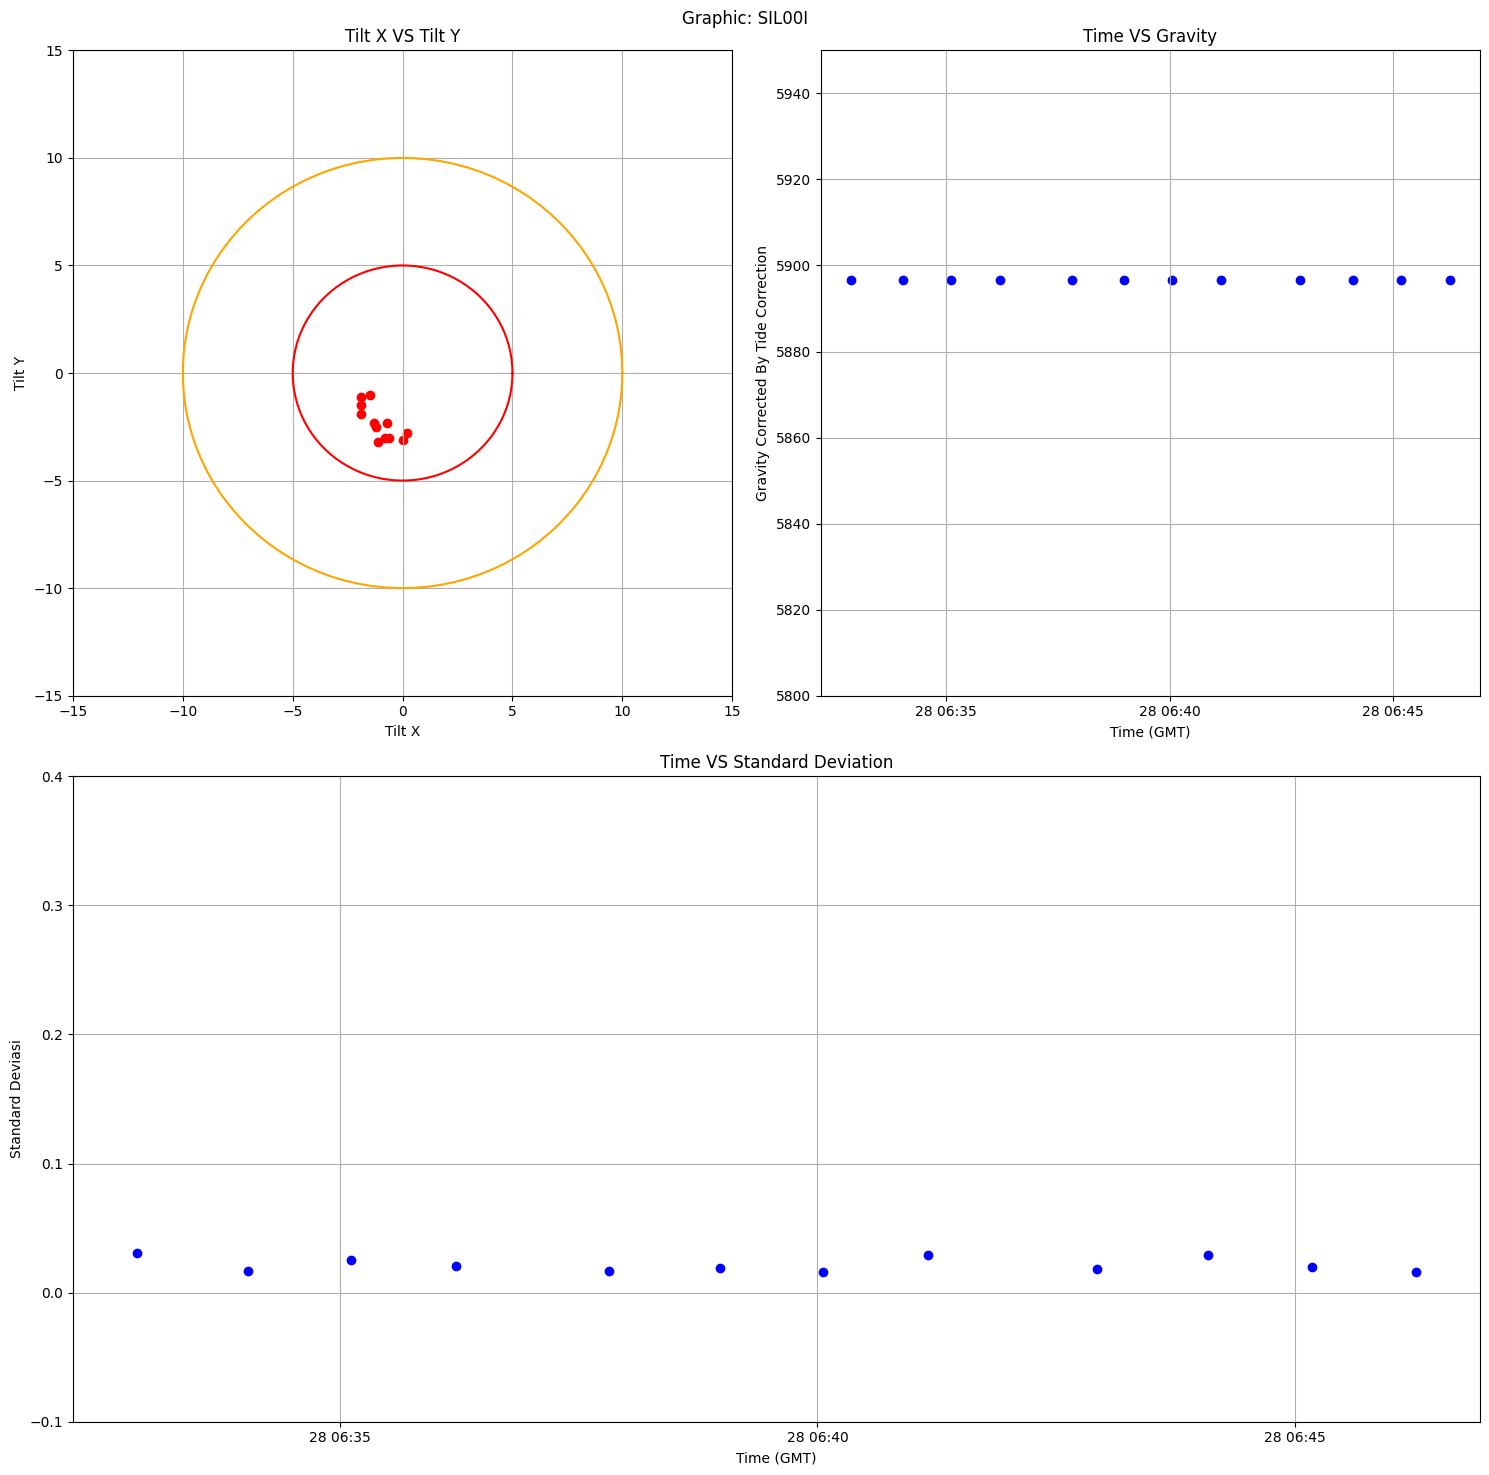

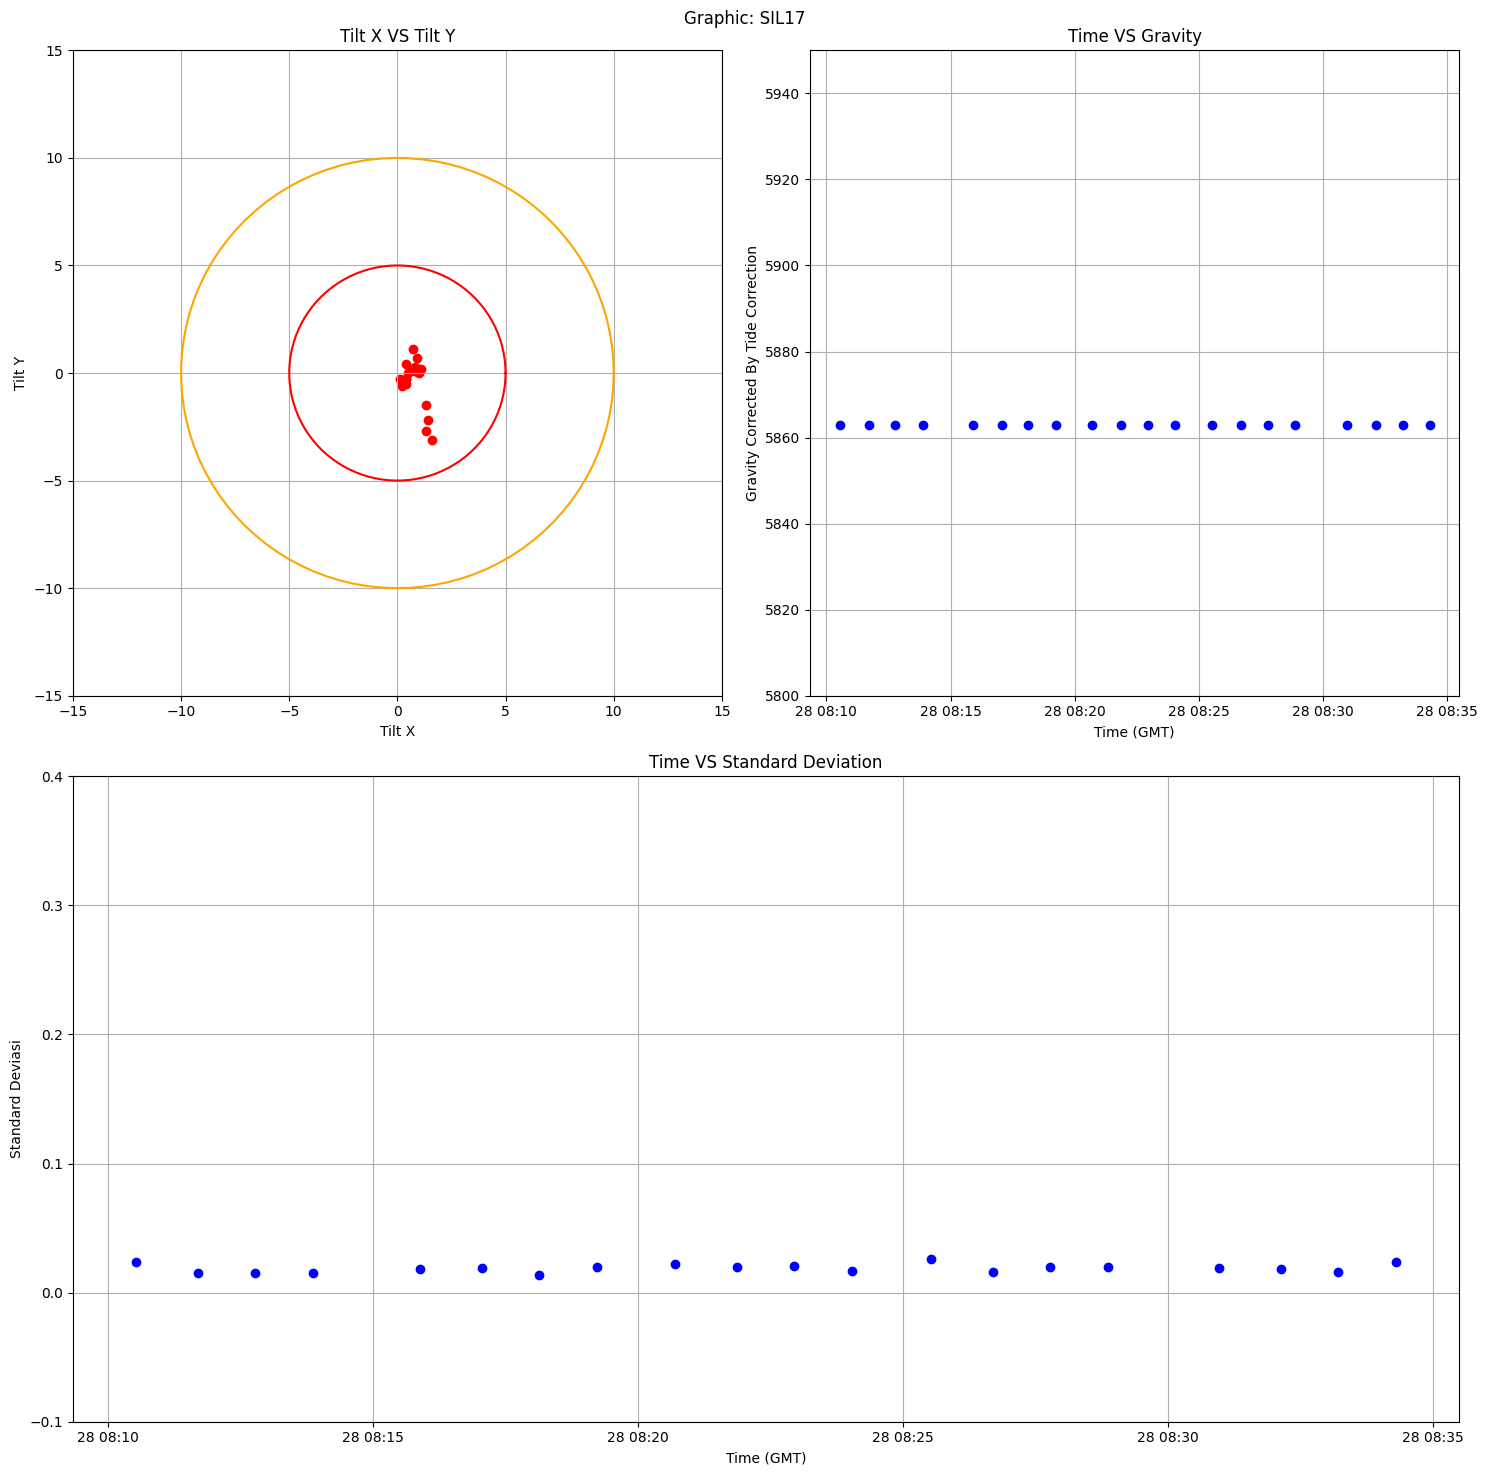

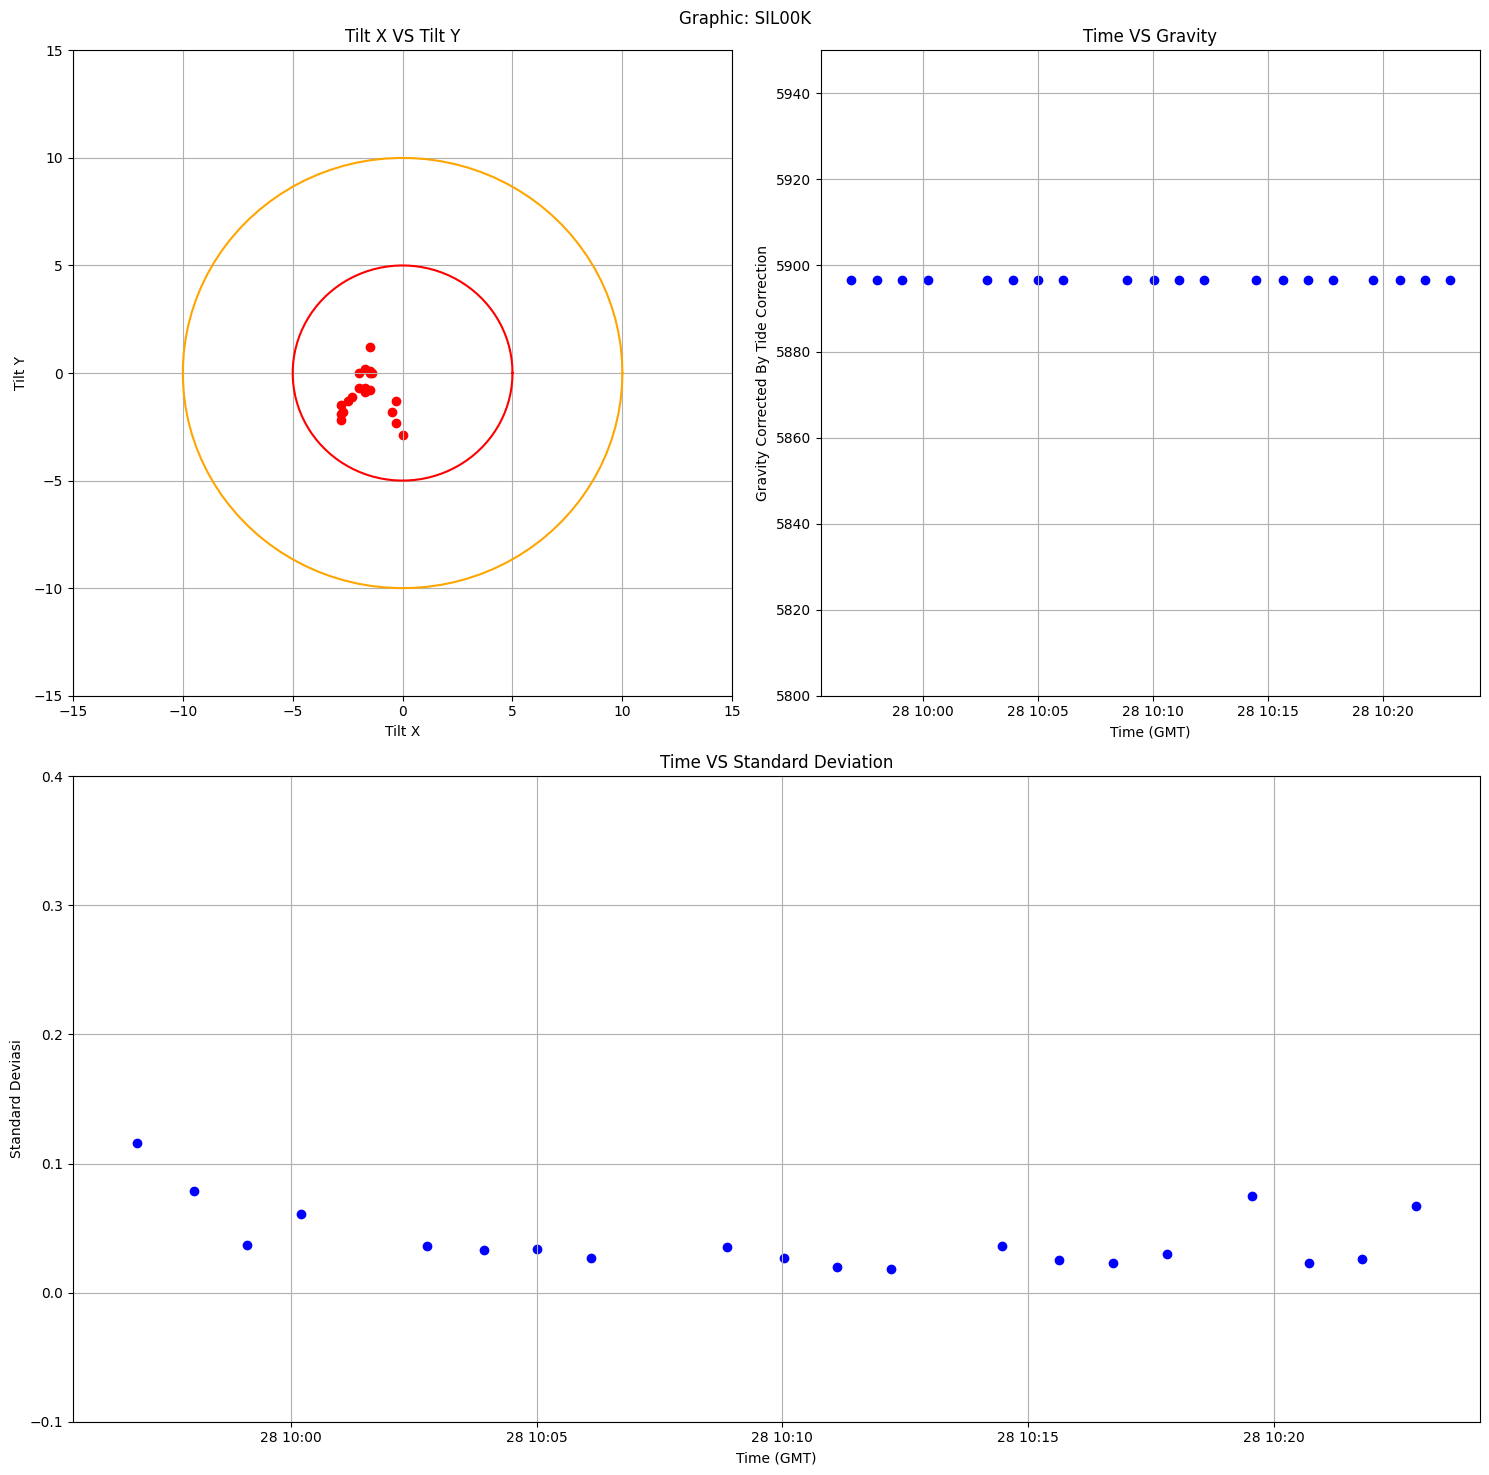

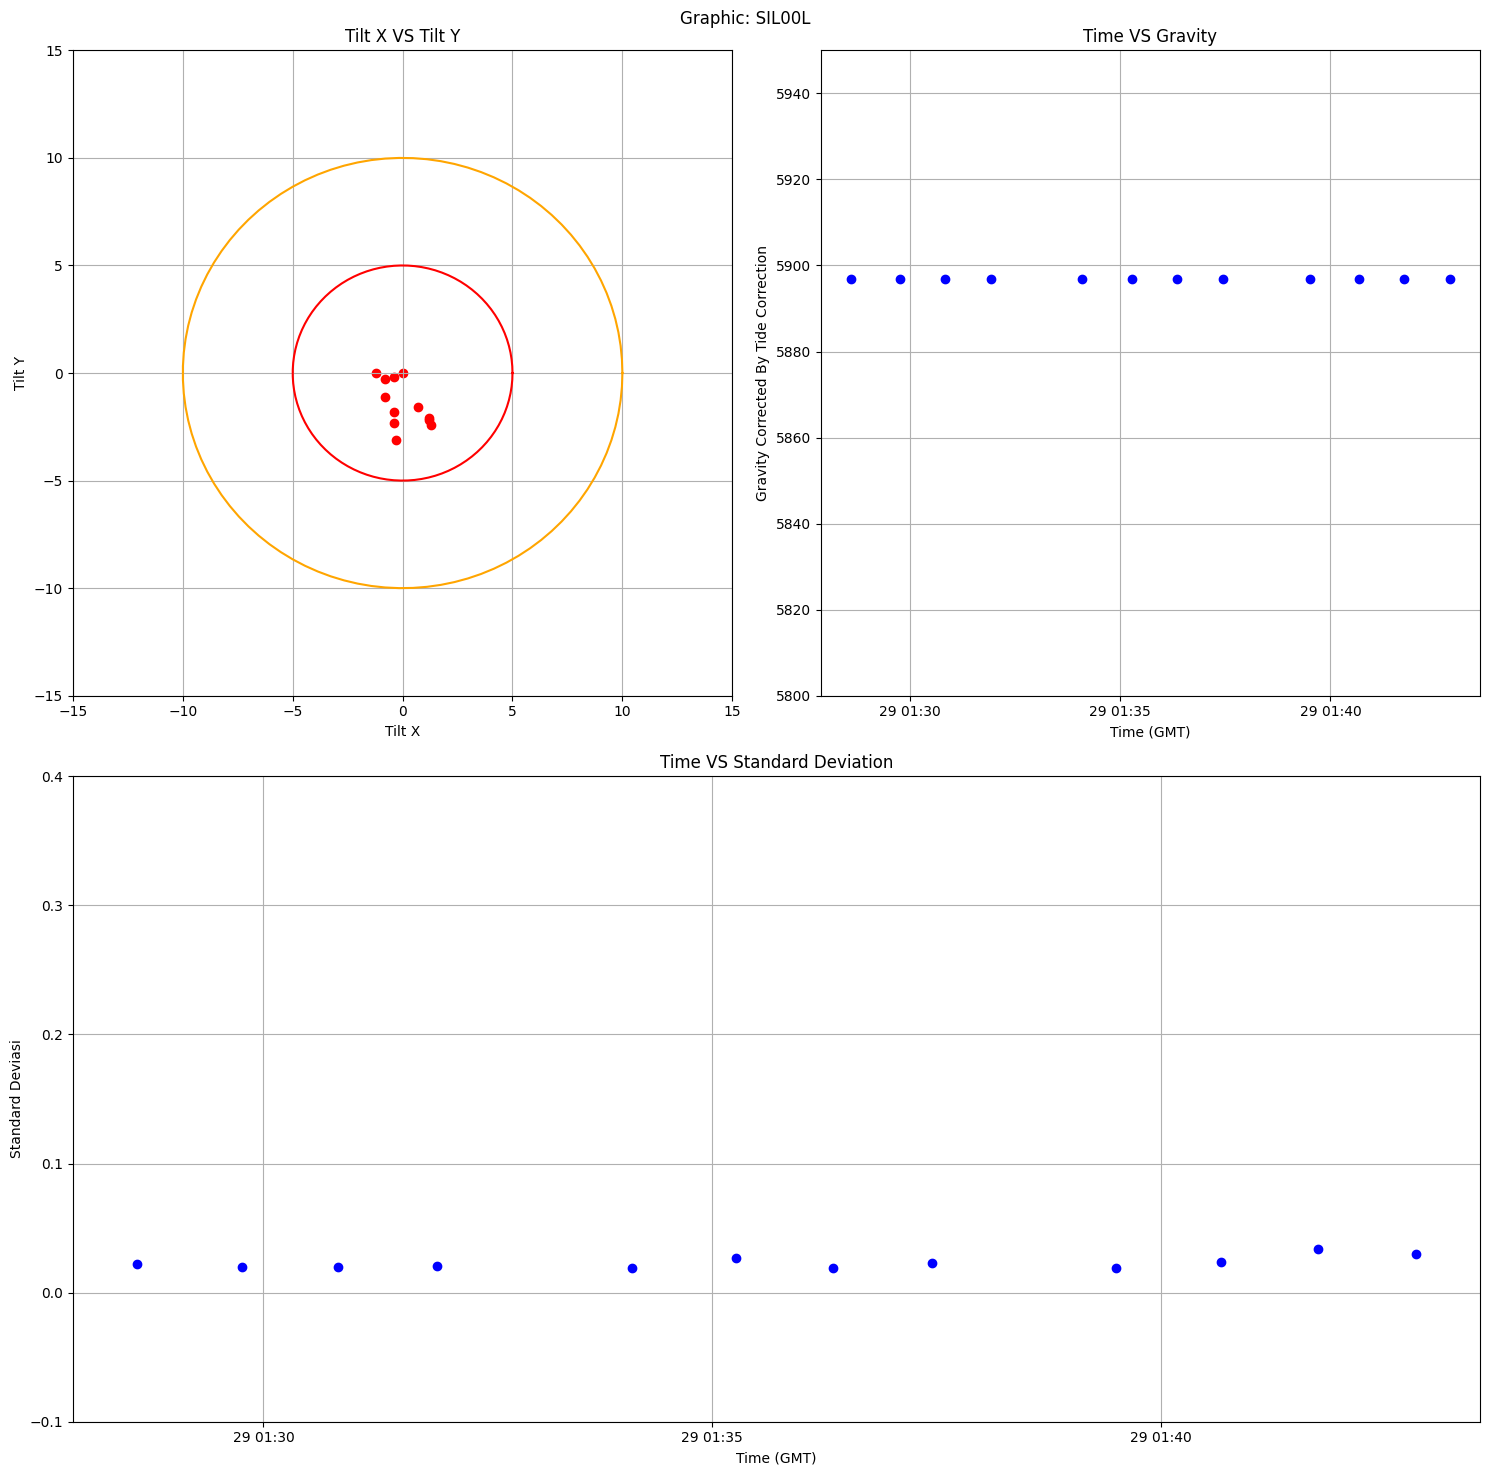

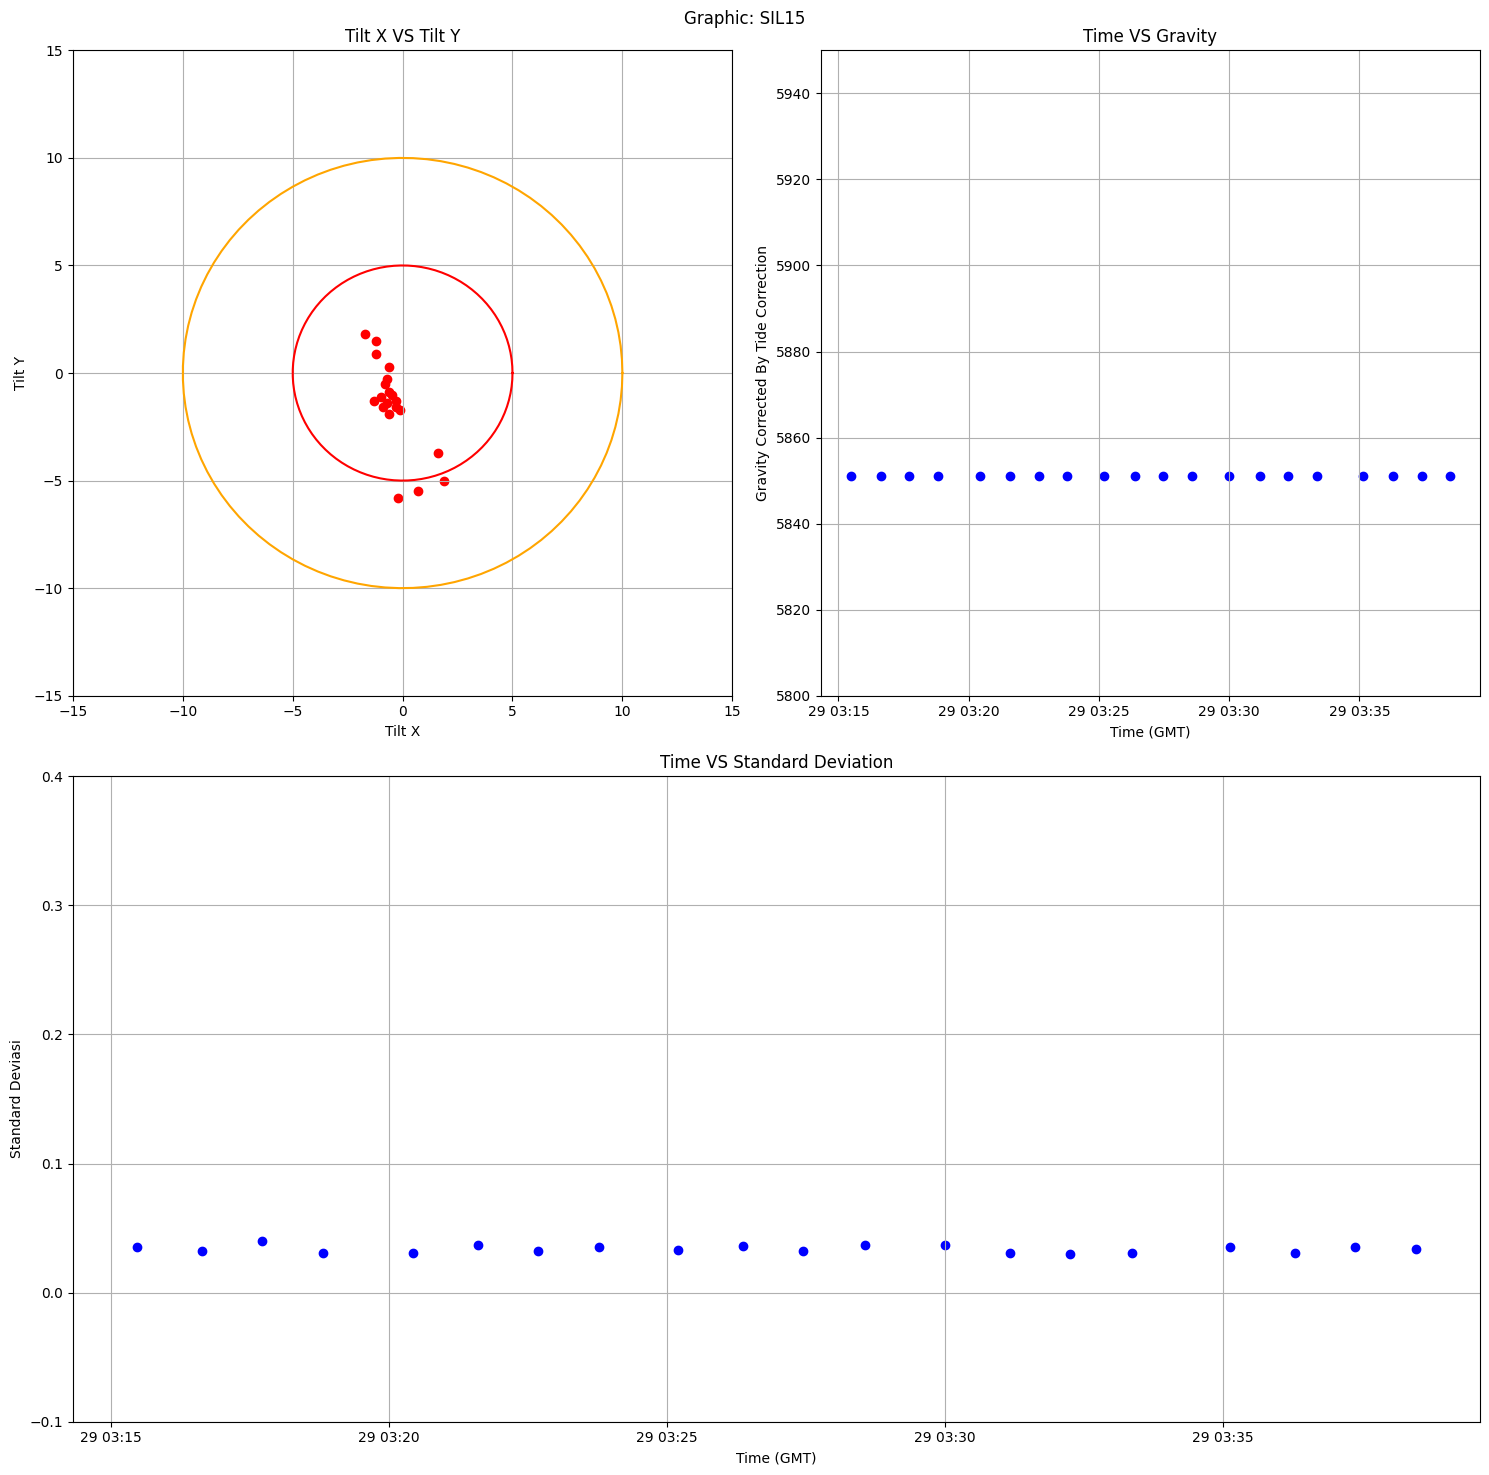

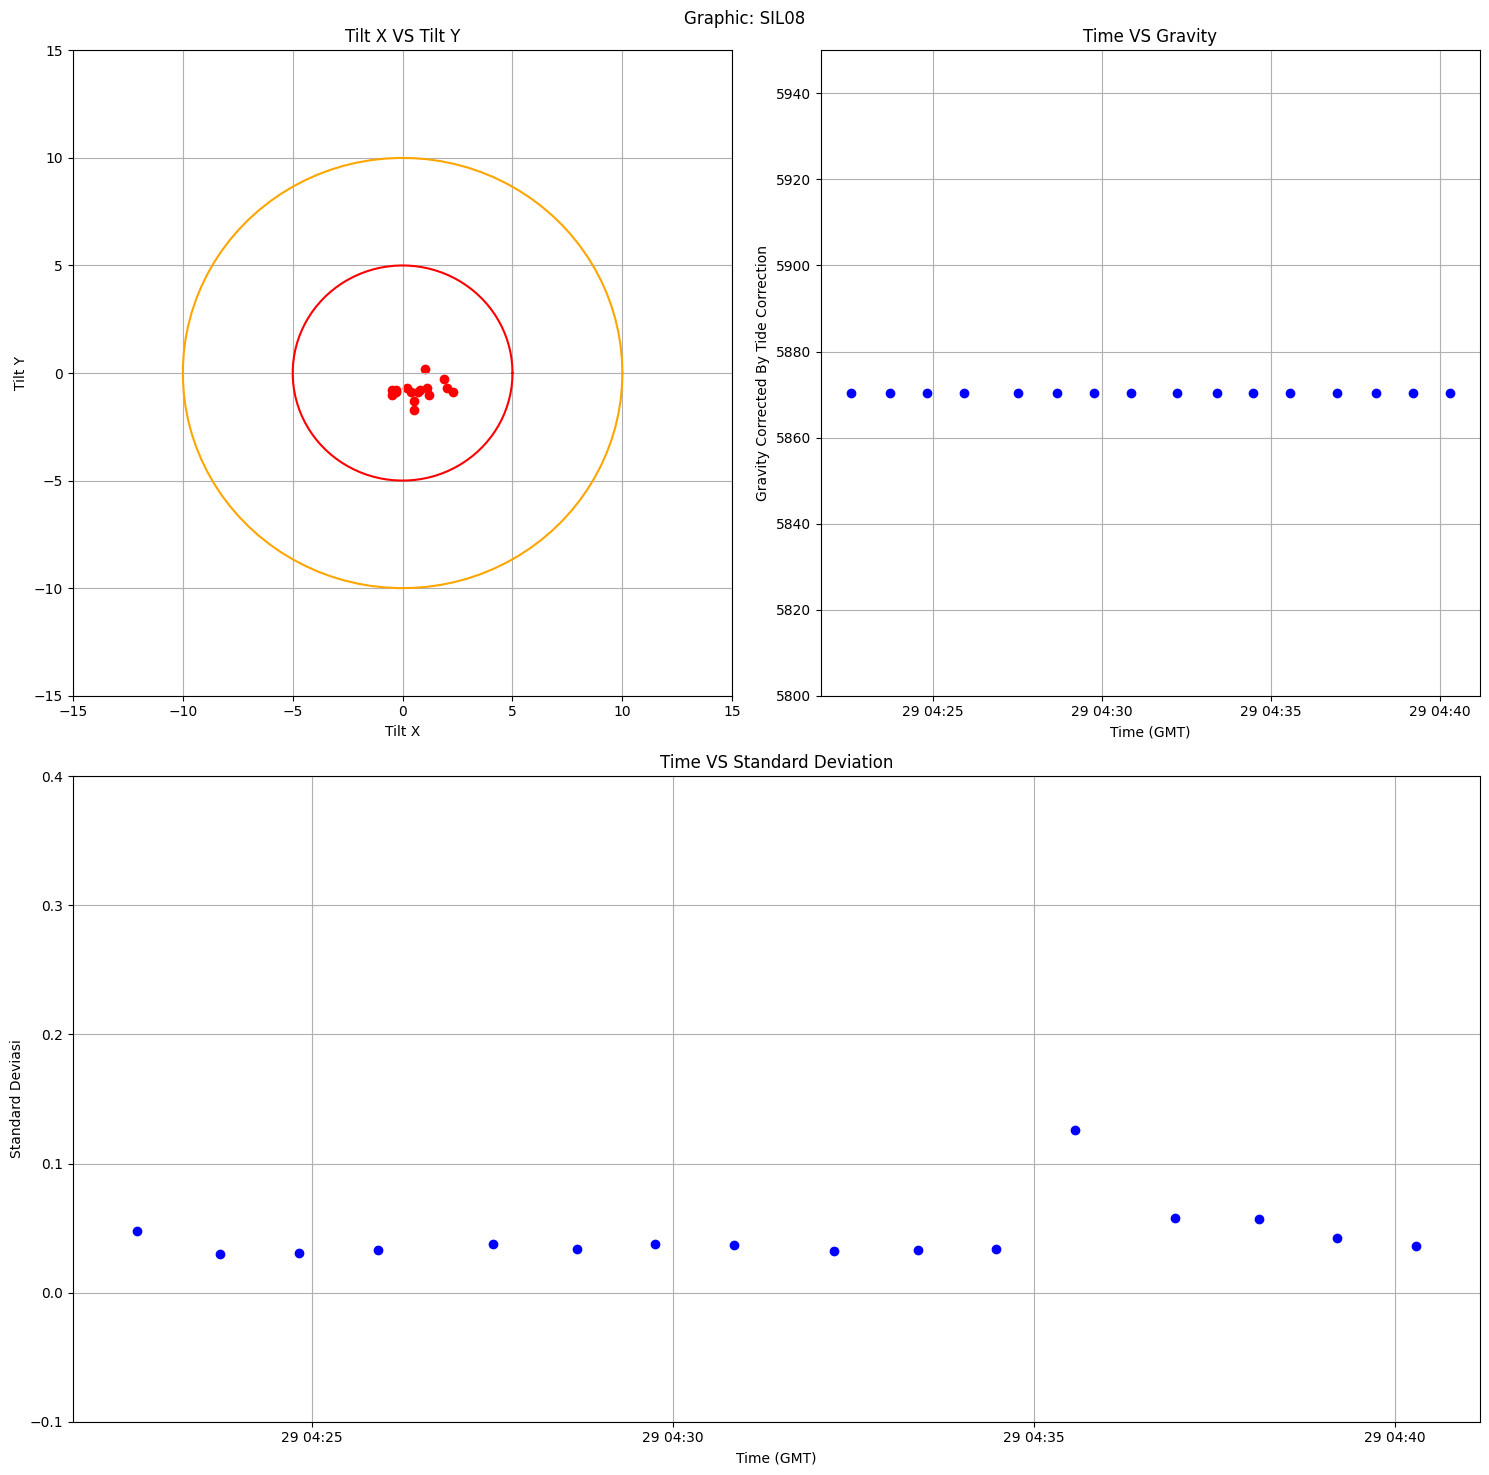

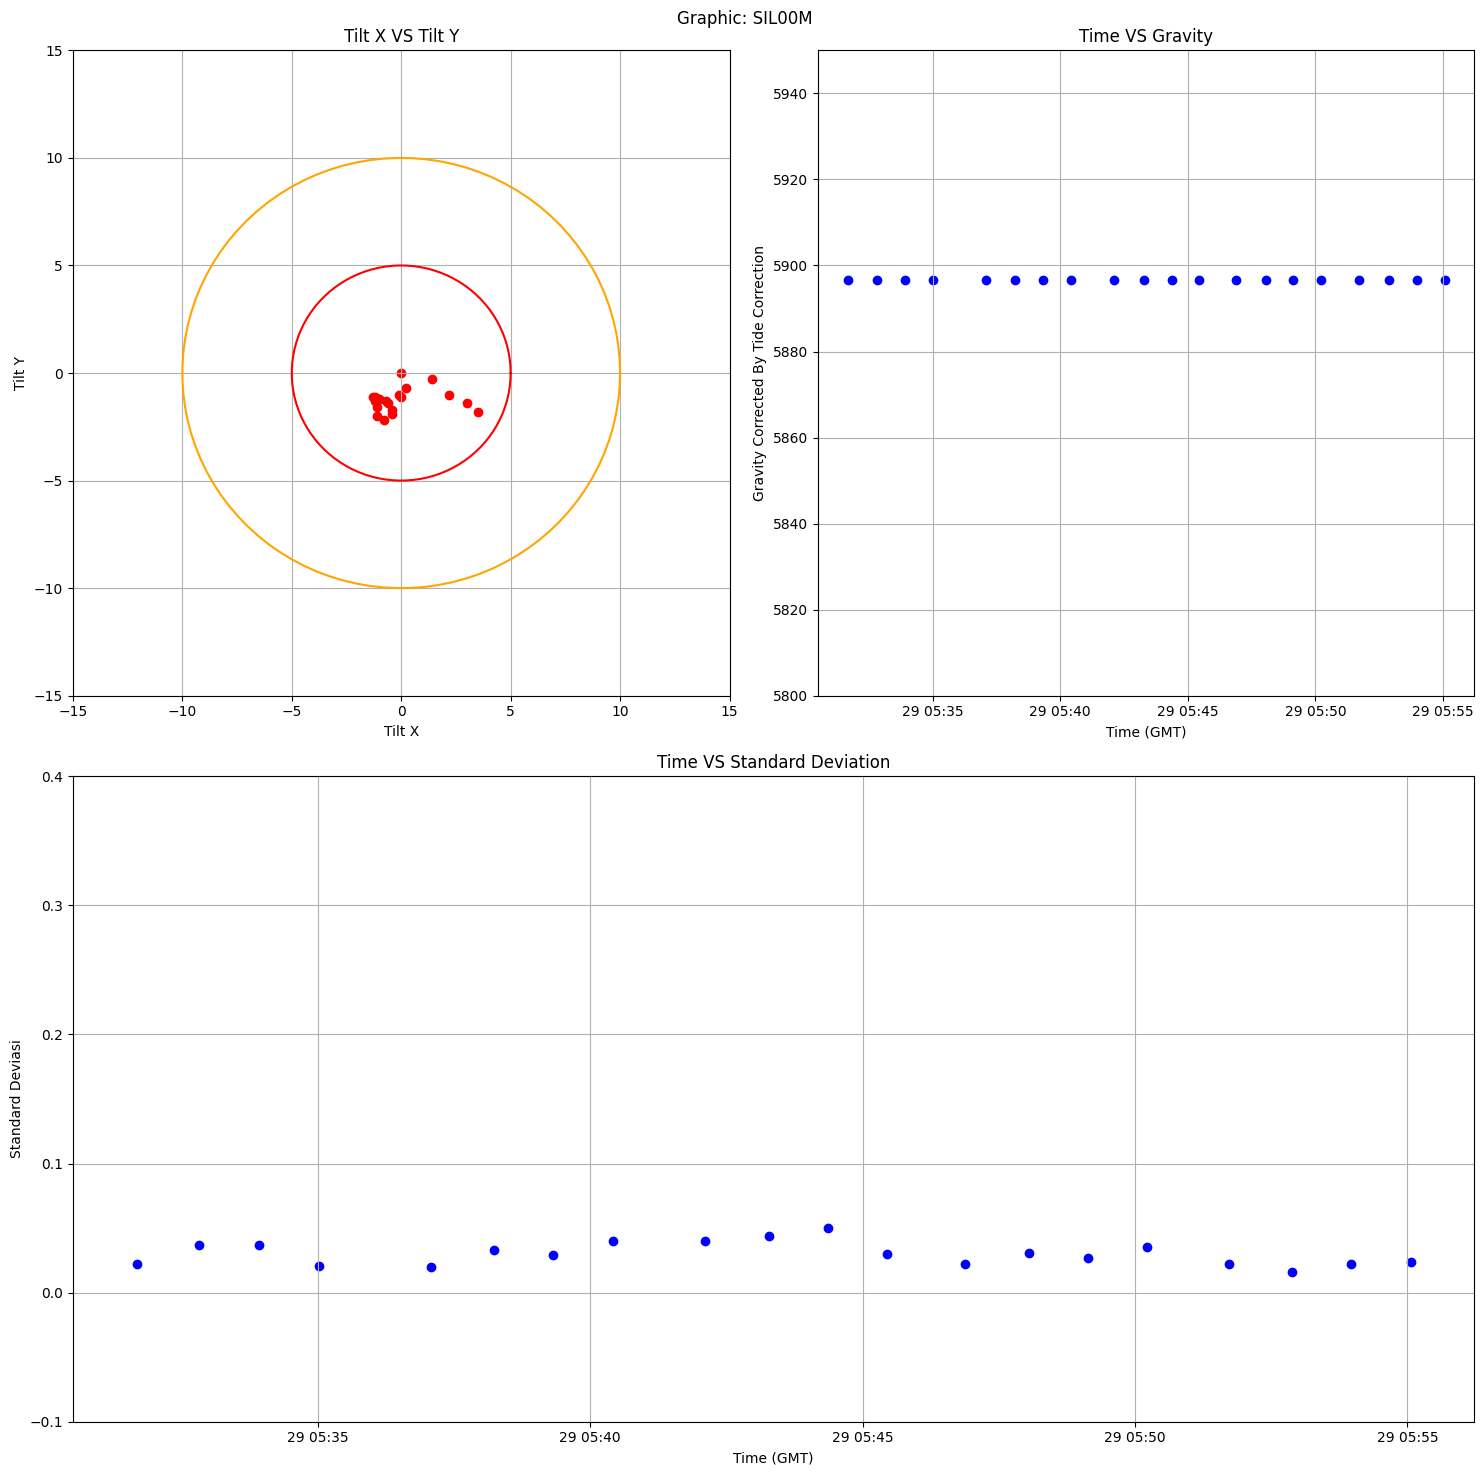

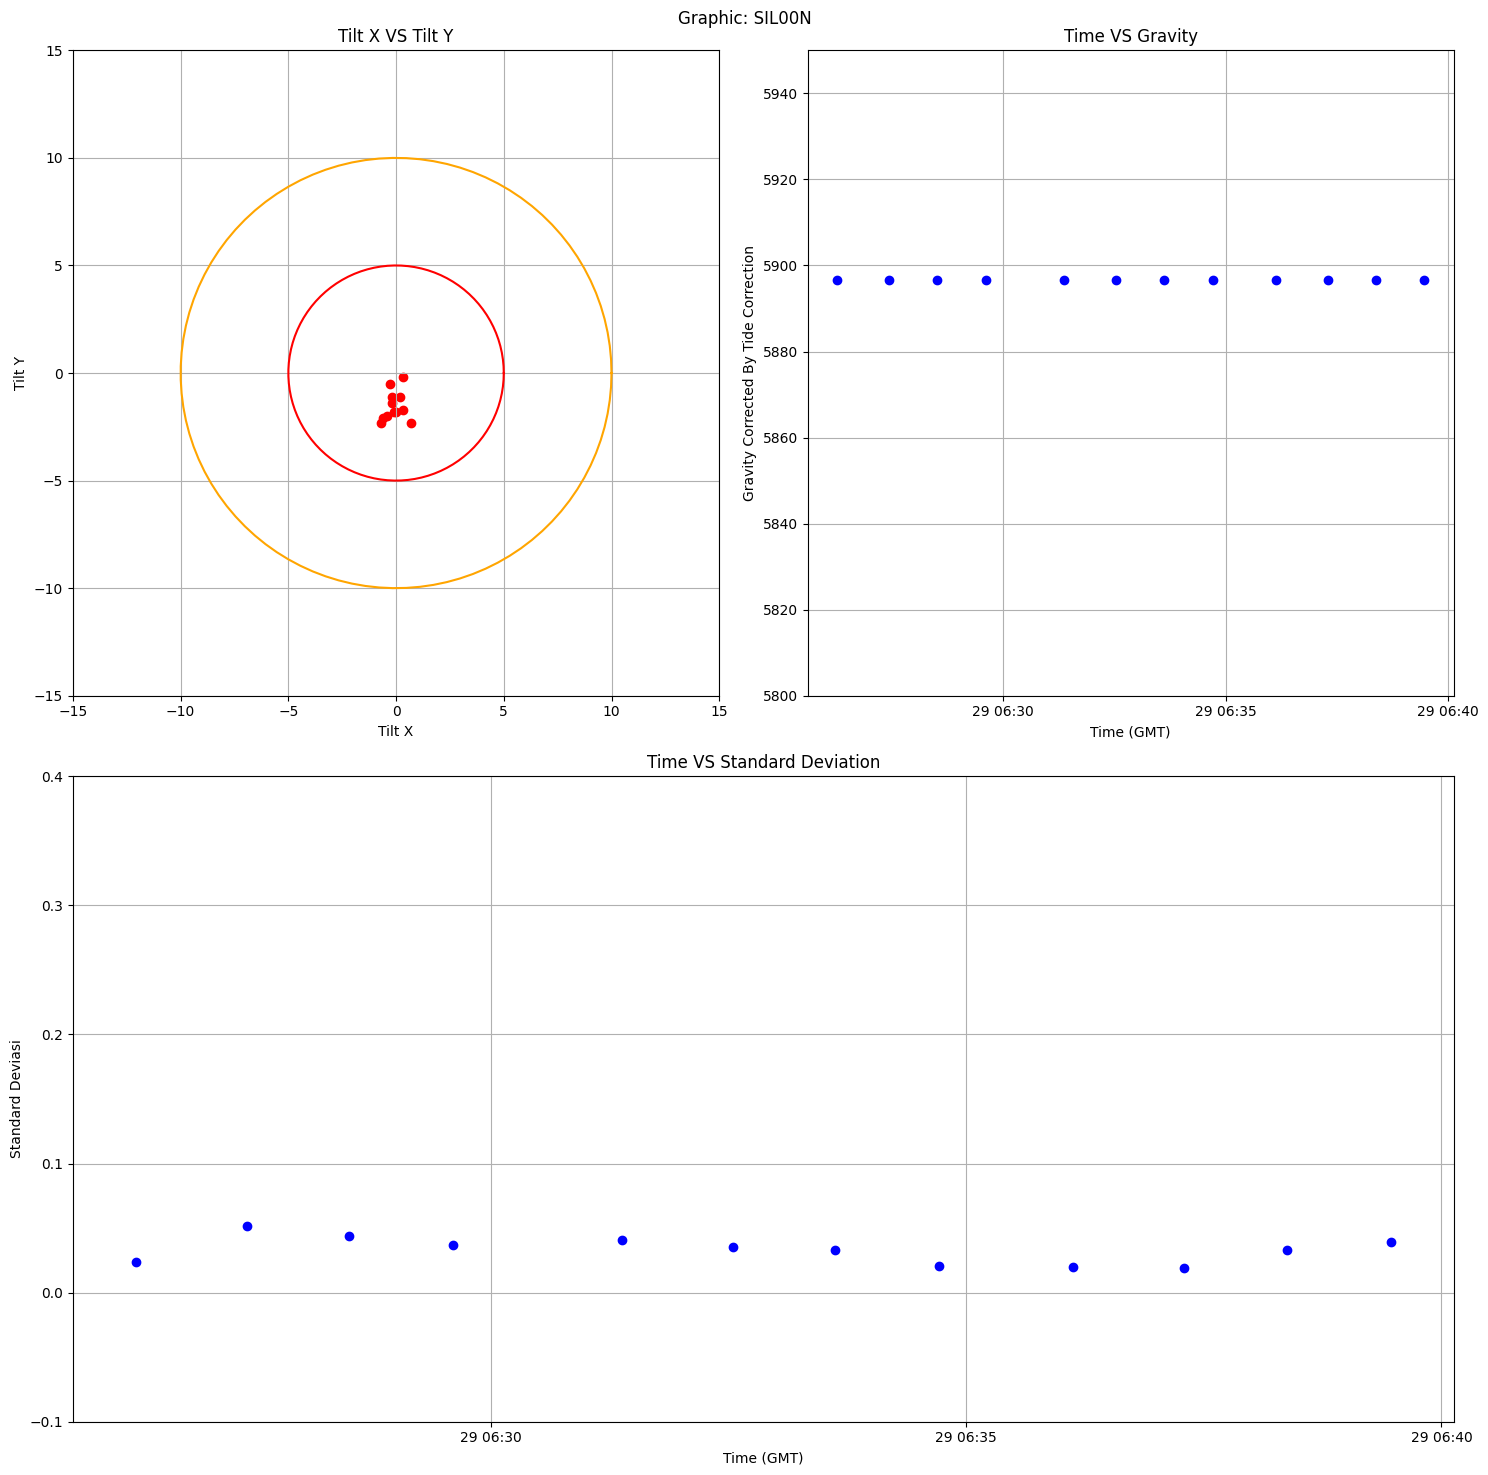

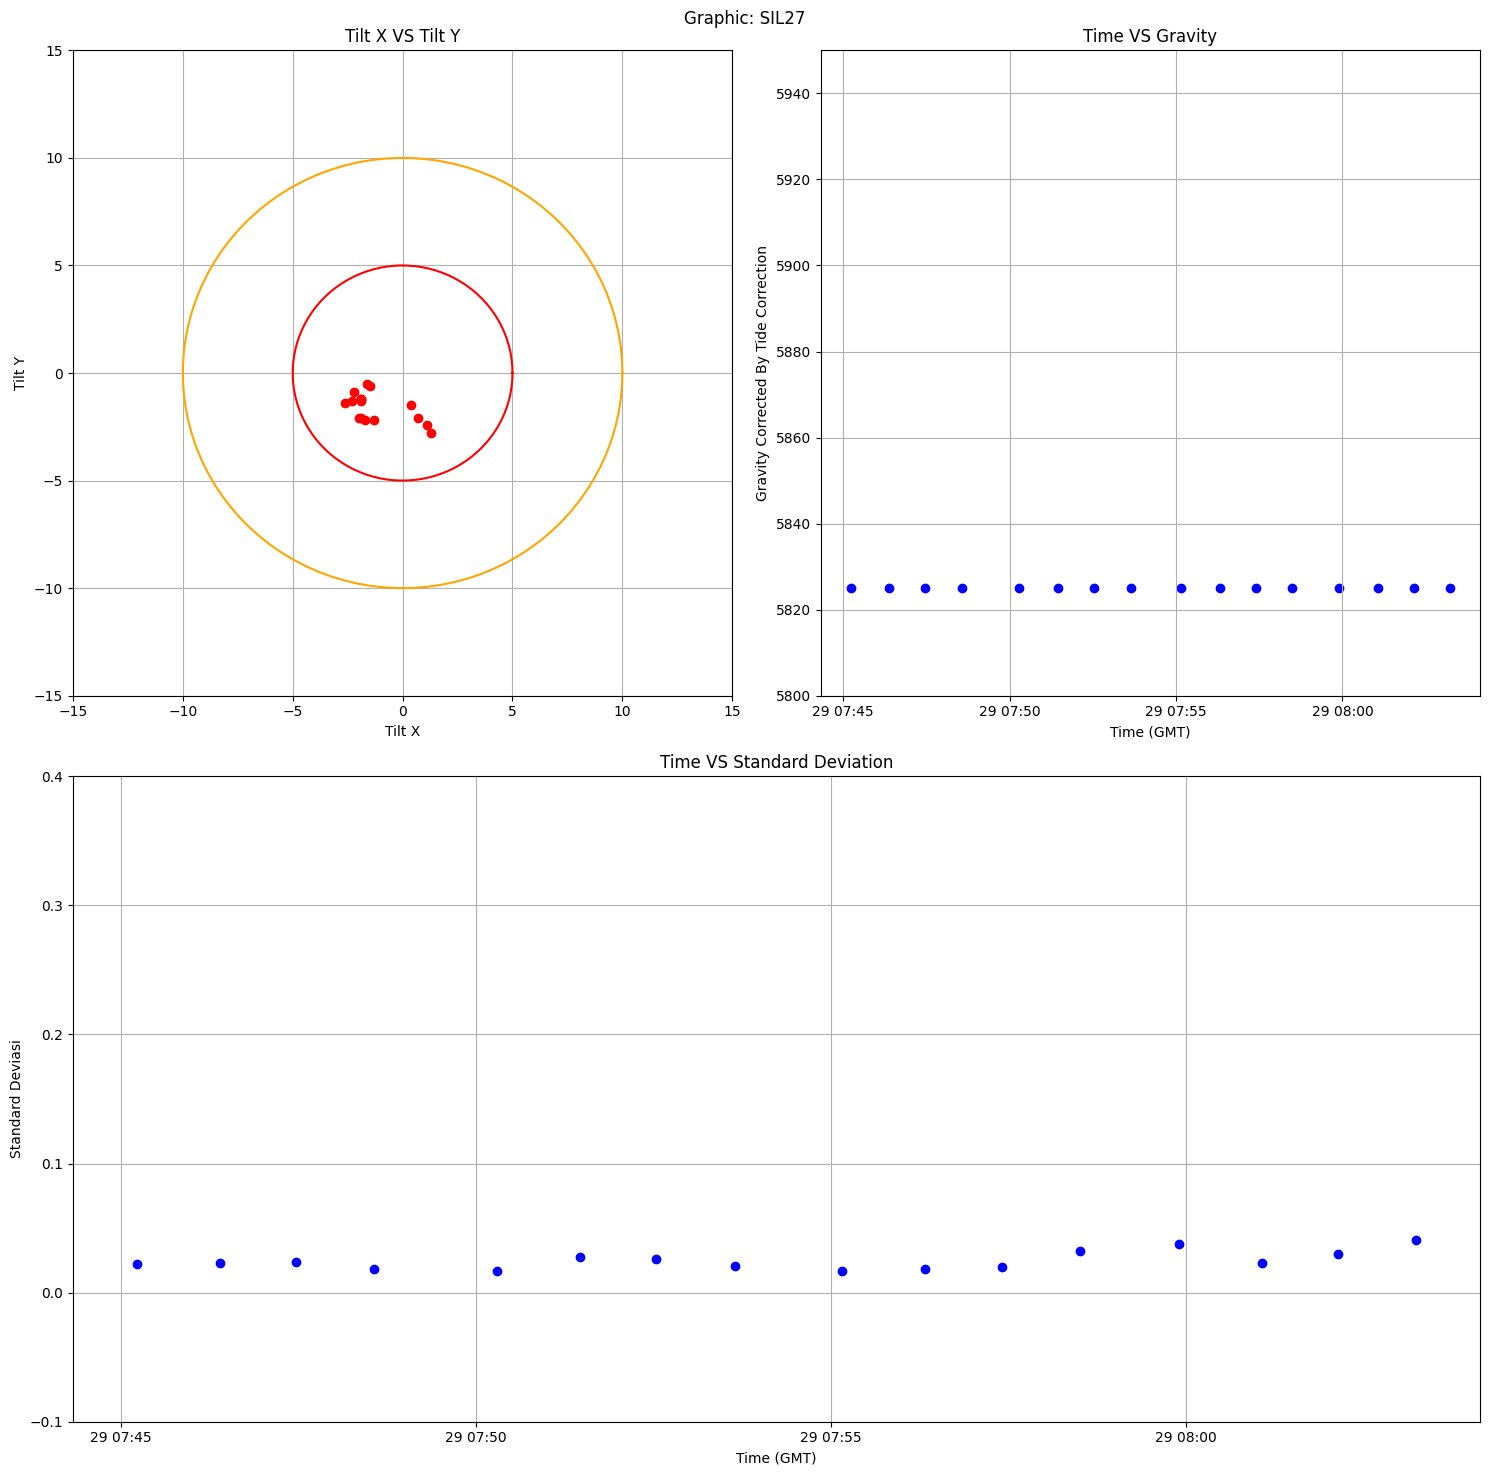

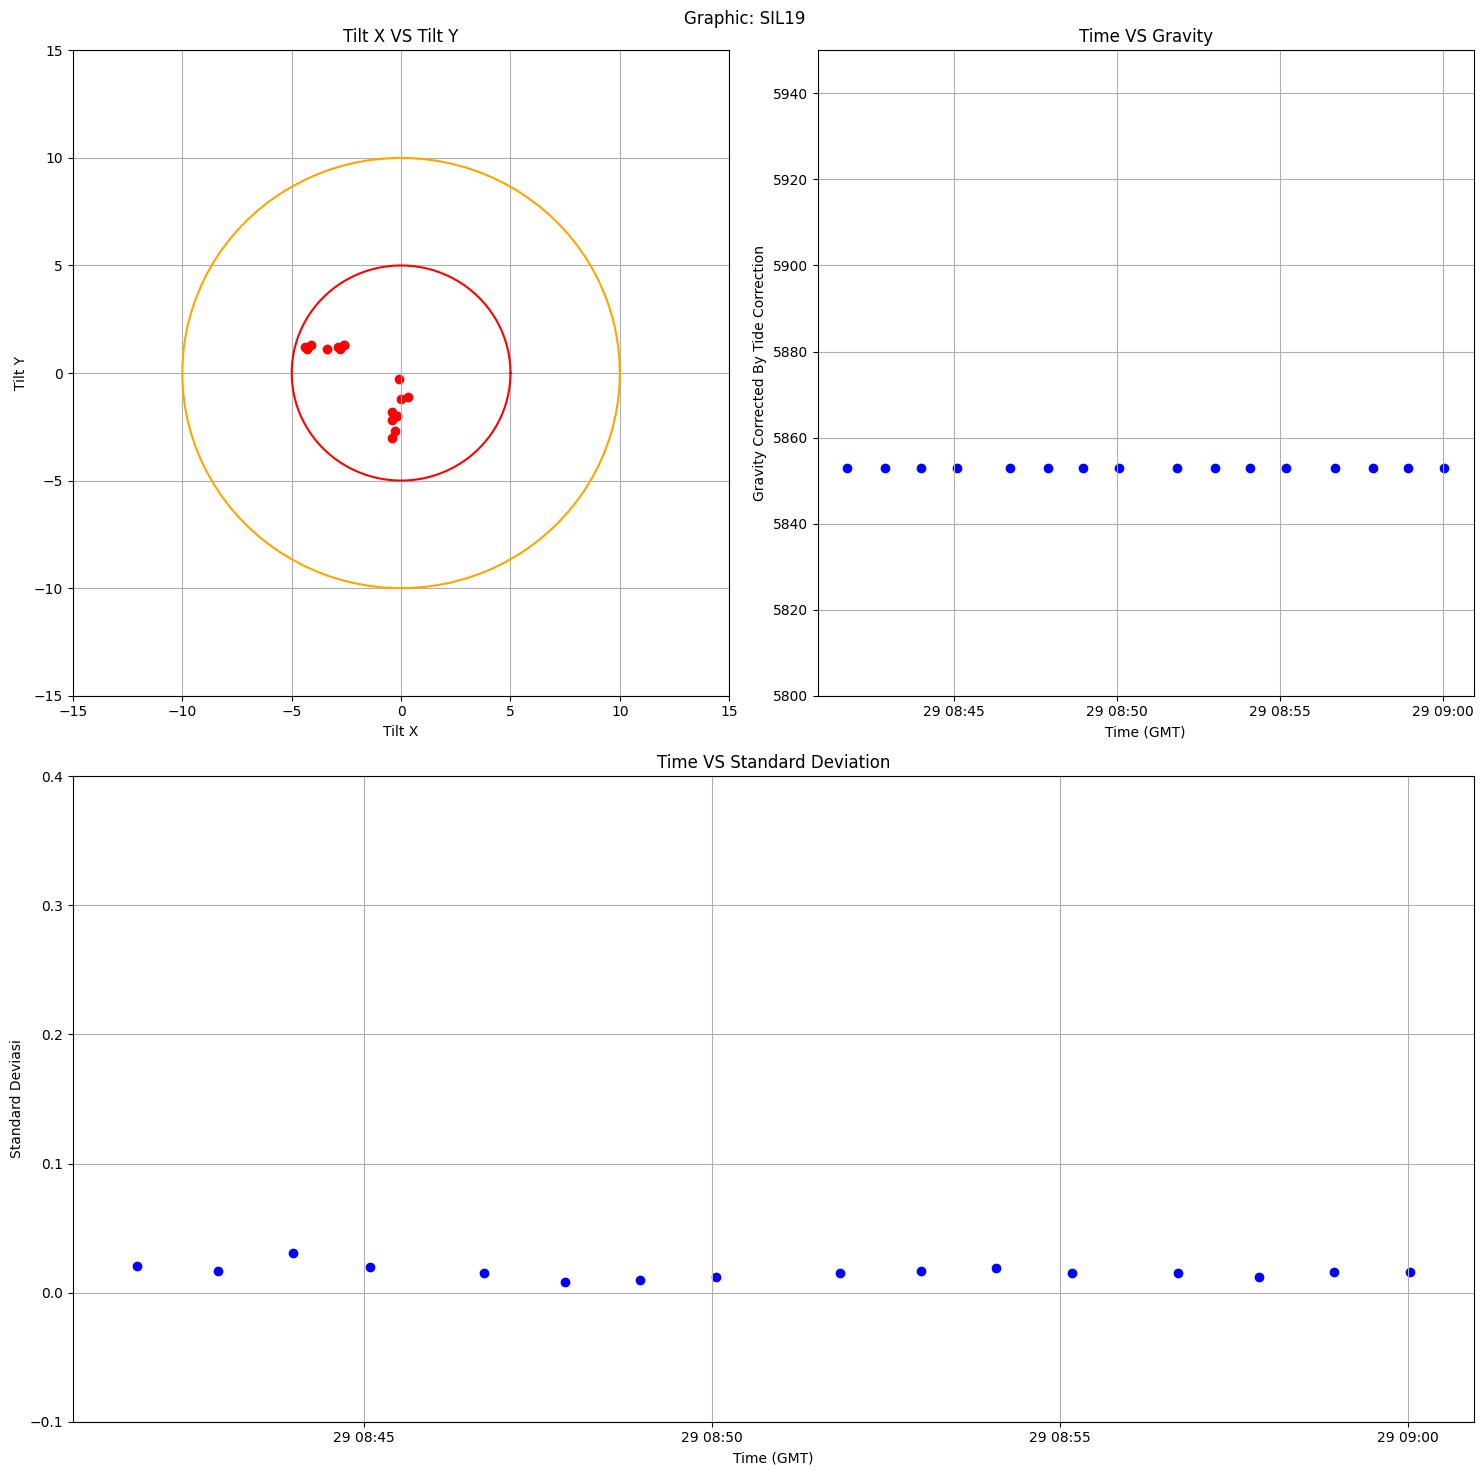

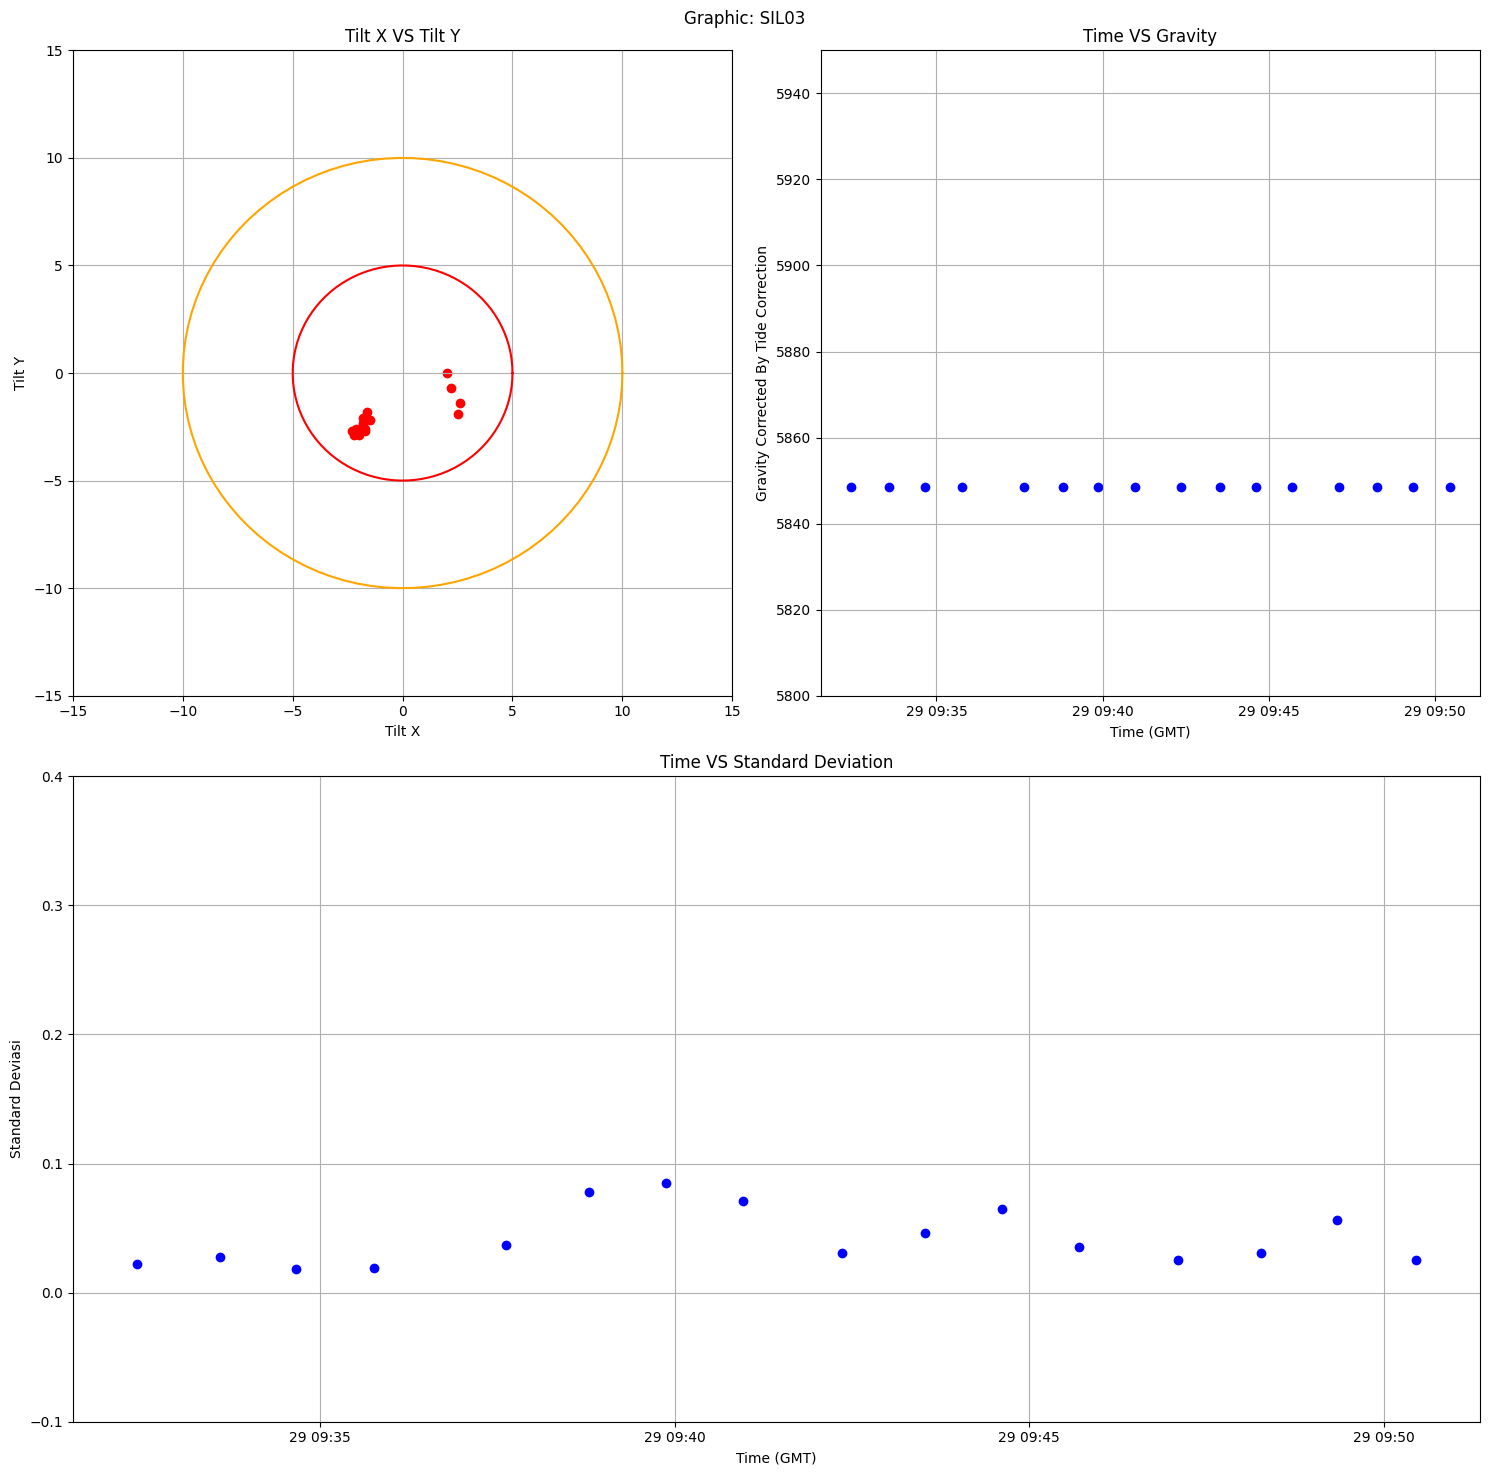

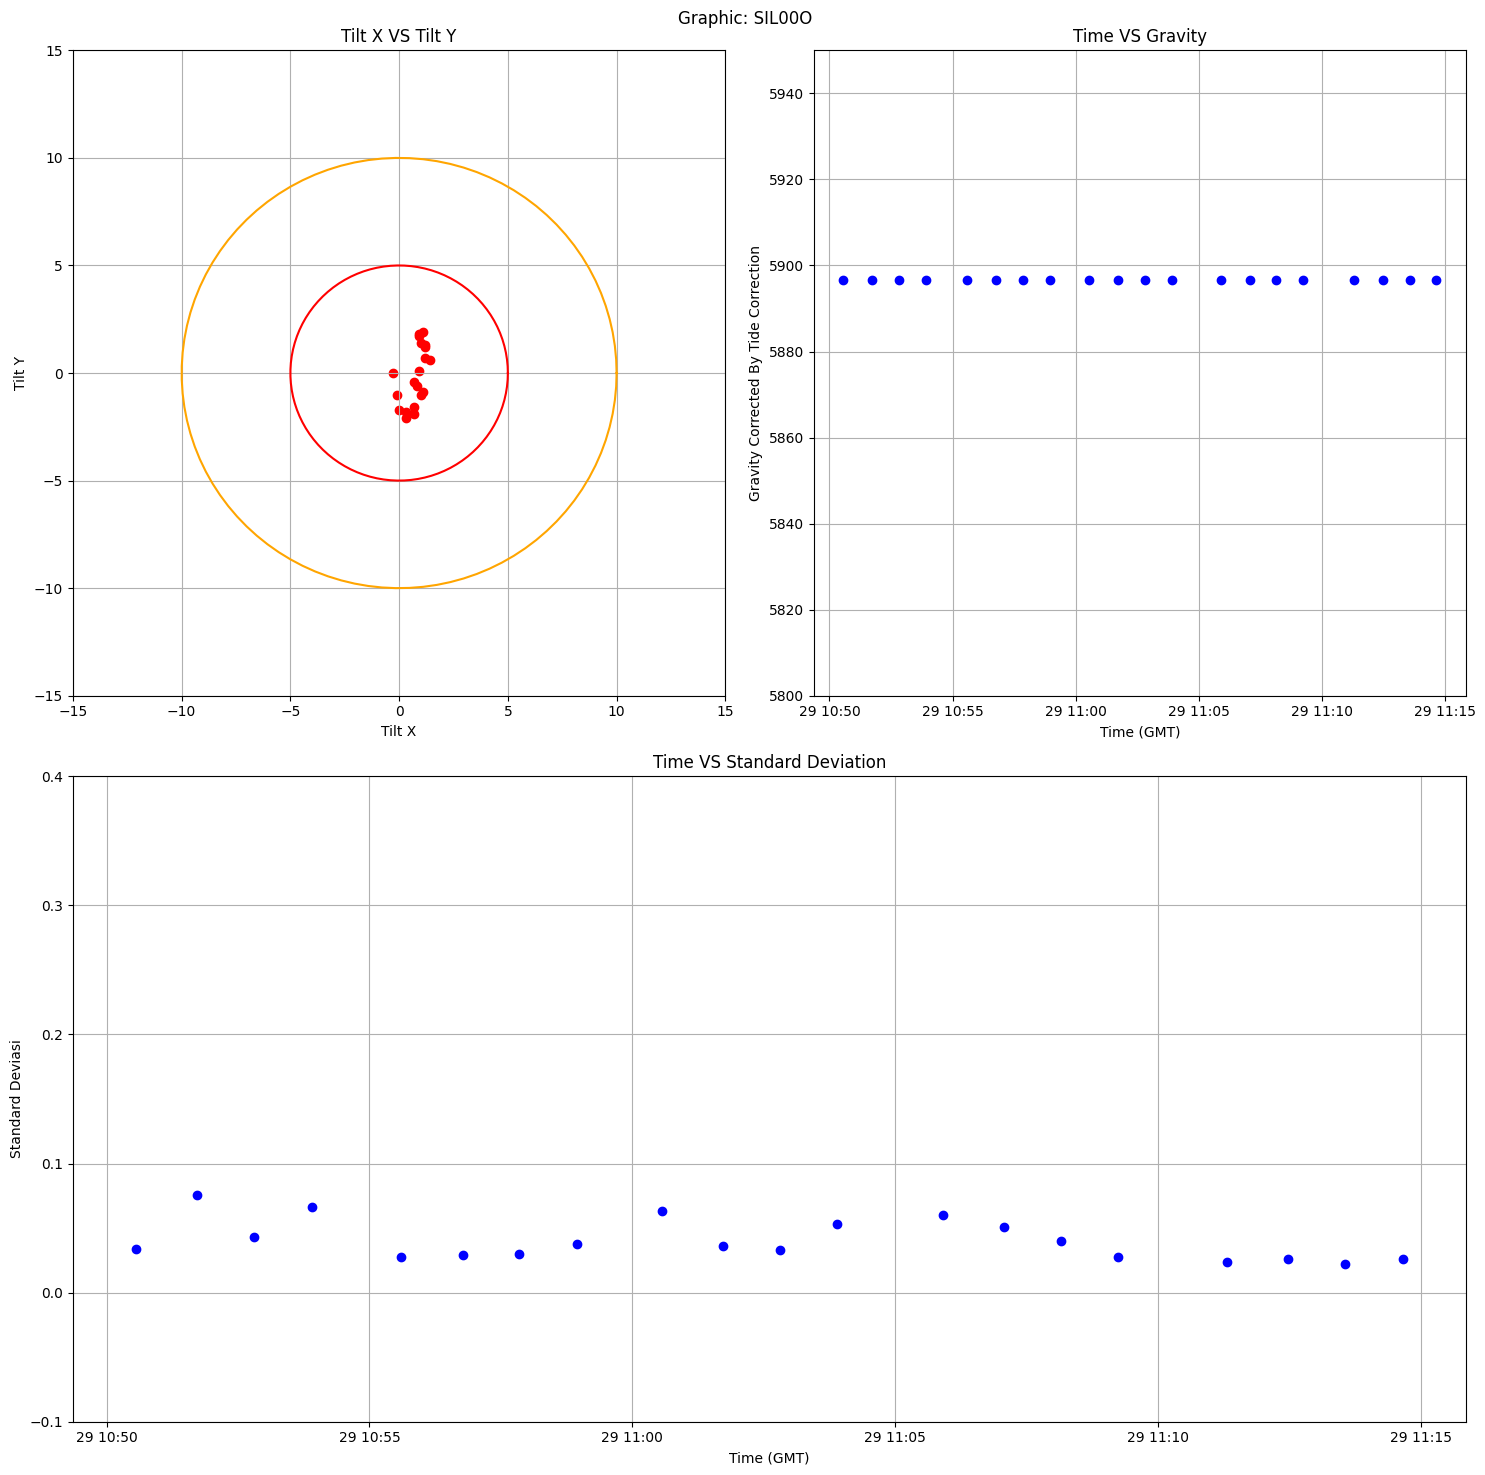

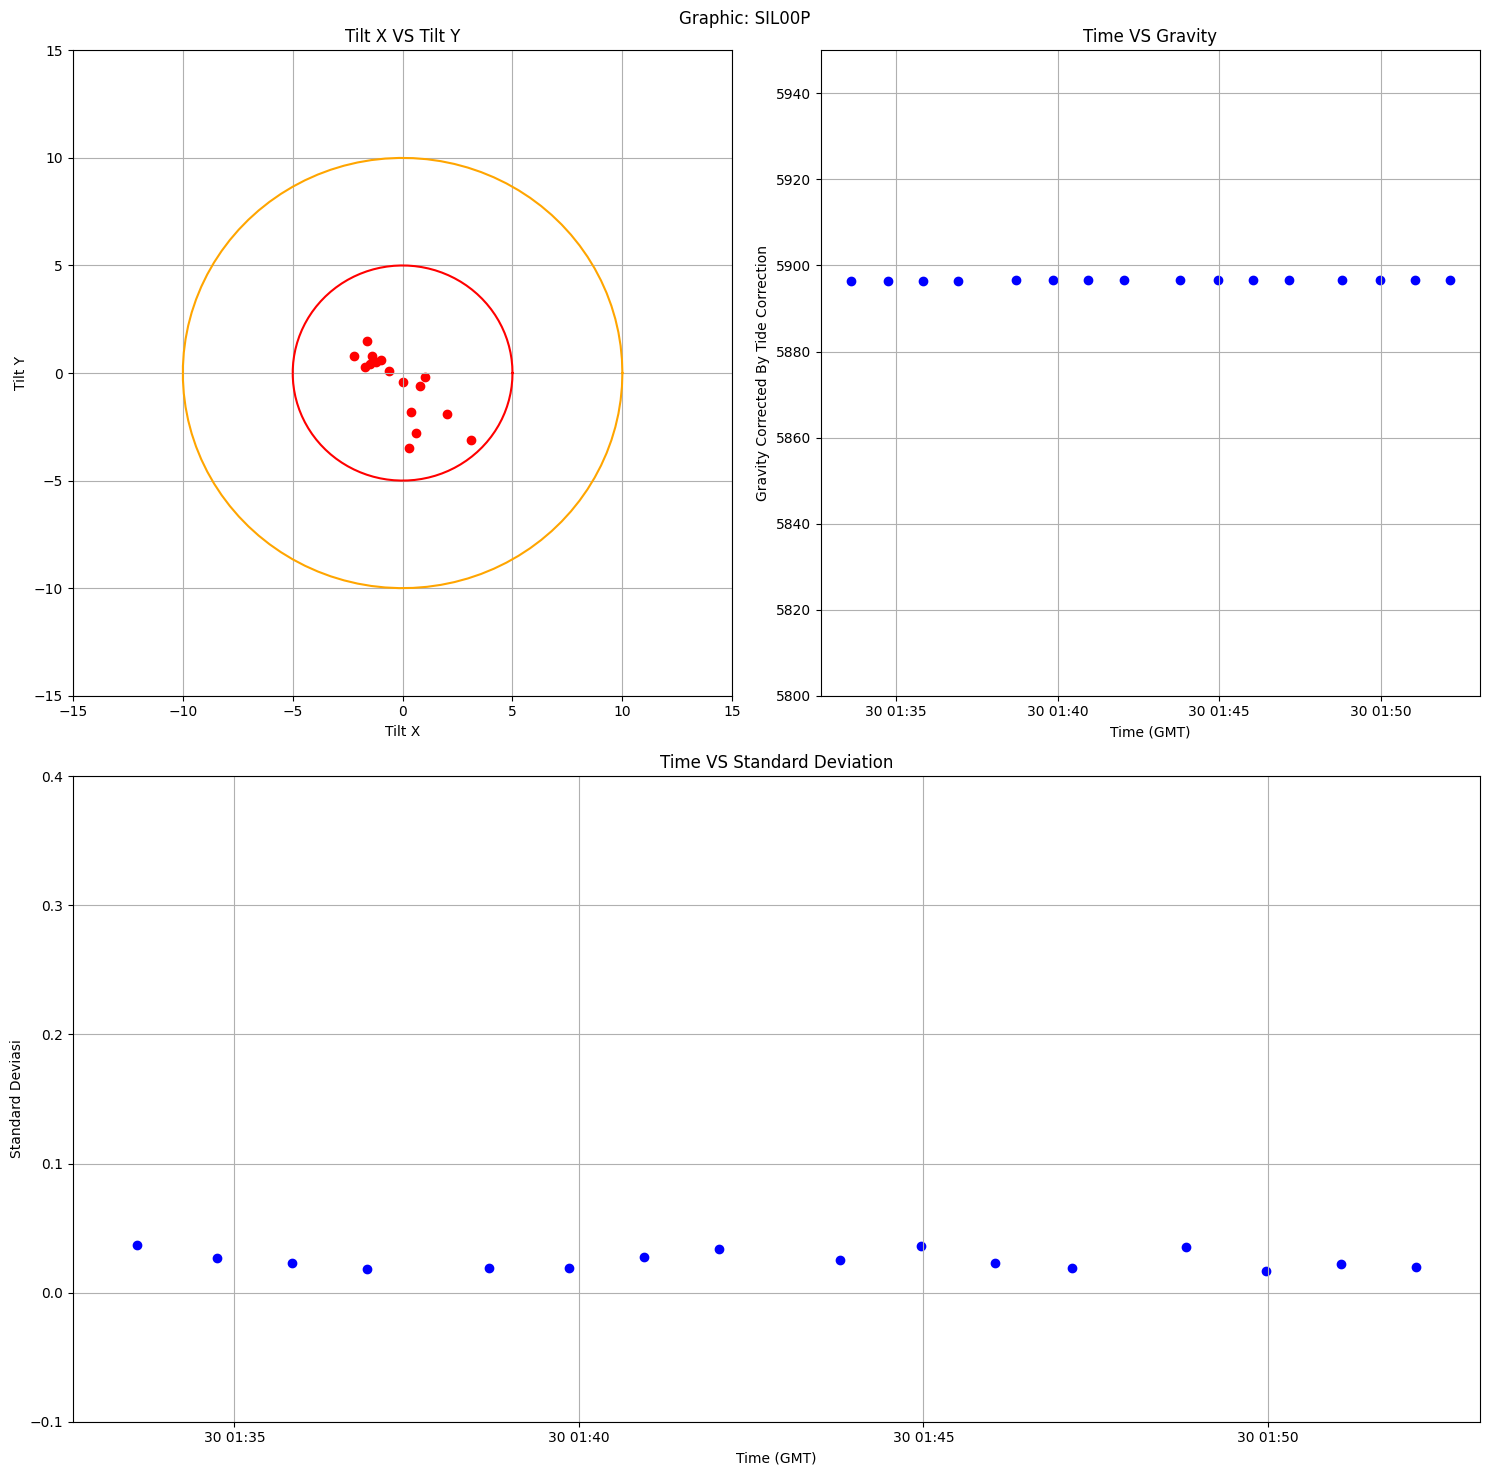

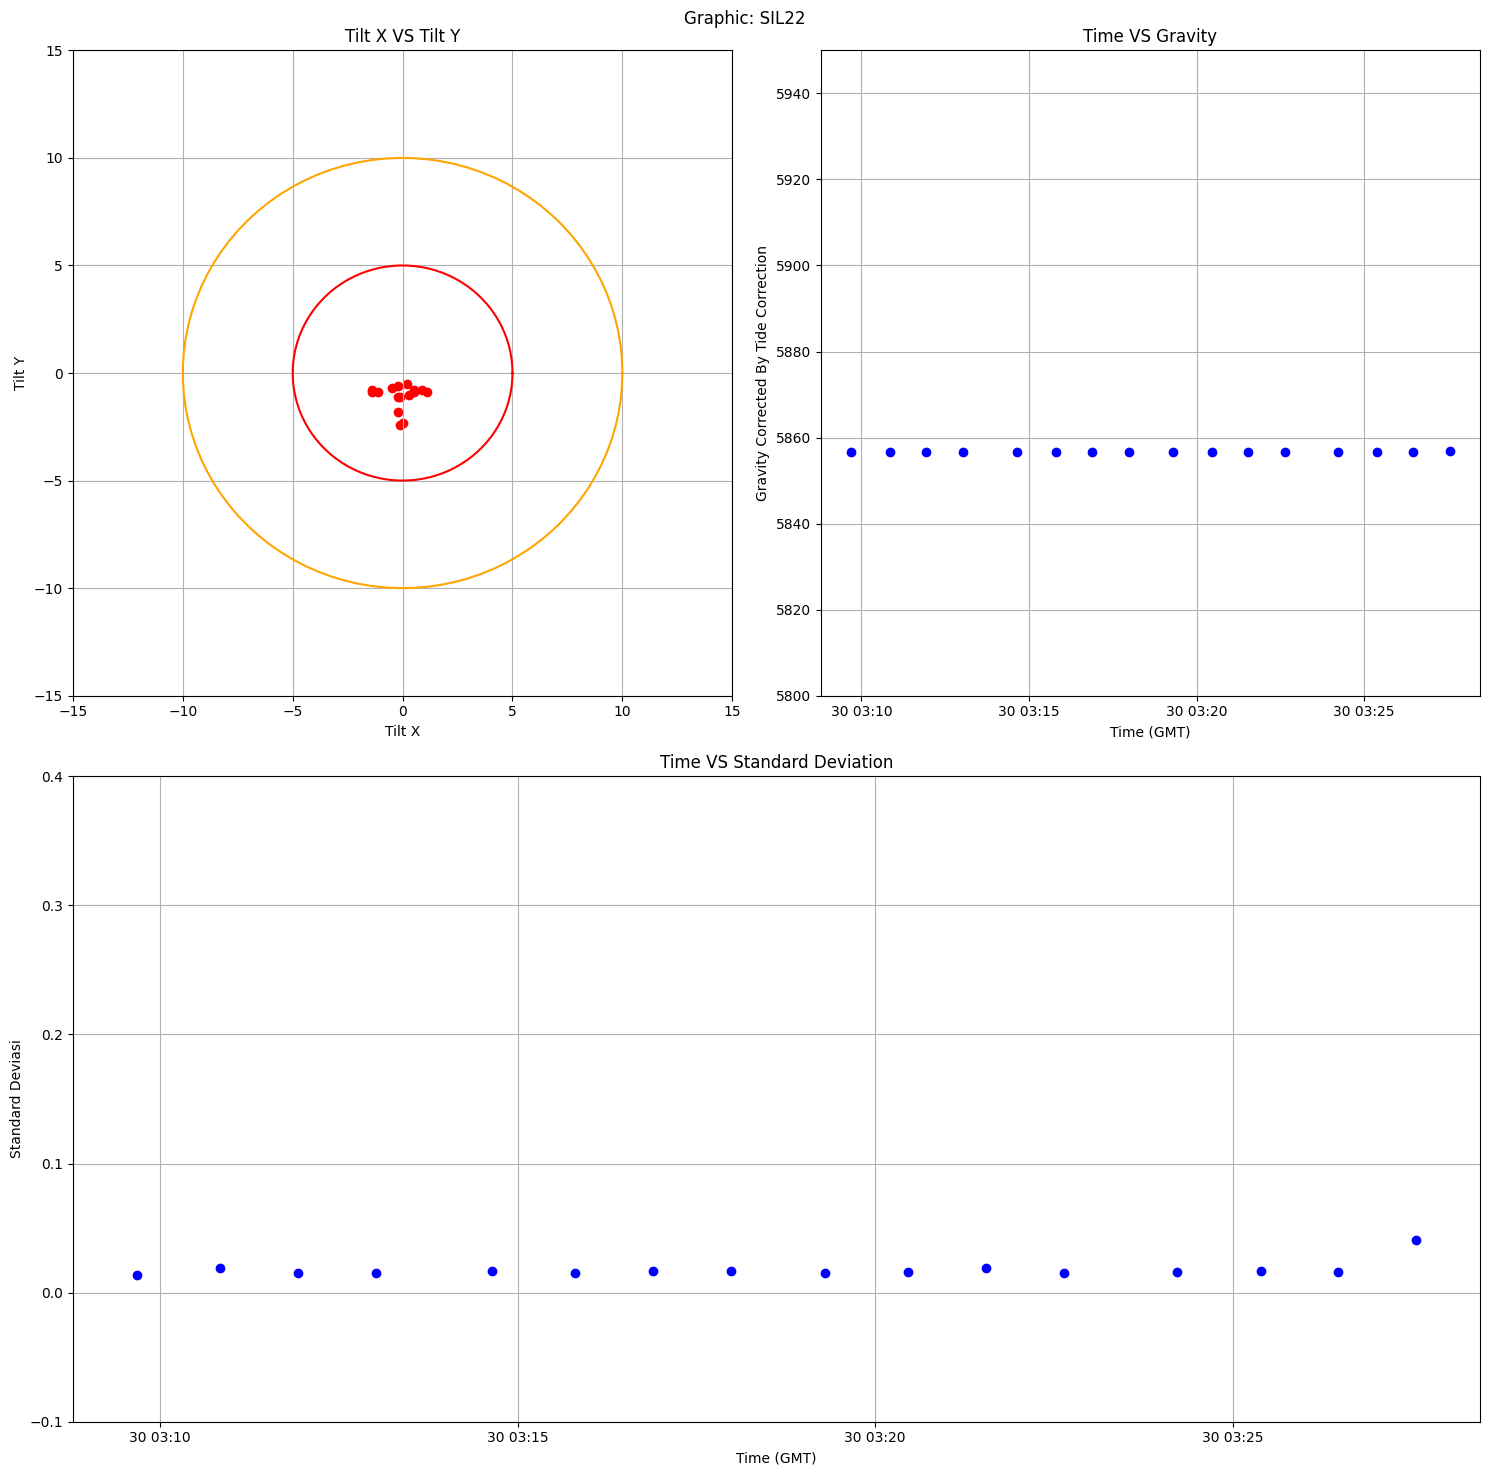

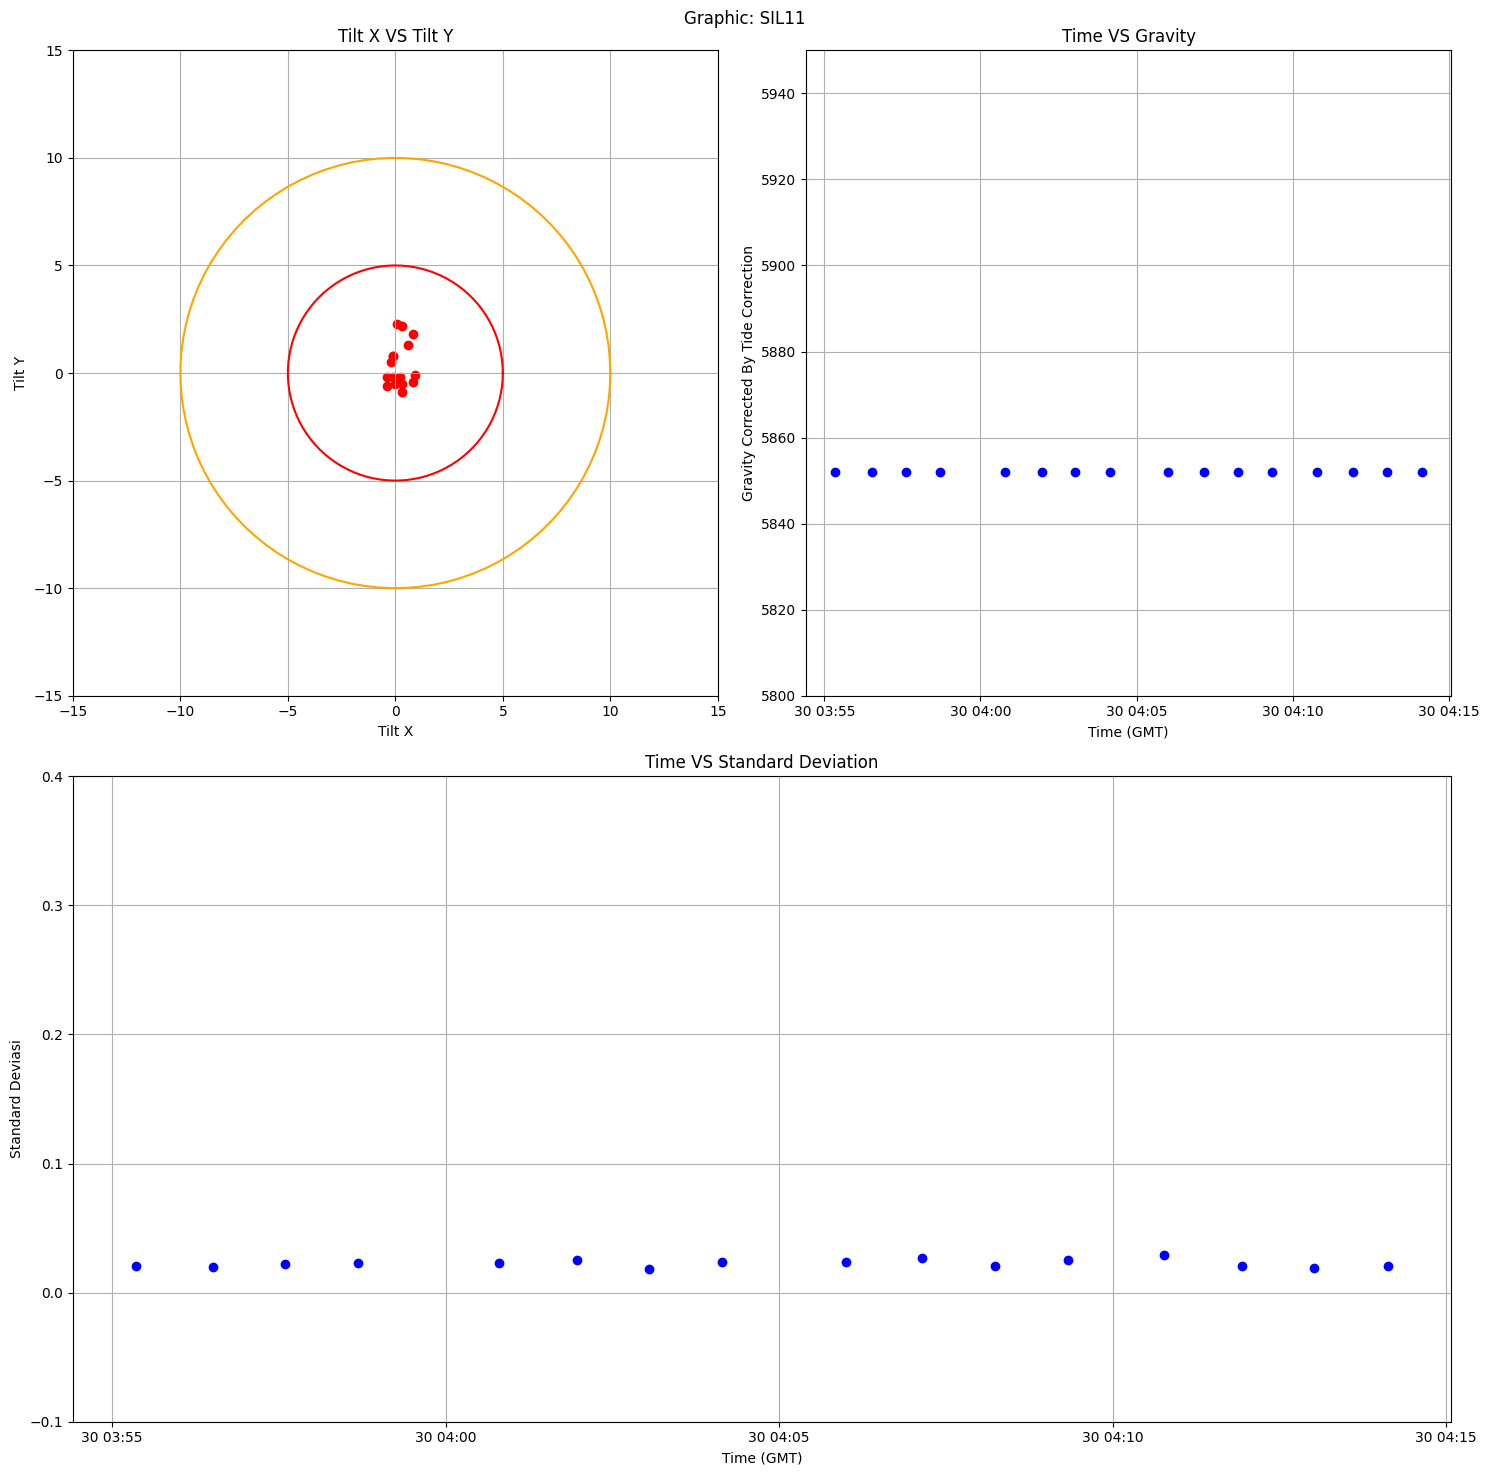

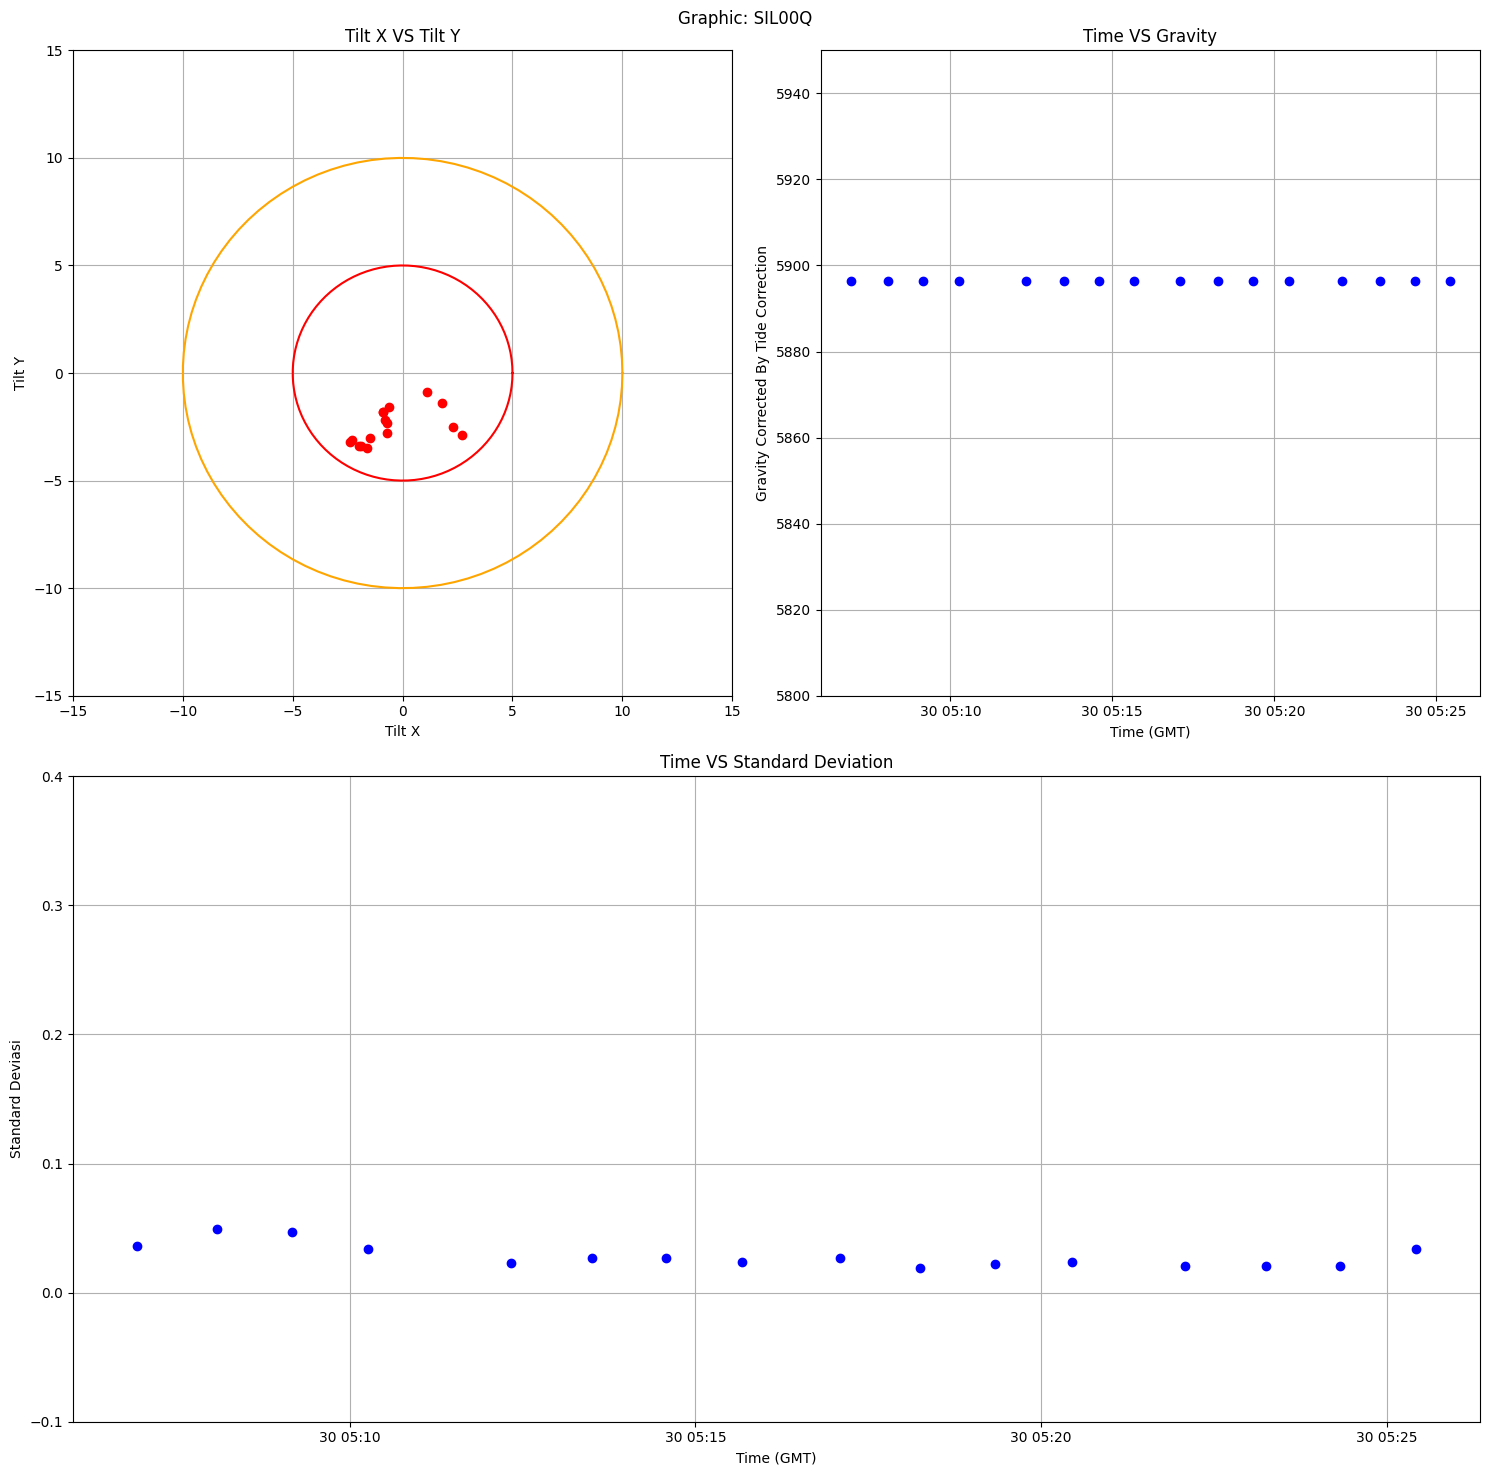

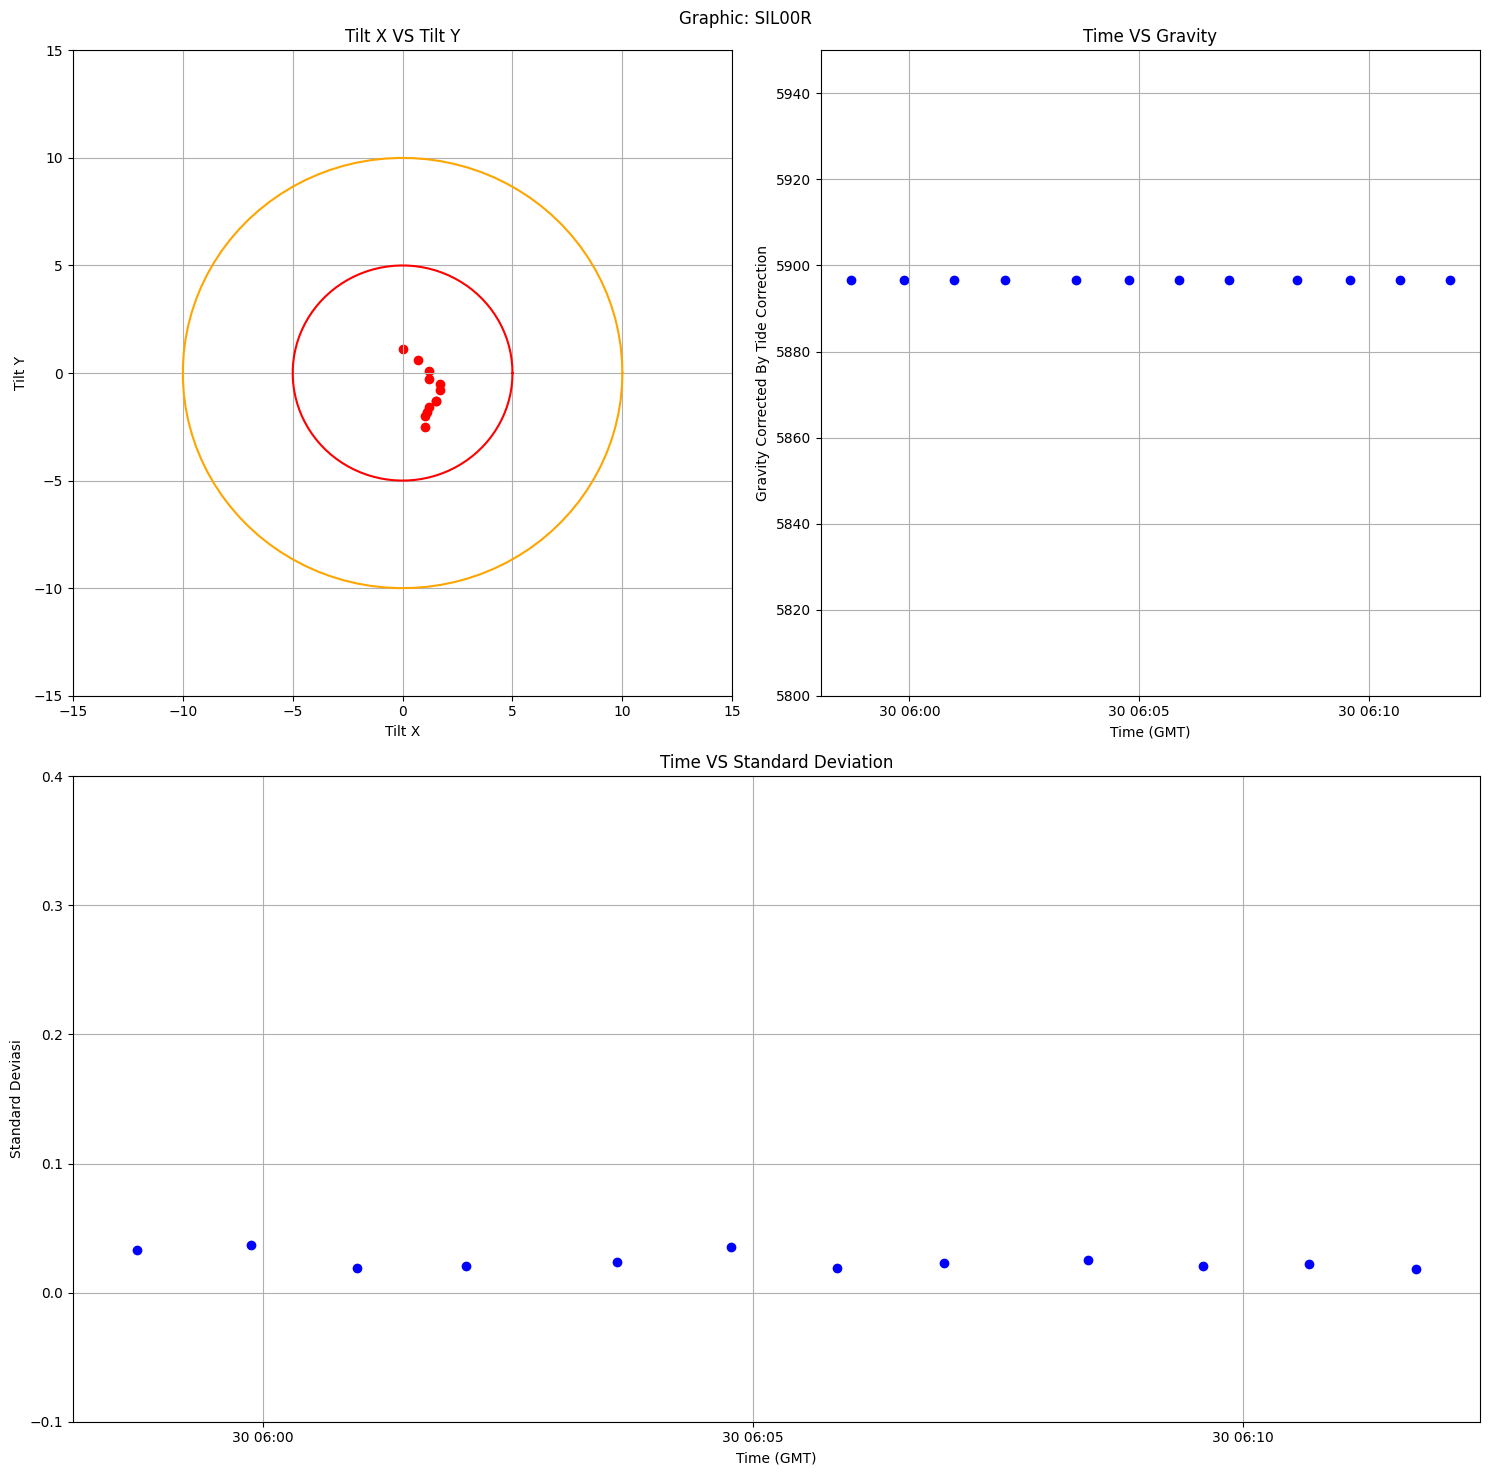

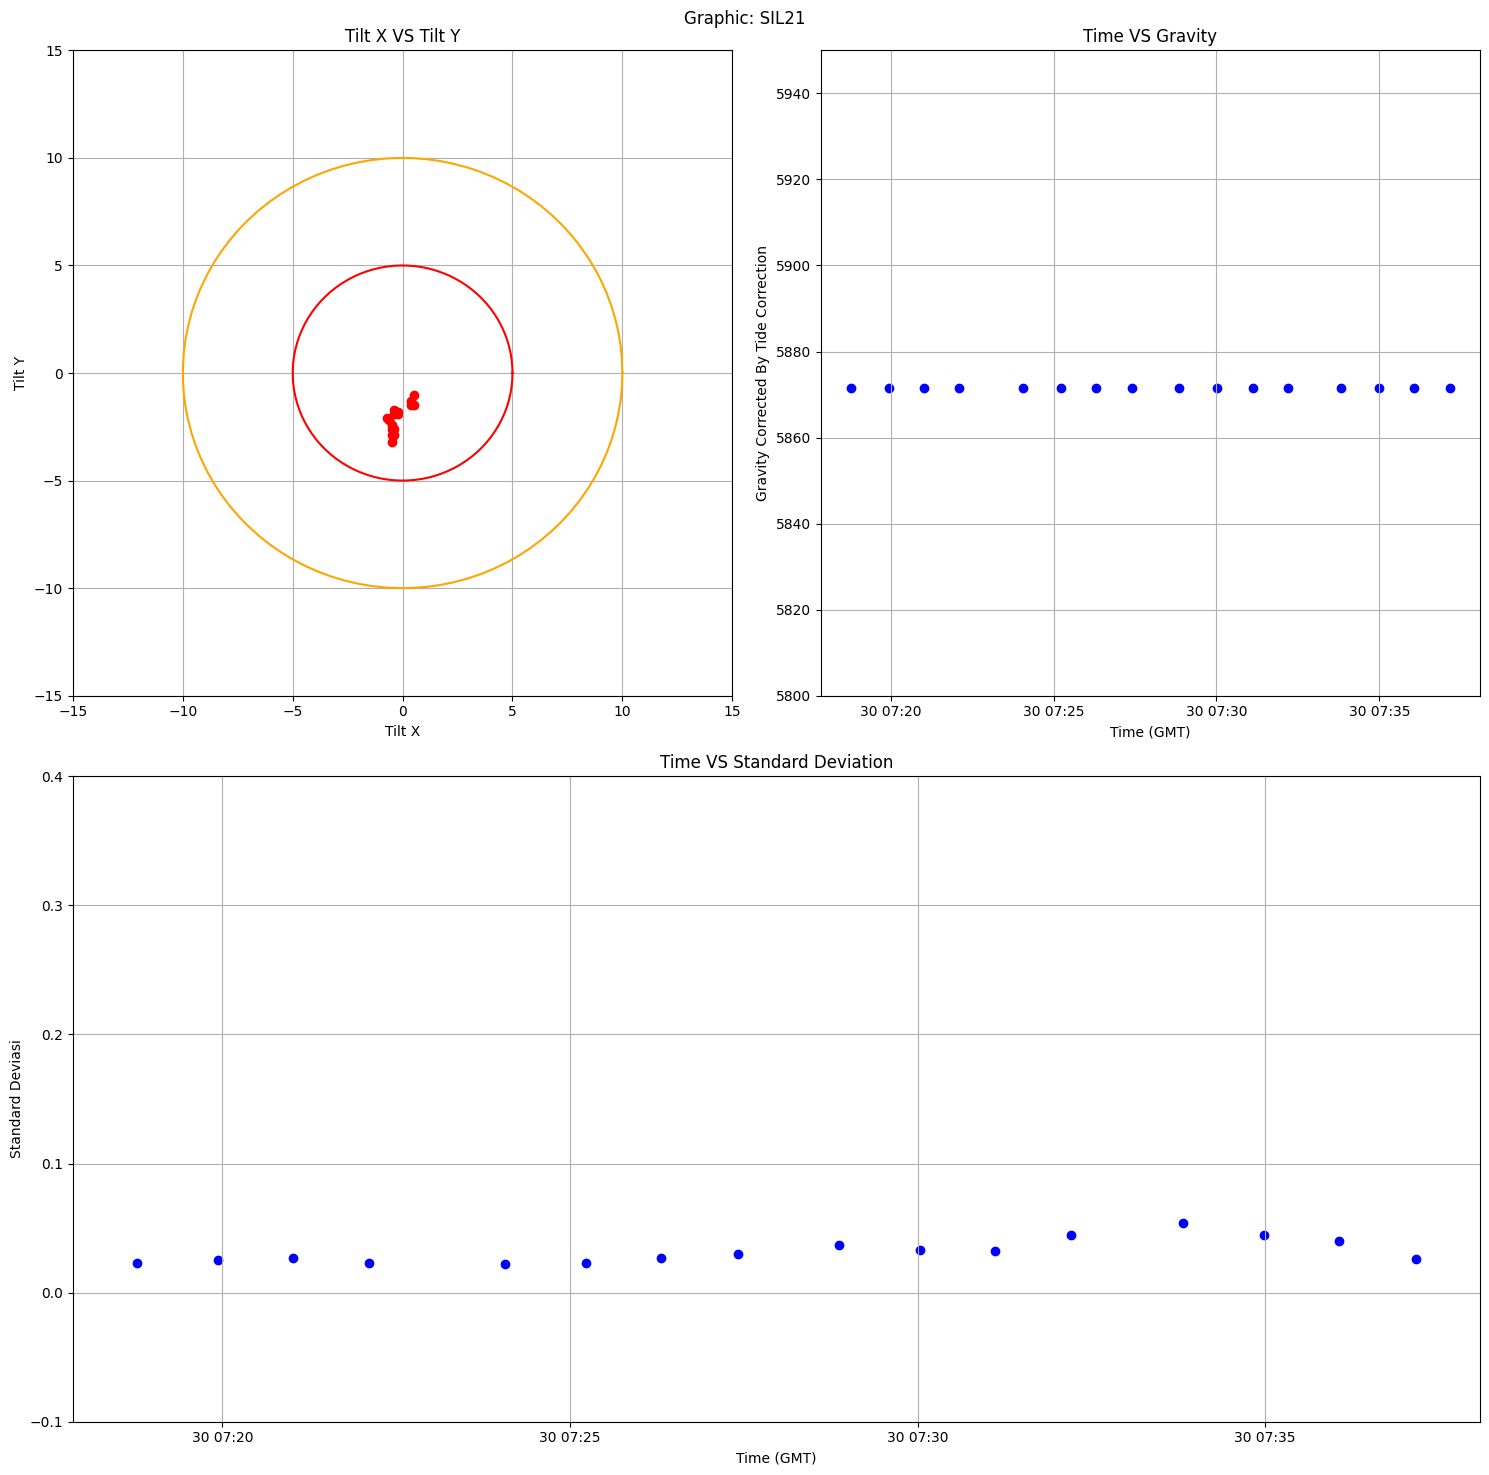

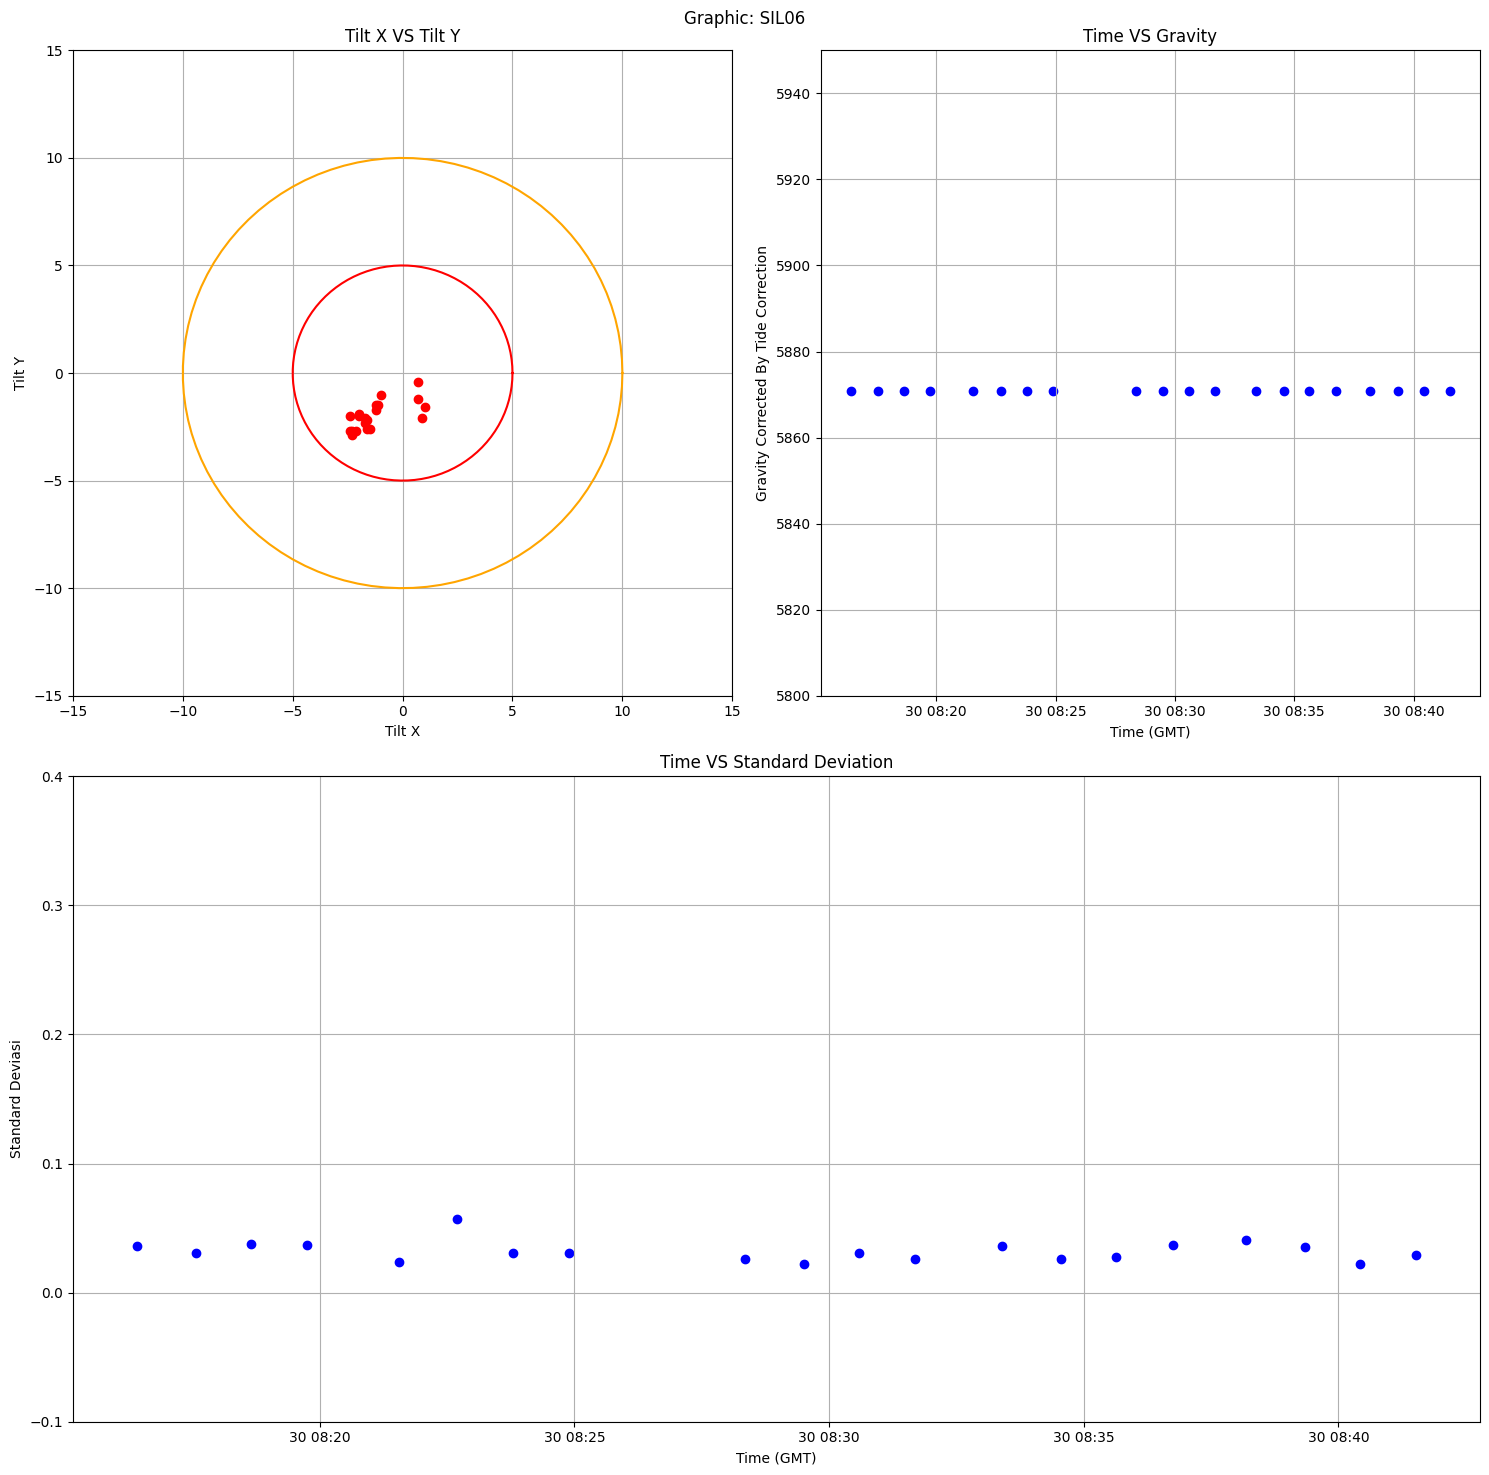

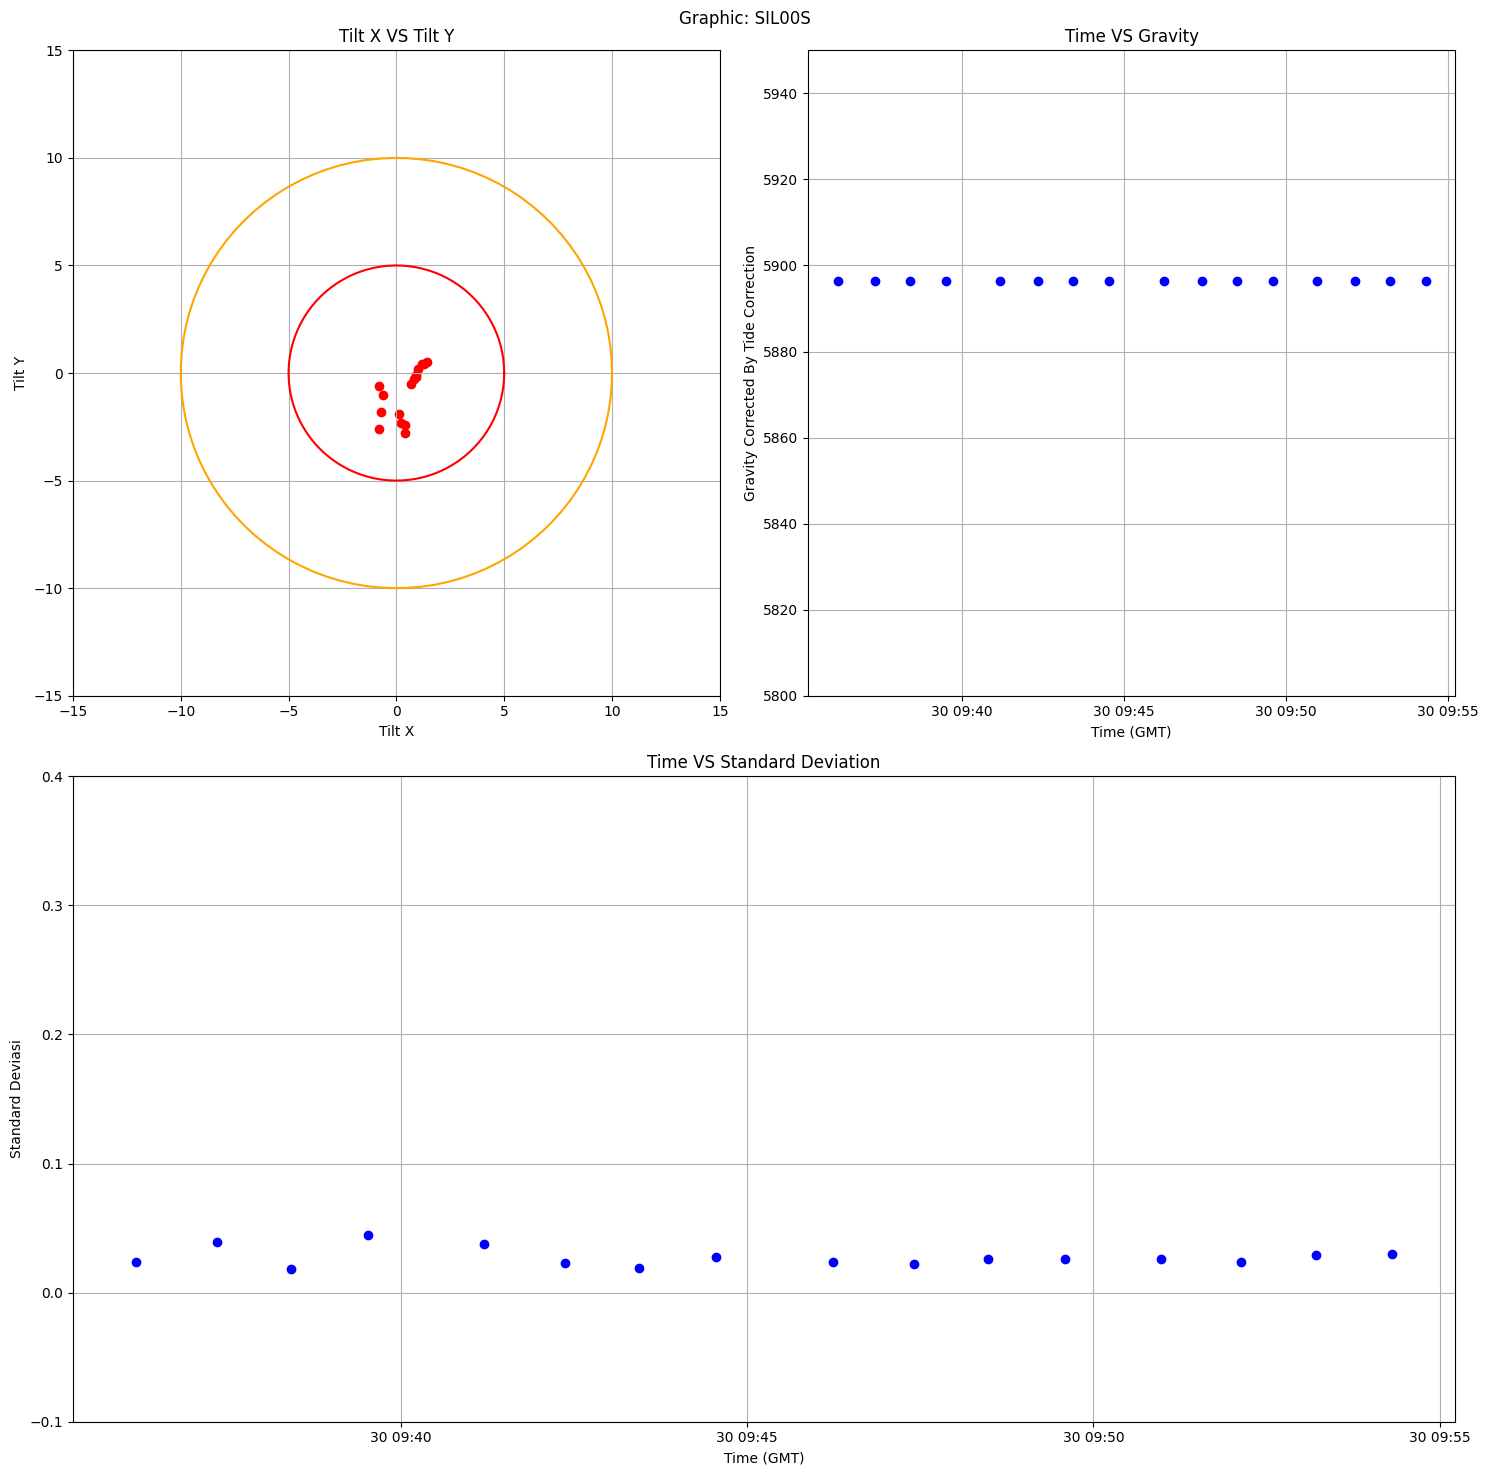

In [48]:
GravityRAW_df['ID'] = GravityRAW_df['ID'].astype(str)

#Group by ID dan ploting grafik
def plot_by_id_subplots(df):
  Id_Uniq = df['ID'].unique()
  for id in Id_Uniq:
    df_id = df[df['ID'] == id]

    if not df_id.empty:
      fig = plt.figure(figsize=(15, 15))
      fig.suptitle(f'Graphic: {id}')

      #subplot 1 : Grafik scatter yang terdiri dari Dec Time VS Standard deviasi
      ax1 = plt.subplot (212)
      ax1.scatter(df_id['DEC.TIME'], df_id['SD.'], color = "blue")
      ax1.set_title('Time VS Standard Deviation')
      ax1.set_xlabel('Time (GMT)')
      ax1.set_ylabel('Standard Deviasi')
      ax1.grid(True)
      #ax1.legend(label='The red data', loc="upper right", bbox_to_anchor = (0.5, 0.5))
      ax1.tick_params(axis='x', rotation=0)
      ax1.set_ylim(-0.1, 0.4)

      #subplot 2 : Grafik scatter yang terdiri dari TILT X VS TILT Y
      ax2 = plt.subplot (221)
      an = np.linspace(0, 2*np.pi, 100)
      ax2.plot(5 * np.cos(an), 5 * np.sin(an), color = "red")
      ax2.plot(10 * np.cos(an), 10 * np.sin(an), color = "orange")
      ax2.scatter(df_id['TILTX'], df_id['TILTY'], color = "red")
      ax2.set_title('Tilt X VS Tilt Y')
      ax2.set_xlabel('Tilt X')
      ax2.set_ylabel('Tilt Y')
      ax2.grid(True)
      ax2.set_xlim(-15, 15)
      #ax2.legend(loc="upper right", bbox_to_anchor = (0.5, 0.5))
      ax2.tick_params(axis='x', rotation=0)
      ax2.set_ylim(-15, 15)

      # Subplot 3: Grafik scatter yang terdiri dari DEC.TIME vs GRAV
      ax3 = plt.subplot (222)
      ax3.scatter(df_id['DEC.TIME'], df_id['GRAV'], color = "blue")
      ax3.set_title('Time VS Gravity')
      ax3.set_xlabel('Time (GMT)')
      ax3.set_ylabel('Gravity Corrected By Tide Correction')
      ax3.grid(True)
      #ax3.legend(loc="upper right", bbox_to_anchor = (0.5, 0.5))
      ax3.tick_params(axis='x', rotation=0)
      ax3.set_ylim(5800, 5950)

      plt.tight_layout()
      plt.show()
    else:

      print(f"No data found for ID: {id}")

plot_by_id_subplots(GravityRAW_df)

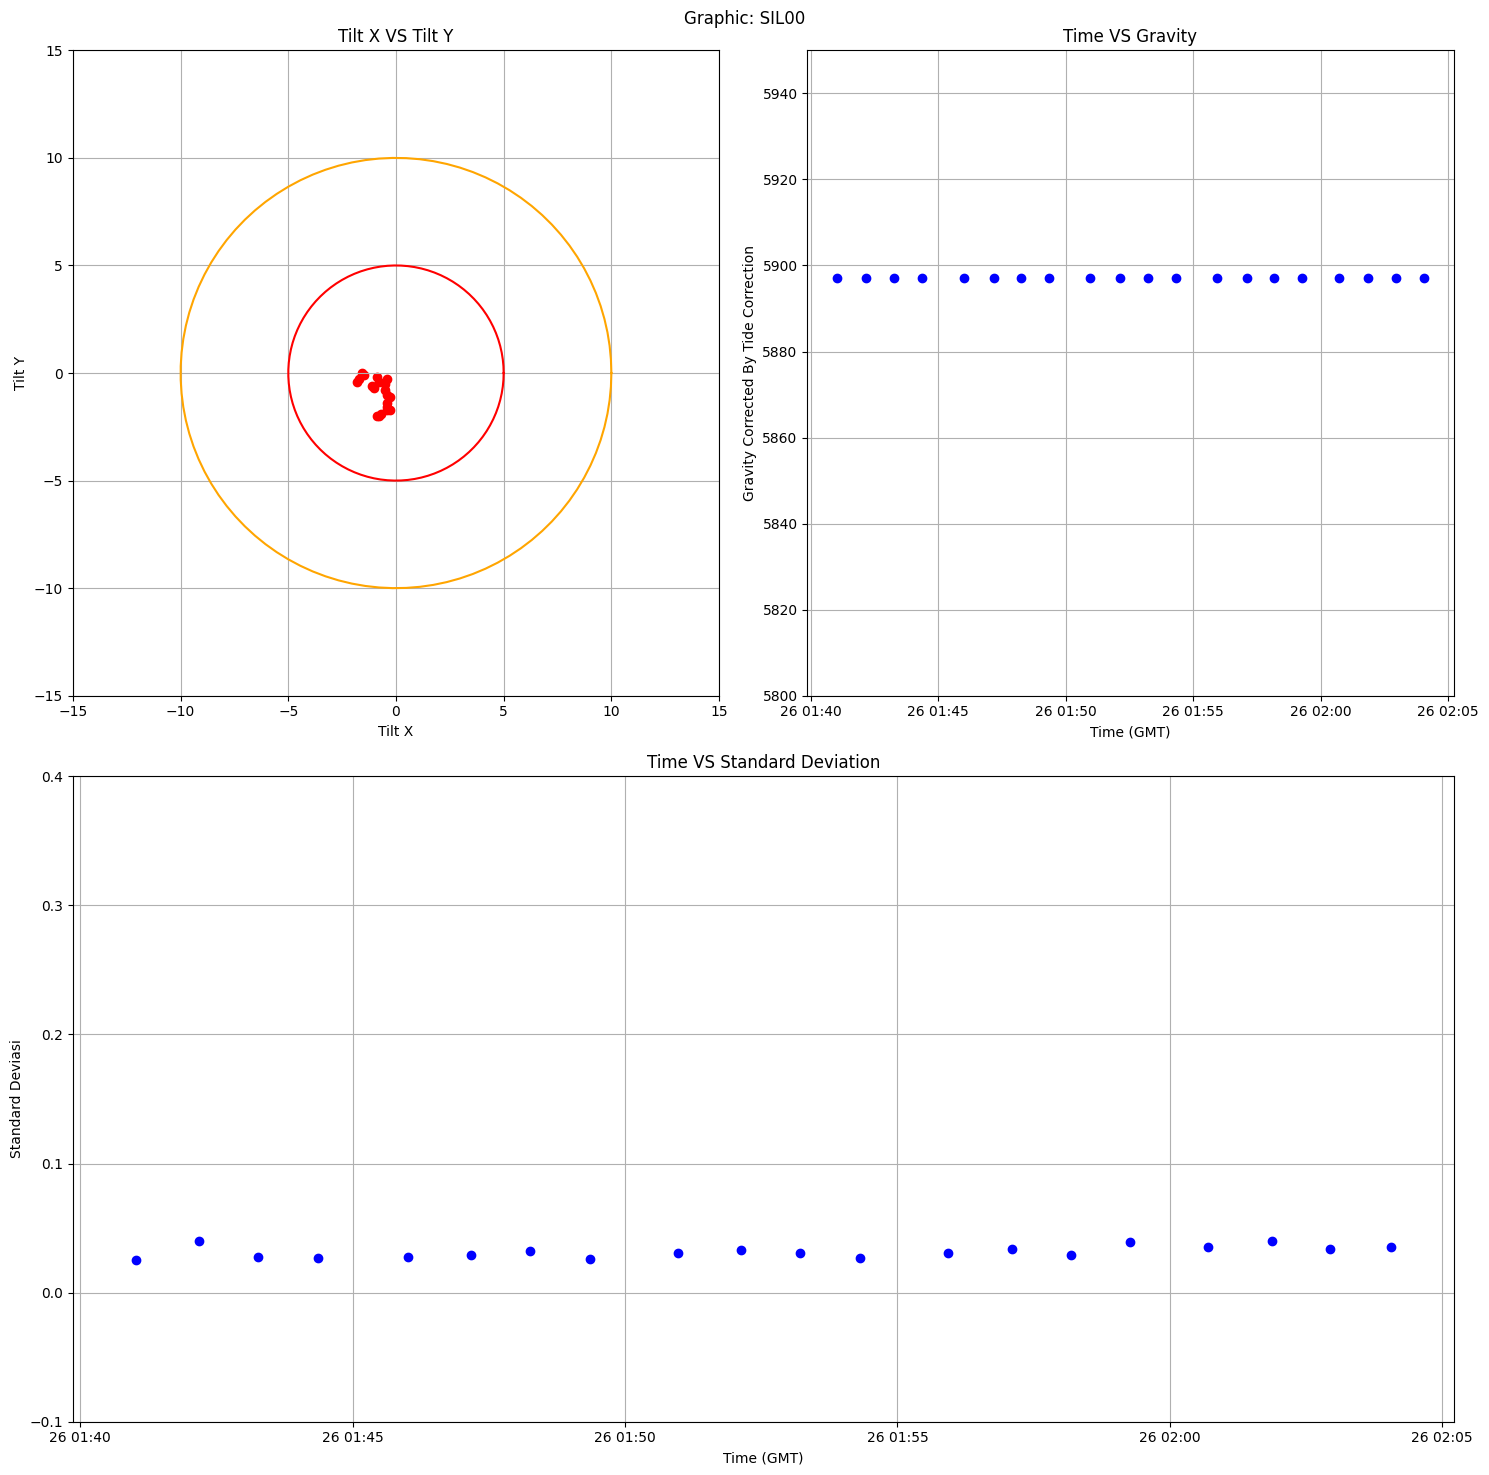

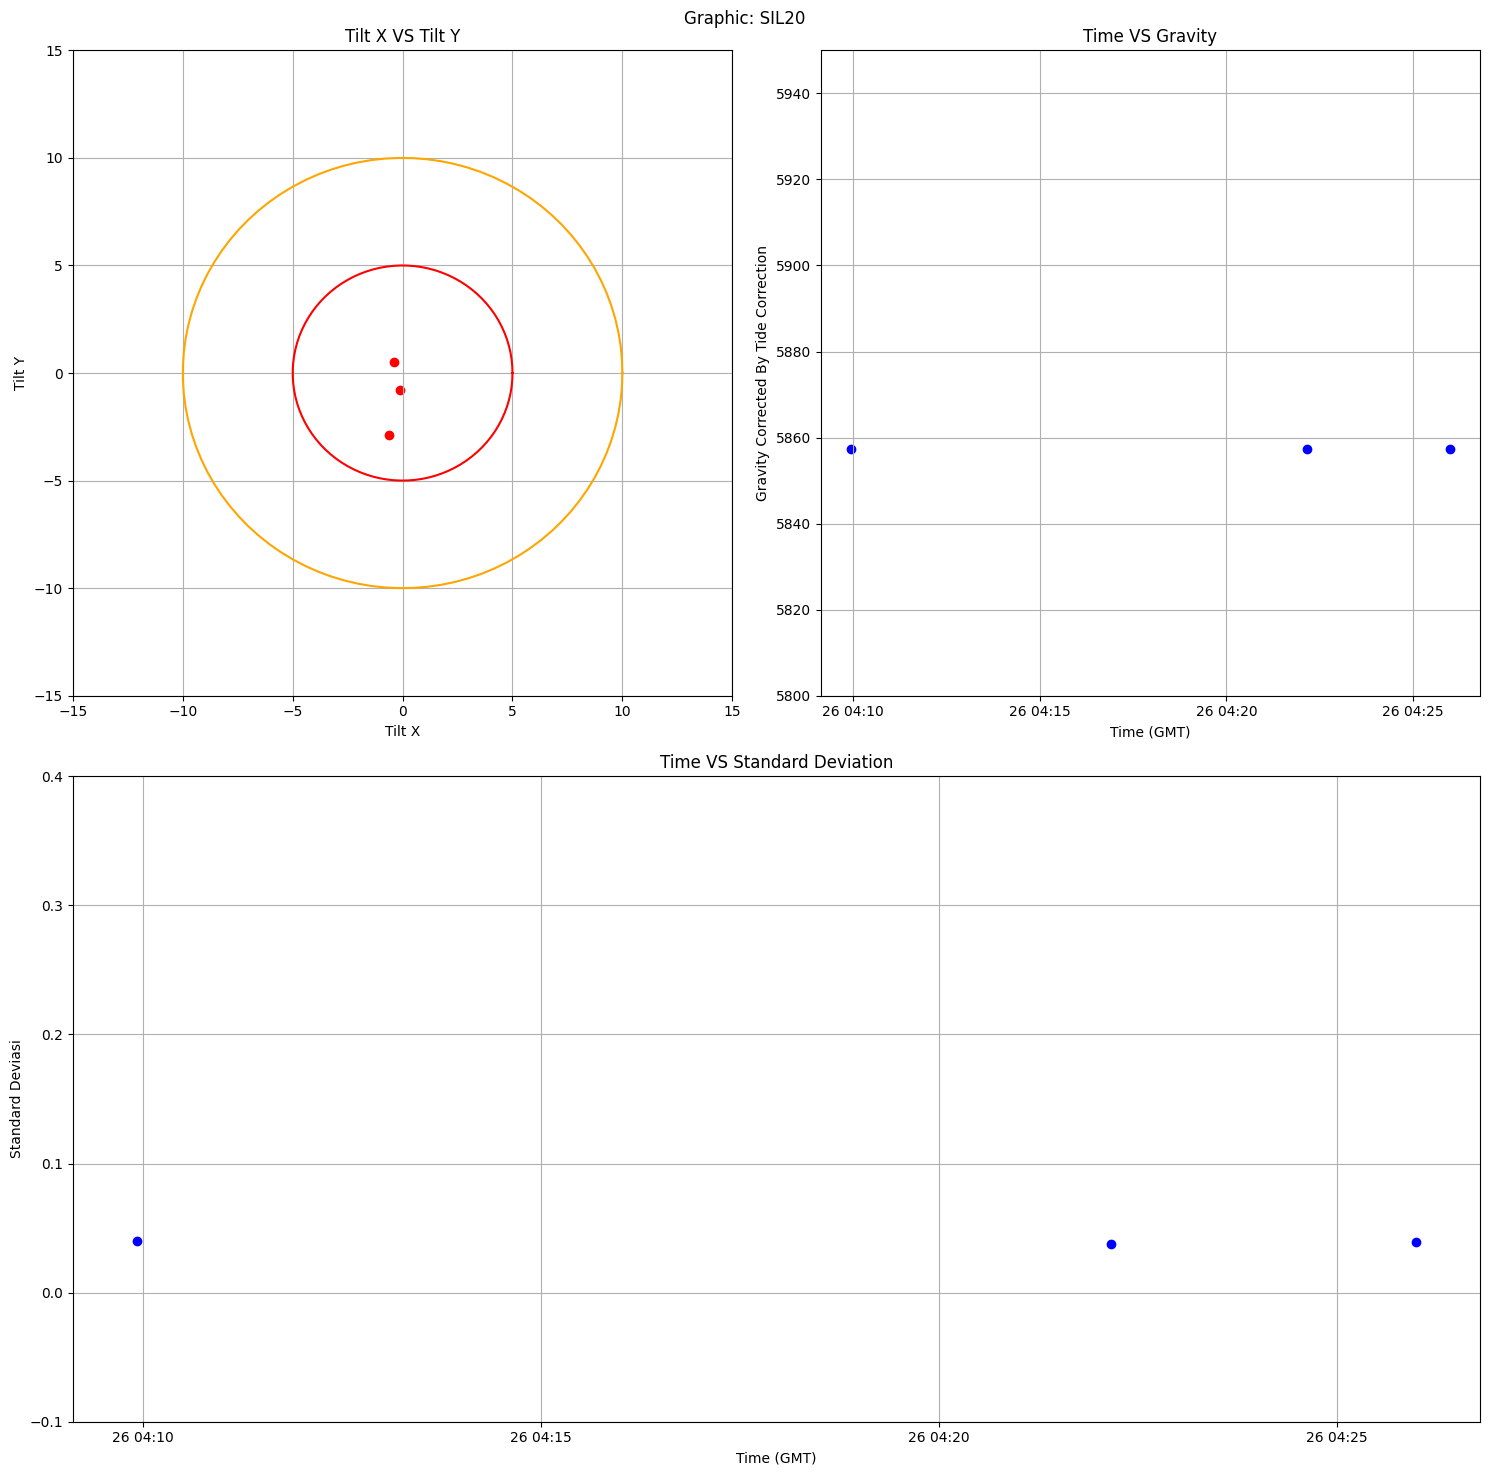

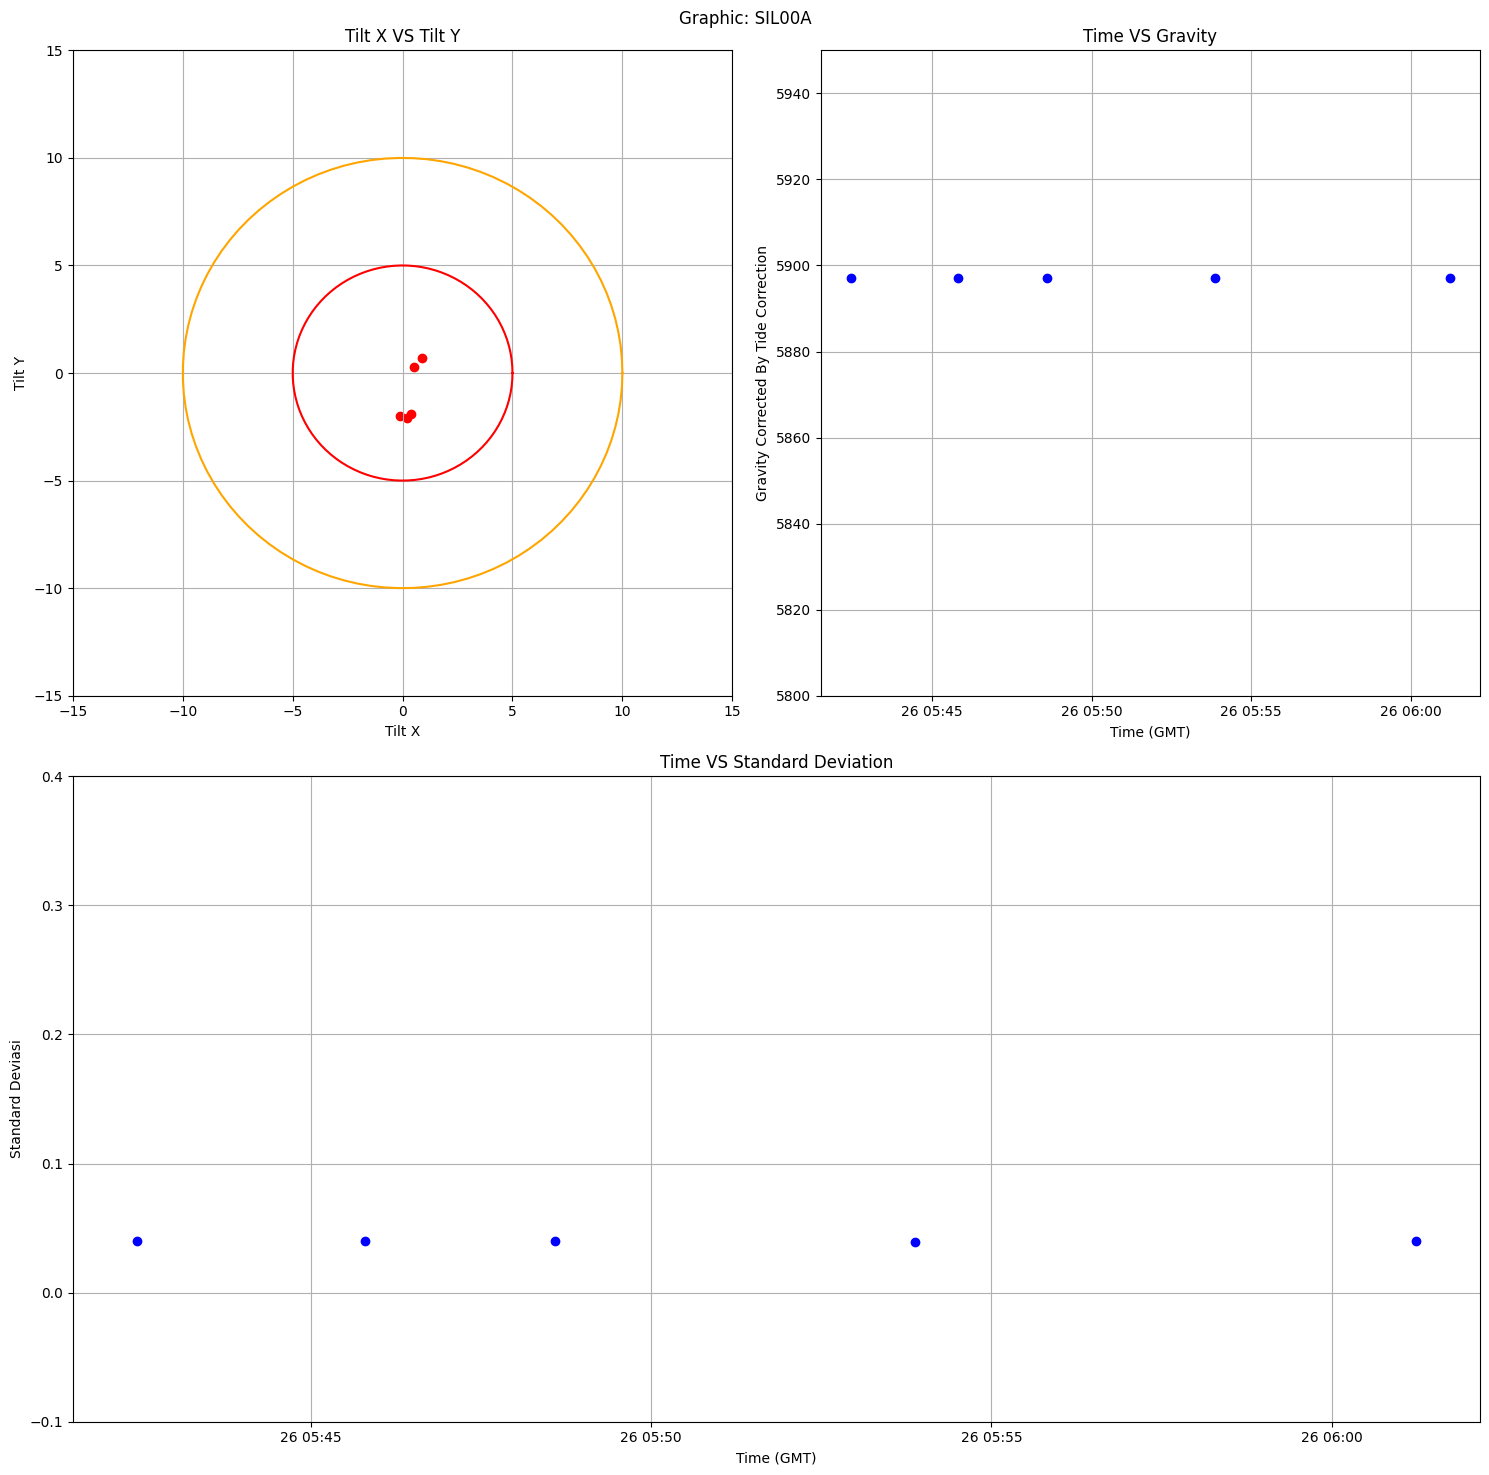

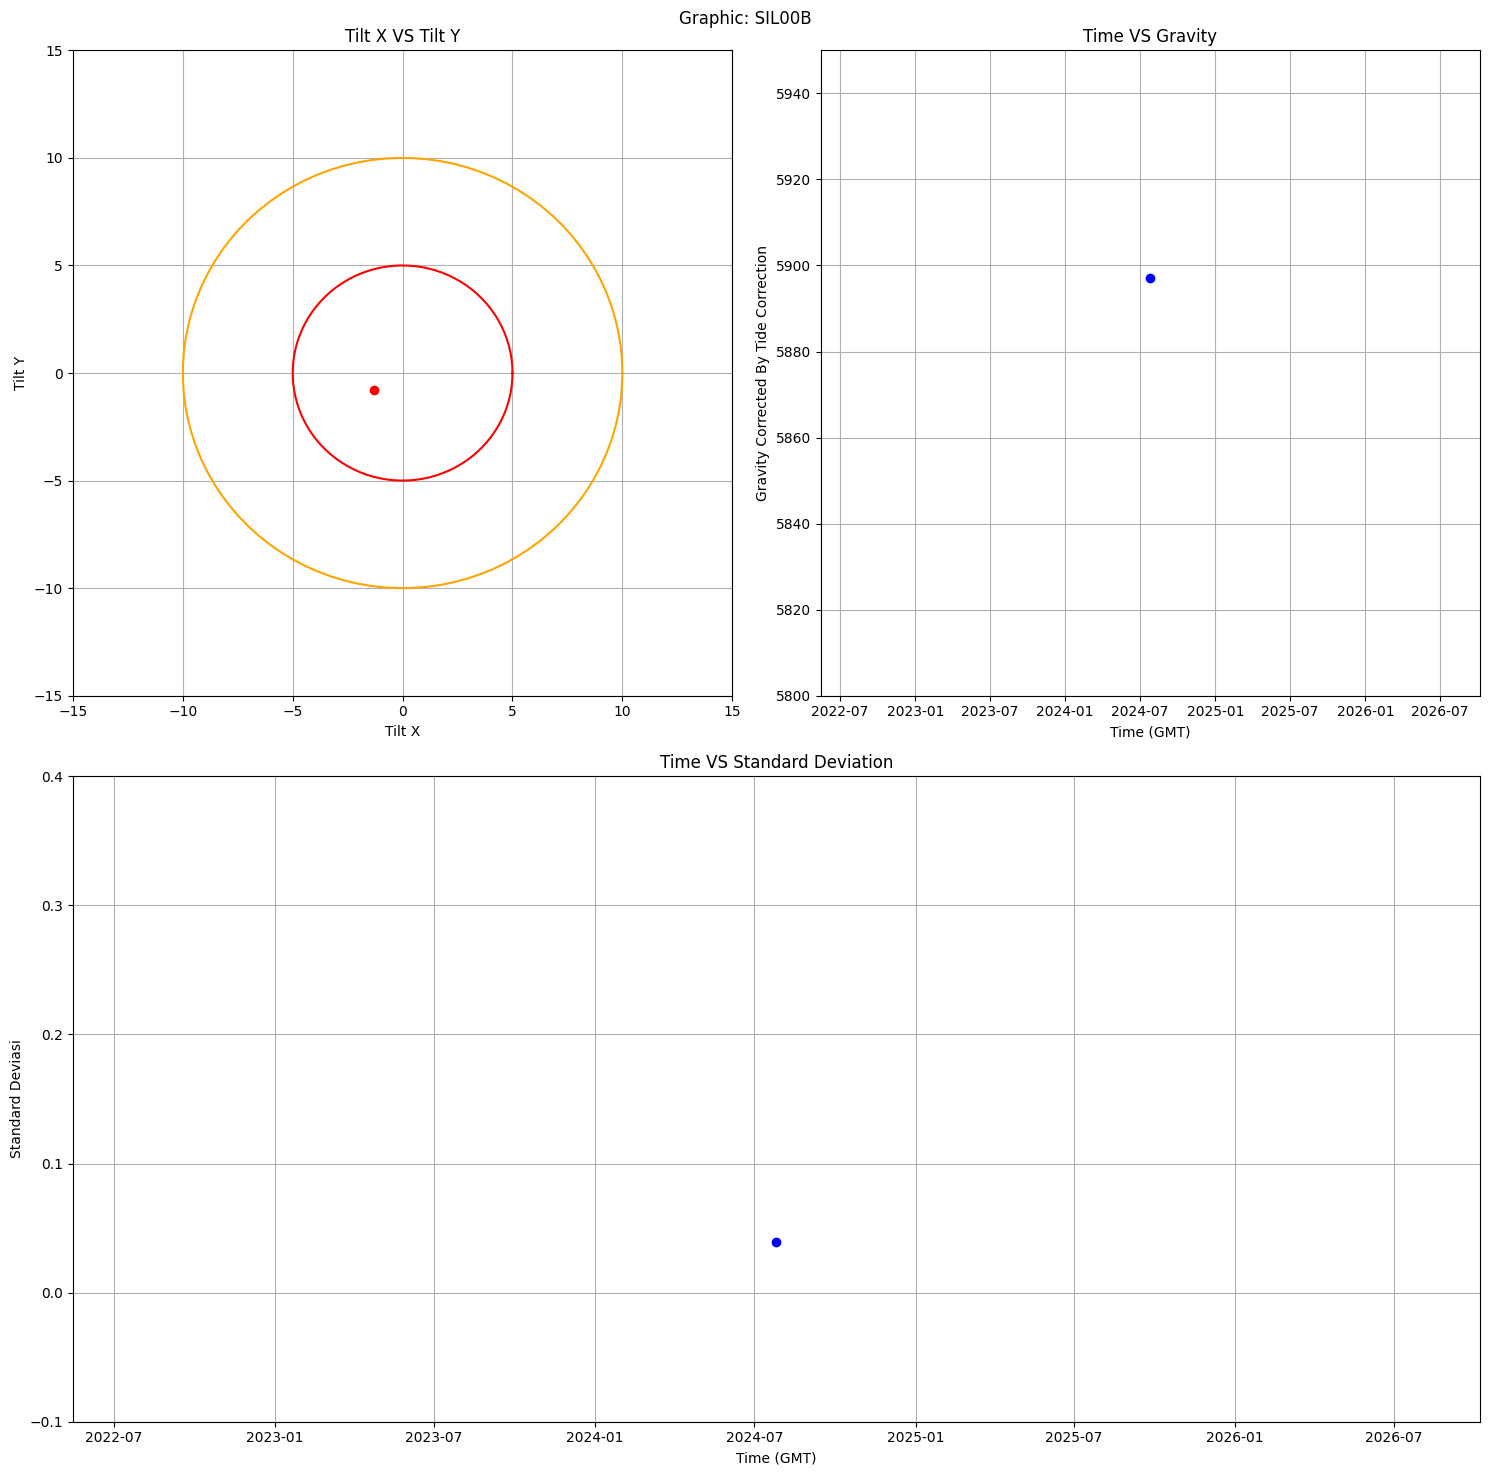

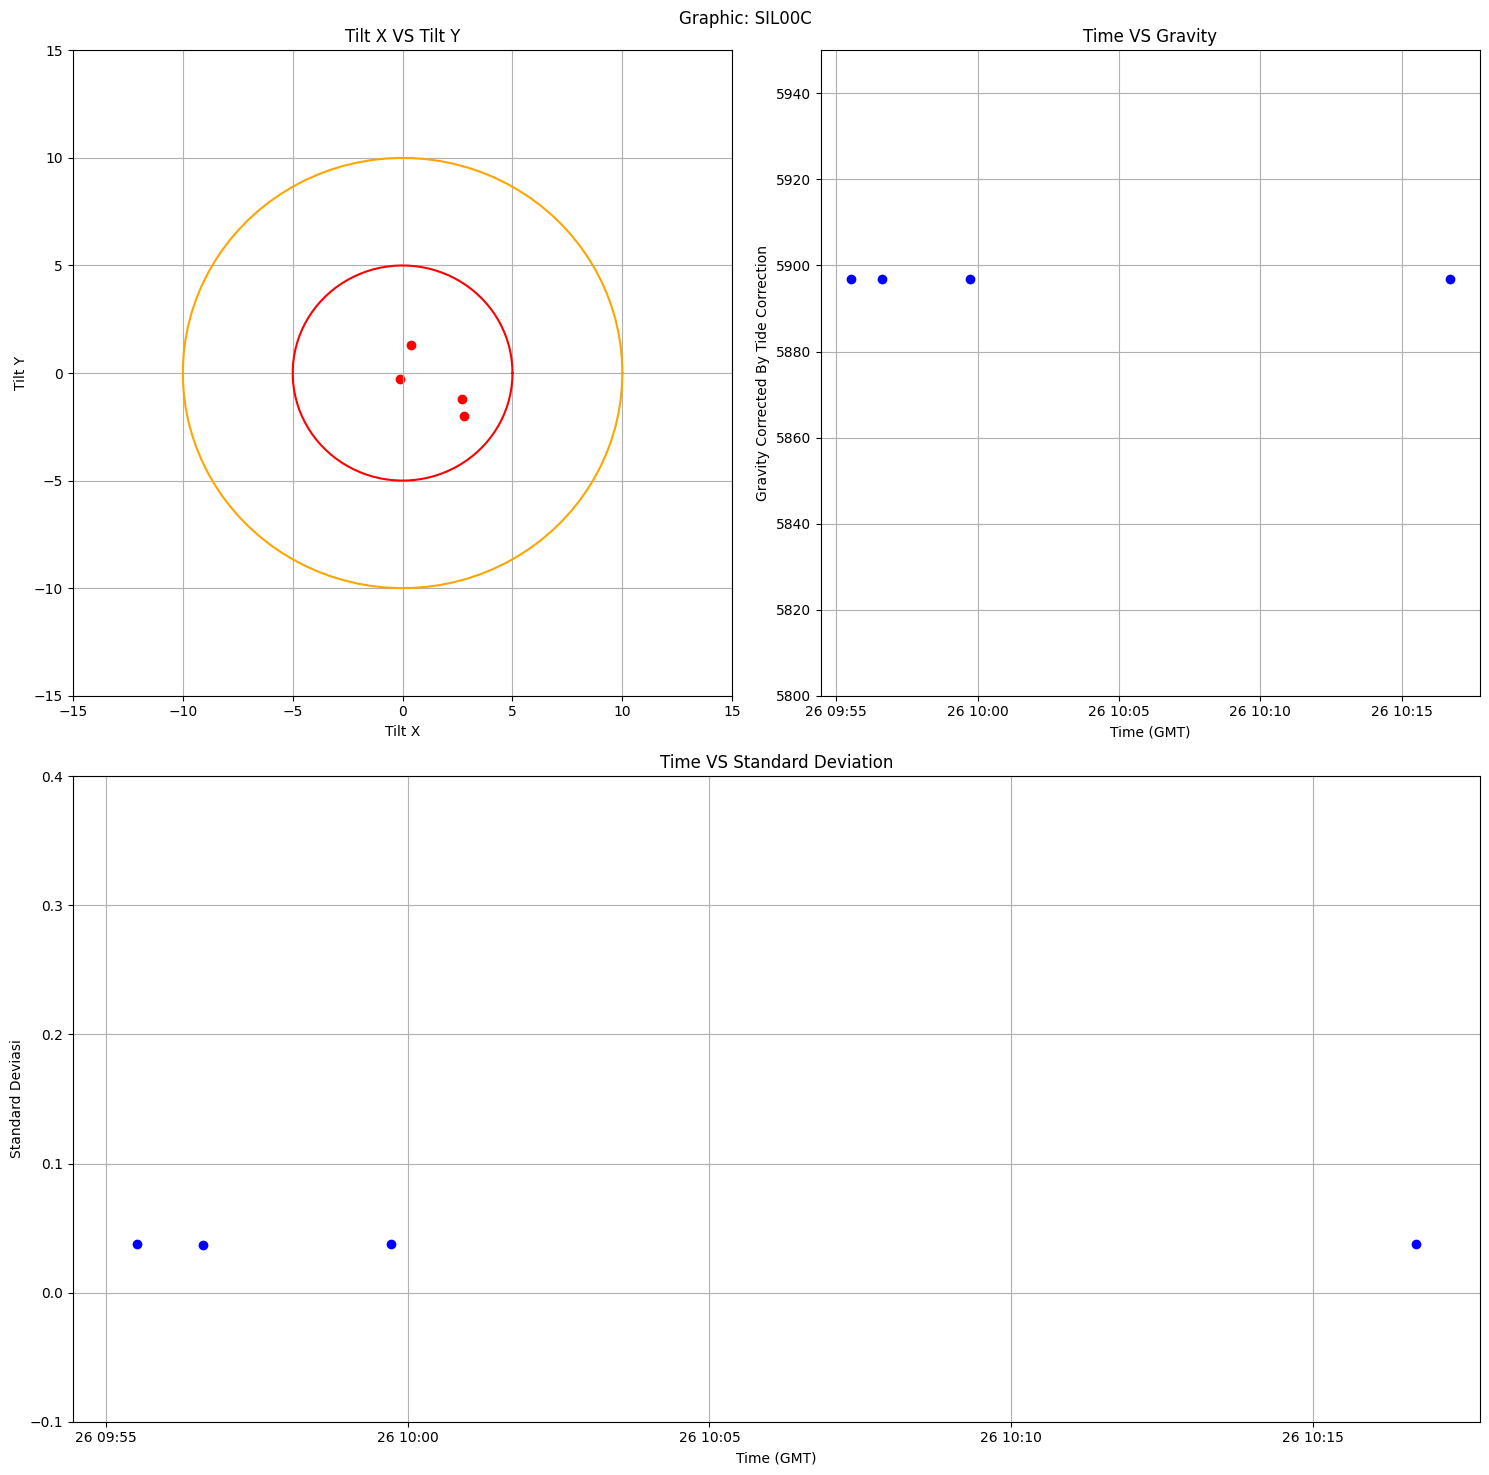

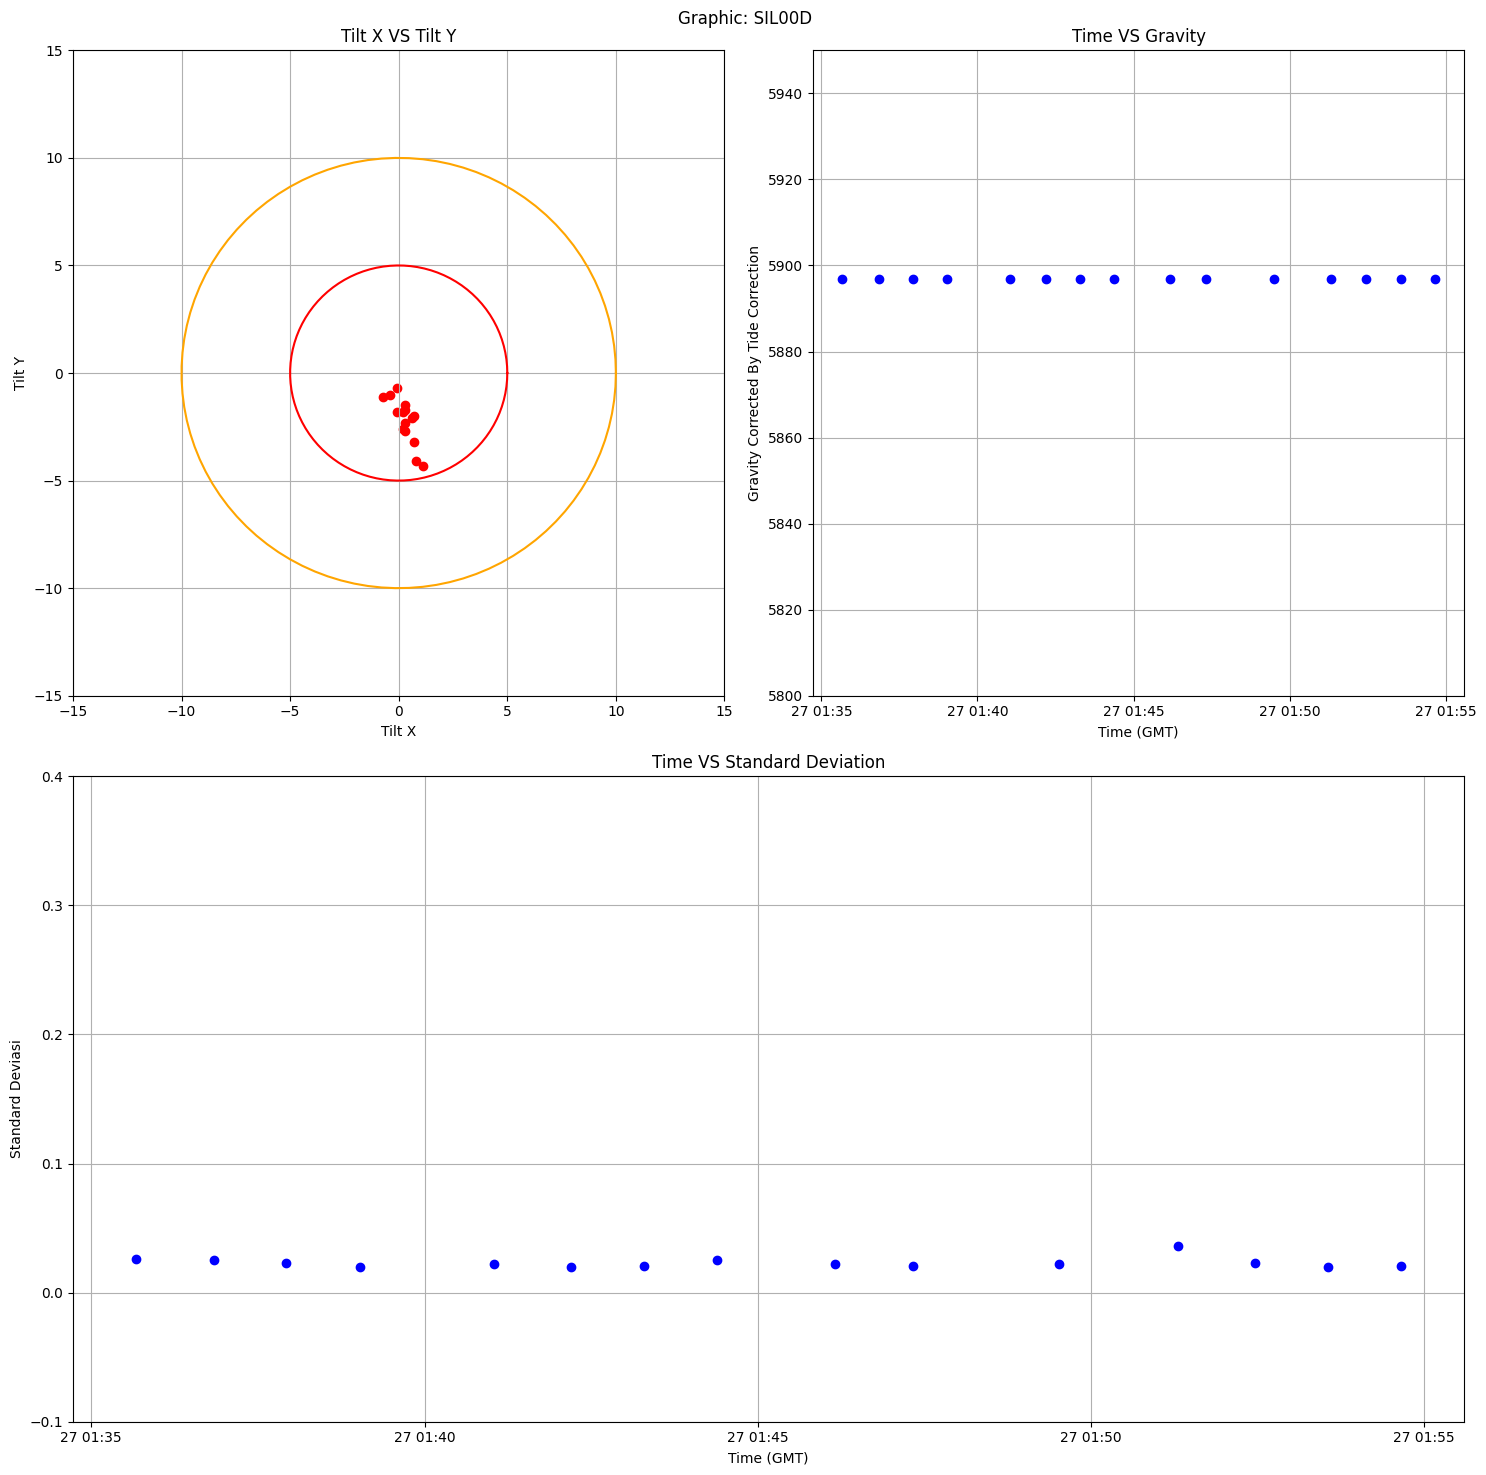

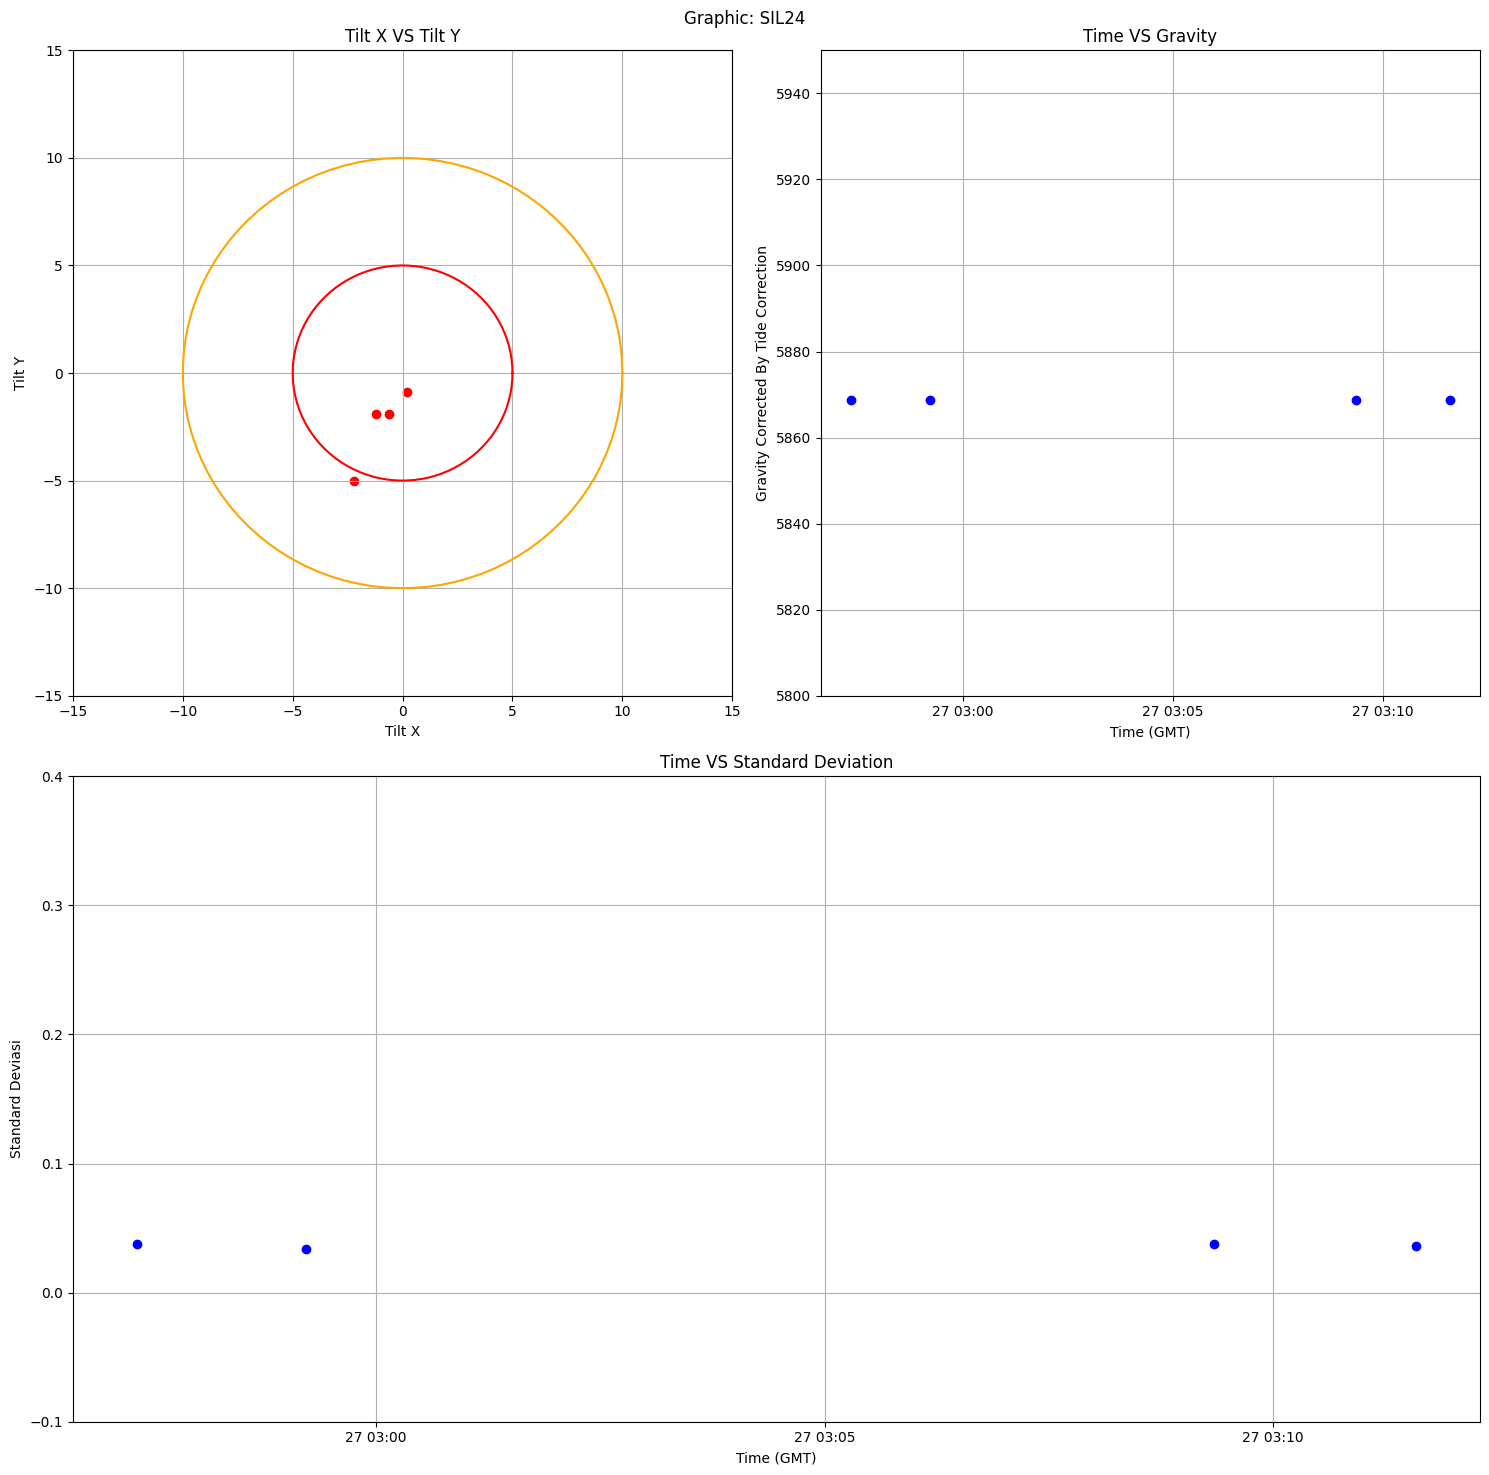

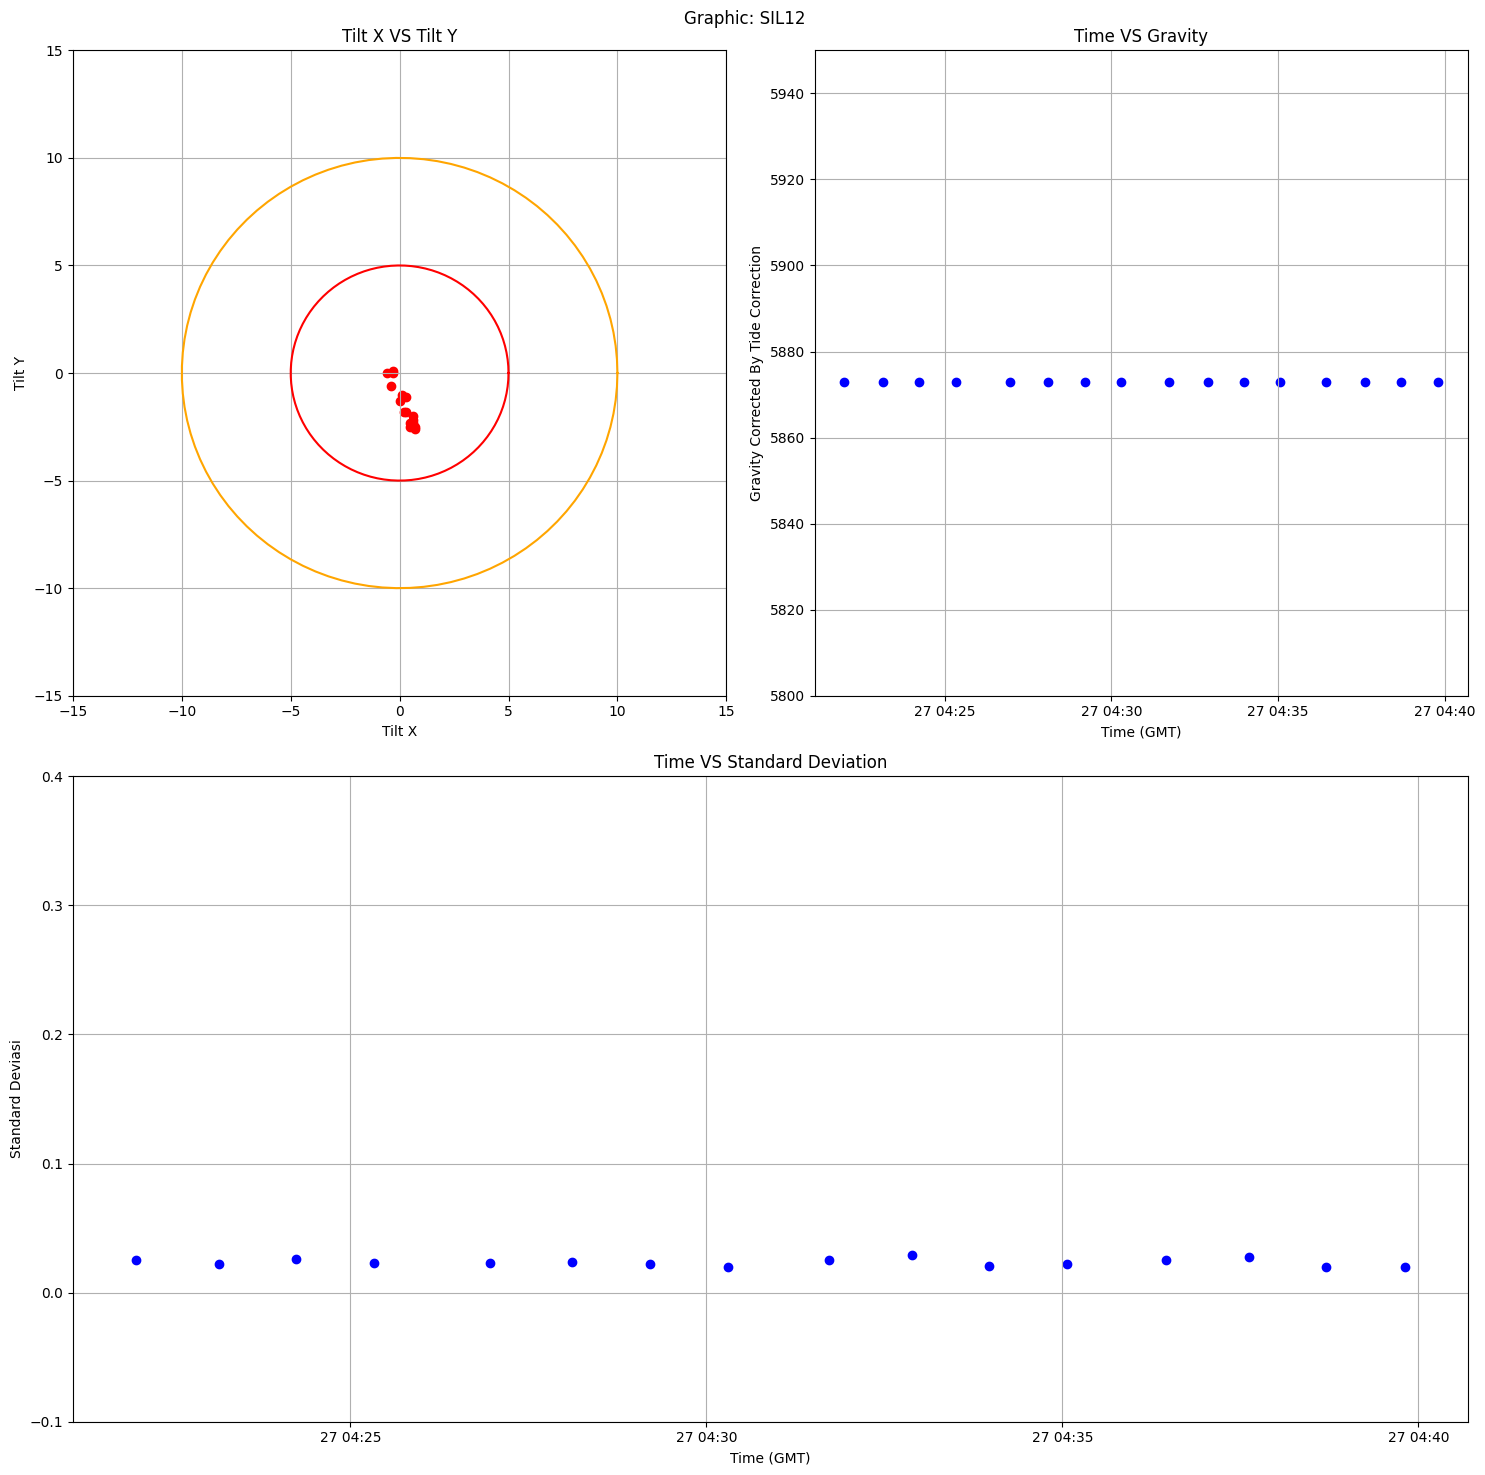

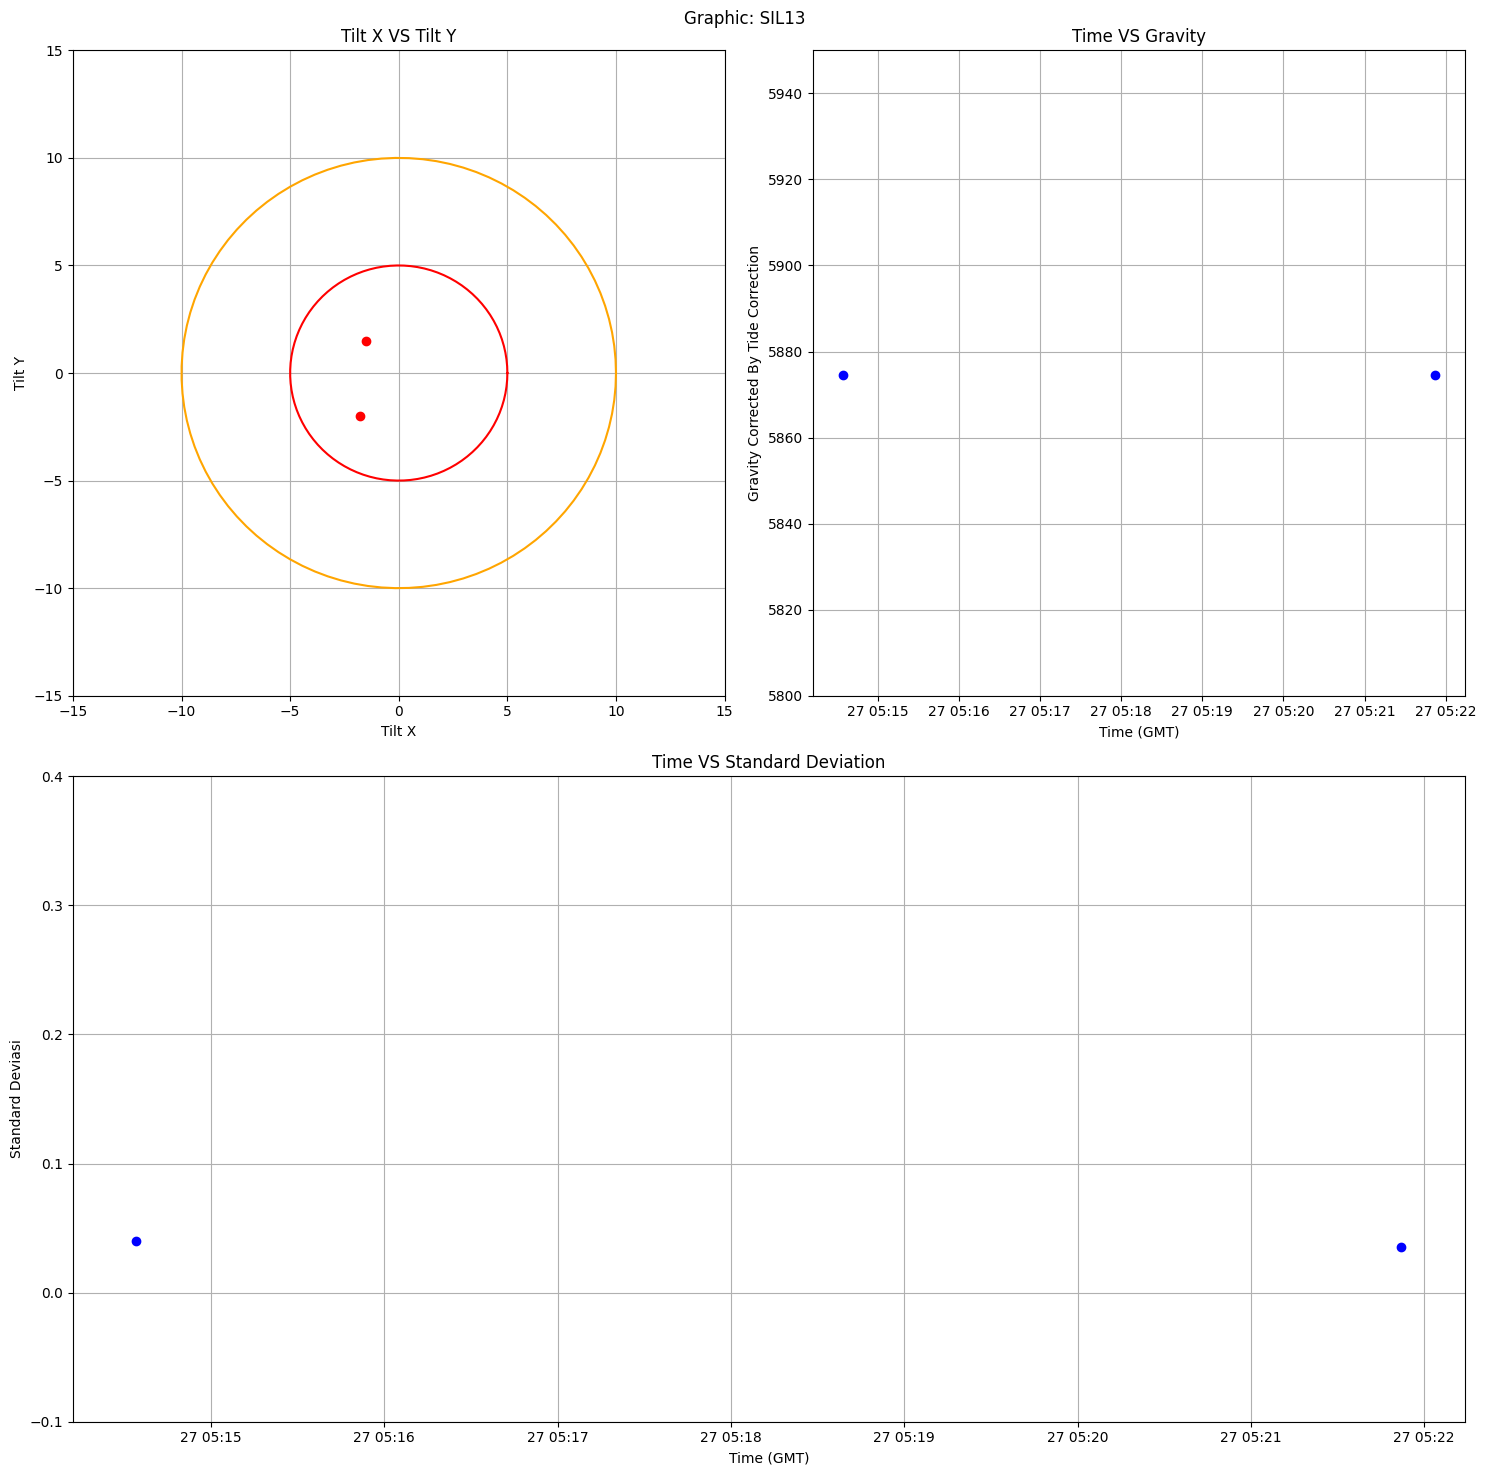

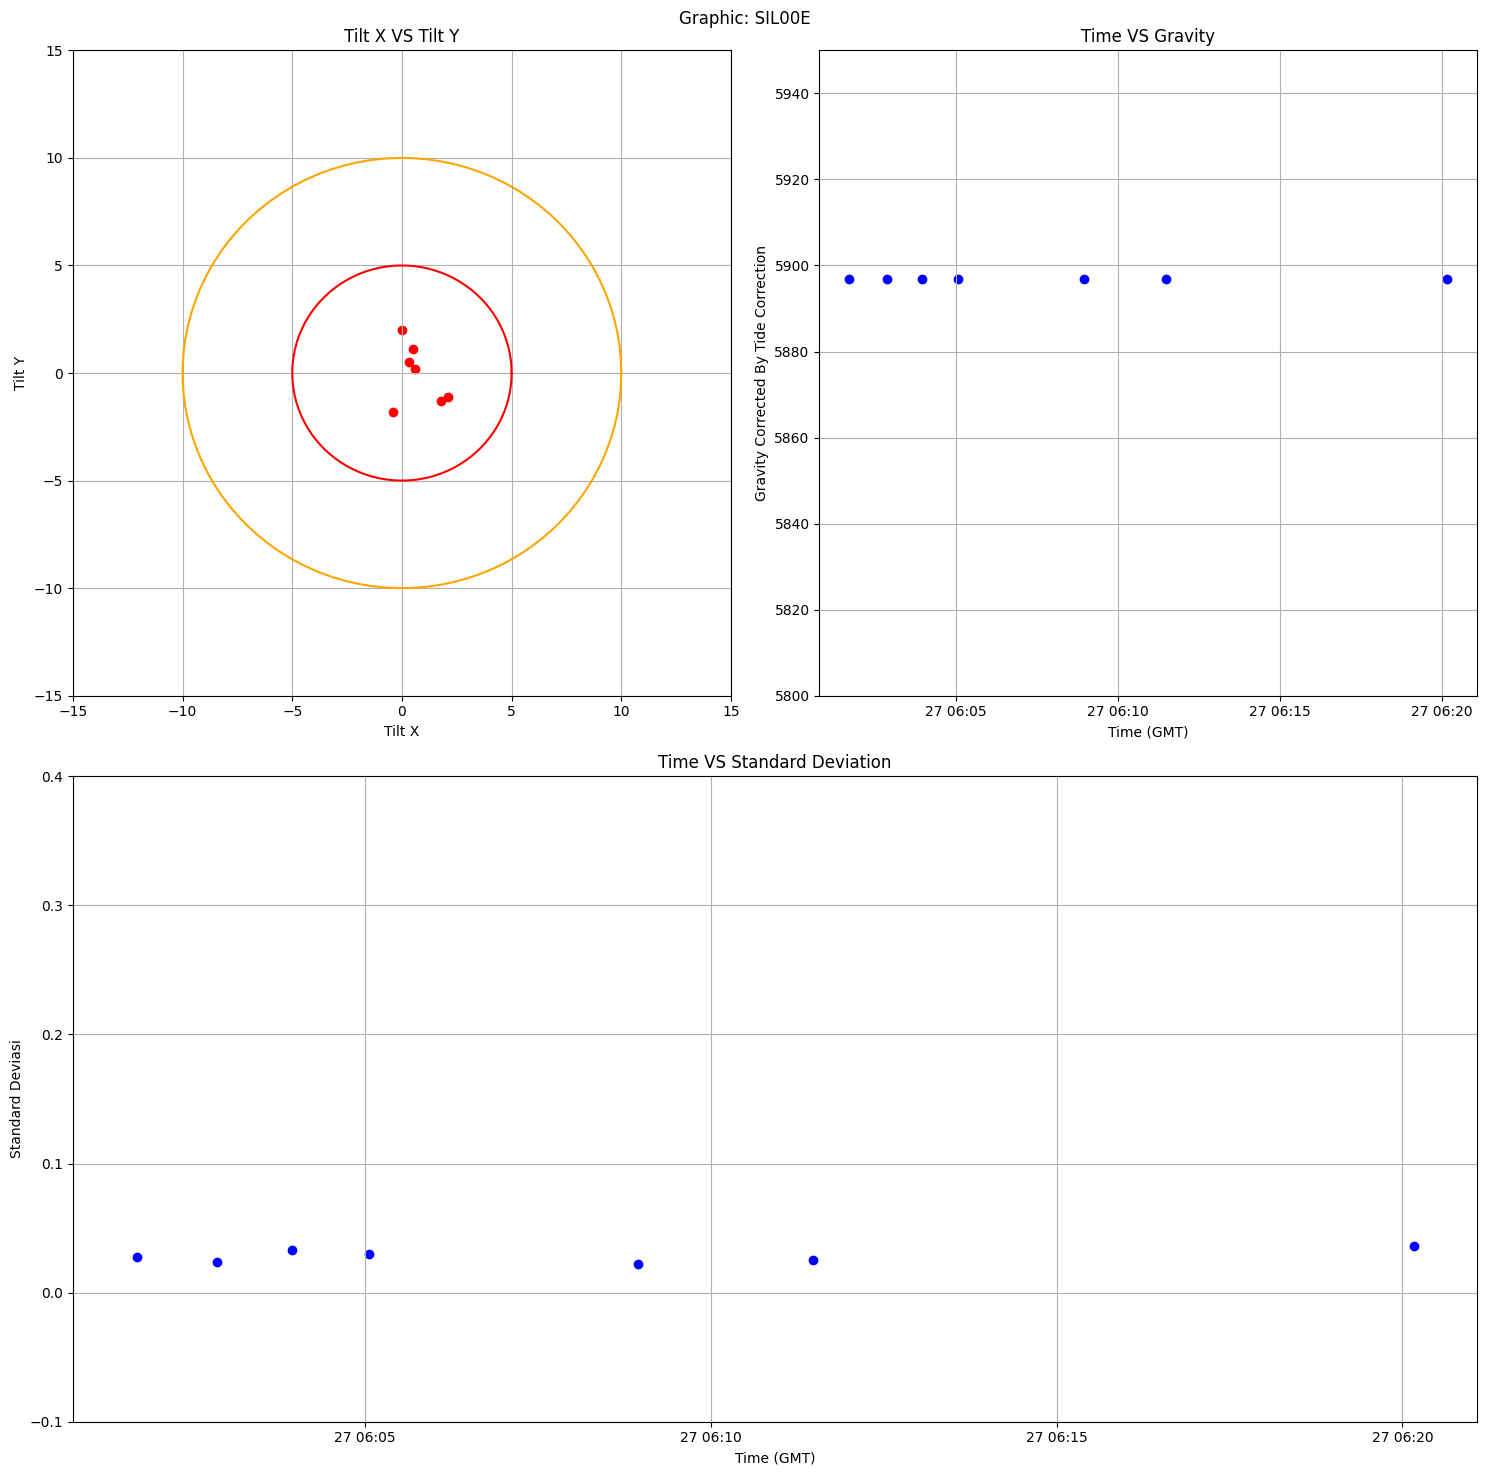

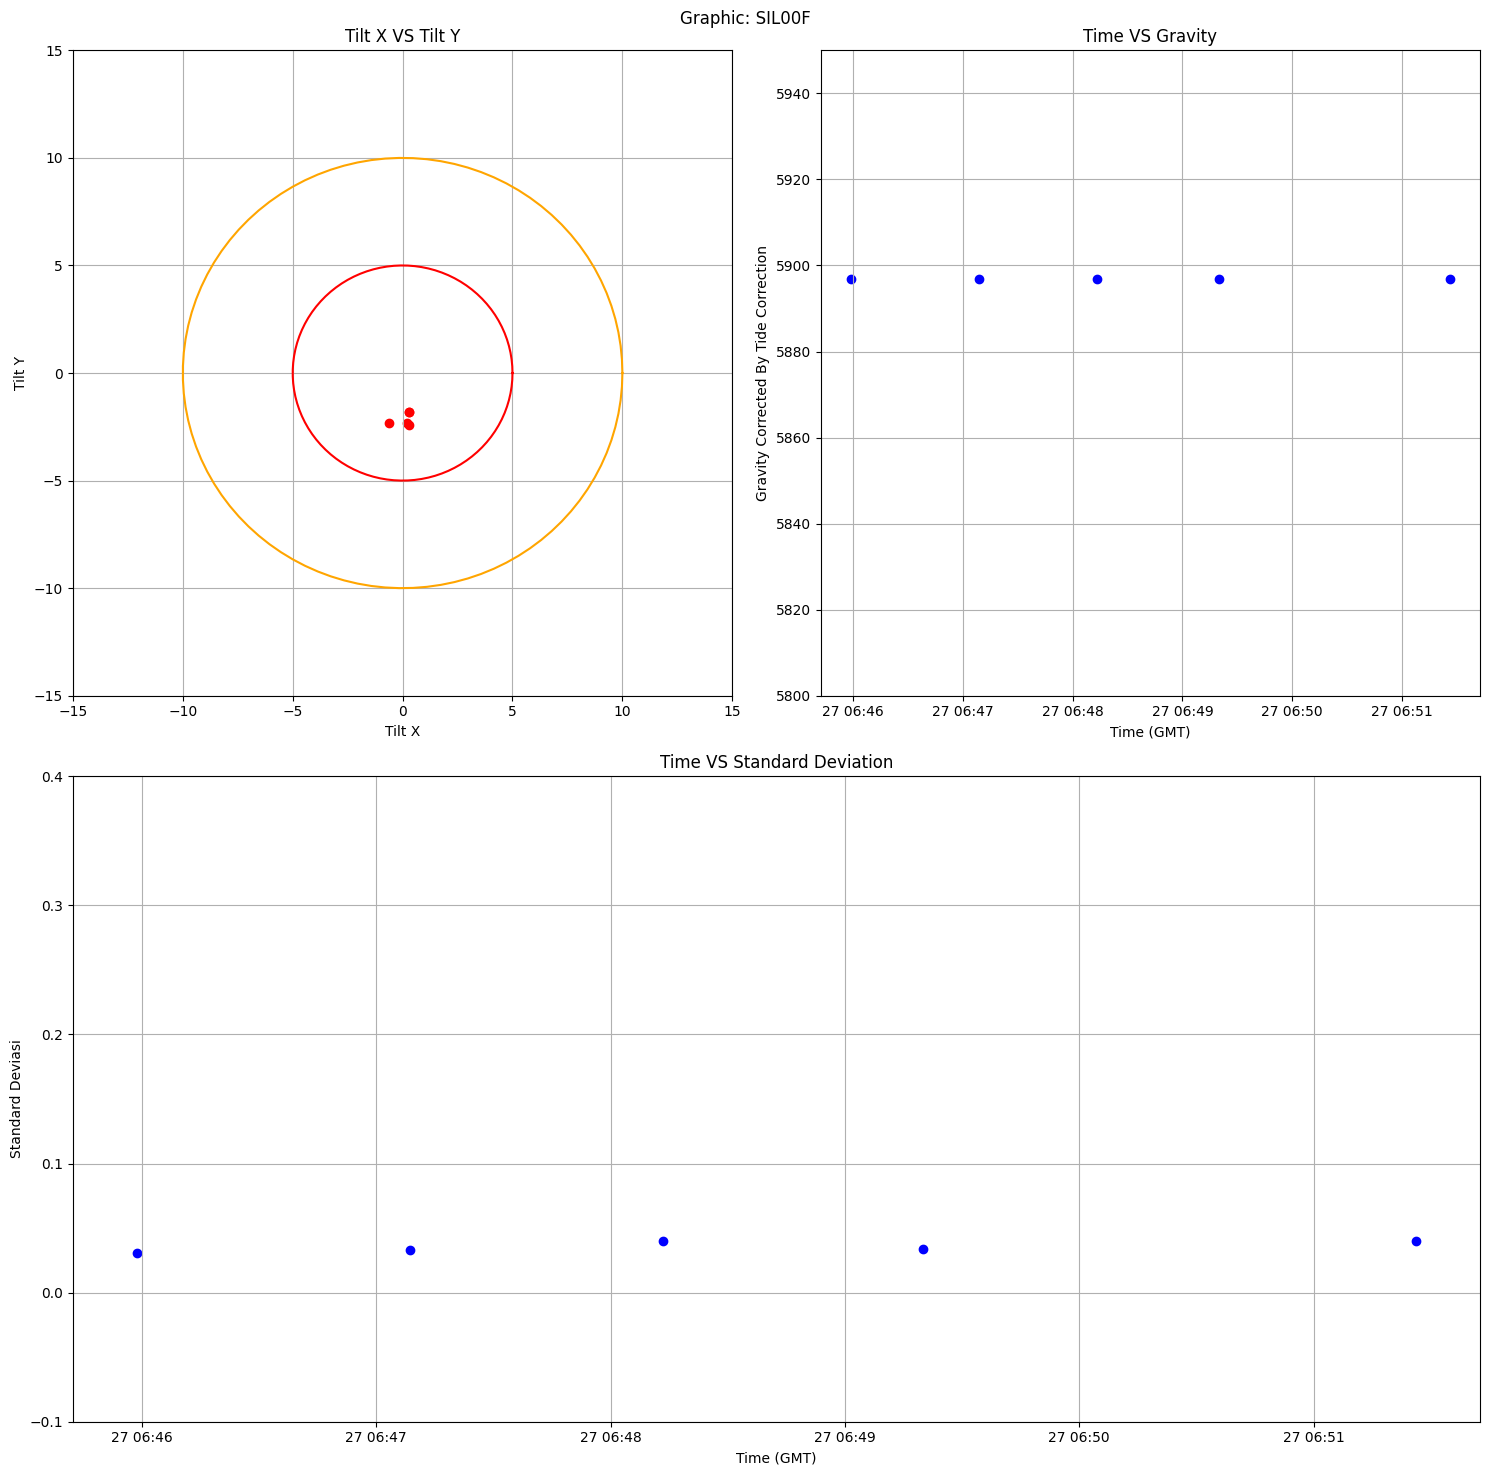

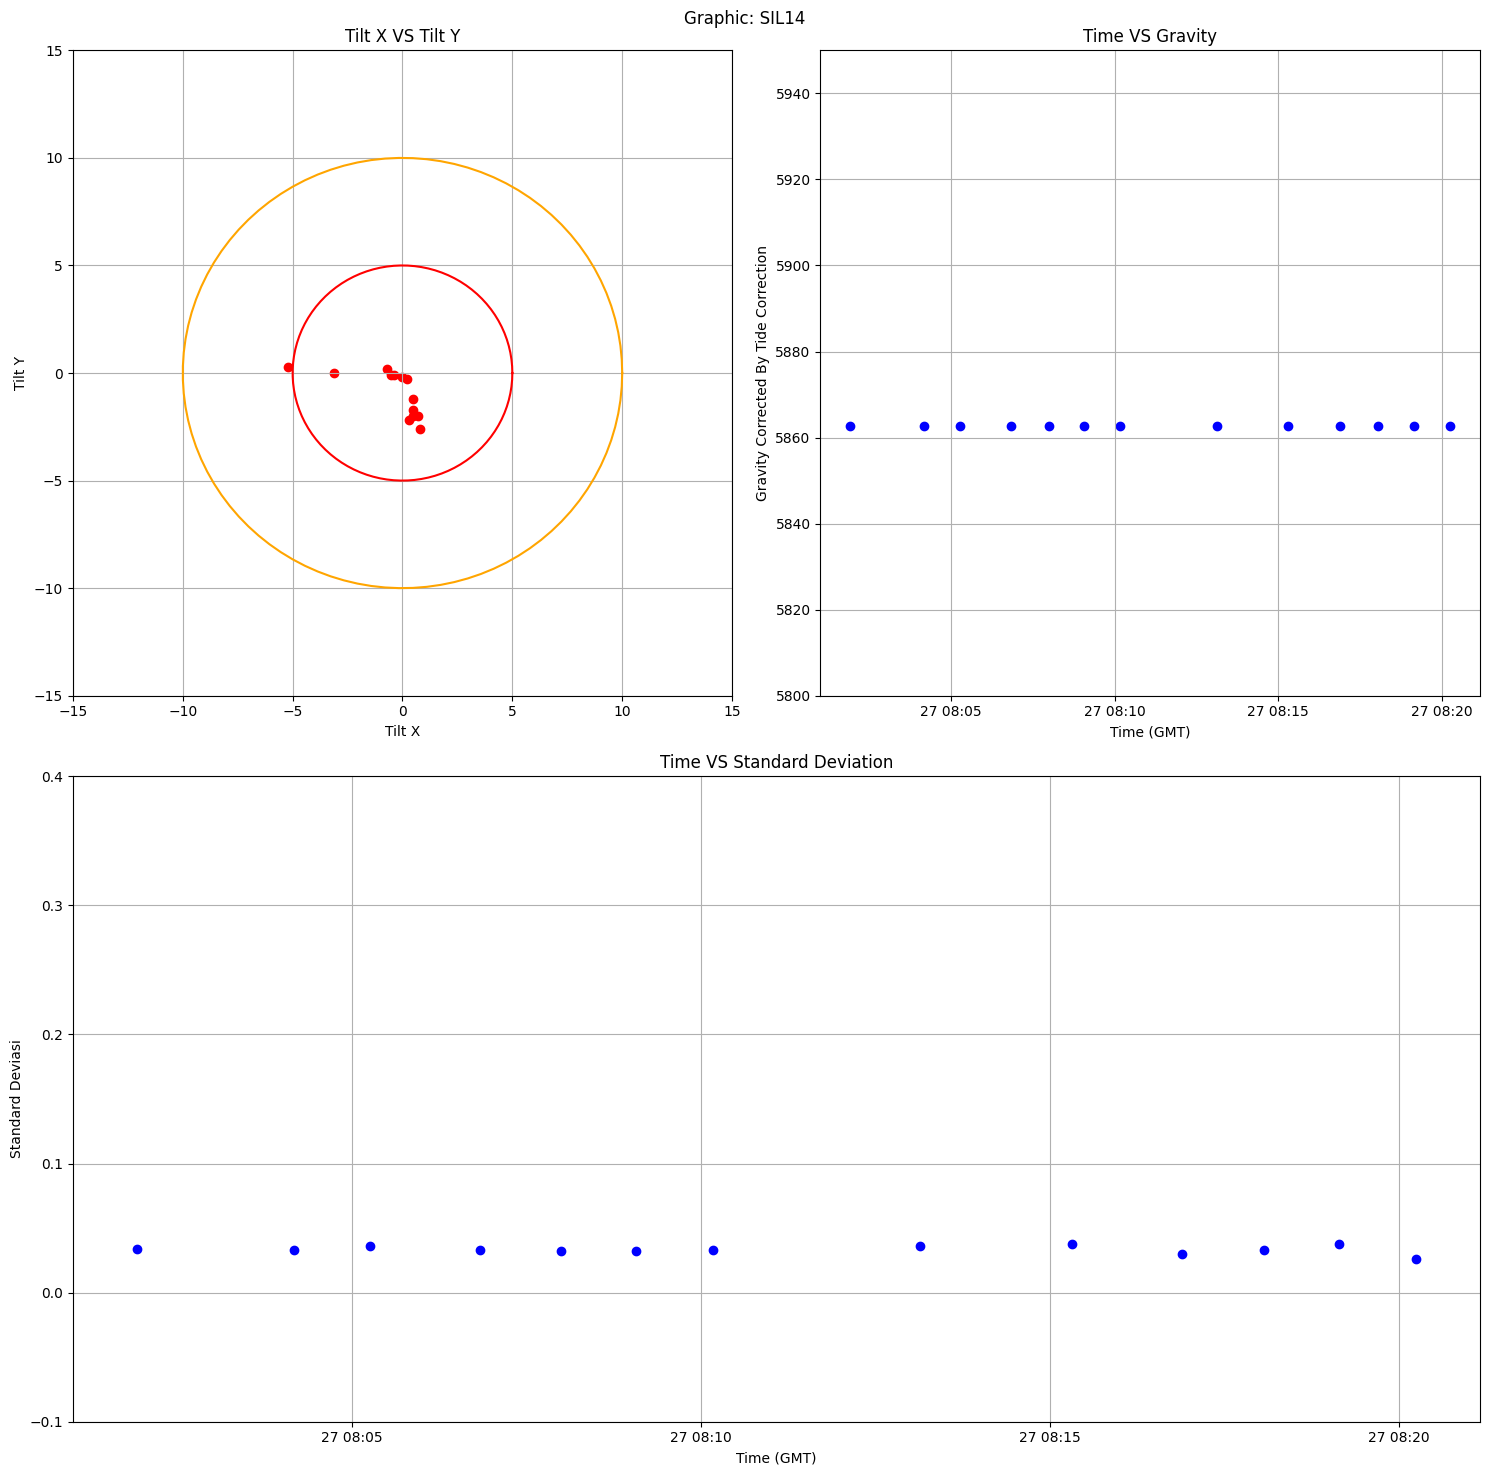

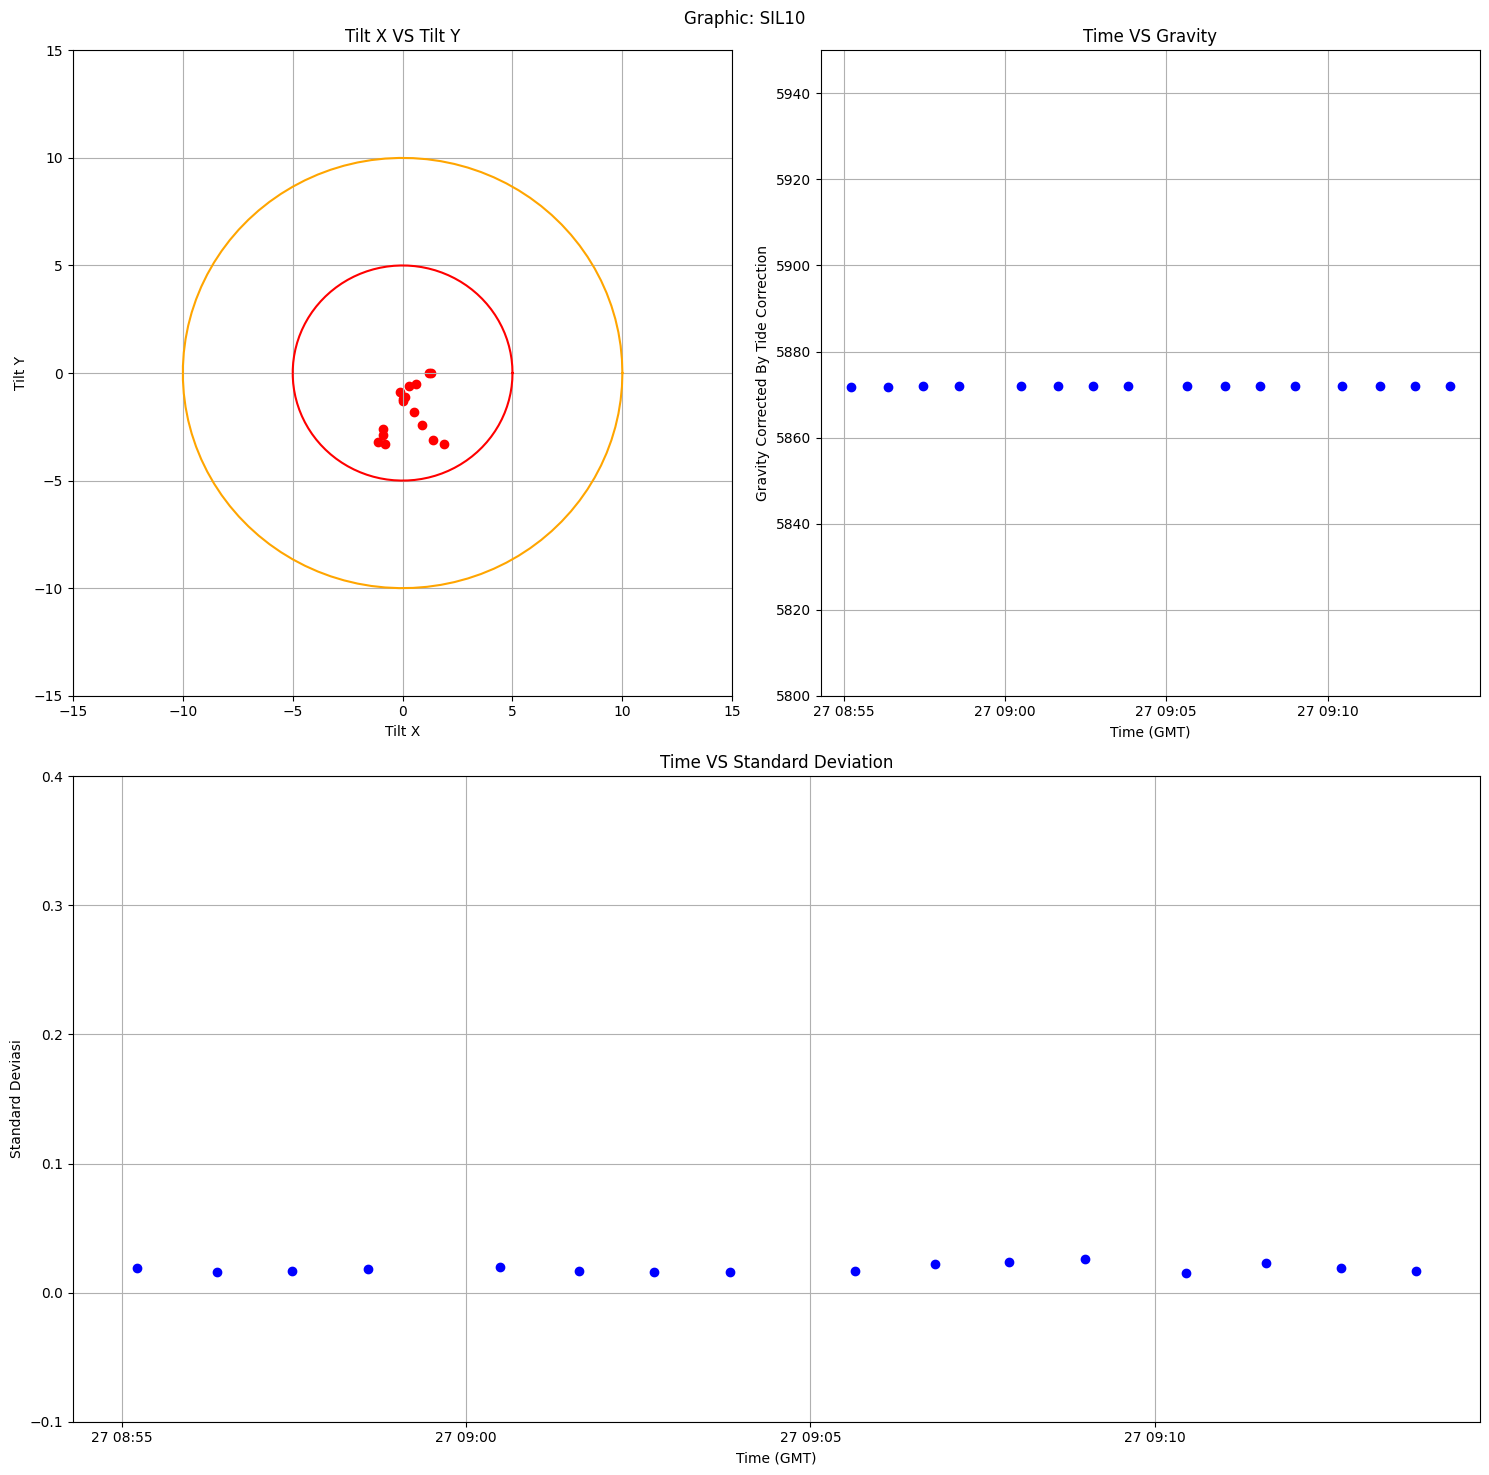

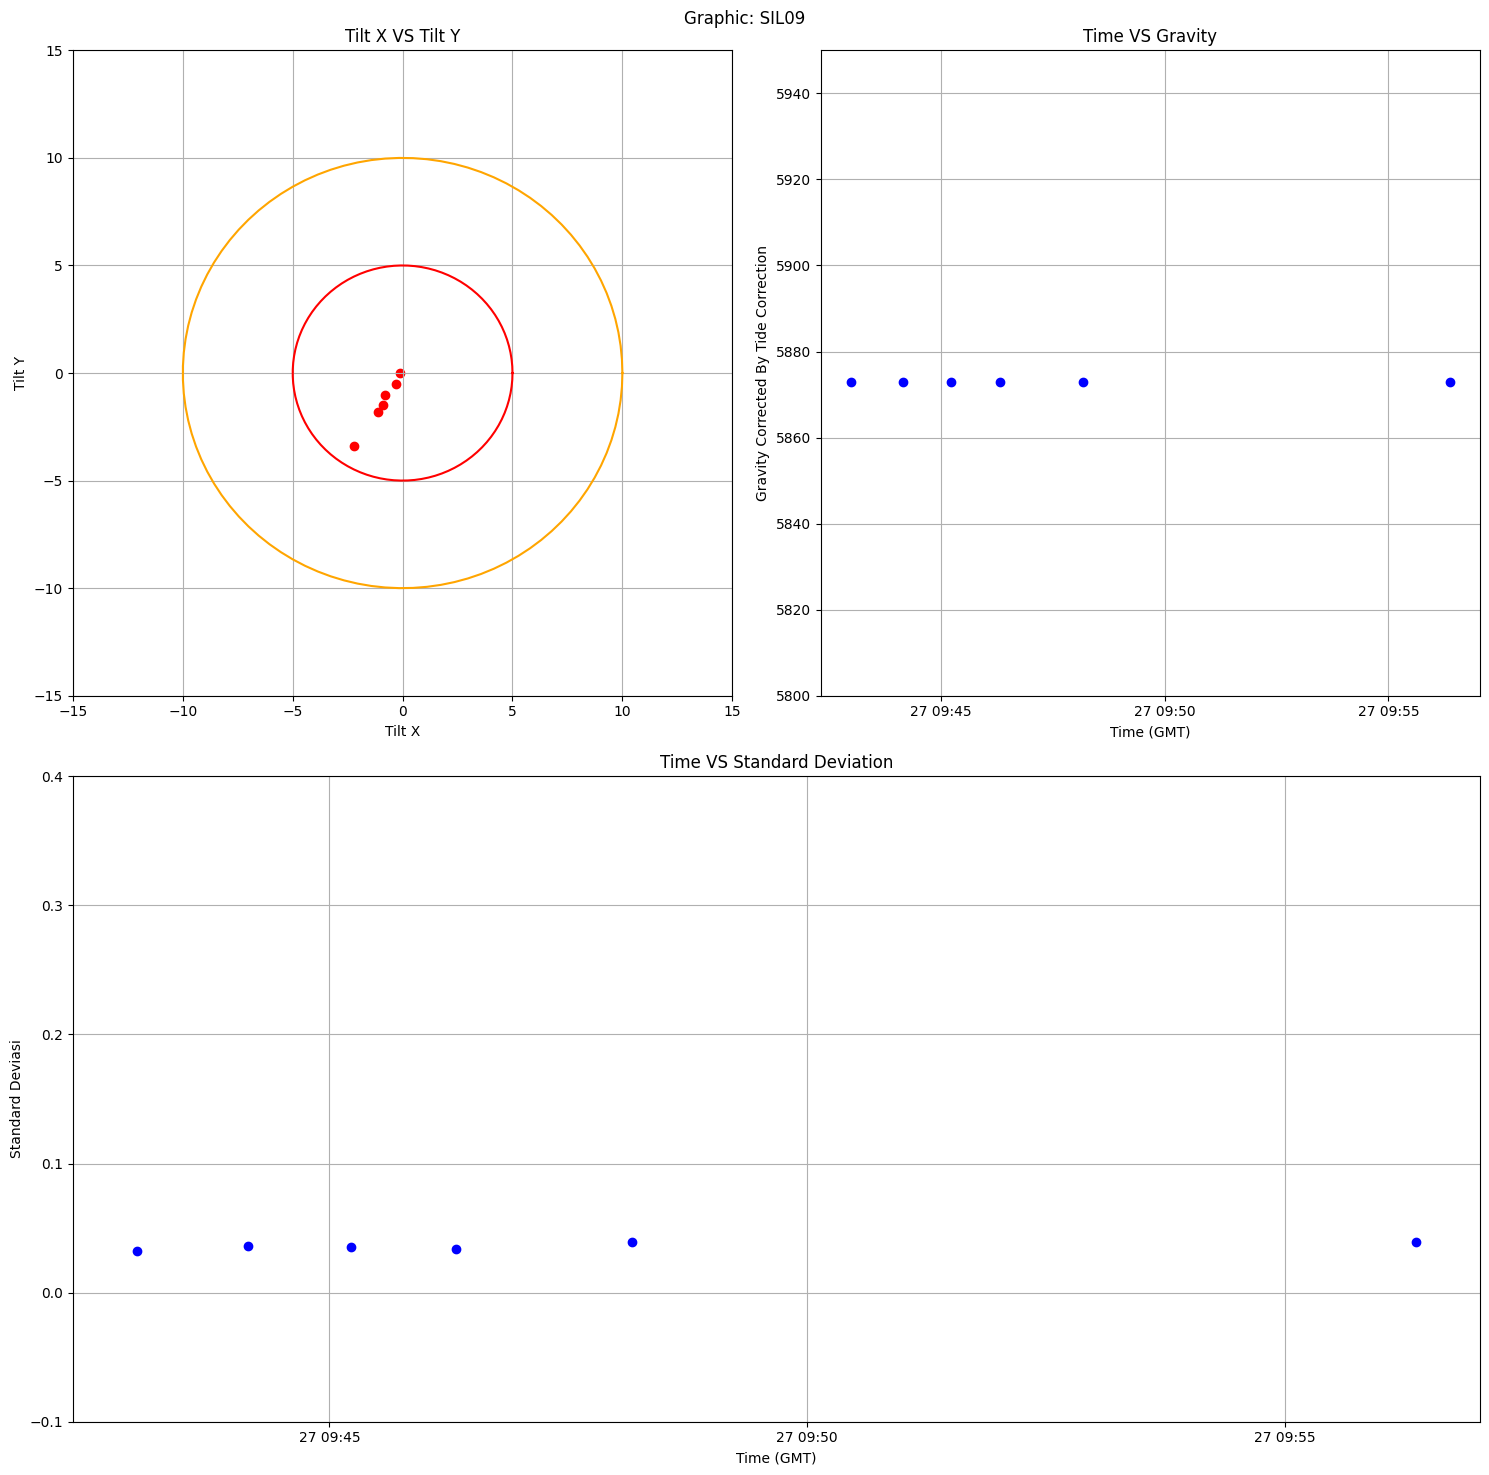

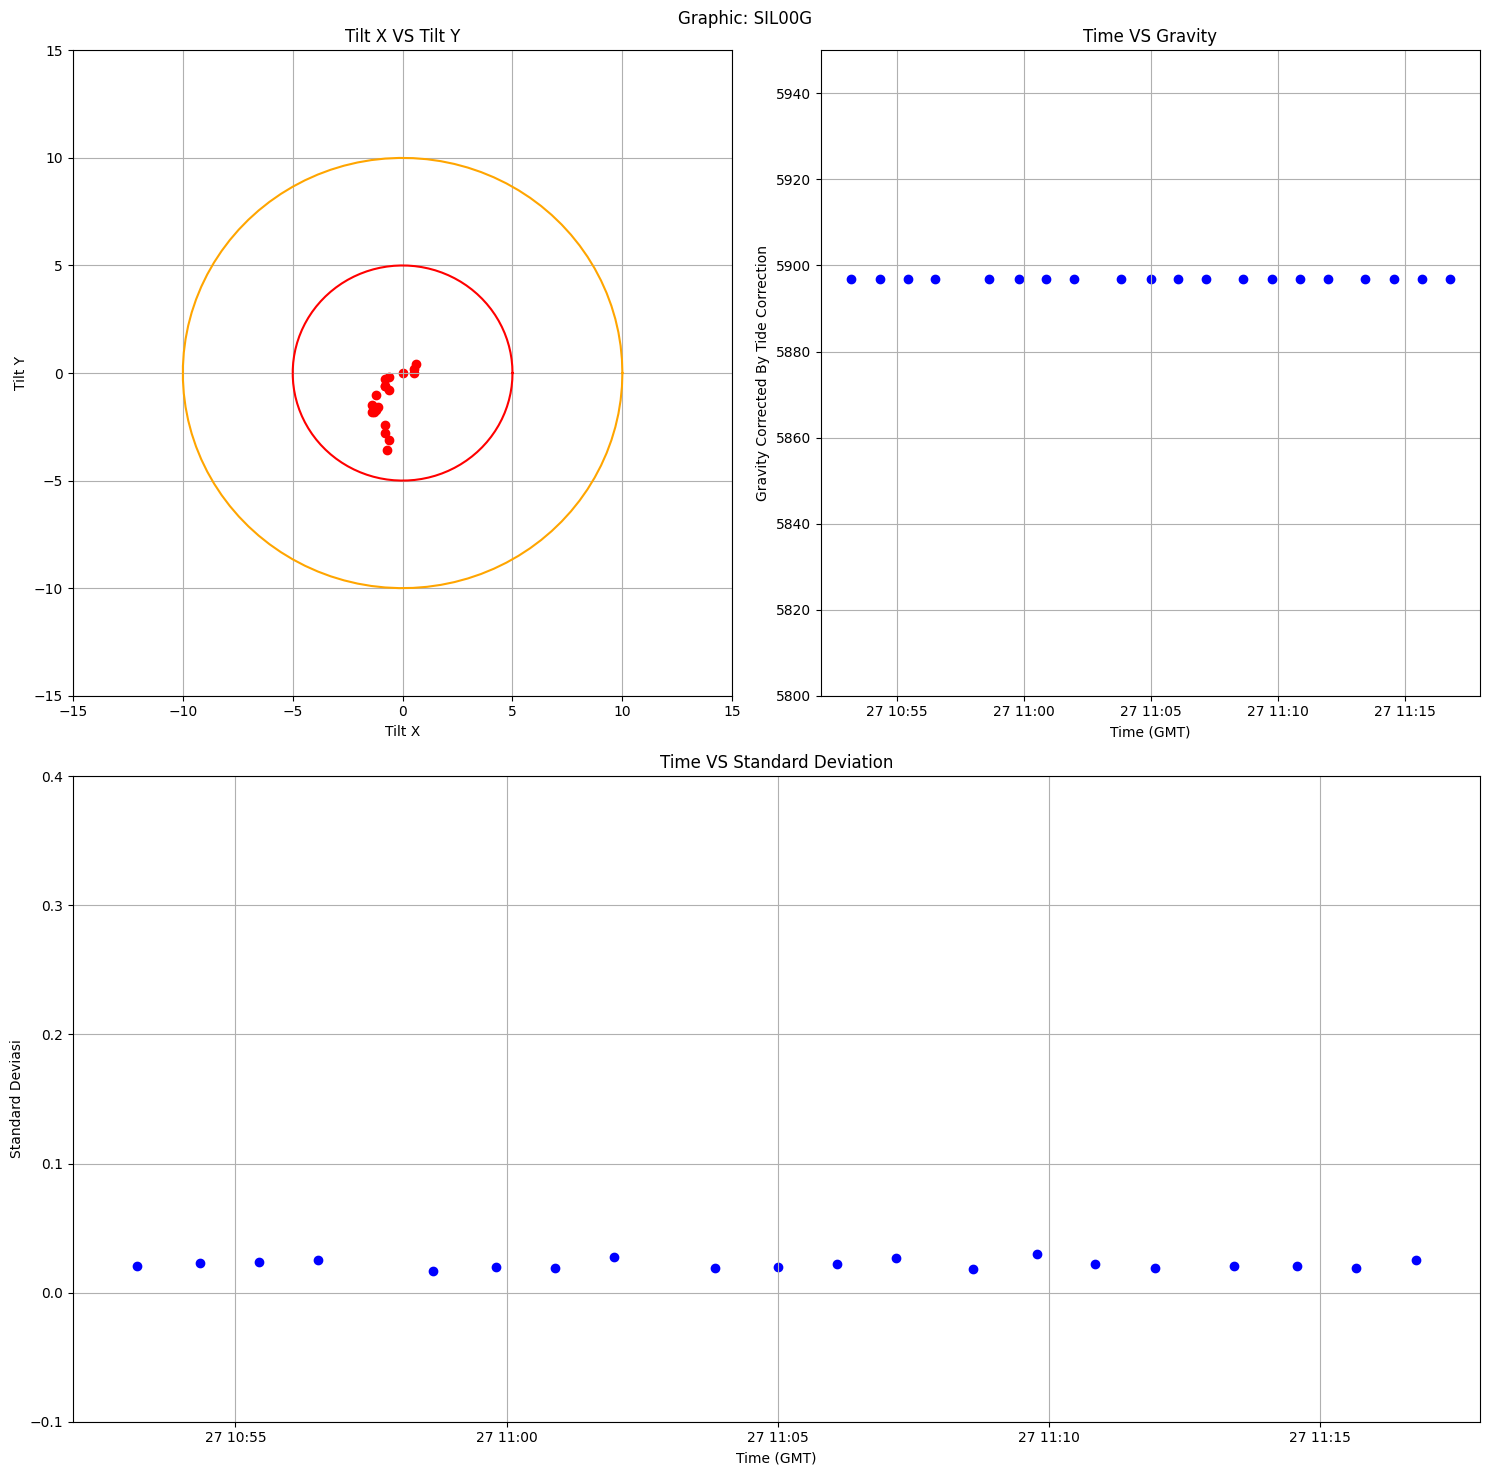

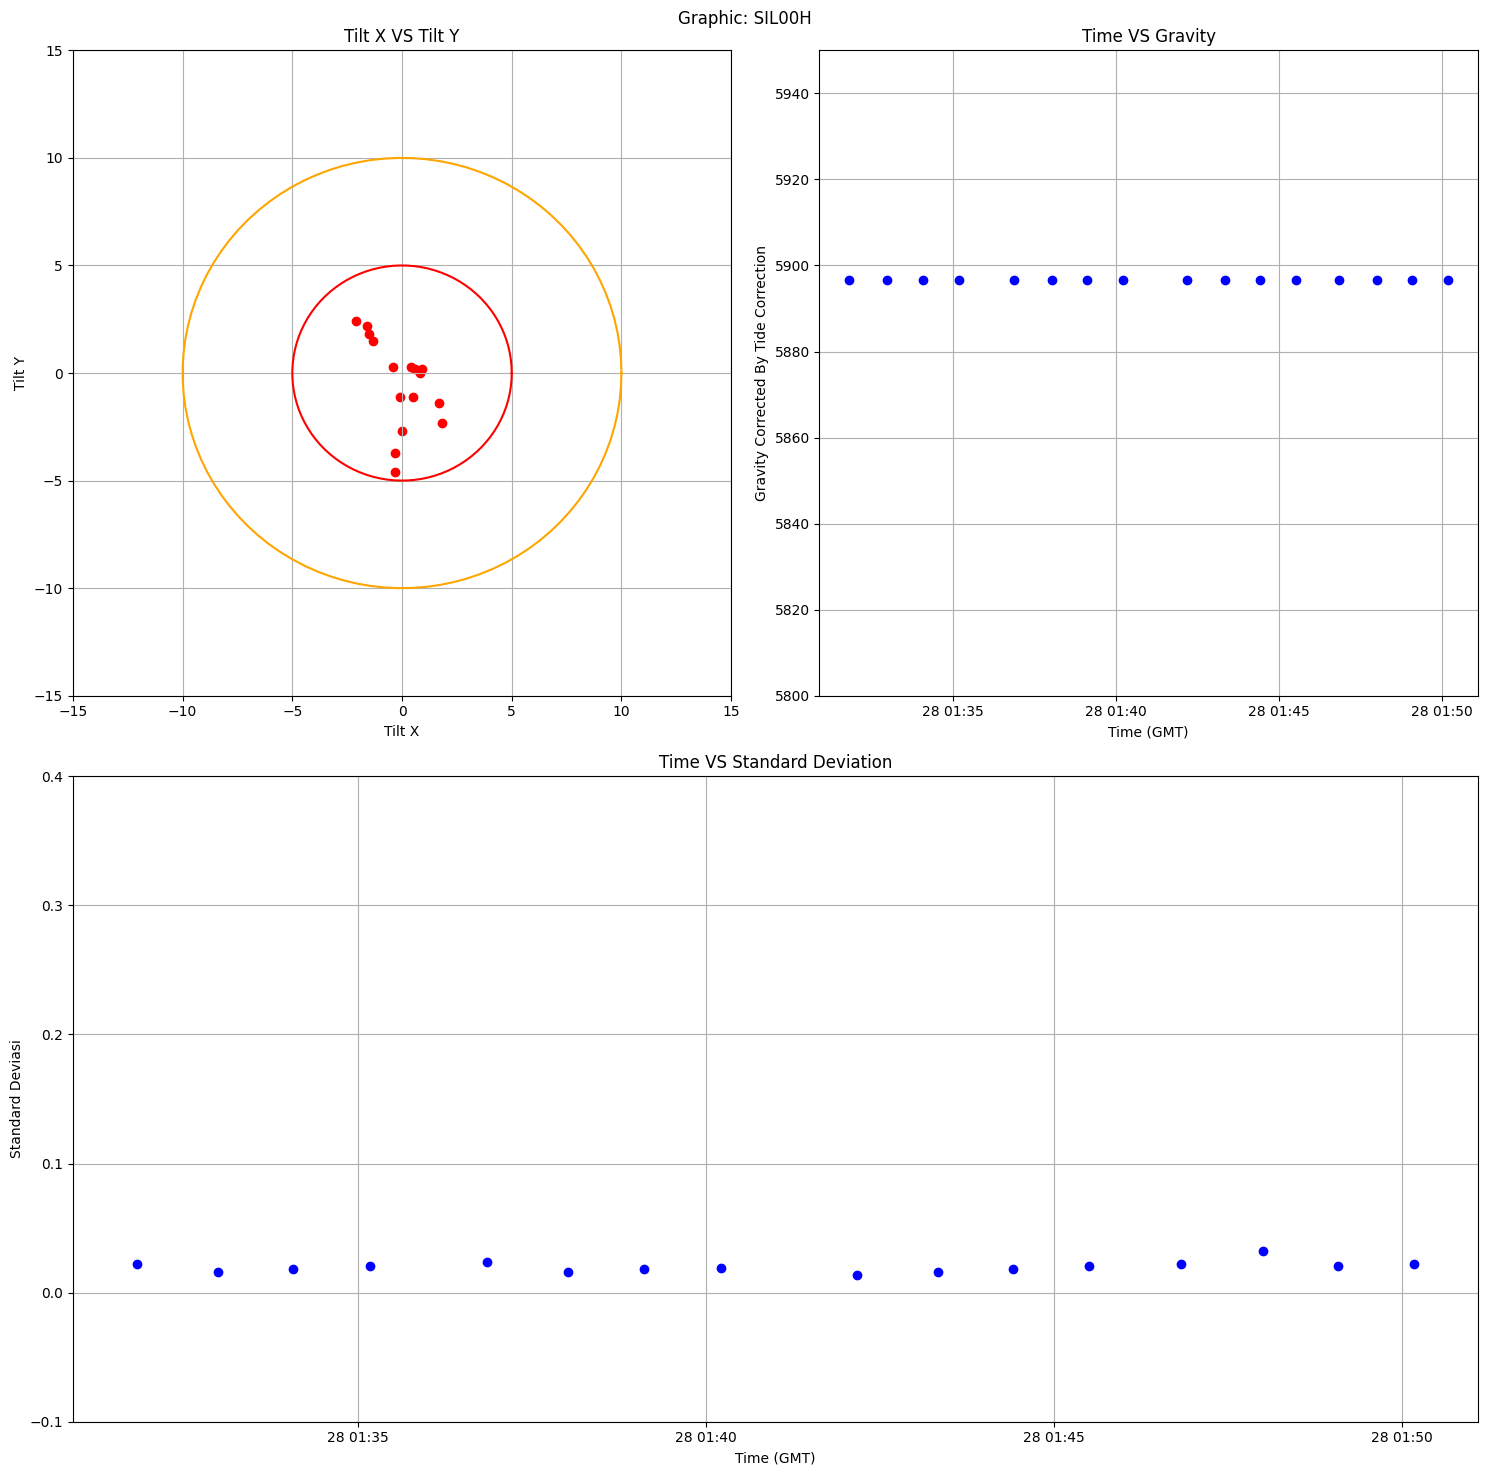

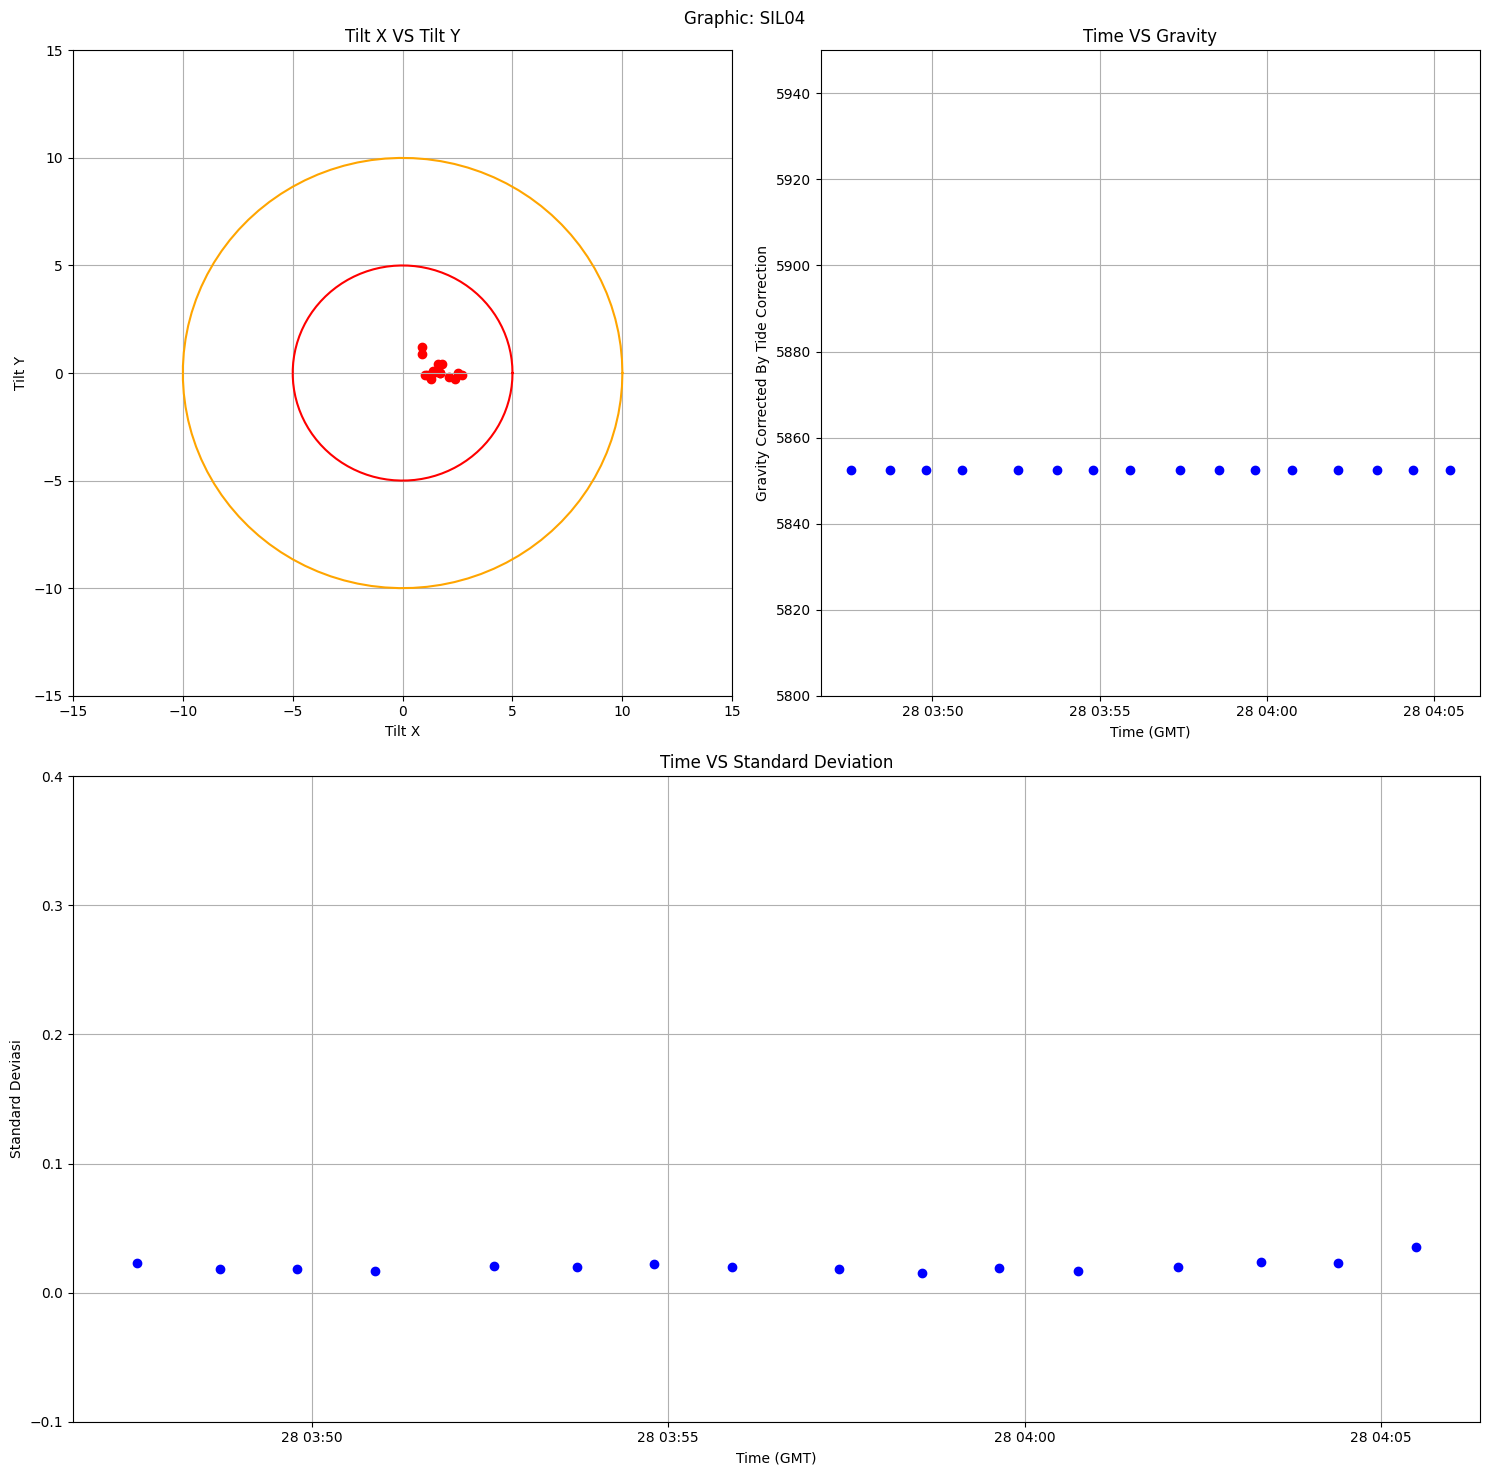

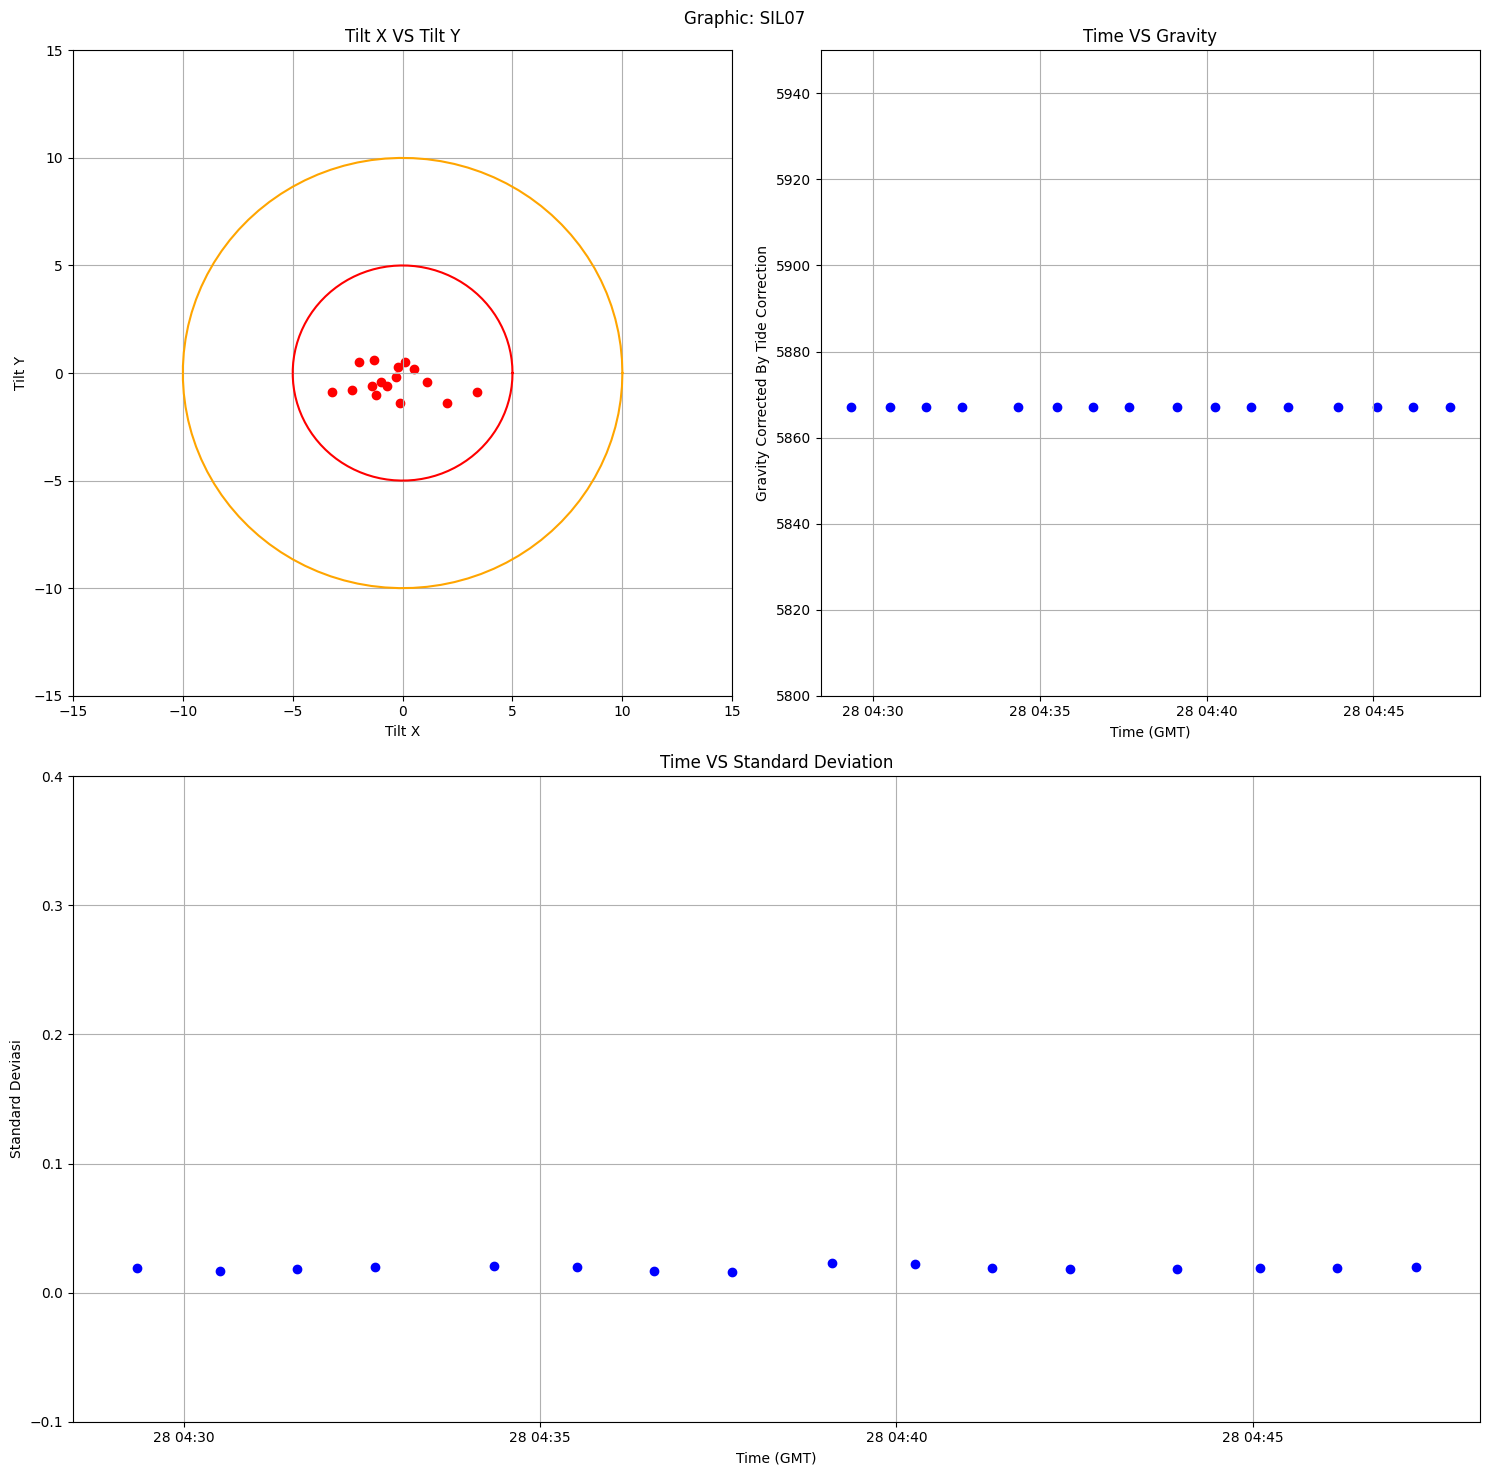

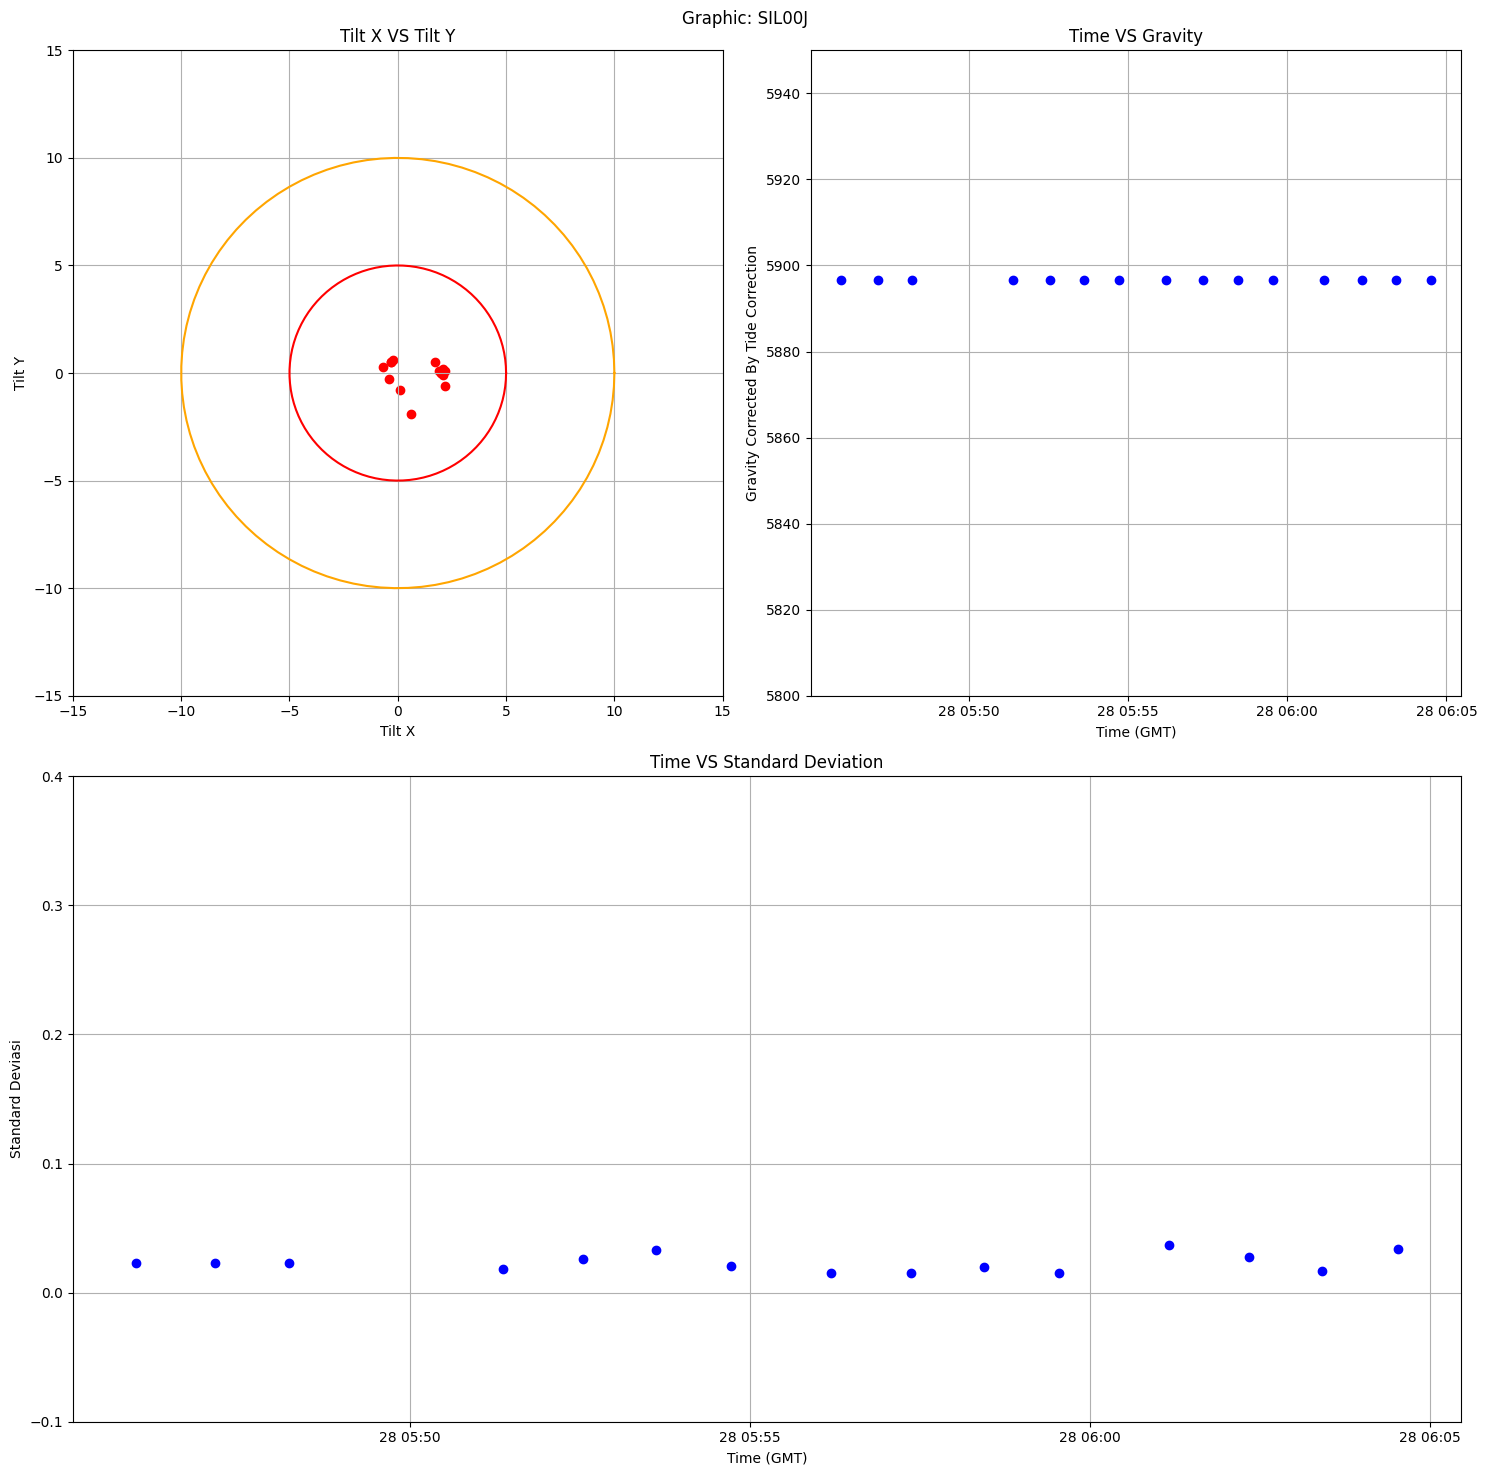

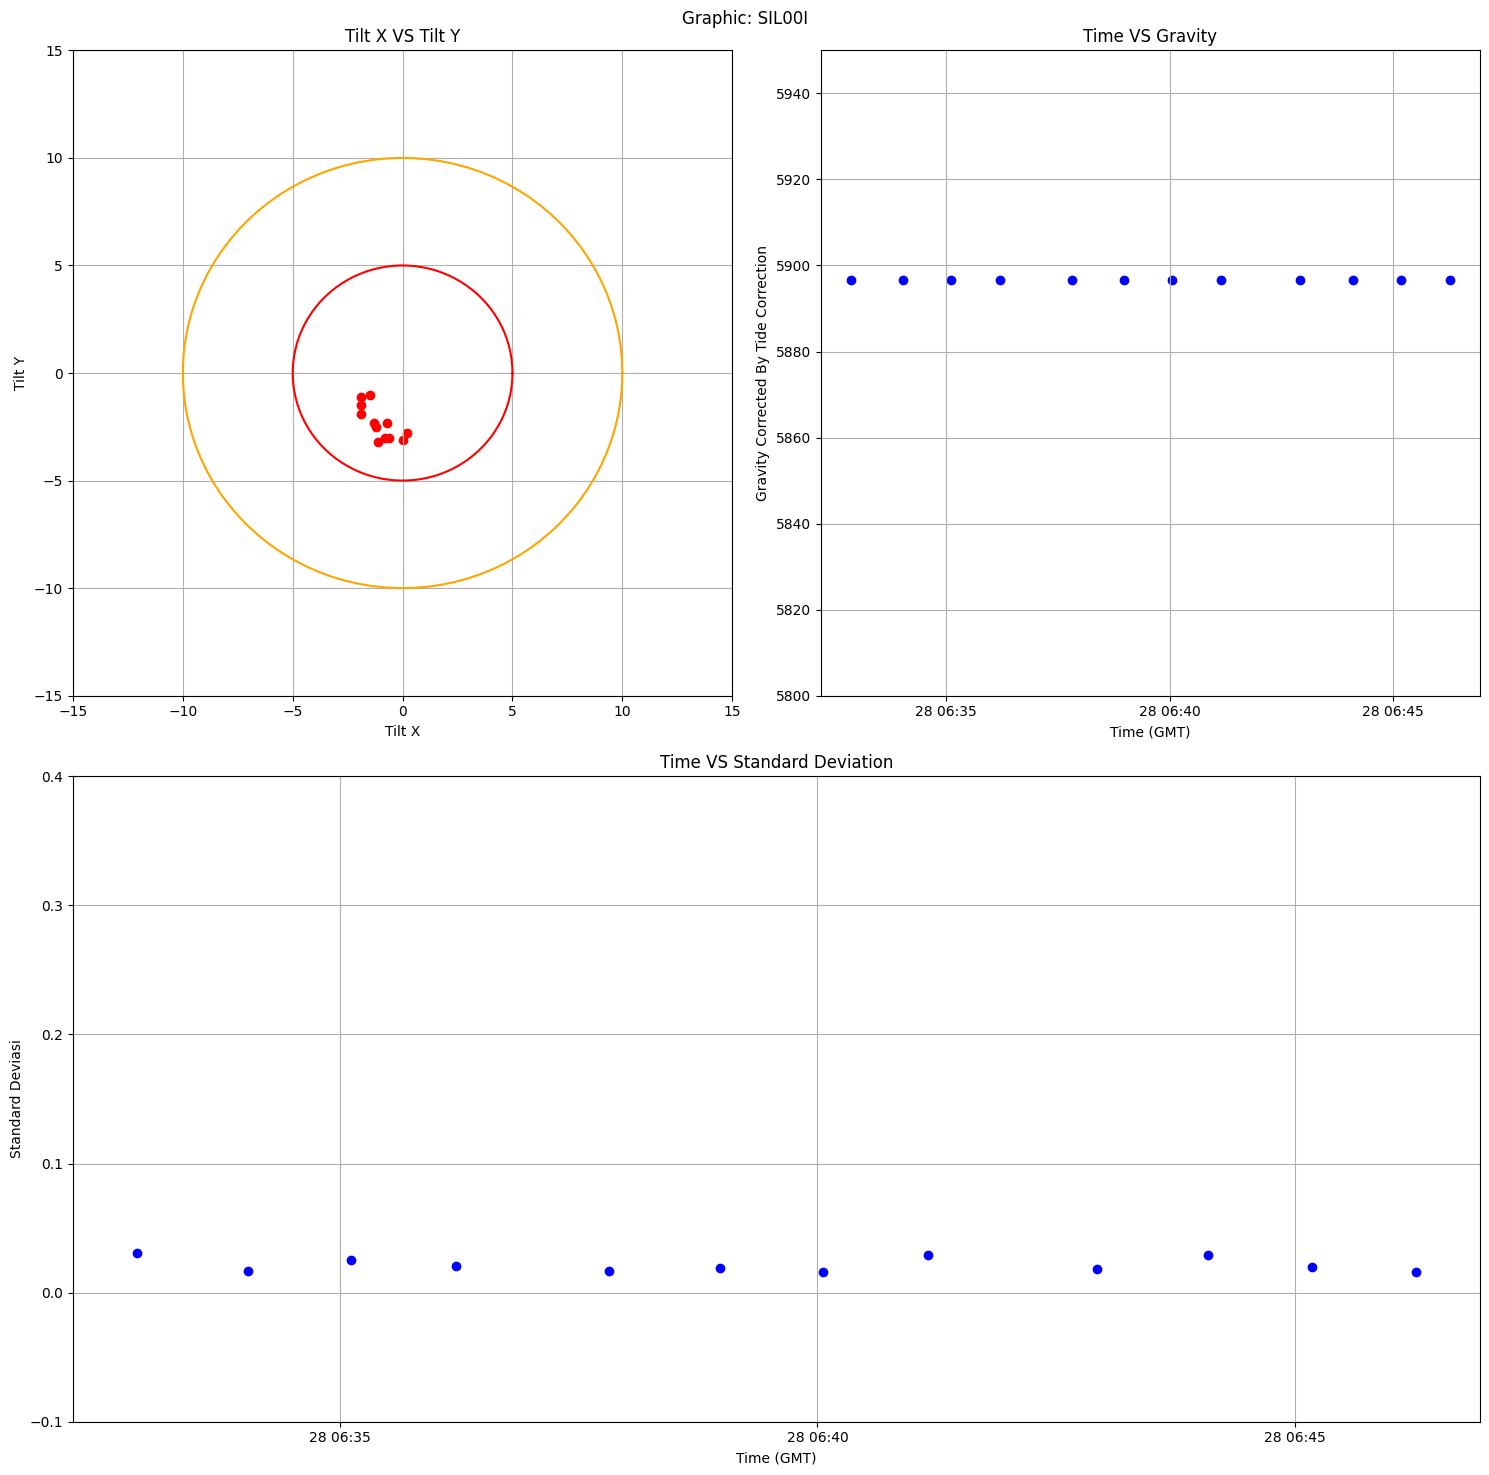

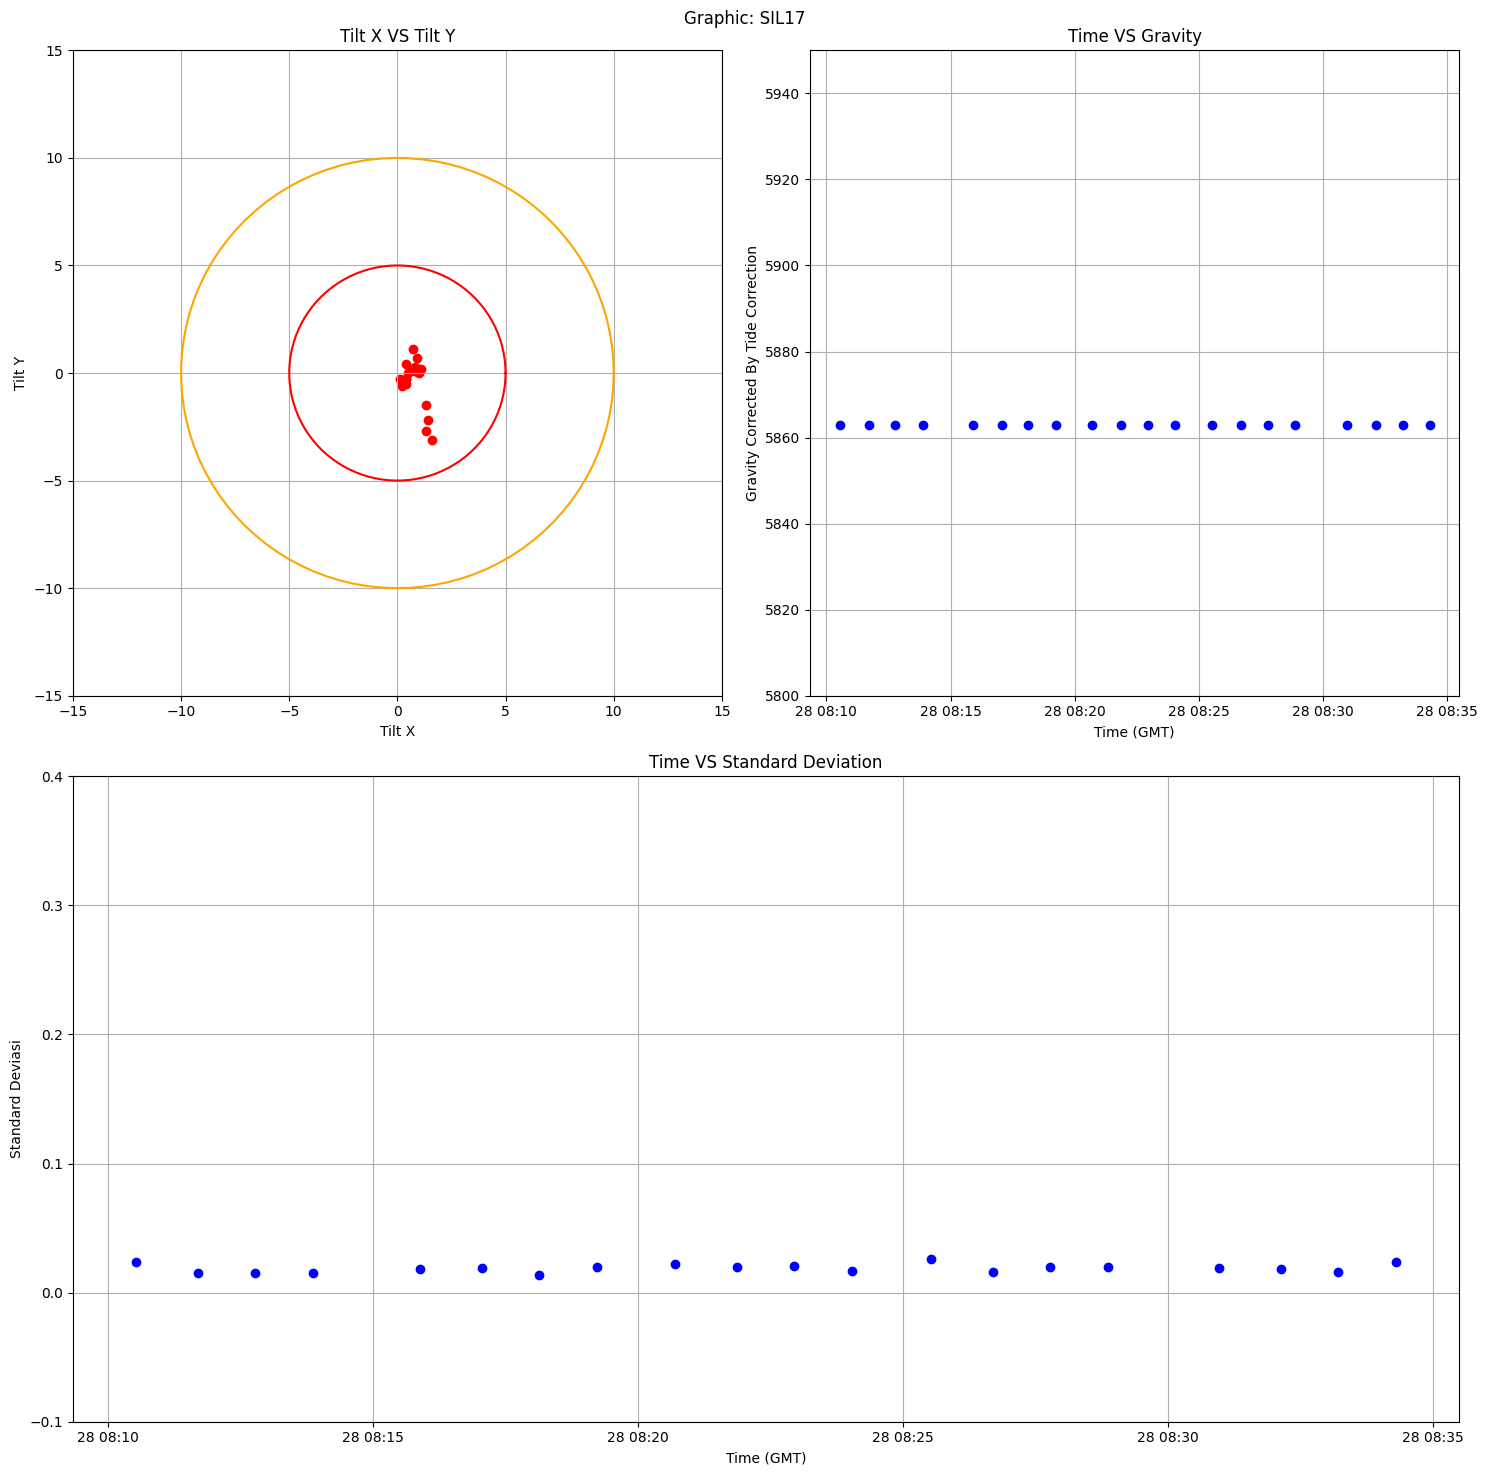

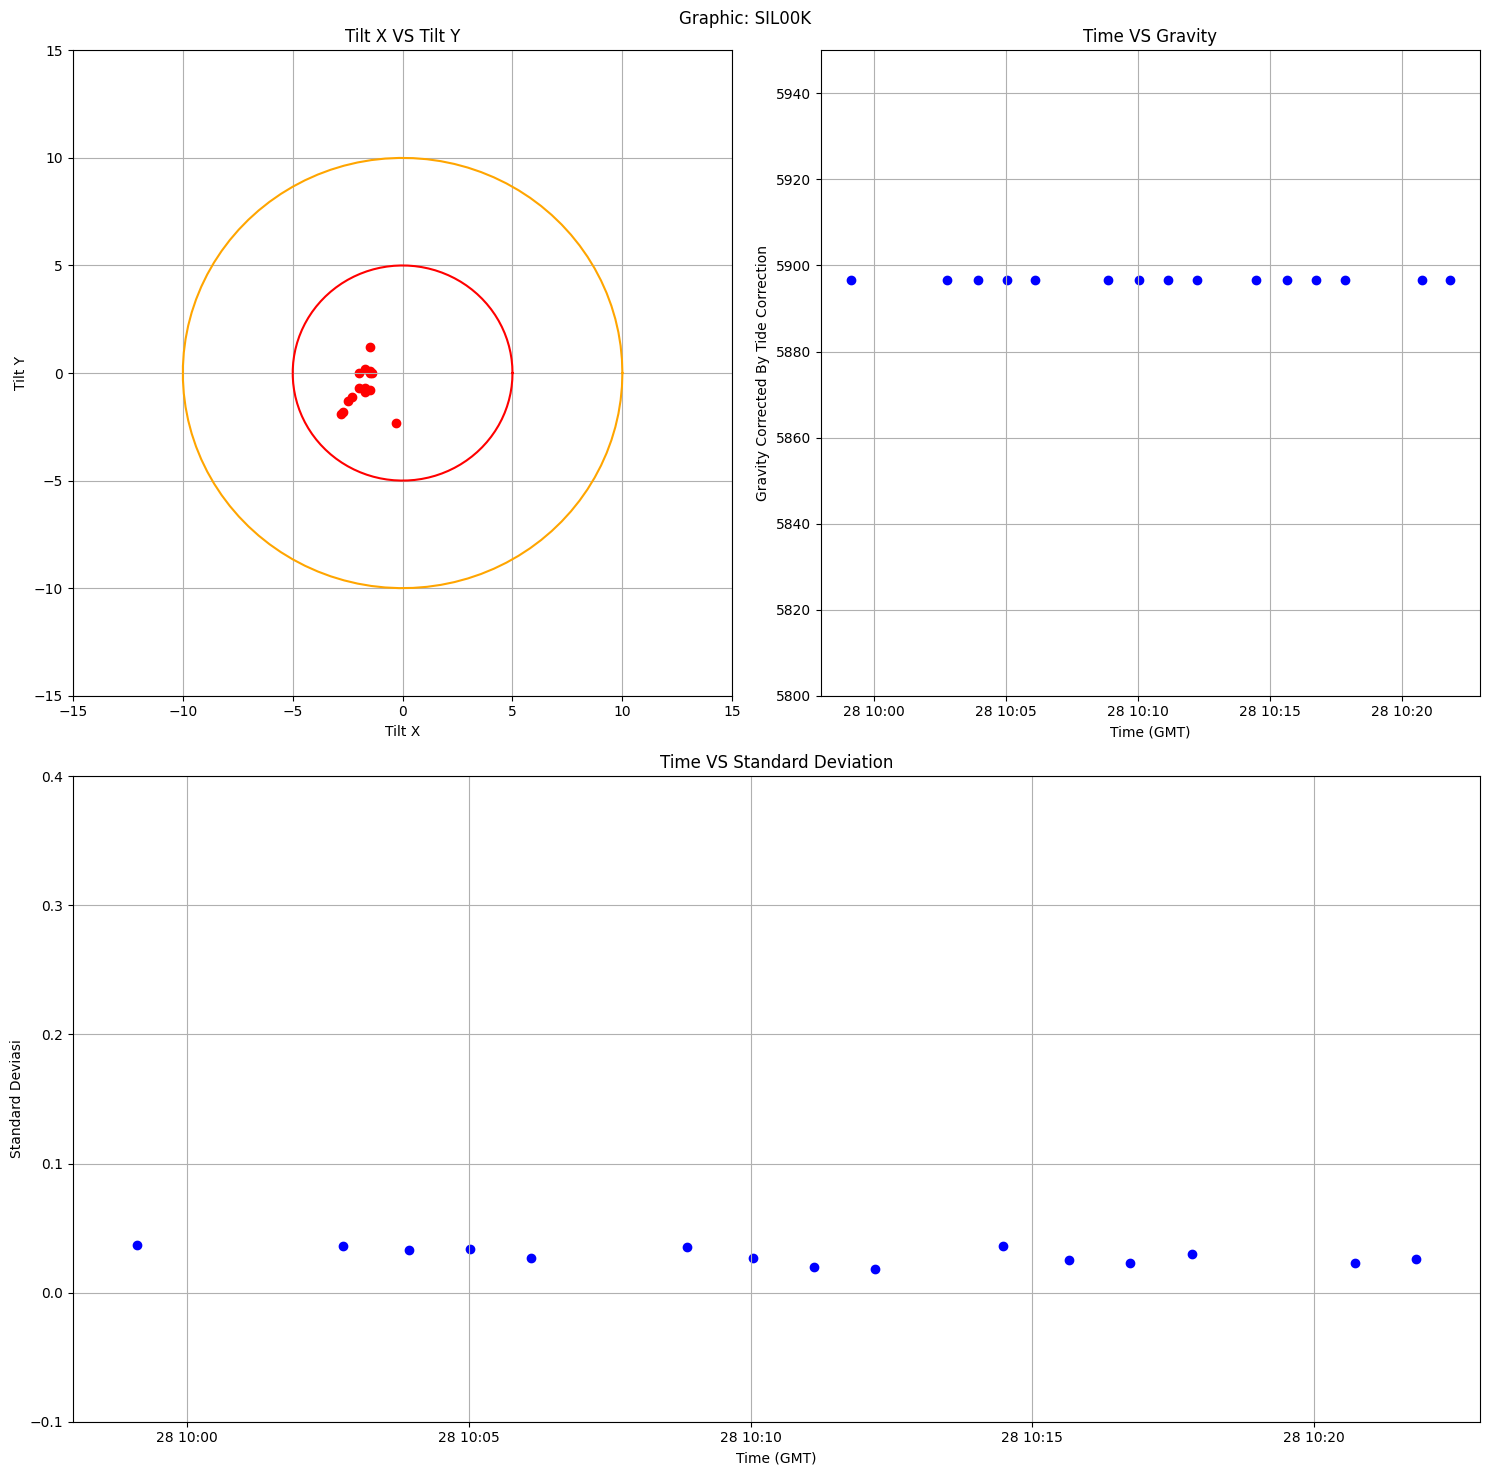

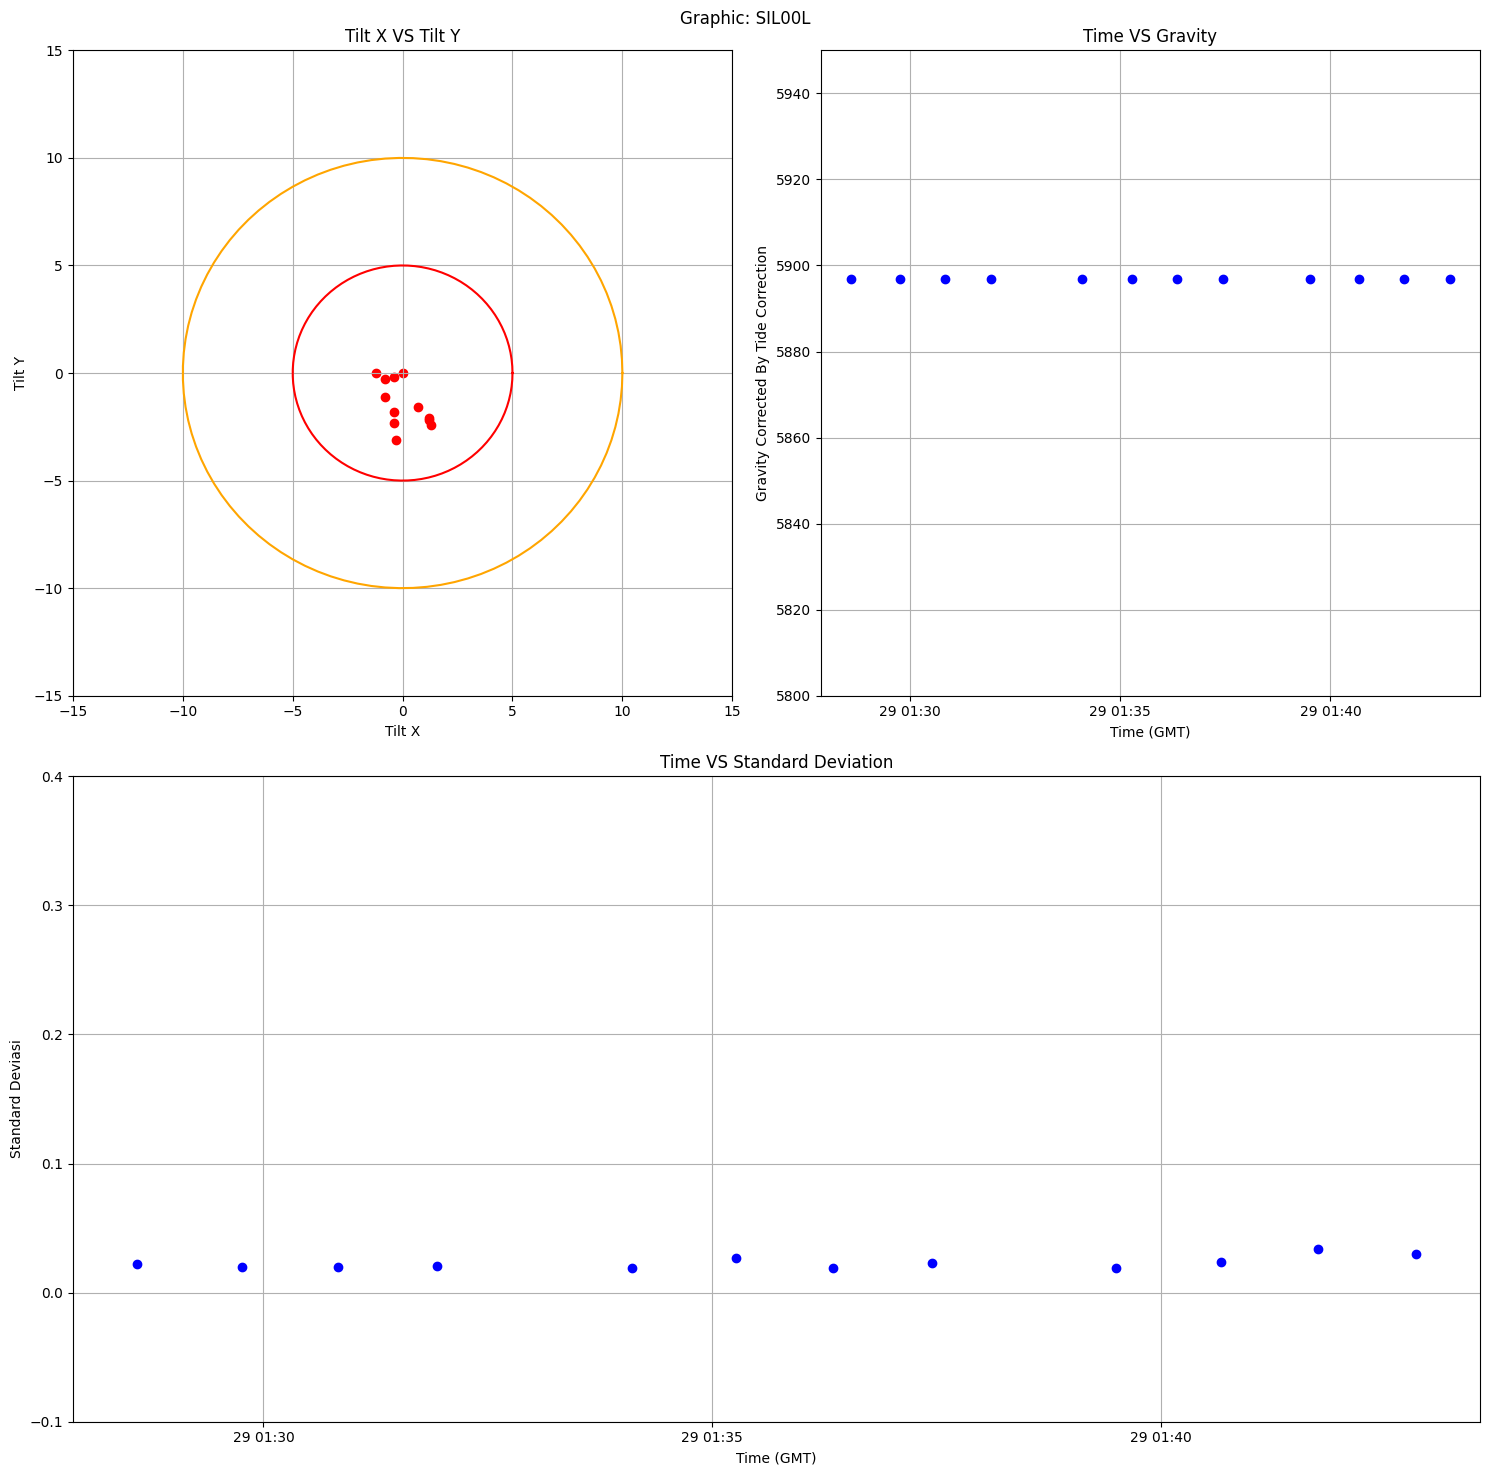

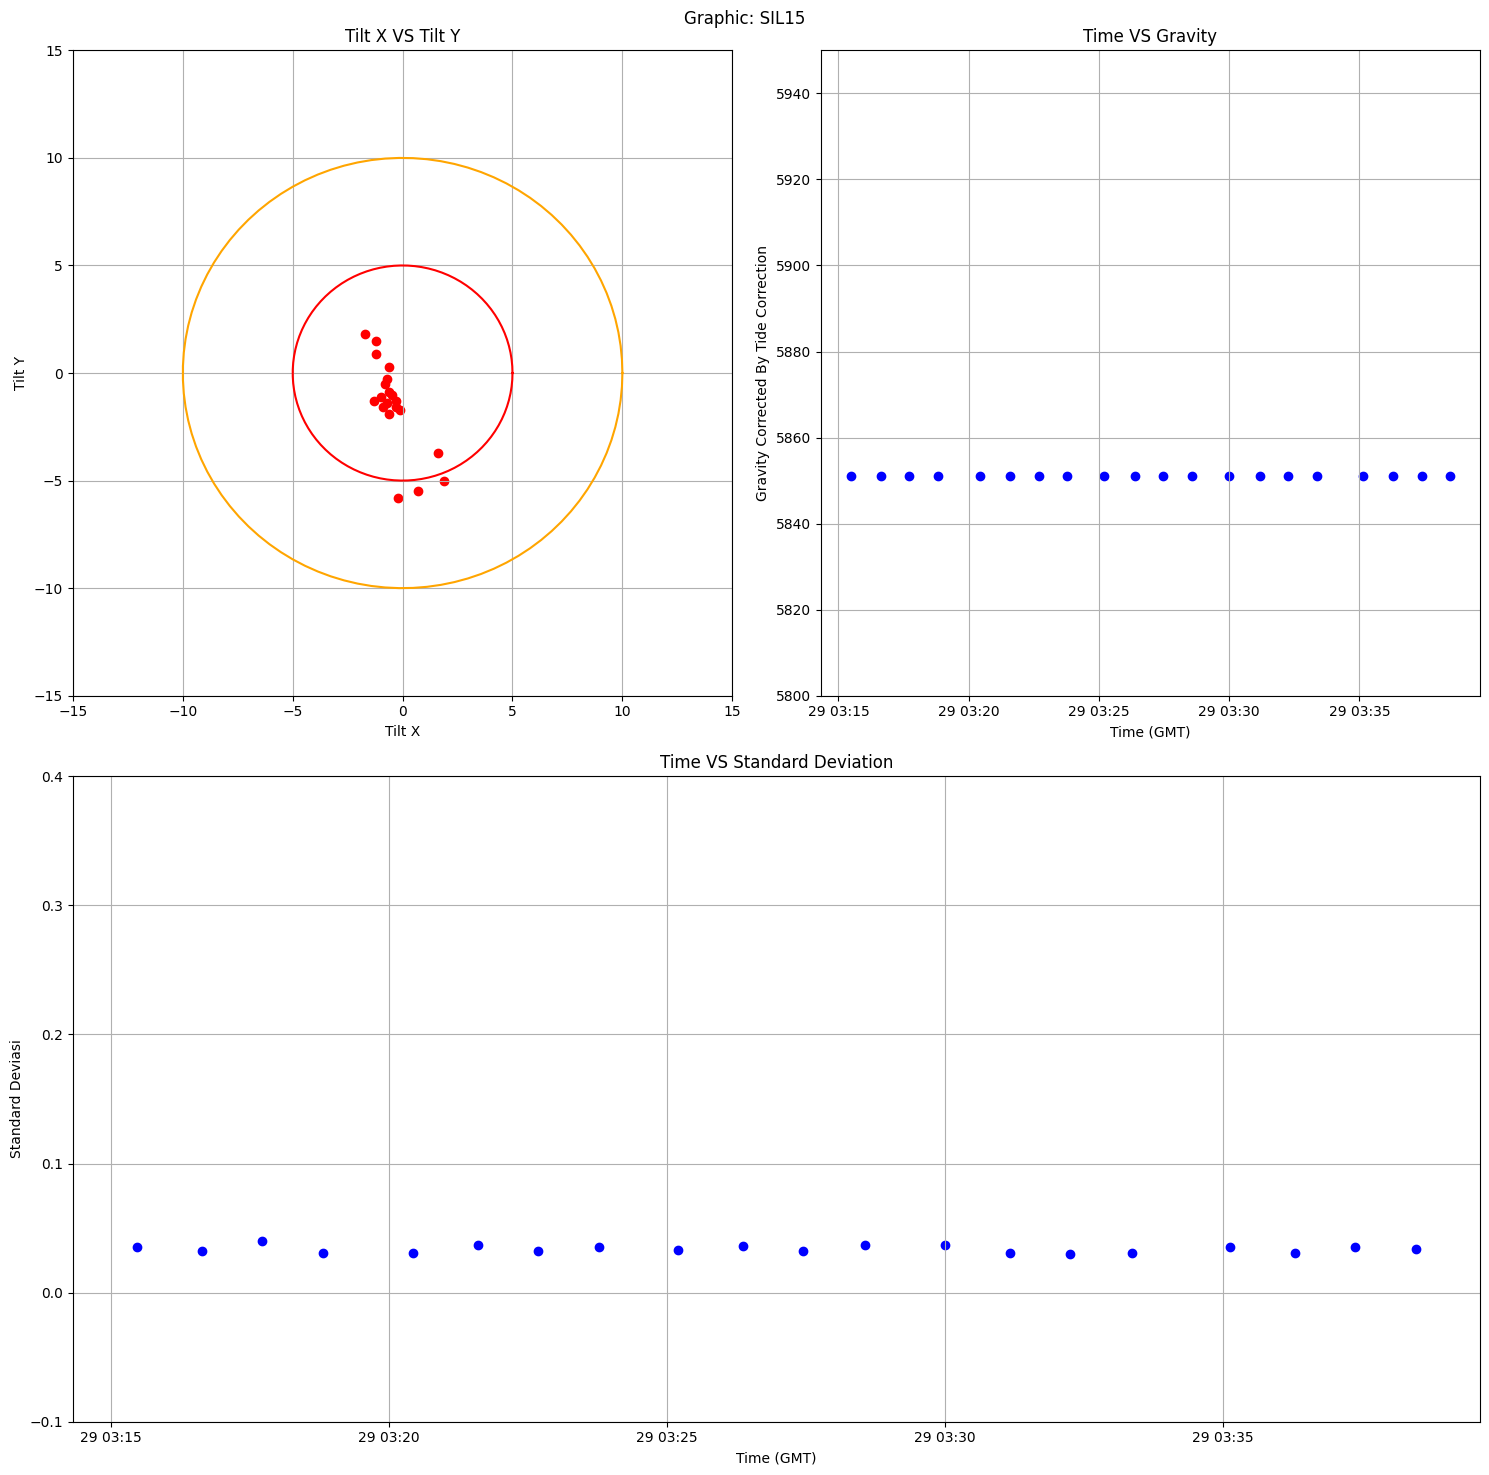

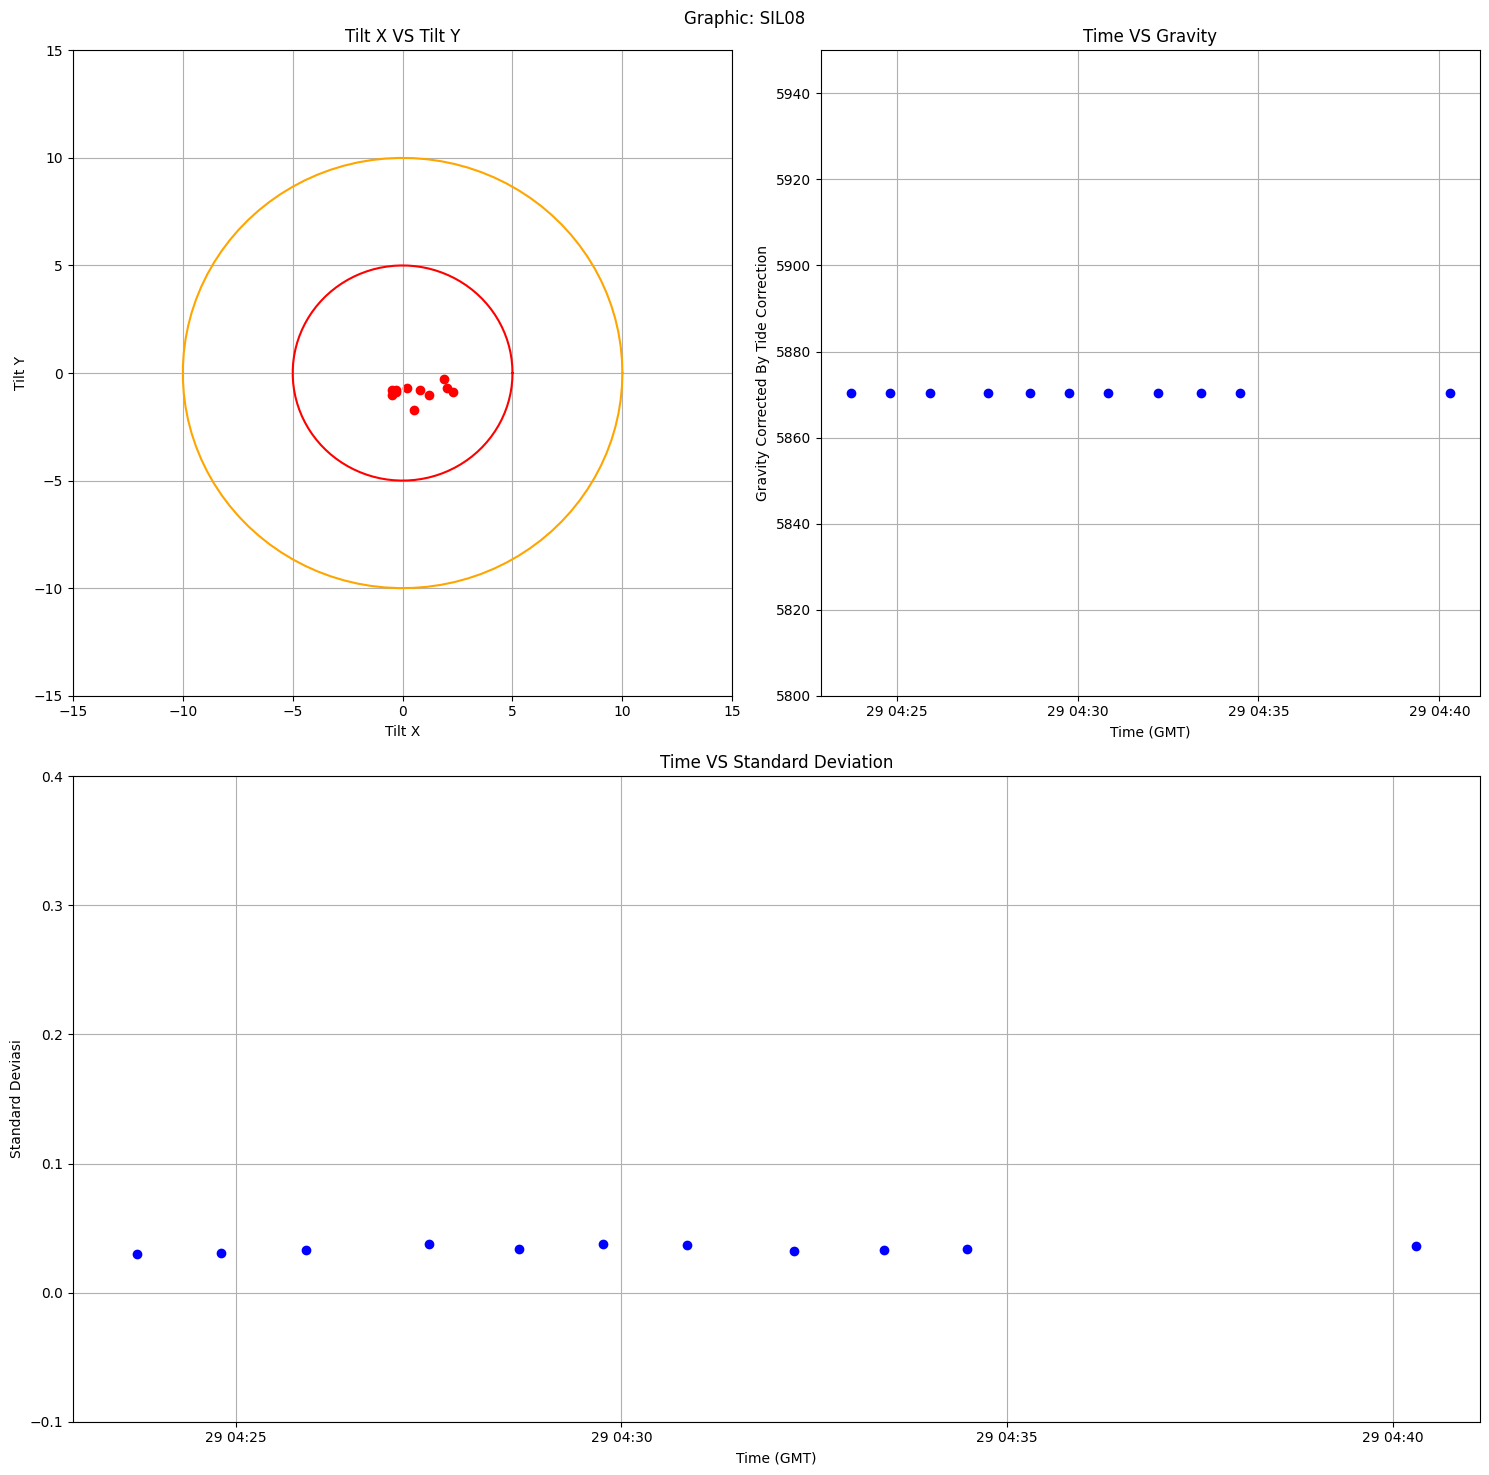

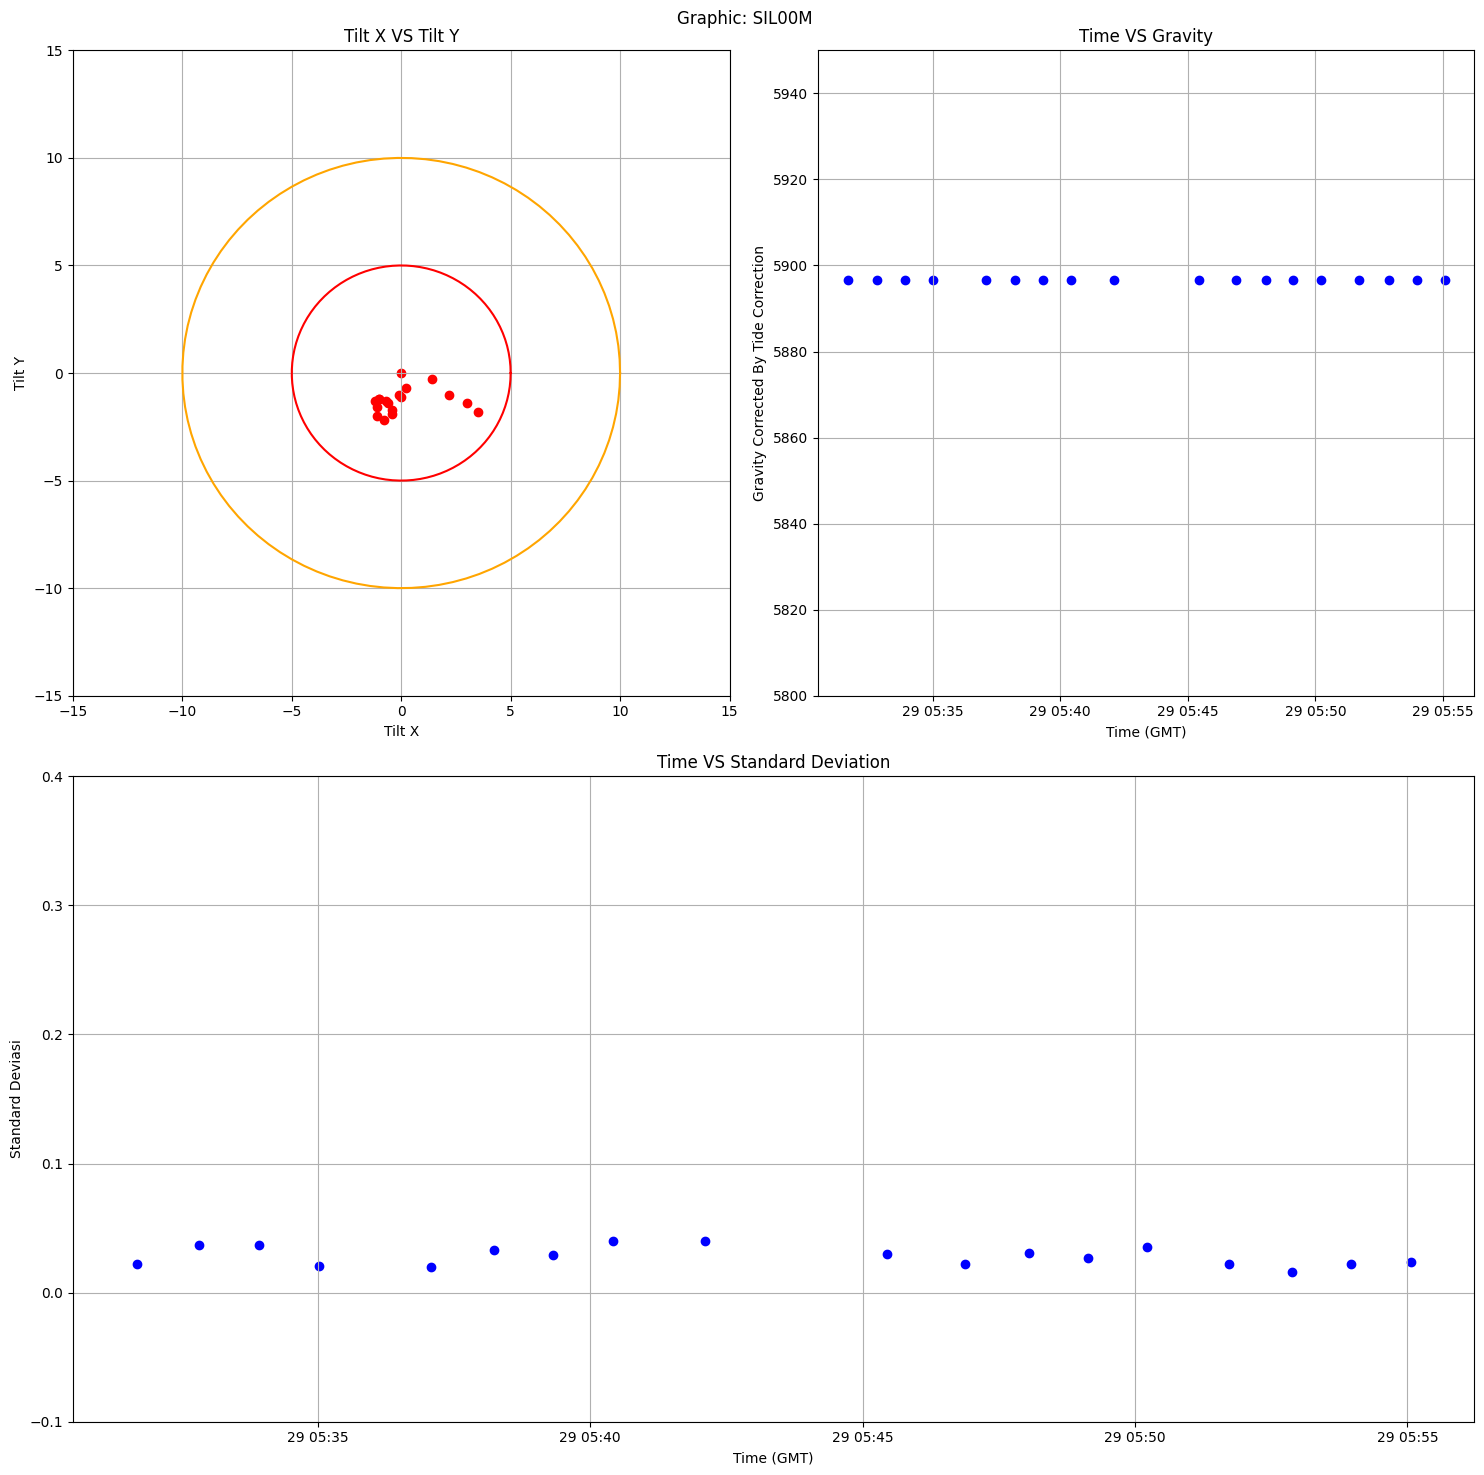

In [ ]:
def qc_gravity_data(df):
    # Filter data based on SD. < 0.05 mGal
    df_filtered = df[df['SD.'] <= 0.04]

    # Filter data based on tiltx and tilty between -10 and 10 arcseconds
    df_filtered = df_filtered[
        (df_filtered['TILTX'] >= -10) & (df_filtered['TILTX'] <= 5) &
        (df_filtered['TILTY'] >= -10) & (df_filtered['TILTY'] <= 5)
    ]
    return df_filtered

# Example usage (assuming GravityRAW_df is your DataFrame)
GravityQC_df = qc_gravity_data(GravityRAW_df)

# Now GravityQC_df contains the data that passed your QC criteria.
# You can proceed with further calculations or visualizations using this filtered data.

# Example: Plotting the filtered data
plot_by_id_subplots(GravityQC_df)

In [ ]:
GravityQC_df

In [42]:
GravityQC_df.to_excel('hasil QC Raw data.xlsx', index=False)